# Stepwise Analysis

Take genes from WTvex9 and WTvex20, then look at the differences between them

In [1]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("DESeq2")
setwd("/data/park_lab/adam/Total_RNA")
load("Total_RNA_env.RData")
ls()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, 

[1] "all_diff_genes"                           
  [2] "AREG_exp"                                 
  [3] "AREG_exp_raw"                             
  [4] "cancer_coldata"                           
  [5] "cancer_counts"                            
  [6] "cancer_dds"                               
  [7] "cancer_dds_f"                             
  [8] "cancer_diff_genes"                        
  [9] "cancer_ex9vex20_over"                     
 [10] "cancer_ex9vex20_res"                      
 [11] "cancer_ex9vex20_resSig_padj"              
 [12] "cancer_ex9vex20_under"                    
 [13] "cancer_filt"                              
 [14] "cancer_genotype"                          
 [15] "cancer_norm_sigset"                       
 [16] "cancer_normalized_counts_f"               
 [17] "cancer_normalized_counts_f_nonames"       
 [18] "cancer_rlog"                              
 [19] "cancer_sampleDistMatrix"                  
 [20] "cancer_samples"                           
 [21] "cancer_vst"                               
 [22] "cancer_WTvex20_over"                      
 [23] "cancer_WTvex20_res"                       
 [24] "cancer_WTvex20_resSig_padj"               
 [25] "cancer_WTvex20_under"                     
 [26] "cancer_WTvex9_over"                       
 [27] "cancer_WTvex9_over_clean"                 
 [28] "cancer_WTvex9_over_symbols"               
 [29] "cancer_WTvex9_res"                        
 [30] "cancer_WTvex9_resSig_padj"                
 [31] "cancer_WTvex9_under"                      
 [32] "cancer_WTvex9_under_clean"                
 [33] "cancer_WTvex9_under_symbols"              
 [34] "cancerDists"                              
 [35] "cluster_df"                               
 [36] "cluster3"                                 
 [37] "cluster3_genes"                           
 [38] "cluster3_genes_clean"                     
 [39] "cluster3_GOBP"                            
 [40] "cluster9"                                 
 [41] "cluster9_genes"                           
 [42] "cluster9_genes_clean"                     
 [43] "cluster9_GOBP"                            
 [44] "clusters"                                 
 [45] "datares_HC"                               
 [46] "dds_LRT"                                  
 [47] "diff_ex9vex20"                            
 [48] "diff_ex9vex20_sig"                        
 [49] "diff_WTvex20"                             
 [50] "diff_WTvex20_sig"                         
 [51] "diff_WTvex9"                              
 [52] "diff_WTvex9_sig"                          
 [53] "E545K_expressed_E545K_interacting_overlap"
 [54] "E545K_expressed_interacting_overlap"      
 [55] "E545K_expressed_WT_interacting_overlap"   
 [56] "ens.str_ex9vex20"                         
 [57] "ens.str_WTvex20"                          
 [58] "ens.str_WTvex9"                           
 [59] "ETV5_exp"                                 
 [60] "ex9vex20_combined"                        
 [61] "ex9vex20_combined_GOBP"                   
 [62] "ex9vex20_combined_GOBP_nocan"             
 [63] "ex9vex20_combined_nocan"                  
 [64] "ex9vex20_genes_log2fc_1.5"                
 [65] "ex9vex20_genes_log2fc_1.5_entrez"         
 [66] "ex9vex20_genes_log2fc_1.5_entrez_df"      
 [67] "ex9vex20_genes_padj"                      
 [68] "ex9vex20_genes_padj_entrez"               
 [69] "ex9vex20_GOBP"                            
 [70] "ex9vex20_GOMF"                            
 [71] "ex9vex20_KEGG"                            
 [72] "ex9vex20_over_clean"                      
 [73] "ex9vex20_over_clean_nocan"                
 [74] "ex9vex20_over_common"                     
 [75] "ex9vex20_over_common_GOBP"                
 [76] "ex9vex20_over_common_GOBP_nocan"          
 [77] "ex9vex20_over_common_GOMF"                
 [78] "ex9vex20_over_nocan"                      
 [79] "ex9vex20_res"                             
 [80] "ex9vex20_res_df"                          
 [

In [ ]:
# save.image(file = "stepwise.RData")

In [ ]:
load("stepwise.RData")
ls()

## Aggregate

In [ ]:
WTvex9_genes_log2fc_1.5
WTvex20_genes_log2fc_1.5

In [ ]:
WTvex9_selected <- WTvex9_genes_log2fc_1.5 %>% 
                    dplyr::select("X", "symbol", "entrez")
WTvex20_selected <- WTvex20_genes_log2fc_1.5 %>% 
                    dplyr::select("X", "symbol", "entrez")

In [ ]:
head(WTvex9_selected)
head(WTvex20_selected)

interx <- WTvex9_selected %>% 
        filter(X %in% WTvex20_selected$X)
interx
# 28 genes are shared

In [ ]:
WTvex9_unique <- subset(WTvex9_selected, !(X %in% interx$X))
WTvex20_unique <- subset(WTvex20_selected, !(X %in% interx$X))

WTvex9_unique
WTvex20_unique

In [ ]:
total_counts

filter counts by the unique genes

In [ ]:
# unique_counts_9 <- total_counts %>% 
#                 filter(rownames(total_counts) %in% WTvex9_unique$X)
# unique_counts_9
# unique_counts_20 <- total_counts %>% 
#                 filter(rownames(total_counts) %in% WTvex20_unique$X)
# unique_counts_20
# aggregate_unique <- rbind(unique_counts_9, unique_counts_20)
# aggregate_unique
colnames(aggregate_unique)

In [ ]:
#Set treatment variables for DESeq
genotype <- c(rep("E545K",3), 
             rep("WT",6), 
             rep("E545K",3),
             rep("H1047R",3),
             rep("WT",3),
             rep("E545K",3),
             rep("H1047R",6))
genotype <- as.factor(genotype)
coldata <- data.frame(genotype)
rownames(coldata) <- colnames(aggregate_unique)
all(rownames(coldata) == colnames(aggregate_unique))

In [ ]:
#DESeq Time
dds <- DESeqDataSetFromMatrix(countData = aggregate_unique,
                              colData = coldata,
                              design = ~ genotype)

In [ ]:
dds

In [ ]:
dds <- DESeq(dds)
resultsNames(dds)

In [ ]:
######PCA for sample similarity
dds_vst <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(dds_vst, intgroup = "genotype")

In [ ]:
######## filter by significance
######## ## l2fc +/- 1.5 and padj <0.05
######## ###129 genes
split_res <- results(dds, contrast = c("genotype", "E545K", "H1047R"))
split_res <- as.data.frame(split_res)
split_res_df_filt <- split_res %>%
  filter(log2FoldChange < -1.5 | log2FoldChange > 1.5) %>%
  filter(padj < 0.05)
split_res_df_filt

In [ ]:
library(tidyverse)
library(janitor)
library(scales)
library(DESeq2)
library(dplyr)
library(biomaRt)
library(ggrepel)
# library(clusterProfiler)
library(org.Hs.eg.db)

In [ ]:
#add gene symbols
split_res_df_filt$geneID <- rownames(split_res_df_filt) %>% 
  tools::file_path_sans_ext()
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- split_res_df_filt$geneID
G_list <- getBM(filters= "ensembl_gene_id",
                attributes= c("ensembl_gene_id","hgnc_symbol"),
                values=genes,mart= mart,
               useCache = FALSE)
split_res_df_filt <- merge(split_res_df_filt,
                               G_list,
                               by.x="geneID",
                               by.y="ensembl_gene_id")
write_tsv(split_res_df_filt, file = "Stepwise_aggregate_diff.txt")
head(split_res_df_filt)

In [ ]:
#volcano plot
split_res_df_filt$diffexpressed <- "NO"
split_res_df_filt$diffexpressed[split_res_df_filt$log2FoldChange > 1.5 & split_res_df_filt$padj < 0.05] <- "E545K"
split_res_df_filt$diffexpressed[split_res_df_filt$log2FoldChange < -1.5 & split_res_df_filt$padj < 0.05] <- "H1047R"
#volcano plot
volcano <- split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue"))
volcano

In [ ]:
#GOBP
agg_GOBP <- enrichGO

In [ ]:
browseVignettes("clusterProfiler")


## Individual Lines

In [ ]:
#Cancer
cancer_WTvex9_resSig_padj
cancer_WTvex20_resSig_padj

#H-Tert
HTert_WTvex9_resSig_padj
HTert_WTvex20_resSig_padj

#MCF10A
MCF10A_WTvex9_resSig_padj
MCF10A_WTvex20_resSig_padj

In [3]:
#cancer
cancer_WTvex9_selected <- cancer_WTvex9_resSig_padj %>% 
                    dplyr::select("rowname", "log2FoldChange")
cancer_WTvex20_selected <- cancer_WTvex20_resSig_padj %>% 
                    dplyr::select("rowname", "log2FoldChange")
head(cancer_WTvex9_selected)
head(cancer_WTvex20_selected)
#H-Tert
HTert_WTvex9_selected <- HTert_WTvex9_resSig_padj %>% 
                    dplyr::select("rowname", "log2FoldChange")
HTert_WTvex20_selected <- HTert_WTvex20_resSig_padj %>% 
                    dplyr::select("rowname", "log2FoldChange")
head(HTert_WTvex9_selected)
head(HTert_WTvex20_selected)
#MCF10A
MCF10A_WTvex9_selected <- MCF10A_WTvex9_resSig_padj %>% 
                    dplyr::select("rowname", "log2FoldChange", "padj")
MCF10A_WTvex20_selected <- MCF10A_WTvex20_resSig_padj %>% 
                    dplyr::select("rowname", "log2FoldChange", "padj")
head(MCF10A_WTvex9_selected)
head(MCF10A_WTvex20_selected)

rowname            log2FoldChange
1 ENSG00000230699.2  1.743859      
2 ENSG00000273443.1  1.644451      
3 ENSG00000230415.1  1.550934      
4 ENSG00000162576.16 1.624647      
5 ENSG00000225285.1  1.611010      
6 ENSG00000231050.1  1.783544

rowname            log2FoldChange
1 ENSG00000272438.1   1.655128     
2 ENSG00000230699.2   2.082032     
3 ENSG00000241180.1   2.100375     
4 ENSG00000272512.1   2.066862     
5 ENSG00000188157.15 -1.666795     
6 ENSG00000242590.1  -1.731038

rowname            log2FoldChange
1 ENSG00000233750.3   1.784203     
2 ENSG00000187608.10 -1.632235     
3 ENSG00000217801.10  1.750455     
4 ENSG00000273443.1   1.954064     
5 ENSG00000260179.1   2.470719     
6 ENSG00000162576.16 -3.915411

rowname            log2FoldChange
1 ENSG00000188290.10 -1.641665     
2 ENSG00000162576.16  1.525009     
3 ENSG00000235098.8   5.224963     
4 ENSG00000271806.1   1.712925     
5 ENSG00000130762.15  3.556397     
6 ENSG00000162591.16  4.005066

rowname            log2FoldChange padj        
1 ENSG00000284372.1   1.690708      3.013534e-03
2 ENSG00000238164.6  -1.968311      9.969037e-04
3 ENSG00000231868.1  -1.515194      5.883914e-08
4 ENSG00000284716.1  -3.454743      1.861025e-07
5 ENSG00000117148.8  -1.787999      1.558454e-02
6 ENSG00000188257.11  1.590167      3.800853e-16

rowname            log2FoldChange padj         
1 ENSG00000142609.18  2.102947       1.761242e-07
2 ENSG00000238164.6  -2.756938       3.314031e-07
3 ENSG00000157873.17 -1.942156       1.932481e-19
4 ENSG00000236423.6  -2.154102       1.696185e-21
5 ENSG00000187017.17 -2.088529      4.002241e-191
6 ENSG00000231868.1  -2.267061       1.380443e-18

In [2]:
MCF10A_WTvex20_resSig_padj

rowname            baseMean     log2FoldChange lfcSE      stat      
1    ENSG00000142609.18   37.27399    2.102947      0.38763518   5.425068
2    ENSG00000238164.6    34.30349   -2.756938      0.51949158  -5.306992
3    ENSG00000157873.17  167.35896   -1.942156      0.21089417  -9.209149
4    ENSG00000236423.6   224.91427   -2.154102      0.22176977  -9.713236
5    ENSG00000187017.17 2637.07046   -2.088529      0.07046262 -29.640238
6    ENSG00000231868.1   151.35610   -2.267061      0.25212280  -8.991891
7    ENSG00000284693.1    62.46080   -2.299545      0.39358385  -5.842579
8    ENSG00000271989.1    38.04447    2.943414      0.40628155   7.244765
9    ENSG00000239149.1    37.18593   -1.509310      0.42481136  -3.552894
10   ENSG00000272482.1   542.56454    1.646087      0.11540370  14.263730
11   ENSG00000142621.19   36.79903    1.500379      0.45680913   3.284477
12   ENSG00000185519.9   704.00600    2.727633      0.15697457  17.376271
13   ENSG00000236698.1    87.12754   -2.001940      0.27315665  -7.328909
14   ENSG00000117115.13  885.91963   -4.118926      0.17152518 -24.013535
15   ENSG00000188257.11  728.26618   -3.540369      0.12874649 -27.498761
16   ENSG00000162545.6  5886.33203    2.552892      0.14083529  18.126789
17   ENSG00000158825.6  3941.28194    1.658840      0.10007458  16.576037
18   ENSG00000189410.12  233.39212    1.948948      0.18361121  10.614535
19   ENSG00000187952.9    75.36609   -1.925979      0.34460858  -5.588888
20   ENSG00000179546.4    69.68472    2.418416      0.40207375   6.014856
21   ENSG00000204219.11  283.63377   -1.885079      0.16159961 -11.665122
22   ENSG00000007968.7   493.98434   -2.189308      0.14906323 -14.687107
23   ENSG00000235052.1    36.49933   -1.547114      0.49921723  -3.099081
24   ENSG00000179163.11   63.99147    1.895774      0.30596098   6.196131
25   ENSG00000142661.19  434.03771    2.997578      0.14785951  20.273150
26   ENSG00000142677.4  1389.52606    1.721177      0.06596477  26.092365
27   ENSG00000185436.12 1382.32527    3.217047      0.07761027  41.451304
28   ENSG00000158055.15 1540.94000   -2.452590      0.08842713 -27.735718
29   ENSG00000117632.23 7795.72021    1.639739      0.05243376  31.272578
30   ENSG00000283938.1   334.70254    1.520851      0.14049537  10.824922
⋮    ⋮                  ⋮            ⋮              ⋮          ⋮         
1655 ENSG00000229807.12  22106.09351  1.633010      0.25726758   6.347517
1656 ENSG00000277577.1     438.78181  1.751296      0.18903259   9.264519
1657 ENSG00000271533.1     467.66282 -1.605261      0.45711918  -3.511690
1658 ENSG00000265727.2      79.91437 -1.752816      0.44264987  -3.959825
1659 ENSG00000124429.18   1808.77894 -4.459900      0.12953325 -34.430542
1660 ENSG00000102359.7    2134.40328  1.908646      0.06372943  29.949208
1661 ENSG00000102384.13    408.16218  1.853411      0.15320458  12.097623
1662 ENSG00000184515.11    128.79950  2.035151      0.27105572   7.508240
1663 ENSG00000158164.7      53.43597  3.938227      0.50572600   7.787274
1664 ENSG00000198932.13    141.55464 -1.604930      0.32694454  -4.908875
1665 ENSG00000286846.1      61.64742 -1.729527      0.44579153  -3.879676
1666 ENSG00000133135.14   2734.12424 -1.651919      0.06830398 -24.184817
1667 ENSG00000243978.8      55.99297 -1.680241      0.38499930  -4.364271
1668 ENSG00000225031.1     184.92379 -2.061796      0.22093546  -9.332119
1669 ENSG00000178947.9     732.73763 -2.949035      0.11929630 -24.720258
1670 ENSG00000022267.19    173.00778  2.677092      0.18893934  14.169055
1671 ENSG00000102243.13    197.80420 -2.066181      0.22441443  -9.206986
1672 ENSG00000129675.16     32.69486  4.298026      0.58014341   7.408558
1673 ENSG00000203930.12     68.07608 -1.538351      0.32383173  -4.750465
1674 ENSG00000184258.7      34.59610 -1.953149      0.56979625  -3.427803
1675 ENSG00000102287.19   1591.39751 -1.711097      0.13689273 -12.499545
1676 ENSG00000011677.13    204.01209 -2.872650      0.22700761 -12.654422
1677 ENSG

In [4]:
cancer_interx <- cancer_WTvex9_selected %>% 
        filter(rowname %in% cancer_WTvex20_selected$rowname)
cancer_interx
# 548 genes are shared
HTert_interx <- HTert_WTvex9_selected %>% 
        filter(rowname %in% HTert_WTvex20_selected$rowname)
HTert_interx
#530
MCF10A_interx <- MCF10A_WTvex9_selected %>% 
        filter(rowname %in% MCF10A_WTvex20_selected$rowname)
MCF10A_interx
#410

rowname            log2FoldChange
1   ENSG00000230699.2   1.743859     
2   ENSG00000162576.16  1.624647     
3   ENSG00000175147.13  1.688768     
4   ENSG00000185519.9  -1.581196     
5   ENSG00000268869.6   2.022580     
6   ENSG00000117115.13  1.659379     
7   ENSG00000179023.8  -2.014523     
8   ENSG00000162551.14  1.563541     
9   ENSG00000117318.9  -2.560823     
10  ENSG00000158008.10  1.591545     
11  ENSG00000084628.10 -2.156910     
12  ENSG00000254545.1  -1.757089     
13  ENSG00000134668.12 -1.897643     
14  ENSG00000185668.8   1.883386     
15  ENSG00000186973.11 -1.660617     
16  ENSG00000169174.10  2.609063     
17  ENSG00000234807.7   1.639185     
18  ENSG00000285407.1  -4.250929     
19  ENSG00000117069.15  2.340090     
20  ENSG00000137959.16 -3.416045     
21  ENSG00000117114.19 -3.966540     
22  ENSG00000137941.17 -2.160278     
23  ENSG00000162645.13  1.727880     
24  ENSG00000224093.5   1.633688     
25  ENSG00000162627.17 -1.740819     
26  ENSG00000162636.16 -2.054732     
27  ENSG00000155366.16 -1.515422     
28  ENSG00000271810.5  -1.553925     
29  ENSG00000155367.15 -1.681038     
30  ENSG00000116815.16 -2.465633     
⋮   ⋮                  ⋮             
519 ENSG00000280604.1   1.614351     
520 ENSG00000100033.16  1.956361     
521 ENSG00000099998.17  3.039088     
522 ENSG00000167037.18  1.672820     
523 ENSG00000225465.9  -2.793962     
524 ENSG00000128284.19  2.111620     
525 ENSG00000272694.1   1.710616     
526 ENSG00000244509.4   2.409218     
527 ENSG00000128285.4   1.709382     
528 ENSG00000261251.1   1.563921     
529 ENSG00000186654.21  1.568720     
530 ENSG00000056487.16  1.930887     
531 ENSG00000130943.7   1.963763     
532 ENSG00000205634.7   1.703811     
533 ENSG00000278869.1   2.469950     
534 ENSG00000188263.10  2.228782     
535 ENSG00000130487.9   2.565816     
536 ENSG00000008735.14  2.271188     
537 ENSG00000205542.11  1.859163     
538 ENSG00000126010.6   1.548709     
539 ENSG00000238178.7   1.675342     
540 ENSG00000196368.5  -2.665567     
541 ENSG00000215105.4  -2.158121     
542 ENSG00000165259.14 -1.740136     
543 ENSG00000102290.22 -4.028475     
544 ENSG00000158301.18 -1.658557     
545 ENSG00000102409.10 -8.934510     
546 ENSG00000147246.10 -1.751788     
547 ENSG00000147256.12  1.663812     
548 ENSG00000155961.5  -9.554019

rowname            log2FoldChange
1   ENSG00000162576.16 -3.915411     
2   ENSG00000271806.1   1.563156     
3   ENSG00000196581.11  8.217377     
4   ENSG00000069812.11  2.328615     
5   ENSG00000049246.14 -1.959045     
6   ENSG00000236266.1  -2.974835     
7   ENSG00000142583.18 -3.356182     
8   ENSG00000228526.7   3.522299     
9   ENSG00000173641.17 -2.424670     
10  ENSG00000162551.14 -6.858789     
11  ENSG00000179546.4   2.127011     
12  ENSG00000179163.11 -1.631552     
13  ENSG00000142661.19  1.598760     
14  ENSG00000116983.13 -1.626654     
15  ENSG00000127129.10 -3.453222     
16  ENSG00000162415.7   1.594530     
17  ENSG00000269113.4   4.561931     
18  ENSG00000117834.12  3.029214     
19  ENSG00000169174.10  3.121637     
20  ENSG00000185483.12  1.528003     
21  ENSG00000184588.18  3.370218     
22  ENSG00000055732.13 -3.374845     
23  ENSG00000280099.1  -2.136262     
24  ENSG00000097096.9  -2.483271     
25  ENSG00000137975.8  -2.176690     
26  ENSG00000213512.3  -1.553961     
27  ENSG00000156869.13 -2.530123     
28  ENSG00000213366.13  3.757420     
29  ENSG00000134259.3  -1.561408     
30  ENSG00000277147.6  -1.909552     
⋮   ⋮                  ⋮             
501 ENSG00000156265.15 -1.700726     
502 ENSG00000157542.11  1.543818     
503 ENSG00000183486.13 -6.027590     
504 ENSG00000236883.1  -1.551573     
505 ENSG00000237989.1   1.537866     
506 ENSG00000142178.9   1.718131     
507 ENSG00000160233.8   5.479690     
508 ENSG00000160255.18 -2.419189     
509 ENSG00000183570.16  6.501729     
510 ENSG00000128266.9  -3.122494     
511 ENSG00000099994.11 -3.533847     
512 ENSG00000099998.17 -3.133793     
513 ENSG00000128342.5  -3.362059     
514 ENSG00000184792.16  2.344213     
515 ENSG00000100342.20 -2.306756     
516 ENSG00000133477.17  3.809479     
517 ENSG00000138944.8   2.152005     
518 ENSG00000011201.12  3.593143     
519 ENSG00000101849.17 -1.697205     
520 ENSG00000158352.15 -2.227867     
521 ENSG00000158813.18 -1.523323     
522 ENSG00000184867.14 -2.650574     
523 ENSG00000172465.14  3.678082     
524 ENSG00000123560.14  2.807845     
525 ENSG00000009694.13  2.107751     
526 ENSG00000213468.7  -3.005243     
527 ENSG00000287796.1  -2.955412     
528 ENSG00000155966.14 -3.601192     
529 ENSG00000182492.16 -2.357823     
530 ENSG00000160219.12 -1.510856

rowname            log2FoldChange padj         
1   ENSG00000238164.6  -1.968311       9.969037e-04
2   ENSG00000231868.1  -1.515194       5.883914e-08
3   ENSG00000188257.11  1.590167       3.800853e-16
4   ENSG00000179546.4   1.808356       7.441267e-05
5   ENSG00000142661.19  2.562712       3.945016e-55
6   ENSG00000134668.12  3.251861       2.209420e-73
7   ENSG00000162366.8  -1.527730       2.009811e-70
8   ENSG00000184588.18 -2.284457       4.231692e-09
9   ENSG00000116783.15  1.861787       1.468790e-05
10  ENSG00000137965.11 -1.732993       6.104240e-22
11  ENSG00000162643.13 -2.343620       4.046848e-49
12  ENSG00000172031.7  -6.552848       7.005173e-50
13  ENSG00000099260.11 -1.758862       3.615607e-93
14  ENSG00000221986.7  -2.187640       2.638625e-28
15  ENSG00000168679.18 -4.155831      1.905556e-179
16  ENSG00000261654.1  -1.857521       3.289478e-15
17  ENSG00000171385.9  -1.950615       2.080378e-07
18  ENSG00000231246.2  -2.284967       2.813982e-09
19  ENSG00000143127.13  2.257920       4.675239e-34
20  ENSG00000274428.1   2.357169       2.143951e-04
21  ENSG00000265107.3  -2.867386       7.150110e-31
22  ENSG00000274415.1  -2.937914       1.817994e-12
23  ENSG00000150337.13 -2.110117       7.259228e-07
24  ENSG00000233030.2  -1.686428       3.816578e-07
25  ENSG00000182898.4  -1.799965       5.606181e-16
26  ENSG00000203786.6  -2.784070       2.584215e-07
27  ENSG00000197084.5  -2.940586       2.909153e-07
28  ENSG00000163216.7  -1.838632       7.247234e-20
29  ENSG00000163220.11 -1.776498       1.474346e-75
30  ENSG00000143546.10 -1.900231       9.535646e-19
⋮   ⋮                  ⋮              ⋮            
381 ENSG00000101017.14 -5.837720       5.015898e-23
382 ENSG00000196562.14 -1.623201       0.000000e+00
383 ENSG00000255438.2  -1.766450      6.061646e-186
384 ENSG00000287335.1  -2.234397       4.796157e-25
385 ENSG00000198768.11  1.559120       5.778031e-07
386 ENSG00000101187.16  1.818128       1.316699e-49
387 ENSG00000275620.1  -1.666043       8.664052e-05
388 ENSG00000101210.12  4.005090       2.266200e-17
389 ENSG00000278932.4  -2.284375       4.967779e-04
390 ENSG00000156284.6  -3.076826       1.110682e-10
391 ENSG00000242220.8   1.588147       1.170602e-03
392 ENSG00000273164.1  -1.518619       2.996473e-03
393 ENSG00000100079.7  -2.327529       2.232590e-08
394 ENSG00000128383.13 -1.820283       5.115143e-05
395 ENSG00000167074.15 -1.795616       1.245379e-49
396 ENSG00000215347.4  -1.726094       9.007266e-06
397 ENSG00000124343.13 -5.963820       2.739516e-49
398 ENSG00000062096.15 -2.384122       6.631715e-07
399 ENSG00000011201.12  6.782591       4.882684e-80
400 ENSG00000102174.9  -1.530342       1.754082e-29
401 ENSG00000221994.10 -3.052078       3.346312e-93
402 ENSG00000287757.1  -8.608414       7.901044e-12
403 ENSG00000196368.5   3.071778       9.995416e-74
404 ENSG00000169083.17  2.454211       4.736891e-22
405 ENSG00000124429.18 -4.201586      2.600907e-223
406 ENSG00000158164.7   1.911301       5.399300e-04
407 ENSG00000243978.8  -1.640207       1.559916e-04
408 ENSG00000178947.9  -2.152360       2.706509e-65
409 ENSG00000182492.16  1.752999       5.982805e-12
410 ENSG00000285018.1   2.464513       5.796654e-21

In [5]:
cancer_WTvex9_unique <- subset(cancer_WTvex9_selected, !(rowname %in% cancer_interx$rowname))
cancer_WTvex20_unique <- subset(cancer_WTvex20_selected, !(rowname %in% cancer_interx$rowname))
cancer_WTvex9_unique
#819
cancer_WTvex20_unique
#5431
HTert_WTvex9_unique <- subset(HTert_WTvex9_selected, !(rowname %in% HTert_interx$rowname))
HTert_WTvex20_unique <- subset(HTert_WTvex20_selected, !(rowname %in% HTert_interx$rowname))
HTert_WTvex9_unique
#1851
HTert_WTvex20_unique
#1555
MCF10A_WTvex9_unique <- subset(MCF10A_WTvex9_selected, !(rowname %in% MCF10A_interx$rowname))
MCF10A_WTvex20_unique <- subset(MCF10A_WTvex20_selected, !(rowname %in% MCF10A_interx$rowname))
MCF10A_WTvex9_unique
#750
MCF10A_WTvex20_unique
#1684
write_tsv(cancer_WTvex9_unique, file = "cancer_WTvex9_unique.txt")
write_tsv(cancer_WTvex20_unique, file = "cancer_WTvex20_unique.txt")
write_tsv(HTert_WTvex9_unique, file = "HTert_WTvex9_unique.txt")
write_tsv(HTert_WTvex20_unique, file = "HTert_WTvex20_unique.txt")
write_tsv(MCF10A_WTvex9_unique, file = "MCF10A_WTvex9_unique.txt")
write_tsv(MCF10A_WTvex20_unique, file = "MCF10A_WTvex20_unique.txt")

rowname            log2FoldChange
2   ENSG00000273443.1   1.644451     
3   ENSG00000230415.1   1.550934     
5   ENSG00000225285.1   1.611010     
6   ENSG00000231050.1   1.783544     
7   ENSG00000162490.7  -1.624590     
8   ENSG00000175206.10  2.075728     
13  ENSG00000142619.4   1.532092     
21  ENSG00000163873.10  2.604263     
23  ENSG00000261798.1   1.835625     
41  ENSG00000092621.12 -1.624275     
42  ENSG00000275131.3  -1.564620     
51  ENSG00000223861.1  -2.202481     
52  ENSG00000238279.1   3.497933     
54  ENSG00000169418.10  3.116548     
56  ENSG00000236675.1  -1.536935     
60  ENSG00000027869.11 -3.485829     
67  ENSG00000237457.6  -2.938673     
68  ENSG00000229989.4   1.509648     
79  ENSG00000196890.4   1.685849     
82  ENSG00000231482.3   2.470283     
83  ENSG00000115705.21  1.600677     
84  ENSG00000203635.2   1.522792     
85  ENSG00000118004.17  2.079743     
87  ENSG00000049323.16  1.789659     
88  ENSG00000285577.1   1.844379     
91  ENSG00000236824.2  -1.672333     
105 ENSG00000226383.7   6.182906     
109 ENSG00000279598.1   1.828067     
110 ENSG00000144369.13 -1.724006     
116 ENSG00000229267.3   1.788196     
⋮   ⋮                  ⋮             
747 ENSG00000275812.1   2.539267     
748 ENSG00000125531.7   2.029434     
755 ENSG00000159216.18  1.775214     
756 ENSG00000286153.1   2.235814     
758 ENSG00000238141.2   1.773252     
759 ENSG00000171587.15 -3.506105     
763 ENSG00000233056.2   1.511488     
769 ENSG00000184058.14  1.518017     
770 ENSG00000234630.1   1.862409     
773 ENSG00000169184.6   2.399574     
775 ENSG00000268812.3   1.709298     
776 ENSG00000224973.6   1.844760     
784 ENSG00000273243.1   1.603524     
785 ENSG00000231010.1   1.832812     
786 ENSG00000266533.1   2.748883     
791 ENSG00000272836.1   1.543819     
792 ENSG00000025708.14  1.699910     
794 ENSG00000205560.12  1.552071     
795 ENSG00000205559.5   1.722709     
798 ENSG00000102048.16 -1.565769     
801 ENSG00000182798.10  1.806745     
804 ENSG00000198157.11 -1.681110     
809 ENSG00000123570.4  -1.605286     
810 ENSG00000133135.14  3.432565     
811 ENSG00000133138.20 -1.650524     
812 ENSG00000068366.20 -1.927419     
814 ENSG00000271826.5  -1.762904     
815 ENSG00000268104.3   3.492276     
817 ENSG00000076716.9  -1.753462     
819 ENSG00000210117.1   1.544174

rowname            log2FoldChange
1    ENSG00000272438.1   1.655128     
3    ENSG00000241180.1   2.100375     
4    ENSG00000272512.1   2.066862     
5    ENSG00000188157.15 -1.666795     
6    ENSG00000242590.1  -1.731038     
7    ENSG00000237330.3   2.448556     
9    ENSG00000272455.1   1.923906     
10   ENSG00000215915.10 -2.049811     
11   ENSG00000228594.4  14.593531     
12   ENSG00000286989.1   7.275132     
13   ENSG00000272004.1   1.927907     
14   ENSG00000227775.3  -1.925743     
15   ENSG00000215790.7  -2.167134     
16   ENSG00000169885.10  2.200970     
17   ENSG00000178821.13  3.121530     
18   ENSG00000187730.9   3.053624     
19   ENSG00000287356.1   2.047021     
20   ENSG00000149527.18  4.337835     
21   ENSG00000177133.11  8.453622     
22   ENSG00000142611.17  7.690412     
23   ENSG00000162591.16  2.159905     
24   ENSG00000227372.12 -3.106267     
25   ENSG00000162592.10 -1.699540     
26   ENSG00000236423.6  -1.655366     
27   ENSG00000116254.18 -3.190153     
28   ENSG00000187017.17  2.061254     
29   ENSG00000215788.10  1.536903     
30   ENSG00000180758.12 -1.523973     
31   ENSG00000223989.1  -1.863735     
32   ENSG00000264501.2  -1.541067     
⋮    ⋮                  ⋮             
5401 ENSG00000230707.1   7.355403     
5402 ENSG00000134595.8   1.825255     
5403 ENSG00000179542.16 -3.601549     
5404 ENSG00000013619.14  4.348037     
5405 ENSG00000287918.1   2.449148     
5406 ENSG00000235961.5   9.969128     
5407 ENSG00000063587.14  3.654230     
5408 ENSG00000183479.12  2.721639     
5409 ENSG00000213397.10  2.665583     
5410 ENSG00000182492.16  4.387177     
5411 ENSG00000262919.8   1.974397     
5412 ENSG00000130829.18  8.262327     
5413 ENSG00000101986.12  2.558657     
5414 ENSG00000232725.1   1.519497     
5415 ENSG00000067840.12  3.563485     
5416 ENSG00000126895.15  1.808102     
5417 ENSG00000102032.13 -2.083404     
5418 ENSG00000184216.14  2.367226     
5419 ENSG00000285018.1   2.495898     
5420 ENSG00000196976.7   2.222775     
5421 ENSG00000126903.16  1.676571     
5422 ENSG00000160211.19  2.438760     
5423 ENSG00000269335.5   1.901267     
5424 ENSG00000130830.15 -1.690626     
5425 ENSG00000185010.15  1.630457     
5427 ENSG00000155962.13  3.434517     
5428 ENSG00000278212.2  -2.994170     
5429 ENSG00000235857.1   3.831953     
5430 ENSG00000211459.2  -1.884837     
5431 ENSG00000210082.2  -1.787321

rowname            log2FoldChange
1    ENSG00000233750.3   1.784203     
2    ENSG00000187608.10 -1.632235     
3    ENSG00000217801.10  1.750455     
4    ENSG00000273443.1   1.954064     
5    ENSG00000260179.1   2.470719     
7    ENSG00000264293.2   1.592726     
9    ENSG00000287356.1   2.503799     
10   ENSG00000269896.2   2.217365     
11   ENSG00000078900.15  2.530637     
16   ENSG00000049249.8  -1.676237     
19   ENSG00000162496.9  -5.171343     
20   ENSG00000162493.16  4.141690     
21   ENSG00000162461.8   1.881933     
23   ENSG00000185519.9   1.756625     
24   ENSG00000186301.8   1.975201     
25   ENSG00000186715.11  2.275180     
26   ENSG00000117122.14 -1.752792     
27   ENSG00000286898.1  -1.733579     
28   ENSG00000226526.1  -1.827667     
29   ENSG00000159363.18 -1.837015     
30   ENSG00000142619.4  -1.810052     
31   ENSG00000162545.6   1.856510     
32   ENSG00000183114.8   3.674576     
33   ENSG00000117245.12  1.944849     
35   ENSG00000133216.16  2.451446     
39   ENSG00000020633.18  8.274994     
40   ENSG00000284602.1   2.389285     
41   ENSG00000284657.1   2.879113     
42   ENSG00000126709.15 -3.258146     
43   ENSG00000130775.16  3.507384     
⋮    ⋮                  ⋮             
1809 ENSG00000251322.8   4.132876     
1810 ENSG00000157399.15 -1.959971     
1811 ENSG00000183943.6   1.854810     
1814 ENSG00000173698.18 -1.752965     
1815 ENSG00000184368.16 -1.926350     
1816 ENSG00000201882.1   1.941251     
1817 ENSG00000225037.1   1.935644     
1818 ENSG00000130066.16 -1.910955     
1819 ENSG00000101955.15  2.342603     
1820 ENSG00000283743.2   1.725383     
1821 ENSG00000015285.10  1.663826     
1822 ENSG00000270012.1   1.729424     
1824 ENSG00000189369.9   9.949192     
1825 ENSG00000102349.18 -1.562345     
1826 ENSG00000131080.15  3.755321     
1827 ENSG00000130052.13 -2.532050     
1829 ENSG00000242732.4   1.525121     
1830 ENSG00000186462.9  -2.787353     
1831 ENSG00000186310.10 -2.954281     
1832 ENSG00000102359.7  -1.579332     
1834 ENSG00000166432.15  2.343924     
1835 ENSG00000133134.11 -2.933401     
1836 ENSG00000279894.1   3.147807     
1839 ENSG00000133135.14 -2.411558     
1840 ENSG00000130224.15 -1.576861     
1841 ENSG00000003096.14 -1.852225     
1844 ENSG00000022267.19 -2.105882     
1845 ENSG00000129675.16 -2.117308     
1846 ENSG00000129682.16  1.741860     
1851 ENSG00000155961.5  -3.283018

rowname            log2FoldChange
1    ENSG00000188290.10 -1.641665     
3    ENSG00000235098.8   5.224963     
5    ENSG00000130762.15  3.556397     
6    ENSG00000162591.16  4.005066     
9    ENSG00000187017.17  1.681307     
10   ENSG00000173662.21  2.535434     
13   ENSG00000162426.14  1.792178     
16   ENSG00000130940.15  1.506450     
17   ENSG00000272078.1   1.808742     
18   ENSG00000116661.11  2.516943     
19   ENSG00000116663.11  1.752078     
20   ENSG00000215910.7   1.515347     
22   ENSG00000234166.1  -2.016191     
23   ENSG00000142632.17 -1.964126     
24   ENSG00000235241.1   1.507048     
25   ENSG00000117115.13  3.275950     
26   ENSG00000227001.3   1.540582     
27   ENSG00000142794.18  1.718174     
30   ENSG00000204219.11 -1.644211     
31   ENSG00000007968.7  -2.056962     
32   ENSG00000117318.9   2.164067     
35   ENSG00000142765.18  2.028909     
36   ENSG00000181773.7  -1.525847     
37   ENSG00000168528.12  2.027626     
38   ENSG00000284543.1   1.673828     
39   ENSG00000142910.16  1.790157     
40   ENSG00000189280.3   3.737662     
41   ENSG00000188910.8   4.661975     
42   ENSG00000092853.14 -1.964949     
43   ENSG00000232335.1  -1.758578     
⋮    ⋮                  ⋮             
1514 ENSG00000277232.2  -1.720137     
1515 ENSG00000280080.2  -1.621608     
1518 ENSG00000146950.13 -4.321665     
1519 ENSG00000047648.23  2.515390     
1520 ENSG00000169891.18  2.075692     
1521 ENSG00000198814.12 -1.544380     
1522 ENSG00000243055.1  -1.557779     
1523 ENSG00000198947.15  3.668682     
1524 ENSG00000189221.9   2.078665     
1525 ENSG00000231566.2  -1.525697     
1526 ENSG00000147119.4   1.720012     
1529 ENSG00000286077.1  -1.653106     
1531 ENSG00000133142.17  1.609212     
1534 ENSG00000123570.4   1.623677     
1535 ENSG00000189108.13  1.507448     
1536 ENSG00000147231.14 -2.288323     
1537 ENSG00000077264.15  2.559939     
1538 ENSG00000126016.15  4.179609     
1539 ENSG00000125354.23  1.829624     
1540 ENSG00000125675.18 -1.837043     
1542 ENSG00000171388.12 -2.075167     
1544 ENSG00000076770.14 -1.840606     
1545 ENSG00000101977.21 -5.796388     
1548 ENSG00000063601.17  2.240148     
1549 ENSG00000029993.15 -1.737475     
1550 ENSG00000268089.3  -3.788813     
1552 ENSG00000067840.12 -1.835516     
1553 ENSG00000198910.14  1.649962     
1554 ENSG00000284987.1   1.727742     
1555 ENSG00000130827.6   1.777480

rowname            log2FoldChange padj         
1   ENSG00000284372.1   1.690708       3.013534e-03
4   ENSG00000284716.1  -3.454743       1.861025e-07
5   ENSG00000117148.8  -1.787999       1.558454e-02
9   ENSG00000232298.2  -2.135586       6.019281e-08
10  ENSG00000272432.1  -1.986519       1.124821e-03
11  ENSG00000223382.5  -1.707627       4.648350e-03
13  ENSG00000092853.14 -1.587697       6.545621e-24
14  ENSG00000171812.13 -1.623644       6.340255e-03
15  ENSG00000284895.1   1.833535       8.809228e-03
16  ENSG00000222009.8  -2.252911       9.996070e-33
17  ENSG00000186377.8  -2.753097       8.986998e-13
19  ENSG00000169213.7  -3.163991       2.338030e-27
21  ENSG00000081985.11 -1.701784       7.348190e-05
24  ENSG00000171517.6  -1.702782       4.435616e-38
26  ENSG00000236915.2   1.739707       8.959054e-04
29  ENSG00000162631.18  1.616648       9.613864e-03
35  ENSG00000287979.1   1.953237       7.829933e-26
36  ENSG00000275538.1   1.904552       2.228452e-15
37  ENSG00000207205.1   1.507447       2.087138e-20
40  ENSG00000244371.2   1.622096       7.713950e-03
45  ENSG00000159164.10 -1.553554       1.817036e-02
46  ENSG00000264553.1  -2.308047       3.373744e-05
49  ENSG00000186226.9  -1.797471       2.495099e-05
55  ENSG00000143515.18 -2.423025      4.291975e-169
56  ENSG00000224520.2   2.277783       1.331838e-03
61  ENSG00000285777.1   1.723989       4.823579e-03
63  ENSG00000073756.12 -2.569965      3.686884e-113
64  ENSG00000233217.2  -1.574625       4.166602e-05
65  ENSG00000236035.2  -2.029457       1.063090e-03
66  ENSG00000186007.10  1.553015       1.049407e-10
⋮   ⋮                  ⋮              ⋮            
669 ENSG00000268262.1  -1.570186       3.321609e-09
670 ENSG00000105204.14  2.913189      3.096358e-137
675 ENSG00000125740.14 -1.831687      4.351981e-148
676 ENSG00000267922.1  -1.594528       1.614532e-05
677 ENSG00000268621.6  -2.103446      9.427173e-216
678 ENSG00000268879.1  -1.798776       1.055284e-12
682 ENSG00000174951.11  1.635902       7.501840e-56
684 ENSG00000267815.1  -5.067439       6.331164e-24
691 ENSG00000221923.9  -2.557948       1.913268e-24
692 ENSG00000228323.2   2.159832       3.533838e-16
700 ENSG00000101280.8  -1.716606       2.086279e-02
701 ENSG00000125895.5   3.566494       3.184795e-25
704 ENSG00000131067.17 -1.984941       2.622613e-11
706 ENSG00000124191.18  1.528034       2.646180e-37
714 ENSG00000277496.1   2.006751       7.630511e-11
720 ENSG00000234380.2  -3.247928       9.275492e-11
721 ENSG00000235888.3   1.606632       2.209813e-02
722 ENSG00000228318.3  -1.614150       2.788561e-03
723 ENSG00000215270.3   1.565605       1.158840e-02
725 ENSG00000100276.10 -1.603712       1.921673e-03
726 ENSG00000222915.1   1.806741       1.636023e-04
731 ENSG00000177096.9   1.713625       3.677466e-29
732 ENSG00000274717.1  -1.992294       2.831899e-03
733 ENSG00000284175.1   1.547307       4.079209e-08
734 ENSG00000008735.14 -2.262882       2.231199e-60
742 ENSG00000089472.16  1.853687       9.051641e-06
744 ENSG00000283178.1   1.680182       2.322011e-03
745 ENSG00000215105.4   1.772894       6.151388e-22
749 ENSG00000258545.6   1.819358       1.337262e-02
750 ENSG00000170965.10 -1.555584       6.134779e-06

rowname            log2FoldChange padj         
1    ENSG00000142609.18  2.102947       1.761242e-07
3    ENSG00000157873.17 -1.942156       1.932481e-19
4    ENSG00000236423.6  -2.154102       1.696185e-21
5    ENSG00000187017.17 -2.088529      4.002241e-191
7    ENSG00000284693.1  -2.299545       1.692621e-08
8    ENSG00000271989.1   2.943414       1.828710e-12
9    ENSG00000239149.1  -1.509310       8.036054e-04
10   ENSG00000272482.1   1.646087       4.852035e-45
11   ENSG00000142621.19  1.500379       2.026090e-03
12   ENSG00000185519.9   2.727633       2.534448e-66
13   ENSG00000236698.1  -2.001940       9.932291e-13
14   ENSG00000117115.13 -4.118926      1.012388e-125
16   ENSG00000162545.6   2.552892       4.423885e-72
17   ENSG00000158825.6   1.658840       1.896290e-60
18   ENSG00000189410.12  1.948948       1.892755e-25
19   ENSG00000187952.9  -1.925979       7.173442e-08
21   ENSG00000204219.11 -1.885079       1.702500e-30
22   ENSG00000007968.7  -2.189308       1.093726e-47
23   ENSG00000235052.1  -1.547114       3.717509e-03
24   ENSG00000179163.11  1.895774       2.027998e-09
26   ENSG00000142677.4   1.721177      2.819512e-148
27   ENSG00000185436.12  3.217047       0.000000e+00
28   ENSG00000158055.15 -2.452590      1.941276e-167
29   ENSG00000117632.23  1.639739      1.196587e-212
30   ENSG00000283938.1   1.520851       2.016029e-26
31   ENSG00000158008.10 -1.646768       1.820371e-09
32   ENSG00000284543.1   1.732161      1.074683e-164
33   ENSG00000142910.16  1.624182       0.000000e+00
35   ENSG00000228634.1  -1.625927       2.021173e-03
36   ENSG00000121904.17  5.586093       3.335557e-15
⋮    ⋮                  ⋮              ⋮            
1648 ENSG00000230039.1  -3.538121       4.401483e-14
1650 ENSG00000090889.12  2.030354      6.872391e-101
1651 ENSG00000227536.1  -1.520302       2.941469e-04
1652 ENSG00000196338.12 -1.536754       3.392290e-07
1653 ENSG00000242732.4  -1.946796       4.191217e-21
1654 ENSG00000270641.1   1.661191       1.745503e-09
1655 ENSG00000229807.12  1.633010       7.896478e-10
1656 ENSG00000277577.1   1.751296       1.162378e-19
1657 ENSG00000271533.1  -1.605261       9.298736e-04
1658 ENSG00000265727.2  -1.752816       1.721822e-04
1660 ENSG00000102359.7   1.908646      4.113387e-195
1661 ENSG00000102384.13  1.853411       1.029700e-32
1662 ENSG00000184515.11  2.035151       2.654656e-13
1664 ENSG00000198932.13 -1.604930       2.525111e-06
1665 ENSG00000286846.1  -1.729527       2.360705e-04
1666 ENSG00000133135.14 -1.651919      1.670759e-127
1668 ENSG00000225031.1  -2.061796       6.225345e-20
1670 ENSG00000022267.19  2.677092       1.849450e-44
1671 ENSG00000102243.13 -2.066181       1.971274e-19
1672 ENSG00000129675.16  4.298026       5.544021e-13
1673 ENSG00000203930.12 -1.538351       5.442050e-06
1674 ENSG00000184258.7  -1.953149       1.244233e-03
1675 ENSG00000102287.19 -1.711097       7.576993e-35
1676 ENSG00000011677.13 -2.872650       1.091576e-35
1677 ENSG00000268089.3   4.880411       2.932649e-27
1679 ENSG00000196924.17  1.623485       0.000000e+00
1681 ENSG00000155962.13 -5.146909       4.050745e-78
1682 ENSG00000211459.2  -2.419717       1.873028e-10
1683 ENSG00000210127.1  -1.738814      7.570812e-106
1684 ENSG00000210151.2  -1.592207       9.164762e-81

In [ ]:
ens.str <-substr(cancer_WTvex9_unique$rowname, 1,15) 
cancer_WTvex9_unique$symbol <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
cancer_WTvex9_unique
ens.str <-substr(cancer_WTvex20_unique$rowname, 1,15) 
cancer_WTvex20_unique$symbol <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
cancer_WTvex20_unique
ens.str <-substr(HTert_WTvex9_unique$rowname, 1,15) 
HTert_WTvex9_unique$symbol <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
HTert_WTvex9_unique
ens.str <-substr(HTert_WTvex20_unique$rowname, 1,15) 
HTert_WTvex20_unique$symbol <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
HTert_WTvex20_unique
ens.str <-substr(MCF10A_WTvex9_unique$rowname, 1,15) 
MCF10A_WTvex9_unique$symbol <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
MCF10A_WTvex9_unique
ens.str <-substr(MCF10A_WTvex20_unique$rowname, 1,15) 
MCF10A_WTvex20_unique$symbol <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
MCF10A_WTvex20_unique

In [ ]:
cancer_WTvex9_unique <- na.omit(cancer_WTvex9_unique)
cancer_WTvex20_unique <- na.omit(cancer_WTvex20_unique)
HTert_WTvex9_unique <- na.omit(HTert_WTvex9_unique)
HTert_WTvex20_unique <- na.omit(HTert_WTvex20_unique)
MCF10A_WTvex9_unique <- na.omit(MCF10A_WTvex9_unique)
MCF10A_WTvex20_unique <- na.omit(MCF10A_WTvex20_unique)
cancer_WTvex9_unique
cancer_WTvex20_unique
HTert_WTvex9_unique
HTert_WTvex20_unique
MCF10A_WTvex9_unique
MCF10A_WTvex20_unique



In [ ]:
colnames(total_counts)

In [ ]:
cancer_counts <- total_counts %>%
                dplyr::select("MCF7_corrected_rep1", "MCF7_corrected_rep2", "MCF7_corrected_rep3",
                             "MCF7_parental_rep1", "MCF7_parental_rep2", "MCF7_parental_rep3",
                             "T47D_rep1", "T47D_rep2", "T47D_rep3")
HTert_counts <- total_counts %>%
                dplyr::select("HTert_WT_rep1", "HTert_WT_rep2", "HTert_WT_rep3",
                             "HTert_ex9_rep1", "HTert_ex9_rep2", "HTert_ex9_rep3",
                             "HTert_ex20_rep1", "HTert_ex20_rep2", "HTert_ex20_rep3")
MCF10A_counts <- total_counts %>%
                dplyr::select("MCF10A_parental_rep1", "MCF10A_parental_rep2", "MCF10A_parental_rep3",
                             "MCF10A_E545K_rep1", "MCF10A_E545K_rep2", "MCF10A_E545K_rep3",
                             "MCF10A_H1047R_rep1", "MCF10A_H1047R_rep2", "MCF10A_H1047R_rep3")

In [ ]:
cancer_unique_counts_9 <- cancer_counts %>% 
                filter(rownames(cancer_counts) %in% cancer_WTvex9_unique$rowname)
cancer_unique_counts_9
cancer_unique_counts_20 <- cancer_counts %>% 
                filter(rownames(cancer_counts) %in% cancer_WTvex20_unique$rowname)
cancer_unique_counts_20
cancer_unique_counts <- rbind(cancer_unique_counts_9, cancer_unique_counts_20)
cancer_unique_counts

HTert_unique_counts_9 <- HTert_counts %>% 
                filter(rownames(cancer_counts) %in% HTert_WTvex9_unique$rowname)
HTert_unique_counts_9
HTert_unique_counts_20 <- HTert_counts %>% 
                filter(rownames(HTert_counts) %in% HTert_WTvex20_unique$rowname)
HTert_unique_counts_20
HTert_unique_counts <- rbind(HTert_unique_counts_9, HTert_unique_counts_20)
HTert_unique_counts

MCF10A_unique_counts_9 <- MCF10A_counts %>% 
                filter(rownames(MCF10A_counts) %in% MCF10A_WTvex9_unique$rowname)
MCF10A_unique_counts_9
MCF10A_unique_counts_20 <- MCF10A_counts %>% 
                filter(rownames(MCF10A_counts) %in% MCF10A_WTvex20_unique$rowname)
MCF10A_unique_counts_20
MCF10A_unique_counts <- rbind(MCF10A_unique_counts_9, MCF10A_unique_counts_20)
MCF10A_unique_counts

In [ ]:
genotype <- c(rep("WT",3), 
             rep("E545K",3),
             rep("H1047R",3))

In [ ]:
genotype <- as.factor(genotype)
cancer_coldata <- data.frame(genotype)
HTert_coldata <- data.frame(genotype)
MCF10A_coldata <- data.frame(genotype)

rownames(cancer_coldata) <- colnames(cancer_unique_counts)
all(rownames(cancer_coldata) == colnames(cancer_unique_counts))

rownames(HTert_coldata) <- colnames(HTert_unique_counts)
all(rownames(HTert_coldata) == colnames(HTert_unique_counts))

rownames(MCF10A_coldata) <- colnames(MCF10A_unique_counts)
all(rownames(MCF10A_coldata) == colnames(MCF10A_unique_counts))

In [ ]:
#DESeq Time
cancer_dds <- DESeqDataSetFromMatrix(countData = cancer_unique_counts,
                              colData = cancer_coldata,
                              design = ~ genotype)
HTert_dds <- DESeqDataSetFromMatrix(countData = HTert_unique_counts,
                              colData = HTert_coldata,
                              design = ~ genotype)
MCF10A_dds <- DESeqDataSetFromMatrix(countData = MCF10A_unique_counts,
                              colData = MCF10A_coldata,
                              design = ~ genotype)

In [ ]:
cancer_dds <- DESeq(cancer_dds)
resultsNames(cancer_dds)
HTert_dds <- DESeq(HTert_dds)
resultsNames(HTert_dds)
MCF10A_dds <- DESeq(MCF10A_dds)
resultsNames(MCF10A_dds)

In [ ]:
cancer_dds_vst <- varianceStabilizingTransformation(cancer_dds, blind = FALSE)
plotPCA(cancer_dds_vst, intgroup = "genotype")

HTert_dds_vst <- varianceStabilizingTransformation(HTert_dds, blind = FALSE)
plotPCA(HTert_dds_vst, intgroup = "genotype")

MCF10A_dds_vst <- varianceStabilizingTransformation(MCF10A_dds, blind = FALSE)
plotPCA(MCF10A_dds_vst, intgroup = "genotype")

In [ ]:
######## filter by significance
######## ## l2fc +/- 1.5 and padj <0.05
######## ###129 genes
cancer_split_res <- results(cancer_dds, contrast = c("genotype", "E545K", "H1047R"))
cancer_split_res <- as.data.frame(cancer_split_res)
cancer_split_res_df_filt <- cancer_split_res %>%
  filter(log2FoldChange < -1.5 | log2FoldChange > 1.5) %>%
  filter(padj < 0.05)
cancer_split_res_df_filt

HTert_split_res <- results(HTert_dds, contrast = c("genotype", "E545K", "H1047R"))
HTert_split_res <- as.data.frame(HTert_split_res)
HTert_split_res_df_filt <- HTert_split_res %>%
  filter(log2FoldChange < -1.5 | log2FoldChange > 1.5) %>%
  filter(padj < 0.05)
HTert_split_res_df_filt

MCF10A_split_res <- results(MCF10A_dds, contrast = c("genotype", "E545K", "H1047R"))
MCF10A_split_res <- as.data.frame(MCF10A_split_res)
MCF10A_split_res_df_filt <- MCF10A_split_res %>%
  filter(log2FoldChange < -1.5 | log2FoldChange > 1.5) %>%
  filter(padj < 0.05)
MCF10A_split_res_df_filt

In [ ]:
#add gene symbols
cancer_split_res_df_filt$geneID <- rownames(cancer_split_res_df_filt) %>% 
  tools::file_path_sans_ext()
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- cancer_split_res_df_filt$geneID
G_list <- getBM(filters= "ensembl_gene_id",
                attributes= c("ensembl_gene_id","hgnc_symbol"),
                values=genes,mart= mart,
               useCache = FALSE)
cancer_split_res_df_filt <- merge(cancer_split_res_df_filt,
                               G_list,
                               by.x="geneID",
                               by.y="ensembl_gene_id")
write_tsv(cancer_split_res_df_filt, file = "cancer_Stepwise_aggregate_diff.txt")
head(cancer_split_res_df_filt)

HTert_split_res_df_filt$geneID <- rownames(HTert_split_res_df_filt) %>% 
  tools::file_path_sans_ext()
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- HTert_split_res_df_filt$geneID
G_list <- getBM(filters= "ensembl_gene_id",
                attributes= c("ensembl_gene_id","hgnc_symbol"),
                values=genes,mart= mart,
               useCache = FALSE)
HTert_split_res_df_filt <- merge(HTert_split_res_df_filt,
                               G_list,
                               by.x="geneID",
                               by.y="ensembl_gene_id")
write_tsv(HTert_split_res_df_filt, file = "HTert_Stepwise_aggregate_diff.txt")
head(HTert_split_res_df_filt)

MCF10A_split_res_df_filt$geneID <- rownames(MCF10A_split_res_df_filt) %>% 
  tools::file_path_sans_ext()
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- MCF10A_split_res_df_filt$geneID
G_list <- getBM(filters= "ensembl_gene_id",
                attributes= c("ensembl_gene_id","hgnc_symbol"),
                values=genes,mart= mart,
               useCache = FALSE)
MCF10A_split_res_df_filt <- merge(MCF10A_split_res_df_filt,
                               G_list,
                               by.x="geneID",
                               by.y="ensembl_gene_id")
write_tsv(MCF10A_split_res_df_filt, file = "MCF10A_Stepwise_aggregate_diff.txt")
head(MCF10A_split_res_df_filt)

In [ ]:
#volcano plot
cancer_split_res_df_filt$diffexpressed <- "NO"
cancer_split_res_df_filt$diffexpressed[cancer_split_res_df_filt$log2FoldChange > 1.5 & cancer_split_res_df_filt$padj < 0.05] <- "E545K"
cancer_split_res_df_filt$diffexpressed[cancer_split_res_df_filt$log2FoldChange < -1.5 & cancer_split_res_df_filt$padj < 0.05] <- "H1047R"
#volcano plot
volcano <- cancer_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) +
    ggtitle(label = "cancer ex9 v ex20 from stepwise analysis")
volcano

In [ ]:
#volcano plot
HTert_split_res_df_filt$diffexpressed <- "NO"
HTert_split_res_df_filt$diffexpressed[HTert_split_res_df_filt$log2FoldChange > 1.5 & HTert_split_res_df_filt$padj < 0.05] <- "E545K"
HTert_split_res_df_filt$diffexpressed[HTert_split_res_df_filt$log2FoldChange < -1.5 & HTert_split_res_df_filt$padj < 0.05] <- "H1047R"
#volcano plot
volcano <- HTert_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) + 
    ggtitle(label = "HTert ex9 v ex20 from stepwise analysis")
volcano

In [ ]:
#volcano plot
MCF10A_split_res_df_filt$diffexpressed <- "NO"
MCF10A_split_res_df_filt$diffexpressed[MCF10A_split_res_df_filt$log2FoldChange > 1.5 & MCF10A_split_res_df_filt$padj < 0.05] <- "E545K"
MCF10A_split_res_df_filt$diffexpressed[MCF10A_split_res_df_filt$log2FoldChange < -1.5 & MCF10A_split_res_df_filt$padj < 0.05] <- "H1047R"
#volcano plot
volcano <- MCF10A_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) + 
    ggtitle(label = "MCF10A ex9 v ex20 from stepwise analysis")
volcano

### Shared

In [ ]:
shared_split_res_df_filt <- cancer_split_res_df_filt %>% 
                filter(geneID %in% HTert_split_res_df_filt$geneID)
shared_split_res_df_filt <- shared_split_res_df_filt %>%
                filter(geneID %in% MCF10A_split_res_df_filt$geneID)
shared_split_res_df_filt

In [ ]:
write_tsv(shared_split_res_df_filt, file = "shared_genes_step.txt")

In [ ]:
volcano <- shared_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) + 
    ggtitle(label = "Shared ex9 v ex20 from stepwise analysis")
volcano

In [ ]:
pdf(file = "Volcanoes",
   width = 8,
   height = 6)
options(repr.plot.width=8, repr.plot.height=6)
volcano <- cancer_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) +
    ggtitle(label = "cancer ex9 v ex20 from stepwise analysis")
volcano
volcano <- HTert_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) + 
    ggtitle(label = "HTert ex9 v ex20 from stepwise analysis")
volcano
volcano <- MCF10A_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) + 
    ggtitle(label = "MCF10A ex9 v ex20 from stepwise analysis")
volcano
volcano <- shared_split_res_df_filt %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = hgnc_symbol, col = diffexpressed)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  scale_color_manual(values = c("lightpink3", "cadetblue")) + 
    ggtitle(label = "Shared ex9 v ex20 from stepwise analysis")
volcano
dev.off()

In [ ]:
cd /data/park_lab/adam/Total_RNA

In [ ]:
cat Moar_analysis.R

#### Shared Directionality

In [ ]:
head(cancer_split_res_df_filt)
head(HTert_split_res_df_filt)
head(MCF10A_split_res_df_filt)

# shared_split_res_df_filt <- cancer_split_res_df_filt %>% 
#                 filter(rownames(cancer_split_res_df_filt) %in% rownames(HTert_split_res_df_filt))
# shared_split_res_df_filt <- shared_split_res_df_filt %>%
#                 filter(rownames(shared_split_res_df_filt) %in% rownames(MCF10A_split_res_df_filt))
# shared_split_res_df_filt

In [ ]:
cancer_split_res_df_filt_9 <- cancer_split_res_df_filt %>%
                                dplyr::filter(log2FoldChange > 0)
cancer_split_res_df_filt_20 <- cancer_split_res_df_filt %>%
                                dplyr::filter(log2FoldChange < 0)

HTert_split_res_df_filt_9 <- HTert_split_res_df_filt %>%
                                dplyr::filter(log2FoldChange > 0)
HTert_split_res_df_filt_20 <- HTert_split_res_df_filt %>%
                                dplyr::filter(log2FoldChange < 0)

MCF10A_split_res_df_filt_9 <- MCF10A_split_res_df_filt %>%
                                dplyr::filter(log2FoldChange > 0)
MCF10A_split_res_df_filt_20 <- MCF10A_split_res_df_filt %>%
                                dplyr::filter(log2FoldChange < 0)

In [ ]:
cancer_split_res_df_filt_9
cancer_split_res_df_filt_20
HTert_split_res_df_filt_9
HTert_split_res_df_filt_20
MCF10A_split_res_df_filt_9
MCF10A_split_res_df_filt_20

In [ ]:
shared_split_res_df_filt_9 <- cancer_split_res_df_filt_9 %>% 
                filter(geneID %in% HTert_split_res_df_filt_9$geneID)
shared_split_res_df_filt_9 <- shared_split_res_df_filt_9 %>%
                filter(geneID %in% MCF10A_split_res_df_filt_9$geneID)
shared_split_res_df_filt_9

In [ ]:
shared_split_res_df_filt_20 <- cancer_split_res_df_filt_20 %>% 
                filter(geneID %in% HTert_split_res_df_filt_20$geneID)
shared_split_res_df_filt_20 <- shared_split_res_df_filt_9 %>%
                filter(geneID %in% MCF10A_split_res_df_filt_20$geneID)
shared_split_res_df_filt_20

## TGFB Specific Analysis of RNA-seq data

The goal is to filter the RNA-seq results for TGFB associated genes and perform dimensionality reduction to ideally stratify data by mutation status.

Set directory to folder with RNA-seq environment from laptop.

In [ ]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")

In [ ]:
setwd("/data/park_lab/adam/Total_RNA")

Load that environment

In [ ]:
load("Total_RNA_env.RData")
ls()

In [ ]:
head(total_counts_t)
head(normalized_total_counts_t)

Read in the list of genes from the TGFB pathway (GO: 0071559)

In [ ]:
TGFB_genes <- read_tsv(file = "tgfb_gene_list_GO_0071559.txt")
head(TGFB_genes)
TGFB_genes <- rbind(names(TGFB_genes), TGFB_genes)
names(TGFB_genes) <- c("UniProtID", "Symbol")
head(TGFB_genes)

Add ENSEMBL IDs

In [ ]:
symbol.str <- substr(TGFB_genes$Symbol, 1,15)
symbol.str
TGFB_genes$Ensembl <- mapIds(org.Hs.eg.db,
                            keys = symbol.str,
                            column = "ENSEMBL",
                            keytype = "SYMBOL",
                            multiVals= "first")
head(TGFB_genes)

### Raw Counts

Remove the Transcript ID from the Ensembl IDs in the counts data

In [ ]:
total_counts_t <- t(total_counts)
head(total_counts_t)
good_names <- colnames(total_counts_t)
good_names <- tools::file_path_sans_ext(c(good_names))
good_names
colnames(total_counts_t) <- good_names
head(total_counts_t)

Filter the counts data by the TGFB genes

In [ ]:
total_counts_t <- as.data.frame(total_counts_t)
TGFB_ensembl <- TGFB_genes$Ensembl %>%
                as.character()
TGFB_ensembl
TGFB_ensembl <- na.omit(TGFB_ensembl)
TGFB_ensembl <- as.character(TGFB_ensembl)
str(TGFB_ensembl)
TGFB_counts <- total_counts_t[, (colnames(total_counts_t) %in% c(TGFB_ensembl))]
head(TGFB_counts)

In [ ]:
ens.str <- substr(colnames(TGFB_counts), 1,15)
genes_for_pca <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
str(genes_for_pca)
genes_for_pca <- as.character(genes_for_pca)
genes_for_pca
colnames(TGFB_counts) <- genes_for_pca
colnames(TGFB_counts)

Principal Components

In [ ]:
library("factoextra")

In [ ]:
res.pca <- prcomp(TGFB_counts, scale = TRUE)

In [ ]:
fviz_eig(res.pca)

In [ ]:
fviz_pca_ind(res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

In [ ]:
fviz_pca_var(res.pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = FALSE     # Avoid text overlapping
             )

In [ ]:
fviz_pca_biplot(res.pca, repel = FALSE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

### Normalized Counts

In [ ]:
head(normalized_total_counts_t)
norm_names <- colnames(normalized_total_counts_t)
norm_names <- tools::file_path_sans_ext(c(norm_names))
norm_names
colnames(normalized_total_counts_t) <- norm_names
head(normalized_total_counts_t)

Filter for TGFB genes

In [ ]:
TGFB_ensembl <- TGFB_genes$Ensembl %>%
                as.character()
TGFB_ensembl
TGFB_ensembl <- na.omit(TGFB_ensembl)
TGFB_ensembl <- as.character(TGFB_ensembl)
str(TGFB_ensembl)
TGFB_normCounts <- normalized_total_counts_t[, (colnames(normalized_total_counts_t) %in% c(TGFB_ensembl))]
head(TGFB_normCounts)

In [ ]:
ens.str <- substr(colnames(TGFB_normCounts), 1,15)
genes_for_pca <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
str(genes_for_pca)
genes_for_pca <- as.character(genes_for_pca)
genes_for_pca
colnames(TGFB_normCounts) <- genes_for_pca
colnames(TGFB_normCounts)

In [ ]:
res.Normpca <- prcomp(TGFB_normCounts, scale = TRUE)

In [ ]:
fviz_eig(res.Normpca)

In [ ]:
fviz_pca_ind(res.Normpca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

In [ ]:
fviz_pca_var(res.Normpca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

In [ ]:
fviz_pca_biplot(res.Normpca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

## Hippo Pathway

Read in list of hippo pathway genes

In [ ]:
hippo_genes <- read_tsv(file = "hippo_gene_list_GO_0035329.txt")
head(hippo_genes)
hippo_genes <- rbind(names(hippo_genes), hippo_genes)
names(hippo_genes) <- c("UniProtID", "Name", "Symbol")
head(hippo_genes)

In [ ]:
symbol.str <- substr(hippo_genes$Symbol, 1,15)
symbol.str
hippo_genes$Ensembl <- mapIds(org.Hs.eg.db,
                            keys = symbol.str,
                            column = "ENSEMBL",
                            keytype = "SYMBOL",
                            multiVals= "first")
hippo_genes

Filter the raw and normalized counts by the hippo pathway

In [ ]:
total_counts_t <- as.data.frame(total_counts_t)
hippo_ensembl <- hippo_genes$Ensembl %>%
                as.character()
hippo_ensembl
hippo_ensembl <- na.omit(hippo_ensembl)
hippo_ensembl <- as.character(hippo_ensembl)
str(hippo_ensembl)
hippo_counts <- total_counts_t[, (colnames(total_counts_t) %in% c(hippo_ensembl))]
head(hippo_counts)

In [ ]:
hippo_normCounts <- normalized_total_counts_t[, (colnames(normalized_total_counts_t) %in% 
                                                c(hippo_ensembl))]
head(hippo_normCounts)

Add back the gene names

In [ ]:
ens.str <- substr(colnames(hippo_counts), 1,15)
genes_for_pca <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
str(genes_for_pca)
genes_for_pca <- as.character(genes_for_pca)
genes_for_pca
colnames(hippo_counts) <- genes_for_pca
colnames(hippo_counts)

ens.str <- substr(colnames(hippo_normCounts), 1,15)
genes_for_pca <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
str(genes_for_pca)
genes_for_pca <- as.character(genes_for_pca)
genes_for_pca
colnames(hippo_normCounts) <- genes_for_pca
colnames(hippo_normCounts)

In [ ]:
hippo_res.pca <- prcomp(hippo_counts, scale = TRUE)
hippo_normres.pca <- prcomp(hippo_normCounts, scale = TRUE)

In [ ]:
fviz_pca_ind(hippo_res.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )
### Raw Counts

In [ ]:
fviz_pca_ind(hippo_normres.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )
### Normalized Counts

In [ ]:
fviz_pca_biplot(hippo_res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )
fviz_pca_biplot(hippo_normres.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

## AP-1

In [ ]:
ap1_genes <- read_tsv(file = "ap1_gene_list_GO_0035976.txt")
head(ap1_genes)
hippo_genes <- rbind(names(ap1_genes), ap1_genes)
names(ap1_genes) <- c("UniProtID", "Name", "Symbol")
head(ap1_genes)

In [ ]:
symbol.str <- substr(ap1_genes$Symbol, 1,15)
symbol.str
ap1_genes$Ensembl <- mapIds(org.Hs.eg.db,
                            keys = symbol.str,
                            column = "ENSEMBL",
                            keytype = "SYMBOL",
                            multiVals= "first")
ap1_genes

## PI3K Pathway

Probably the pathway I should've tried first

In [ ]:
pi3k_genes <- read_tsv(file = "pi3k_gene_list_GO_0014065.txt")
head(pi3k_genes)
hippo_genes <- rbind(names(pi3k_genes), pi3k_genes)
names(pi3k_genes) <- c("UniProtID", "Name", "Symbol")
head(pi3k_genes)

In [ ]:
symbol.str <- substr(pi3k_genes$Symbol, 1,15)
symbol.str
pi3k_genes$Ensembl <- mapIds(org.Hs.eg.db,
                            keys = symbol.str,
                            column = "ENSEMBL",
                            keytype = "SYMBOL",
                            multiVals= "first")
pi3k_genes

In [ ]:
pi3k_ensembl <- pi3k_genes$Ensembl %>%
                as.character()
pi3k_ensembl
pi3k_ensembl <- na.omit(pi3k_ensembl)
pi3k_ensembl <- as.character(pi3k_ensembl)
pi3k_normCounts <- normalized_total_counts_t[, (colnames(normalized_total_counts_t) %in% 
                                                c(pi3k_ensembl))]
head(pi3k_normCounts)

In [ ]:
ens.str <- substr(colnames(pi3k_normCounts), 1,15)
genes_for_pca <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
str(genes_for_pca)
genes_for_pca <- as.character(genes_for_pca)
genes_for_pca
colnames(pi3k_normCounts) <- genes_for_pca
colnames(pi3k_normCounts)

In [ ]:
pi3k_normres.pca <- prcomp(pi3k_normCounts, scale = TRUE)

In [ ]:
library("factoextra")
fviz_pca_ind(pi3k_normres.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )
### Normalized Counts

In [ ]:
fviz_pca_biplot(pi3k_normres.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

## Growth Factor Response in general

In [ ]:
GF_genes <- read_tsv(file = "GF_gene_list_GO_0070848.txt")
head(GF_genes)
GF_genes <- rbind(names(GF_genes), GF_genes)
names(GF_genes) <- c("UniProtID", "Symbol", "Name")
head(GF_genes)

In [ ]:
symbol.str <- substr(GF_genes$Symbol, 1,15)
symbol.str
GF_genes$Ensembl <- mapIds(org.Hs.eg.db,
                            keys = symbol.str,
                            column = "ENSEMBL",
                            keytype = "SYMBOL",
                            multiVals= "first")
GF_genes

In [ ]:
GF_ensembl <- GF_genes$Ensembl %>%
                as.character()
GF_ensembl
GF_ensembl <- na.omit(GF_ensembl)
GF_ensembl <- as.character(GF_ensembl)
GF_normCounts <- normalized_total_counts_t[, (colnames(normalized_total_counts_t) %in% 
                                                c(GF_ensembl))]
head(GF_normCounts)

In [ ]:
ens.str <- substr(colnames(GF_normCounts), 1,15)
genes_for_pca <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
str(genes_for_pca)
genes_for_pca <- as.character(genes_for_pca)
genes_for_pca
colnames(GF_normCounts) <- genes_for_pca
colnames(GF_normCounts)

In [ ]:
GF_normres.pca <- prcomp(GF_normCounts, scale = TRUE)

In [ ]:
library("factoextra")
fviz_pca_ind(GF_normres.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )
### Normalized Counts

In [ ]:
fviz_pca_biplot(GF_normres.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

## RTK Pathway

In [ ]:
RTK_genes <- read_tsv(file = "RTK_path_genes.txt")
head(RTK_genes)
RTK_genes <- rbind(names(RTK_genes), RTK_genes)
names(RTK_genes) <- c("UniProtID", "Name", "Symbol")
head(RTK_genes)

In [ ]:

symbol.str <- substr(RTK_genes$Symbol, 1,15)
symbol.str
RTK_genes$Ensembl <- mapIds(org.Hs.eg.db,
                            keys = symbol.str,
                            column = "ENSEMBL",
                            keytype = "SYMBOL",
                            multiVals= "first")
RTK_genes

In [ ]:
head(normalized_total_counts_t)
norm_names <- colnames(normalized_total_counts_t)
norm_names <- tools::file_path_sans_ext(c(norm_names))
norm_names
colnames(normalized_total_counts_t) <- norm_names
head(normalized_total_counts_t)

In [ ]:
RTK_ensembl <- RTK_genes$Ensembl %>%
                as.character()
RTK_ensembl
RTK_ensembl <- na.omit(RTK_ensembl)
RTK_ensembl <- as.character(RTK_ensembl)
RTK_ensembl
RTK_normCounts <- normalized_total_counts_t[, (colnames(normalized_total_counts_t) %in% 
                                                c(RTK_ensembl))]
head(RTK_normCounts)

In [ ]:
ens.str <- substr(colnames(RTK_normCounts), 1,15)
genes_for_pca <- mapIds(org.Hs.eg.db,
                            keys = ens.str,
                            column = "SYMBOL",
                            keytype = "ENSEMBL",
                            multiVals= "first")
str(genes_for_pca)
genes_for_pca <- as.character(genes_for_pca)
genes_for_pca
colnames(RTK_normCounts) <- genes_for_pca
colnames(RTK_normCounts)

In [ ]:
RTK_normres.pca <- prcomp(RTK_normCounts, scale = TRUE)

In [ ]:
library("factoextra")
fviz_pca_ind(RTK_normres.pca,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )
### Normalized Counts

In [ ]:
fviz_pca_biplot(RTK_normres.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

# New NEW Approach: Remove Lineage-specific genes

New approach from Wendy. Let's try to identify lineage-specific expression markers and eliminate those from the DESeq2 analysis.

In [ ]:
total_counts

In [ ]:
names(total_counts)

In [ ]:
lineage <- c(rep("MCF10A",6), 
             rep("cancer",6), 
             rep("MCF10A",3),
             rep("HTert",9),
             rep("cancer",3))
lineage <- as.factor(lineage)
coldata <- data.frame(lineage)
rownames(coldata) <- names(total_counts)
all(rownames(coldata) == colnames(total_counts))

In [ ]:
#DESeq Time
dds <- DESeqDataSetFromMatrix(countData = total_counts,
                              colData = coldata,
                              design = ~ lineage)

In [ ]:
dds

In [ ]:
dds <- DESeq(dds)
resultsNames(dds)

In [ ]:
dds_vst <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(dds_vst, intgroup = "lineage")

In [ ]:
######## filter by significance
######## ## l2fc +/- 1.5 and padj <0.05
######## ###12895 genes (1.5fc)
#10618 (2fc)
#8936 (2.5fc)
canvHTert_split_res <- results(dds, contrast = c("lineage", "cancer", "HTert"))
canvHTert_split_res <- as.data.frame(canvHTert_split_res)
canvHTert_split_res_df_filt <- canvHTert_split_res %>%
  filter(log2FoldChange < -2.5 | log2FoldChange > 2.5) %>%
  filter(padj < 0.05)
canvHTert_split_res_df_filt

#11401 genes (1.5fc)
#8930 genes (2fc)
#7127 genes (2.5 fc)
canvMCF10A_split_res <- results(dds, contrast = c("lineage", "cancer", "MCF10A"))
canvMCF10A_split_res <- as.data.frame(canvMCF10A_split_res)
canvMCF10A_split_res_df_filt <- canvMCF10A_split_res %>%
  filter(log2FoldChange < -2.5 | log2FoldChange > 2.5) %>%
  filter(padj < 0.05)
canvMCF10A_split_res_df_filt

#9642 genes (1.5fc)
#7771 genes (2fc)
#6394 genes (2.5fc)
HTertvMCF10A_split_res <- results(dds, contrast = c("lineage", "HTert", "MCF10A"))
HTertvMCF10A_split_res <- as.data.frame(HTertvMCF10A_split_res)
HTertvMCF10A_split_res_df_filt <- HTertvMCF10A_split_res %>%
  filter(log2FoldChange < -2.5 | log2FoldChange > 2.5) %>%
  filter(padj < 0.05)
HTertvMCF10A_split_res_df_filt

In [ ]:
#At 2.5fc threshold
lineage_diff_genes <- c(c(rownames(canvHTert_split_res_df_filt), 
                          rownames(canvMCF10A_split_res_df_filt)), 
                          rownames(HTertvMCF10A_split_res_df_filt))
lineage_diff_genes
str(lineage_diff_genes)
lineage_diff_genes <- unique(lineage_diff_genes)
str(lineage_diff_genes)

In [ ]:
`%!in%` = Negate(`%in%`)
NonLineage_counts <- total_counts %>% 
                filter(rownames(total_counts) %!in% lineage_diff_genes)
NonLineage_counts

## Removed Non-lineage Counts

### By Genotype

In [ ]:
genotype <- c(rep("E545K",3), 
             rep("WT",6), 
             rep("E545K",3),
             rep("H1047R",3),
             rep("WT",3),
             rep("E545K",3),
             rep("H1047R",6))
genotype <- as.factor(genotype)
coldata <- data.frame(genotype)
rownames(coldata) <- colnames(NonLineage_counts)
all(rownames(coldata) == colnames(NonLineage_counts))

In [ ]:
#DESeq Time
dds <- DESeqDataSetFromMatrix(countData = NonLineage_counts,
                              colData = coldata,
                              design = ~ genotype)

In [ ]:
dds

In [ ]:
dds <- DESeq(dds)
resultsNames(dds)

In [ ]:
dds_vst <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(dds_vst, intgroup = "genotype")

### By lineage

In [ ]:
lineage <- c(rep("MCF10A",6), 
             rep("cancer",6), 
             rep("MCF10A",3),
             rep("HTert",9),
             rep("cancer",3))
lineage <- as.factor(lineage)
coldata <- data.frame(lineage)
rownames(coldata) <- names(NonLineage_counts)
all(rownames(coldata) == colnames(NonLineage_counts))
#DESeq Time
dds <- DESeqDataSetFromMatrix(countData = NonLineage_counts,
                              colData = coldata,
                              design = ~ lineage)
dds <- DESeq(dds)
resultsNames(dds)
dds_vst <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(dds_vst, intgroup = "lineage")

## Throw out the Cancer cells

Because Fuck 'em

In [ ]:
names(total_counts)

In [ ]:
nocan_names <- c("MCF10A_E545K_rep1", "MCF10A_E545K_rep2", "MCF10A_E545K_rep3",
                "MCF10A_parental_rep1", "MCF10A_parental_rep2", "MCF10A_parental_rep3",
                "MCF10A_H1047R_rep1", "MCF10A_H1047R_rep2", "MCF10A_H1047R_rep3", 
                "HTert_WT_rep1", "HTert_WT_rep2", "HTert_WT_rep3", 
                "HTert_ex9_rep1", "HTert_ex9_rep2", "HTert_ex9_rep3", 
                "HTert_ex20_rep1", "HTert_ex20_rep2", "HTert_ex20_rep3")
str(nocan_names)

In [ ]:
nocan_counts <- total_counts %>%
                dplyr::select(nocan_names)
nocan_counts

### Remove Lineage Specific Genes

In [ ]:
lineage <- c(rep("MCF10A",9),
             rep("HTert",9))
lineage <- as.factor(lineage)
coldata <- data.frame(lineage)
rownames(coldata) <- names(nocan_counts)
all(rownames(coldata) == colnames(nocan_counts))

In [ ]:
#DESeq Time
dds <- DESeqDataSetFromMatrix(countData = nocan_counts,
                              colData = coldata,
                              design = ~ lineage)
dds
dds <- DESeq(dds)
resultsNames(dds)

In [ ]:
dds_vst <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(dds_vst, intgroup = "lineage")

In [ ]:
#9580 genes at 1.5fc
#6284 genes at 2.5fc
nocan_HTertvMCF10A_split_res <- results(dds, contrast = c("lineage", "HTert", "MCF10A"))
nocan_HTertvMCF10A_split_res <- as.data.frame(nocan_HTertvMCF10A_split_res)
nocan_HTertvMCF10A_split_res_df_filt <- nocan_HTertvMCF10A_split_res %>%
  filter(log2FoldChange < -1.5 | log2FoldChange > 1.5) %>%
  filter(padj < 0.05)
nocan_HTertvMCF10A_split_res_df_filt

In [ ]:
`%!in%` = Negate(`%in%`)
nocan_NonLineage_counts <- nocan_counts %>% 
                filter(rownames(nocan_counts) %!in% rownames(nocan_HTertvMCF10A_split_res_df_filt))
nocan_NonLineage_counts

In [ ]:
names(nocan_NonLineage_counts)

### No cancer cells, lineage specific genes removed

In [ ]:
genotype <- c(rep("E545K",3), 
             rep("WT",3),
             rep("H1047R",3),
             rep("WT",3),
             rep("E545K",3),
             rep("H1047R",3))
genotype <- as.factor(genotype)
coldata <- data.frame(genotype)
rownames(coldata) <- colnames(nocan_NonLineage_counts)
all(rownames(coldata) == colnames(nocan_NonLineage_counts))

In [ ]:
#DESeq Time
dds <- DESeqDataSetFromMatrix(countData = nocan_NonLineage_counts,
                              colData = coldata,
                              design = ~ genotype)
dds
dds <- DESeq(dds)
resultsNames(dds)
dds_vst <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(dds_vst, intgroup = "genotype")

# Shared Pathways

First we gotta do lineage independent comparisons and KEGG enrichment for each mutational comparison

In [ ]:
cat SharedPaths.R

In [ ]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("DESeq2")
setwd("/data/park_lab/adam/Total_RNA")

In [ ]:
load(file = "sharedPaths.RData")

In [ ]:
ls()

In [ ]:
sharedPaths_df

In [ ]:
WTvex20_sharedPaths_df

# Linear Model?

In [1]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("DESeq2")
setwd("/data/park_lab/adam/Total_RNA")
load("Total_RNA_env.RData")
ls()

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    d

[1] "all_diff_genes"                           
  [2] "AREG_exp"                                 
  [3] "AREG_exp_raw"                             
  [4] "cancer_coldata"                           
  [5] "cancer_counts"                            
  [6] "cancer_dds"                               
  [7] "cancer_dds_f"                             
  [8] "cancer_diff_genes"                        
  [9] "cancer_ex9vex20_over"                     
 [10] "cancer_ex9vex20_res"                      
 [11] "cancer_ex9vex20_resSig_padj"              
 [12] "cancer_ex9vex20_under"                    
 [13] "cancer_filt"                              
 [14] "cancer_genotype"                          
 [15] "cancer_norm_sigset"                       
 [16] "cancer_normalized_counts_f"               
 [17] "cancer_normalized_counts_f_nonames"       
 [18] "cancer_rlog"                              
 [19] "cancer_sampleDistMatrix"                  
 [20] "cancer_samples"                           
 [21] "cancer_vst"                               
 [22] "cancer_WTvex20_over"                      
 [23] "cancer_WTvex20_res"                       
 [24] "cancer_WTvex20_resSig_padj"               
 [25] "cancer_WTvex20_under"                     
 [26] "cancer_WTvex9_over"                       
 [27] "cancer_WTvex9_over_clean"                 
 [28] "cancer_WTvex9_over_symbols"               
 [29] "cancer_WTvex9_res"                        
 [30] "cancer_WTvex9_resSig_padj"                
 [31] "cancer_WTvex9_under"                      
 [32] "cancer_WTvex9_under_clean"                
 [33] "cancer_WTvex9_under_symbols"              
 [34] "cancerDists"                              
 [35] "cluster_df"                               
 [36] "cluster3"                                 
 [37] "cluster3_genes"                           
 [38] "cluster3_genes_clean"                     
 [39] "cluster3_GOBP"                            
 [40] "cluster9"                                 
 [41] "cluster9_genes"                           
 [42] "cluster9_genes_clean"                     
 [43] "cluster9_GOBP"                            
 [44] "clusters"                                 
 [45] "datares_HC"                               
 [46] "dds_LRT"                                  
 [47] "diff_ex9vex20"                            
 [48] "diff_ex9vex20_sig"                        
 [49] "diff_WTvex20"                             
 [50] "diff_WTvex20_sig"                         
 [51] "diff_WTvex9"                              
 [52] "diff_WTvex9_sig"                          
 [53] "E545K_expressed_E545K_interacting_overlap"
 [54] "E545K_expressed_interacting_overlap"      
 [55] "E545K_expressed_WT_interacting_overlap"   
 [56] "ens.str_ex9vex20"                         
 [57] "ens.str_WTvex20"                          
 [58] "ens.str_WTvex9"                           
 [59] "ETV5_exp"                                 
 [60] "ex9vex20_combined"                        
 [61] "ex9vex20_combined_GOBP"                   
 [62] "ex9vex20_combined_GOBP_nocan"             
 [63] "ex9vex20_combined_nocan"                  
 [64] "ex9vex20_genes_log2fc_1.5"                
 [65] "ex9vex20_genes_log2fc_1.5_entrez"         
 [66] "ex9vex20_genes_log2fc_1.5_entrez_df"      
 [67] "ex9vex20_genes_padj"                      
 [68] "ex9vex20_genes_padj_entrez"               
 [69] "ex9vex20_GOBP"                            
 [70] "ex9vex20_GOMF"                            
 [71] "ex9vex20_KEGG"                            
 [72] "ex9vex20_over_clean"                      
 [73] "ex9vex20_over_clean_nocan"                
 [74] "ex9vex20_over_common"                     
 [75] "ex9vex20_over_common_GOBP"                
 [76] "ex9vex20_over_common_GOBP_nocan"          
 [77] "ex9vex20_over_common_GOMF"                
 [78] "ex9vex20_over_nocan"                      
 [79] "ex9vex20_res"                             
 [80] "ex9vex20_res_df"                          
 [

In [ ]:
normalized_total_counts_t

Add Categorical Columns for model to incorporate

In [ ]:
Lineage <- c(rep("MCF10A", 6),
             rep("cancer", 6),
             rep("MCF10A", 3),
             rep("HTert", 9),
             rep("cancer", 3))
Lineage

In [ ]:
Genotype <- c(rep("ex9", 3), rep("WT", 6), rep("ex9", 3), rep("ex20", 3), 
             rep("WT", 3), rep("ex9", 3), rep("ex20", 6))
Genotype

In [ ]:
norm_counts_model <- normalized_total_counts_t
norm_counts_model <- cbind(Lineage, Genotype, norm_counts_model)
norm_counts_model

GLM loop from Kevin Blighe, Adding covariate of lineage

In [ ]:
formula.start <- "Genotype ~ "
covars <- " + Lineage"
listModels <- list()

for (i in 3:ncol(norm_counts_model))
{
    formula <- paste(formula.start, colnames(norm_counts_model)[i], covars, sep="")
    model <- glm(as.formula(formula), data=norm_counts_model, family=binomial(link="logit"))
    listModels[[i]] <- model
    names(listModels[i]) <- colnames(norm_counts_model)[i]
    print(summary(model))
}

In [ ]:
listModels

In [ ]:
save.image(file = "GLM.RData")

# Modeling Tom's Way

Based on Tom's code:

Saved at:
/data/park_lab/adam/rclass.final.Rmd

In [1]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("DESeq2")
library("vsn")
library("RColorBrewer")
library("AnnotationDbi")
library("org.Hs.eg.db")
library("ReportingTools")
library("sva")
library("GSVA")
library("GSEABase")
library("Biobase")
library("genefilter")
library("gplots")
library("pheatmap")
library("limma")
library("stats")
library("grid")
library("pathfindR")
library("magick")
library("tsne")
library("pander")
setwd("/data/park_lab/adam/Total_RNA")
load("model_env.RData")
ls()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, 

[1] "add.flag"                                 
  [2] "all_diff_genes"                           
  [3] "AREG_exp"                                 
  [4] "AREG_exp_raw"                             
  [5] "bp"                                       
  [6] "cancer_coldata"                           
  [7] "cancer_counts"                            
  [8] "cancer_dds"                               
  [9] "cancer_dds_f"                             
 [10] "cancer_diff_genes"                        
 [11] "cancer_ex9vex20_over"                     
 [12] "cancer_ex9vex20_res"                      
 [13] "cancer_ex9vex20_resSig_padj"              
 [14] "cancer_ex9vex20_under"                    
 [15] "cancer_filt"                              
 [16] "cancer_genotype"                          
 [17] "cancer_norm_sigset"                       
 [18] "cancer_normalized_counts_f"               
 [19] "cancer_normalized_counts_f_nonames"       
 [20] "cancer_rlog"                              
 [21] "cancer_sampleDistMatrix"                  
 [22] "cancer_samples"                           
 [23] "cancer_vst"                               
 [24] "cancer_WTvex20_over"                      
 [25] "cancer_WTvex20_res"                       
 [26] "cancer_WTvex20_resSig_padj"               
 [27] "cancer_WTvex20_under"                     
 [28] "cancer_WTvex9_over"                       
 [29] "cancer_WTvex9_over_clean"                 
 [30] "cancer_WTvex9_over_symbols"               
 [31] "cancer_WTvex9_res"                        
 [32] "cancer_WTvex9_resSig_padj"                
 [33] "cancer_WTvex9_under"                      
 [34] "cancer_WTvex9_under_clean"                
 [35] "cancer_WTvex9_under_symbols"              
 [36] "cancerDists"                              
 [37] "cleaningY"                                
 [38] "cleany"                                   
 [39] "cleany2"                                  
 [40] "cleany3"                                  
 [41] "clinsub"                                  
 [42] "cluster_df"                               
 [43] "cluster3"                                 
 [44] "cluster3_genes"                           
 [45] "cluster3_genes_clean"                     
 [46] "cluster3_GOBP"                            
 [47] "cluster9"                                 
 [48] "cluster9_genes"                           
 [49] "cluster9_genes_clean"                     
 [50] "cluster9_GOBP"                            
 [51] "clustered_df"                             
 [52] "clusters"                                 
 [53] "colMeta_df"                               
 [54] "colors"                                   
 [55] "counts_deseq_sva"                         
 [56] "cov"                                      
 [57] "CRISPR_guides"                            
 [58] "dat"                                      
 [59] "datares_HC"                               
 [60] "dds"                                      
 [61] "dds_LRT"                                  
 [62] "ddssva"                                   
 [63] "diff_ex9vex20"                            
 [64] "diff_ex9vex20_sig"                        
 [65] "diff_WTvex20"                             
 [66] "diff_WTvex20_sig"                         
 [67] "diff_WTvex9"                              
 [68] "diff_WTvex9_sig"                          
 [69] "dups"                                     
 [70] "E545K_expressed_E545K_interacting_overlap"
 [71] "E545K_expressed_interacting_overlap"      
 [72] "E545K_expressed_WT_interacting_overlap"   
 [73] "ens.str_ex9vex20"                         
 [74] "ens.str_WTvex20"                          
 [75] "ens.str_WTvex9"                           
 [76] "ETV5_exp"                                 
 [77] "ex9vex20_combined"                        
 [78] "ex9vex20_combined_GOBP"                   
 [79] "ex9vex20_combined_GOBP_nocan"             
 [80] "ex9vex20_combined_nocan"                  
 [

This is my total raw counts file from my Total RNA-seq environment

In [2]:
total_counts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5    2                 2                 0              
ENSG00000227232.5  119               108                90              
ENSG00000278267.1   29                34                24              
ENSG00000243485.5    4                 0                 0              
ENSG00000284332.1    0                 0                 0              
ENSG00000237613.2    0                 0                 0              
ENSG00000268020.3    0                 0                 0              
ENSG00000240361.2    0                 0                 0              
ENSG00000186092.6    0                 0                 0              
ENSG00000238009.6   34                29                20              
ENSG00000239945.1    0                 0                 0              
ENSG00000233750.3   77                64                44              
ENSG00000268903.1  277               223               198              
ENSG00000269981.1  262               184               205              
ENSG00000239906.1    5                 8                10              
ENSG00000241860.7   94                41                70              
ENSG00000222623.1    0                 1                 0              
ENSG00000241599.1    0                 0                 0              
ENSG00000279928.2   10                10                 9              
ENSG00000279457.4  224               177               160              
ENSG00000273874.1    0                 2                 0              
ENSG00000228463.10  66                29                22              
ENSG00000286448.1   10                 2                12              
ENSG00000236679.2   11                 7                 4              
ENSG00000236601.2    2                 2                 0              
ENSG00000237094.12 200               156               123              
ENSG00000269732.1    0                 0                 0              
ENSG00000284733.1    0                 0                 0              
ENSG00000233653.3    0                 0                 0              
ENSG00000250575.1   10                 0                 0              
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000210107.1     228               197               181           
ENSG00000210112.1     201               131               163           
ENSG00000198763.3   21866             16081             15147           
ENSG00000210117.1     190               173               192           
ENSG00000210127.1    2150              1287              1369           
ENSG00000210135.1    7206              5109              5188           
ENSG00000210140.1   11280              8511              8644           
ENSG00000210144.1    9877              7657              7753           
ENSG00000198804.2  538729            397139            374937           
ENSG00000210151.2    3528              2287              2037           
ENSG00000210154.1     346               229               234           
ENSG00000198712.1  200883            154570            145890           
ENSG00000210156.1     622               457               499           
ENSG00000228253.1   13697             10244             10286           
ENSG00000198899.2   77565             58110             57742           
ENSG00000198938.2  173262            134550            128017           
ENSG00000210164.1     691               607               507           
ENSG00000198840.2   10608              7958              7939           
ENSG00000210174.1     598               448               406           
ENSG00000212907.2   13594             10623             10140           
ENSG00000198886.2  104263             79227             76289           
ENSG00000210176.1     827               573               546           
ENSG00000210184.1     962               699               630           
ENSG

Here we create an object that defines the genotypes and lineages for each of our samples

In [3]:
Lineage_vec <- c(rep("MCF10A", 6),
                  rep("cancer", 6),
                  rep("MCF10A", 3),
                  rep("HTert", 9),
                  rep("cancer", 3))
Lineage_vec
Genotype_vec <- c(rep("ex9", 3), rep("WT", 6), rep("ex9", 3), rep("ex20", 3),
                  rep("WT", 3), rep("ex9", 3), rep("ex20", 6))
Genotype_vec
sample_info <- data.frame(Lineage_vec, Genotype_vec)
rownames(sample_info) <- rownames(total_counts_t)
sample_info$Combo <- as.factor(paste(sample_info$Lineage_vec, sample_info$Genotype_vec))
names(sample_info) <- c("lineage", "genotype", "combo")
sample_info

[1] "MCF10A" "MCF10A" "MCF10A" "MCF10A" "MCF10A" "MCF10A" "cancer" "cancer"
 [9] "cancer" "cancer" "cancer" "cancer" "MCF10A" "MCF10A" "MCF10A" "HTert" 
[17] "HTert"  "HTert"  "HTert"  "HTert"  "HTert"  "HTert"  "HTert"  "HTert" 
[25] "cancer" "cancer" "cancer"

[1] "ex9"  "ex9"  "ex9"  "WT"   "WT"   "WT"   "WT"   "WT"   "WT"   "ex9" 
[11] "ex9"  "ex9"  "ex20" "ex20" "ex20" "WT"   "WT"   "WT"   "ex9"  "ex9" 
[21] "ex9"  "ex20" "ex20" "ex20" "ex20" "ex20" "ex20"

lineage genotype combo      
MCF10A_E545K_rep1    MCF10A  ex9      MCF10A ex9 
MCF10A_E545K_rep2    MCF10A  ex9      MCF10A ex9 
MCF10A_E545K_rep3    MCF10A  ex9      MCF10A ex9 
MCF10A_parental_rep1 MCF10A  WT       MCF10A WT  
MCF10A_parental_rep2 MCF10A  WT       MCF10A WT  
MCF10A_parental_rep3 MCF10A  WT       MCF10A WT  
MCF7_corrected_rep1  cancer  WT       cancer WT  
MCF7_corrected_rep2  cancer  WT       cancer WT  
MCF7_corrected_rep3  cancer  WT       cancer WT  
MCF7_parental_rep1   cancer  ex9      cancer ex9 
MCF7_parental_rep2   cancer  ex9      cancer ex9 
MCF7_parental_rep3   cancer  ex9      cancer ex9 
MCF10A_H1047R_rep1   MCF10A  ex20     MCF10A ex20
MCF10A_H1047R_rep2   MCF10A  ex20     MCF10A ex20
MCF10A_H1047R_rep3   MCF10A  ex20     MCF10A ex20
HTert_WT_rep1        HTert   WT       HTert WT   
HTert_WT_rep2        HTert   WT       HTert WT   
HTert_WT_rep3        HTert   WT       HTert WT   
HTert_ex9_rep1       HTert   ex9      HTert ex9  
HTert_ex9_rep2       HTert   ex9      HTert ex9  
HTert_ex9_rep3       HTert   ex9      HTert ex9  
HTert_ex20_rep1      HTert   ex20     HTert ex20 
HTert_ex20_rep2      HTert   ex20     HTert ex20 
HTert_ex20_rep3      HTert   ex20     HTert ex20 
T47D_rep1            cancer  ex20     cancer ex20
T47D_rep2            cancer  ex20     cancer ex20
T47D_rep3            cancer  ex20     cancer ex20

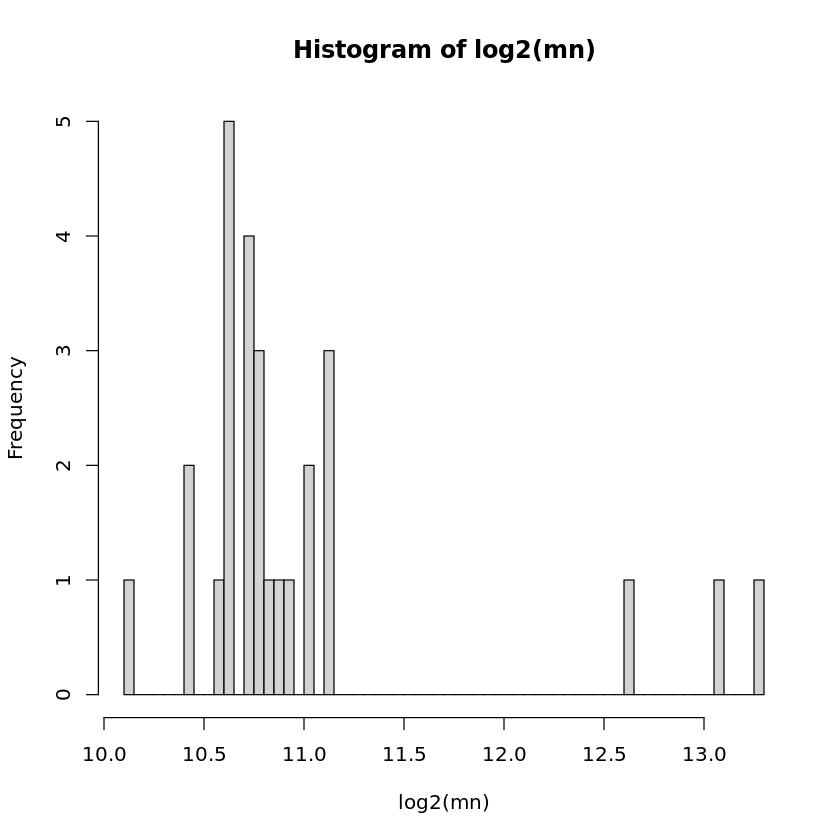

In [4]:
mn <- apply(total_counts_t,1,mean)
hist(log2(mn), breaks = 100)

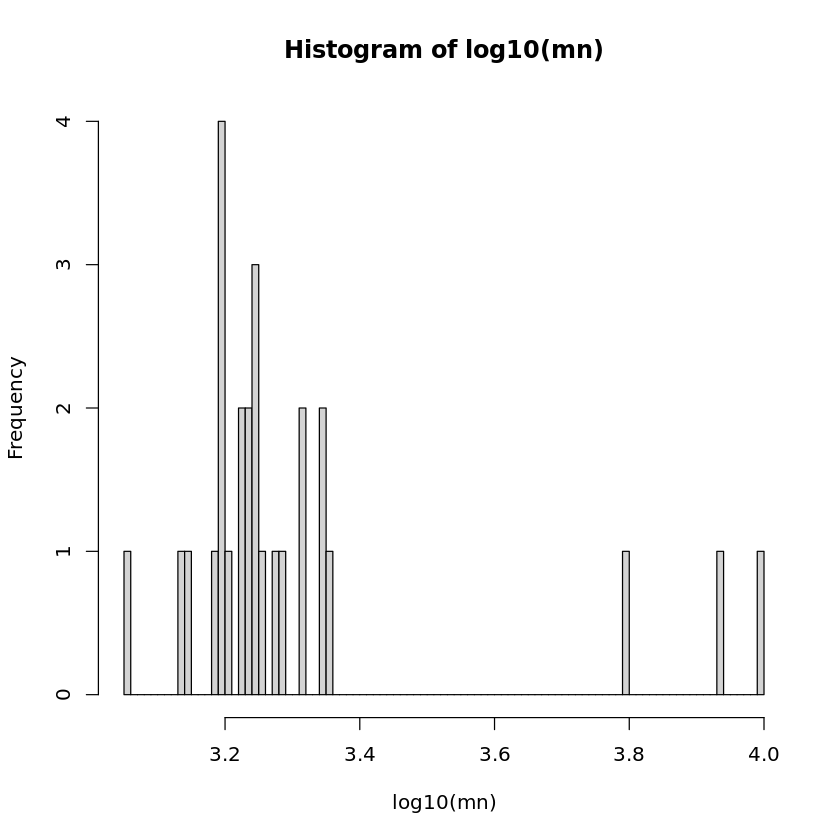

In [5]:
hist(log10(mn), breaks = 100)

Create a DESeq model with genotype and lineage as our variables

In [23]:
dds <- DESeqDataSetFromMatrix(countData = total_counts,
                              colData = sample_info,
                              design = ~lineage + genotype)
str(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  ..@ design            :Class 'formula'  language ~lineage + genotype
  .. .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  ..@ dispersionFunction:function ()  
  ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. ..@ start          : int(0) 
  .. .. .. .. .. .. ..@ width          : int(0) 
  .. .. .. .. .. .. ..@ NAMES          : NULL
  .. .. .. .. .. .. ..@ elementType    : chr "AN

In [7]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5 3.856222          3.946806          3.220686         
ENSG00000227232.5 6.992697          7.212327          7.074586         
ENSG00000278267.1 5.436155          5.861719          5.584291         
                  MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000223972.5 3.683549             3.220686            
ENSG00000227232.5 7.325298             7.289161            
ENSG00000278267.1 5.548131             5.931789            
                  MCF10A_parental_rep3 MCF7_corrected_rep1 MCF7_corrected_rep2
ENSG00000223972.5 3.220686             4.156911            3.999181           
ENSG00000227232.5 7.236597             7.856191            7.922547           
ENSG00000278267.1 5.470514             5.686921            5.902890           
                  MCF7_corrected_rep3 MCF7_parental_rep1 ⋯ HTert_WT_rep3
ENSG00000223972.5 4.204145            4.388572           ⋯ 4.571351     
ENSG00000227232.5 8.194715            8.023409           ⋯ 7.332548     
ENSG00000278267.1 5.408974            5.434338           ⋯ 5.334003     
                  HTert_ex9_rep1 HTert_ex9_rep2 HTert_ex9_rep3 HTert_ex20_rep1
ENSG00000223972.5 3.220686       3.220686       3.978804       4.000782       
ENSG00000227232.5 6.841937       7.199293       7.021494       7.079975       
ENSG00000278267.1 5.098617       5.036062       5.111395       5.656323       
                  HTert_ex20_rep2 HTert_ex20_rep3 T47D_rep1 T47D_rep2 T47D_rep3
ENSG00000223972.5 5.002878        4.042306        3.986405  4.120797  4.269426 
ENSG00000227232.5 6.887659        7.455555        7.638243  7.343501  7.448028 
ENSG00000278267.1 5.225525        5.734737        5.976506  5.281659  5.246910

Here we create a heatmap that displays the similarities of our samples

                     MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
MCF10A_E545K_rep2             97.98686                                    
MCF10A_E545K_rep3             99.02339         103.60375                  
MCF10A_parental_rep1         125.61829         128.30599         129.53502
MCF10A_parental_rep2         129.95545         132.74683         132.96761
MCF10A_parental_rep3         131.01446         133.62823         134.48301
MCF7_corrected_rep1          330.78637         332.83169         334.94252
MCF7_corrected_rep2          329.32535         331.56938         333.47104
MCF7_corrected_rep3          331.14397         333.20894         335.04541
MCF7_parental_rep1           319.48361         321.25158         323.10012
MCF7_parental_rep2           321.90102         323.75246         325.48966
MCF7_parental_rep3           321.13564         322.96296         324.52436
MCF10A_H1047R_rep1           142.52232         144.44058         142.47846
MCF10A_H1047R_rep2       

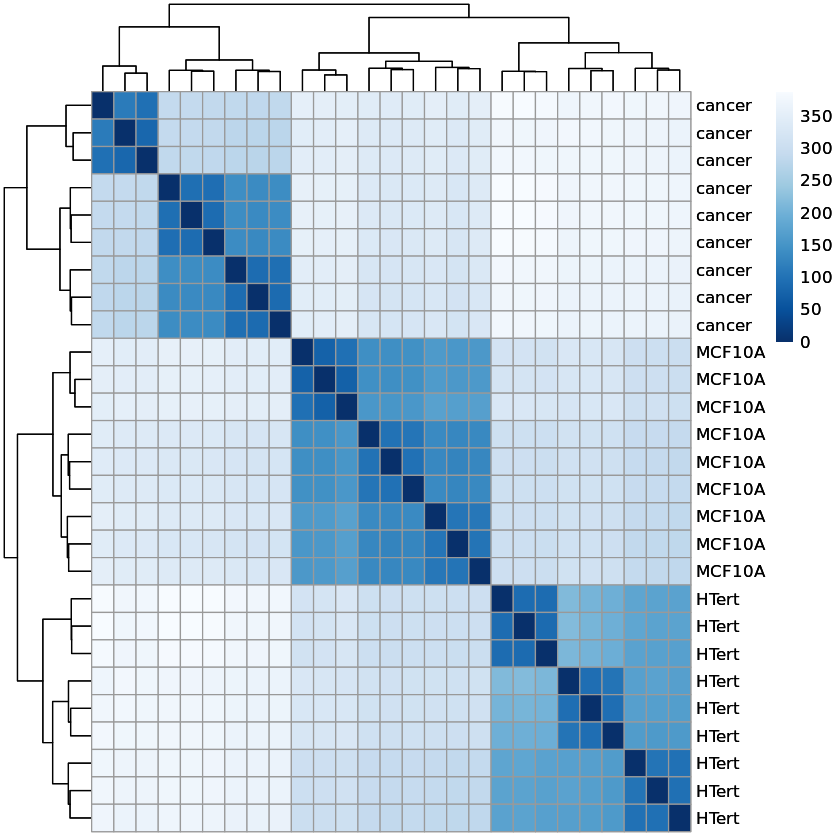

In [8]:
sampleDists <- dist(t(assay(vsd)))
sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames( sampleDistMatrix ) <- vsd$lineage
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
p <- pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)
p

function (which = dev.cur()) 
{
    if (which == 1) 
        stop("cannot shut down device 1 (the null device)")
    .External(C_devoff, as.integer(which))
    dev.cur()
}
<bytecode: 0x563f21be5fb8>
<environment: namespace:grDevices>

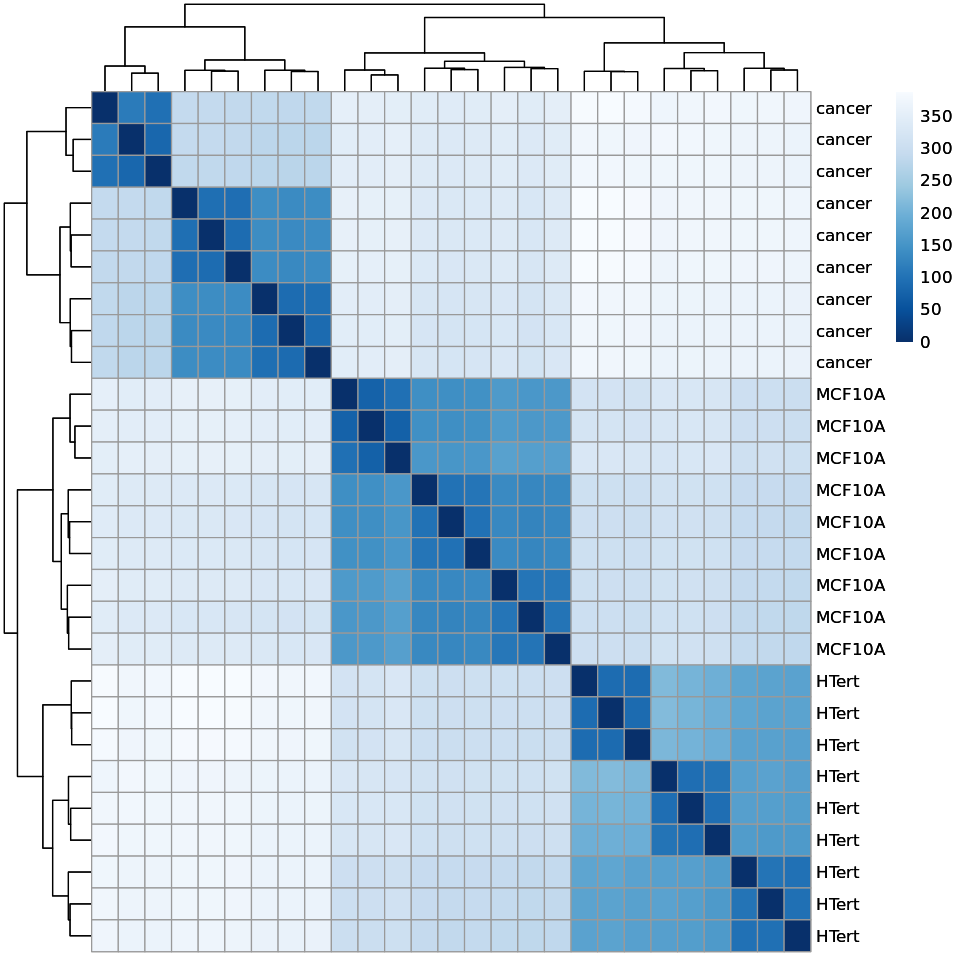

In [9]:
library(repr)
pdf(file = "dist_heatmap.pdf",
   width = 8,
   height = 8)
options(repr.plot.width=8, repr.plot.height=8)
p <- pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)
p
dev.off

Our PCA's show differences between our cell lines not defined by genotype, but rather by lineage

In [ ]:
plotPCA(vsd, intgroup = c("genotype"))
plotPCA(vsd, intgroup = c("lineage"))
plotPCA(vsd, intgroup = c("combo"))

In [ ]:
pdf(file="genotype.pca.pdf")
plotPCA(vsd, intgroup = c("genotype"))
dev.off()

pdf(file="lineage.pca.pdf")
plotPCA(vsd, intgroup = c("lineage"))
dev.off()

pdf(file="combo.pca.pdf")
plotPCA(vsd, intgroup = c("combo"))
dev.off()

In [ ]:
pca <- prcomp(total_counts)

In [ ]:
library(pca3d)
gr <- sample_info$lineage
options(rgl.useNULL = TRUE)
pca3d(pca, group=gr)

In [15]:
dds <- DESeq(dds)
res <- results(dds)
res <- res[order(res$padj),]
head(res)

plotMA(dds,ylim=c(-2,2),main="DESeq2")

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): genotype WT vs ex20 
Wald test p-value: genotype WT vs ex20 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000118432.12  1354.754        7.58013 0.3583380   21.1536 2.55735e-99
ENSG00000165512.5   1009.493        3.19500 0.1781055   17.9388 5.87025e-72
ENSG00000119514.7    528.949        4.77341 0.2753252   17.3374 2.45770e-67
ENSG00000270372.1     27.477       20.24580 1.2004587   16.8651 8.13320e-64
ENSG00000286231.1    774.374        1.47709 0.0877309   16.8366 1.31587e-63
ENSG00000226937.9    544.048        3.20543 0.2008462   15.9596 2.44133e-57
                          padj
                     <numeric>
ENSG00000118432.12 1.07785e-94
ENSG00000165512.5  1.23707e-67
ENSG00000119514.7  3.45282e-63
ENSG00000270372.1  8.56975e-60
ENSG00000286231.1  1.10920e-59
ENSG00000226937.9  1.71491e-53

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.matrix': no method for coercing this S4 class to a vector


## GSVA

In [10]:
myC6 <- getGmt("/data/park_lab/adam/Total_RNA/c6.all.v7.5.1.entrez.gmt")

In [11]:
library('limma')

In [ ]:
dat  <- counts(dds, normalized = TRUE)
idx  <- rowMeans(dat) > 1
dat  <- dat[idx, ]
mod  <- model.matrix(~genotype, colData(dds))
mod0 <- model.matrix(~1, colData(dds))
svseq <- svaseq(dat, mod, mod0)

In [18]:
ddssva <- dds
ddssva$SV1 <- svseq$sv[,1]
ddssva$SV2 <- svseq$sv[,2]
ddssva$SV3 <- svseq$sv[,3]
design(ddssva) <- ~SV1 + SV2 + SV3 + genotype
ddssva <- DESeq(ddssva)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [20]:
vsd_sva <- vst(ddssva, blind = FALSE)
head(assay(vsd_sva), 3)

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5 4.480248          4.550363          3.992213         
ENSG00000227232.5 7.123113          7.326305          7.198645         
ENSG00000278267.1 5.748914          6.112005          5.874170         
                  MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000223972.5 4.347102             3.992213            
ENSG00000227232.5 7.431558             7.397838            
ENSG00000278267.1 5.843483             6.172743            
                  MCF10A_parental_rep3 MCF7_corrected_rep1 MCF7_corrected_rep2
ENSG00000223972.5 3.992213             4.713867            4.591000           
ENSG00000227232.5 7.348877             7.932118            7.995301           
ENSG00000278267.1 5.777859             5.961658            6.147660           
                  MCF7_corrected_rep3 MCF7_parental_rep1 ⋯ HTert_WT_rep3
ENSG00000223972.5 4.750816            4.895846           ⋯ 5.040905     
ENSG00000227232.5 8.255703            8.091575           ⋯ 7.438329     
ENSG00000278267.1 5.726063            5.747386           ⋯ 5.663243     
                  HTert_ex9_rep1 HTert_ex9_rep2 HTert_ex9_rep3 HTert_ex20_rep1
ENSG00000223972.5 3.992213       3.992213       4.575181       4.592244       
ENSG00000227232.5 6.984798       7.314194       7.149643       7.203626       
ENSG00000278267.1 5.467987       5.416592       5.478511       5.935514       
                  HTert_ex20_rep2 HTert_ex20_rep3 T47D_rep1 T47D_rep2 T47D_rep3
ENSG00000223972.5 5.389411        4.624519        4.581081  4.685668  4.802008 
ENSG00000227232.5 7.026642        7.553497        7.725510  7.448562  7.546435 
ENSG00000278267.1 5.572889        6.002618        6.211643  5.619565  5.590651

In [26]:
sva_rlog <- rlog(ddssva, blind = FALSE)
norm_counts <- counts(ddssva, normalized = TRUE)
cov = svseq$sv[,1:3]
counts_sva <- removeBatchEffect(norm_counts, 
                                covariates = cov)
assay(sva_rlog) <- counts_sva

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'plotPCA': object 'angio_ddssva_rlog' not found


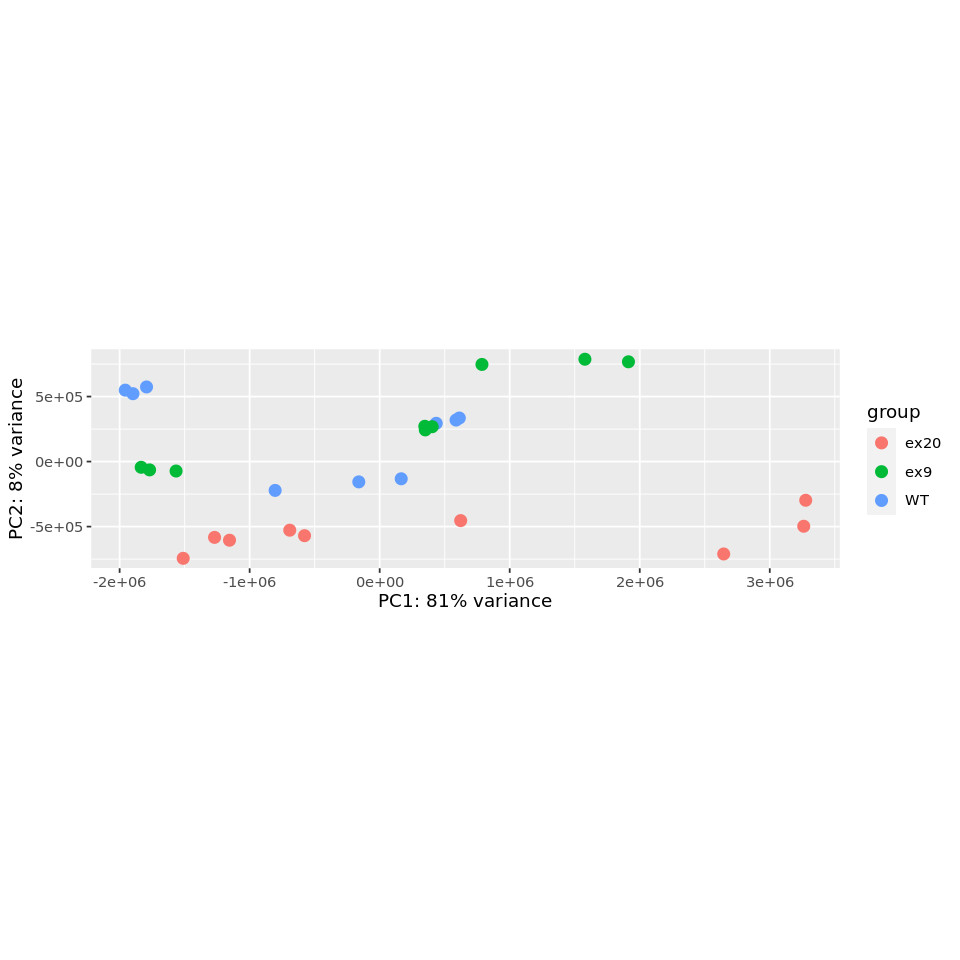

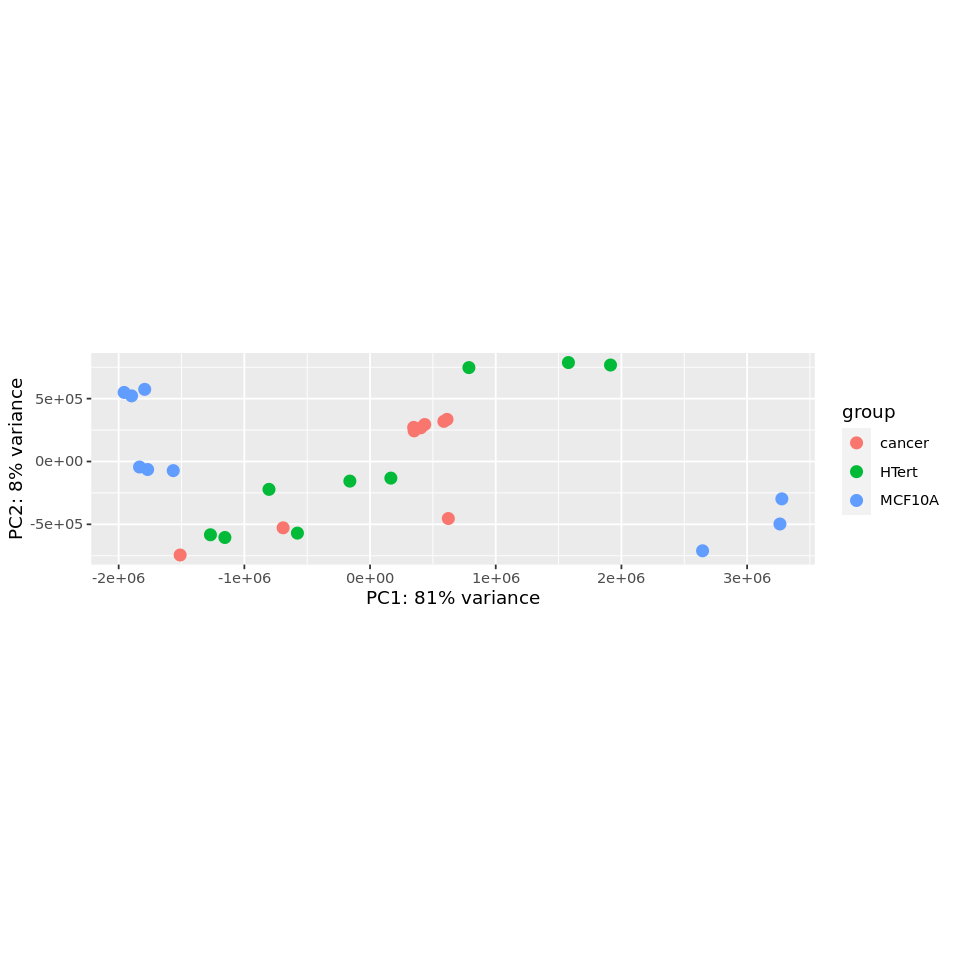

In [30]:
p <- plotPCA(sva_rlog, intgroup = "genotype")
p
p <- plotPCA(sva_rlog, intgroup = "lineage")
p

In [ ]:
plotPCA(vsd_sva, intgroup = c("genotype"))

In [ ]:
resCombo <- results(ddssva,
                    contrast=c("genotype", "ex9", "ex20"))

head(resCombo)
table(resCombo$padj < 0.05)

In [ ]:
cov = cbind(svseq$sv[,1:3])
counts_deseq_sva <- removeBatchEffect(dat, covariates = cov)

In [ ]:
counts_deseq_sva

In [ ]:
cleaningY = function(y, mod, svaobj) {
X=cbind(mod,svaobj$sv)
Hat=solve(t(X)%*%X)%*%t(X)
 beta=(Hat%*%t(y))
P=ncol(mod)
cleany=y-t(as.matrix(X[,-c(1:P)])%*%beta[-c(1:P),])
 return(cleany)
}

In [ ]:
cleany = cleaningY(dat,mod,svseq)

In [ ]:
cleany

In [ ]:
good_names <- rownames(cleany)
good_names <- tools::file_path_sans_ext(c(good_names))
good_names
rownames(cleany) <- good_names
head(cleany)

In [ ]:
genes2 <- mapIds(org.Hs.eg.db,
                     keys=rownames(cleany),
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

In [ ]:
rownames(cleany) = genes2

In [ ]:
cleany

In [ ]:
nas=na.omit(rownames(cleany))

In [ ]:
cleany2sss=cleany[-na.action(nas),]

In [ ]:
dups <- which(duplicated(rownames(cleany2)))

In [ ]:
cleany3=cleany2[-dups,]

In [ ]:
cleany3

In [ ]:
colnames(cleany3)

In [ ]:
sub = c(1,2,3,10,11,12,13,14,15,19,20,21,22,23,24,25,26,27)
exampleSet <- ExpressionSet(assayData = cleany3[,sub])
test = gsva(exprs(exampleSet), myC6, method = "ssgsea",
            kcdf = "Poisson", verbose=TRUE,
            parallel.sz=1, ssgsea.norm = F)

In [ ]:
myvars <- apply(test,1, var,na.rm=TRUE) 
myvars <- sort(myvars,decreasing=TRUE) 
length(myvars)

In [ ]:
expression <- test[names(myvars),] 
dim(expression)

In [ ]:
clinsub=sample_info[sub,]
clinsub

In [ ]:
lp = as.factor(clinsub[,3])
secondp = as.factor(clinsub[,2])

In [4]:
expression

MCF10A_E545K_rep1 MCF10A_E545K_rep2
HINATA_NFKB_IMMU_INF                3419.7528         3426.7727       
SINGH_KRAS_DEPENDENCY_SIGNATURE     4251.9420         4089.8600       
HINATA_NFKB_MATRIX                  7486.7411         7487.6161       
KRAS.50_UP.V1_DN                   -2990.1610        -2972.4779       
KRAS.LUNG_UP.V1_DN                 -1189.9468        -1223.7114       
RB_P107_DN.V1_UP                    4542.0555         4613.0112       
CAHOY_ASTROGLIAL                    2751.5165         2742.3479       
KRAS.50_UP.V1_UP                   -1530.2114        -1460.1070       
BCAT.100_UP.V1_UP                   1709.2563         1784.4552       
KRAS.PROSTATE_UP.V1_DN             -2300.7959        -2283.8603       
GLI1_UP.V1_DN                       5707.2224         5741.8109       
BCAT.100_UP.V1_DN                    913.1410          897.0374       
KRAS.LUNG.BREAST_UP.V1_UP          -1398.5729        -1359.8995       
CORDENONSI_YAP_CONSERVED_SIGNATURE  6900.7549         6883.9865       
EGFR_UP.V1_UP                       4840.0216         4811.9801       
MEL18_DN.V1_UP                      4087.1431         4105.8736       
RPS14_DN.V1_DN                      4086.3856         4160.1111       
MTOR_UP.V1_UP                       3671.3849         3682.8901       
BMI1_DN_MEL18_DN.V1_UP              3670.6276         3674.5420       
KRAS.LUNG.BREAST_UP.V1_DN           -500.8539         -444.4303       
KRAS.600_UP.V1_DN                  -1072.0962        -1032.2161       
BCAT_GDS748_DN                      4929.1969         4897.0502       
KRAS.600.LUNG.BREAST_UP.V1_UP      -1521.6104        -1514.6837       
MEK_UP.V1_UP                        5205.9284         5189.4478       
KRAS.600.LUNG.BREAST_UP.V1_DN       -769.2355         -741.7982       
HOXA9_DN.V1_DN                      5032.8026         5085.6003       
LTE2_UP.V1_DN                       5093.9164         5109.6742       
PRC2_EZH2_UP.V1_DN                  2903.1982         2967.0128       
LTE2_UP.V1_UP                       4726.5579         4706.1157       
ERBB2_UP.V1_DN                      5498.2324         5511.0926       
⋮                                  ⋮                 ⋮                
PRC2_EED_DN.V1_DN                   5304.77849        5348.71901      
DCA_UP.V1_UP                        -113.71880         -96.19855      
IL21_UP.V1_UP                         95.04804          38.31850      
RB_P107_DN.V1_DN                    6162.40911        6125.66248      
PRC1_BMI_UP.V1_UP                    -78.26580         -76.34874      
PRC2_EED_DN.V1_UP                   1668.69068        1649.75396      
RAPA_EARLY_UP.V1_DN                 2841.75328        2818.02406      
P53_DN.V2_DN                        1118.78758        1096.08327      
WNT_UP.V1_DN                        1235.50138        1235.42515      
PDGF_UP.V1_UP                       5406.61943        5424.10247      
AKT_UP_MTOR_DN.V1_UP                3508.61898        3534.86957      
CYCLIN_D1_UP.V1_UP                  3341.90864        3344.30575      
PKCA_DN.V1_DN                       2023.48448        1997.73752      
KRAS.AMP.LUNG_UP.V1_UP             -2867.30780       -2808.70055      
NOTCH_DN.V1_DN                      -382.39990        -361.34703      
JAK2_DN.V1_UP                      -1381.13440       -1380.75809      
CAHOY_ASTROCYTIC                    1550.19018        1517.37867      
TBK1.DN.48HRS_UP                    6355.03024        6370.70765      
CRX_DN.V1_DN                        2771.82591        2768.51476      
TBK1.DF_DN                          7120.60233        7077.85508      
YAP1_UP                             5341.91533        5326.38234      
GCNP_SHH_UP_LATE.V1_DN              3003.62048        3027.85984      
CAMP_UP.V1_DN                       5526.33777        5531.51232      
CAMP_UP.V1_UP                       6419.27076        6426.17149      
NRL_DN.V1_DN                        2926.63118        2906.

In [ ]:
bp=brewer.pal(10,"Spectral")
lp = as.factor(clinsub[,3])
secondp = as.factor(clinsub[,2])
#grid.newpage()
pdf("~/E545KvH1047R.ssgsea.pdf")
my_palette <- colorRampPalette(c("purple", "white", "green"))(n = 1000)
heatmap.2(expression,
          trace = "none",
          col = my_palette,
          margins = c(5,25),
          labCol = "",
          cexRow = .7, ColSideColors = bp[lp]
          key = TRUE, scale = "row")
legend("topright",legend = unique(lp), fill = bp[unique(lp)])
dev.off()

In [ ]:
geneSetClustering <- hclust(as.dist(1-cor(t(expression), method="kendall")),
                            method="complete")
heatmap.2(expression,
          trace = "none",
          col = my_palette,
          margins = c(5,25),
          labCol = "",
          cexRow = .7, ColSideColors = bp[lp],
          key = TRUE, scale = "row",
          Rowv=as.dendrogram(geneSetClustering))
legend("topright",legend = unique(lp), fill = bp[unique(lp)])

In [ ]:
pdf("~/E545KvH1047R_clusteredy.ssgsea.pdf")
my_palette <- colorRampPalette(c("purple", "white", "green"))(n = 1000)
heatmap.2(expression,
          trace = "none",
          col = my_palette,
          margins = c(5,25),
          labCol = "",
          cexRow = .7, ColSideColors = bp[lp],
          key = TRUE, scale = "row",
         Rowv=as.dendrogram(geneSetClustering))
legend("topright",legend = unique(lp), fill = bp[unique(lp)])
dev.off()

In [ ]:
heatmap.2(expression,
          trace = "none",
          col = my_palette,
          margins = c(5,25),
          labCol = "",
          cexRow = .7, ColSideColors = bp[lp],
          key = TRUE, scale = "row",
         )
legend("topright",legend = unique(lp), fill = bp[unique(lp)])

In [ ]:
CRISPR_guides <- read_tsv(file = "MCF10A_guides.txt")
CRISPR_guides

In [ ]:
Gene_targets <- CRISPR_guides %>%
                dplyr::select(Target.Gene.Symbol) %>%
                unique() %>%
                pull(Target.Gene.Symbol) %>%
                sort()
Gene_targets

In [ ]:
test_df <- as.data.frame(test) %>%
            tibble::rownames_to_column("PATHWAY")
number_col <- seq(1, 189, by=1)
test_df$Number_ID <- number_col
test_df

In [ ]:
TGFB_UP <- test_df %>% 
            dplyr::filter(PATHWAY == "TGFB_UP.V1_UP")
TGFB_DN <- test_df %>% 
            dplyr::filter(PATHWAY == "TGFB_UP.V1_DN")
TGFB_UP
TGFB_DN

In [ ]:
TGFB_UP_genes <- myC6[[167]]@geneIds
TGFB_DN_genes <- myC6[[67]]@geneIds
str(TGFB_UP_genes)
str(TGFB_DN_genes)

In [ ]:
TGFB_DN_guides <- CRISPR_guides %>% 
        filter(Target.Gene.ID %in% TGFB_DN_genes)
TGFB_DN_guides
TGFB_DN_targets <- TGFB_DN_guides %>% 
                pull(Target.Gene.Symbol) %>%
                unique() %>%
                sort()
TGFB_DN_targets
TGFB_UP_guides <- CRISPR_guides %>% 
        filter(Target.Gene.ID %in% TGFB_UP_genes)
TGFB_UP_guides
TGFB_UP_targets <- TGFB_UP_guides %>% 
                pull(Target.Gene.Symbol) %>%
                unique() %>%
                sort()
TGFB_UP_targets

### Heatmap Cleanup

In [51]:
expression

function (...)  .Primitive("expression")

In [ ]:
colMeta_df <- data.frame(Genotype = c(rep("E545K", 6), rep("H1047R", 3), rep("E545K", 3), rep("H1047R", 6)), 
                      Lineage = c(rep("MCF10A", 3), rep("MCF7", 3), rep("MCF10A", 3),
                                 rep("HTert-IMEC", 6), rep("T47D", 3)),
                      stringsAsFactors = F, 
                      row.names = colnames(expression))
colMeta_df

In [ ]:
p <- pheatmap(expression,
              clustering_distance_cols = "euclidean", 
              clustering_distance_rows = "euclidean", 
              annotation_col = colMeta_df,
              fontsize_number = 2, 
              scale = "row", 
              cutree_cols = 2,
              show_colnames = FALSE
             )
p

In [ ]:
add.flag <- function(pheatmap,
                     kept.labels,
                     repel.degree) {

  # repel.degree = number within [0, 1], which controls how much 
  #                space to allocate for repelling labels.
  ## repel.degree = 0: spread out labels over existing range of kept labels
  ## repel.degree = 1: spread out labels over the full y-axis

  heatmap <- pheatmap$gtable

  new.label <- heatmap$grobs[[which(heatmap$layout$name == "row_names")]] 

  # keep only labels in kept.labels, replace the rest with ""
  new.label$label <- ifelse(new.label$label %in% kept.labels, 
                            new.label$label, "")

  # calculate evenly spaced out y-axis positions
  repelled.y <- function(d, d.select, k = repel.degree){
    # d = vector of distances for labels
    # d.select = vector of T/F for which labels are significant

    # recursive function to get current label positions
    # (note the unit is "npc" for all components of each distance)
    strip.npc <- function(dd){
      if(!"unit.arithmetic" %in% class(dd)) {
        return(as.numeric(dd))
      }

      d1 <- strip.npc(dd$arg1)
      d2 <- strip.npc(dd$arg2)
      fn <- dd$fname
      return(lazyeval::lazy_eval(paste(d1, fn, d2)))
    }

    full.range <- sapply(seq_along(d), function(i) strip.npc(d[i]))
    selected.range <- sapply(seq_along(d[d.select]), function(i) strip.npc(d[d.select][i]))

    return(unit(seq(from = max(selected.range) + k*(max(full.range) - max(selected.range)),
                    to = min(selected.range) - k*(min(selected.range) - min(full.range)), 
                    length.out = sum(d.select)), 
                "npc"))
  }
  new.y.positions <- repelled.y(new.label$y,
                                d.select = new.label$label != "")
  new.flag <- segmentsGrob(x0 = new.label$x,
                           x1 = new.label$x + unit(0.15, "npc"),
                           y0 = new.label$y[new.label$label != ""],
                           y1 = new.y.positions)

  # shift position for selected labels
  new.label$x <- new.label$x + unit(0.2, "npc")
  new.label$y[new.label$label != ""] <- new.y.positions

  # add flag to heatmap
  heatmap <- gtable::gtable_add_grob(x = heatmap,
                                   grobs = new.flag,
                                   t = 4, 
                                   l = 4
  )

  # replace label positions in heatmap
  heatmap$grobs[[which(heatmap$layout$name == "row_names")]] <- new.label

  # plot result
  grid.newpage()
  grid.draw(heatmap)

  # return a copy of the heatmap invisibly
  invisible(heatmap)
}

In [ ]:
sort(rownames(expression))

In [ ]:
sets_of_int <- c("AKT_UP_MTOR_DN.V1_DN", "AKT_UP_MTOR_DN.V1_UP",
                "AKT_UP.V1_DN", "AKT_UP.V1_UP", 
                "ATF2_S_UP.V1_UP", "ATF2_UP.V1_DN", "ATF2_UP.V1_UP", 
                "JNK_DN.V1_DN", "JNK_DN.V1_UP", 
                "PTEN_DN.V1_DN", "PTEN_DN.V1_UP", "PTEN_DN.V2_DN", "PTEN_DN.V2_UP", 
                "MTOR_UP.V1_DN", "MTOR_UP.V1_UP", 
                "MYC_UP.V1_DN", "MYC_UP.V1_UP", 
                "TGFB_UP.V1_DN", "TGFB_UP.V1_UP")

In [ ]:
p_improved <- add.flag(p, sets_of_int, 0)
p_improved

In [ ]:
ggsave(filename = "GSVA_heatmap_clean.pdf", plot = p_improved)

### T-SNE?

#### By sample

In [2]:
expression_t <- t(expression)
expression_t

HINATA_NFKB_IMMU_INF SINGH_KRAS_DEPENDENCY_SIGNATURE
MCF10A_E545K_rep1  3419.753             4251.942                       
MCF10A_E545K_rep2  3426.773             4089.860                       
MCF10A_E545K_rep3  3384.382             4005.976                       
MCF7_parental_rep1 2408.279             4409.011                       
MCF7_parental_rep2 2474.730             4454.139                       
MCF7_parental_rep3 2361.795             4391.587                       
MCF10A_H1047R_rep1 3077.501             3393.892                       
MCF10A_H1047R_rep2 3541.680             3236.355                       
MCF10A_H1047R_rep3 3781.160             2848.025                       
HTert_ex9_rep1     2273.659             4004.113                       
HTert_ex9_rep2     2356.699             4095.213                       
HTert_ex9_rep3     2220.179             3989.855                       
HTert_ex20_rep1    3905.480             4827.838                       
HTert_ex20_rep2    4179.733             4756.339                       
HTert_ex20_rep3    3664.413             5031.784                       
T47D_rep1          3881.268             5003.084                       
T47D_rep2          3846.325             4873.840                       
T47D_rep3          3771.736             4977.082                       
                   HINATA_NFKB_MATRIX KRAS.50_UP.V1_DN KRAS.LUNG_UP.V1_DN
MCF10A_E545K_rep1  7486.741           -2990.161        -1189.9468        
MCF10A_E545K_rep2  7487.616           -2972.478        -1223.7114        
MCF10A_E545K_rep3  7488.923           -2963.870        -1255.5788        
MCF7_parental_rep1 7144.011           -2352.700         -724.5967        
MCF7_parental_rep2 7368.155           -2307.379         -660.3229        
MCF7_parental_rep3 7366.390           -2322.439         -664.7250        
MCF10A_H1047R_rep1 6260.457           -1322.024          161.6056        
MCF10A_H1047R_rep2 6164.522           -1318.414          322.3577        
MCF10A_H1047R_rep3 6017.192           -1562.185          279.8101        
HTert_ex9_rep1     6867.269           -1683.147         -624.7184        
HTert_ex9_rep2     7272.513           -1606.897         -604.6214        
HTert_ex9_rep3     7145.401           -1645.601         -687.9366        
HTert_ex20_rep1    7911.246           -2371.106         -663.9501        
HTert_ex20_rep2    7923.708           -2401.324         -755.6941        
HTert_ex20_rep3    7749.008           -2288.342         -654.8633        
T47D_rep1          7474.900           -2249.292         -367.5793        
T47D_rep2          7753.067           -2085.864         -400.2107        
T47D_rep3          7768.634           -2098.082         -395.0658        
                   RB_P107_DN.V1_UP CAHOY_ASTROGLIAL KRAS.50_UP.V1_UP
MCF10A_E545K_rep1  4542.055         2751.516         -1530.211       
MCF10A_E545K_rep2  4613.011         2742.348         -1460.107       
MCF10A_E545K_rep3  4626.825         2686.846         -1478.931       
MCF7_parental_rep1 4827.095         2963.341         -2298.622       
MCF7_parental_rep2 4810.906         2952.926         -2353.218       
MCF7_parental_rep3 4795.466         2956.074         -2334.921       
MCF10A_H1047R_rep1 4608.651         2817.760         -1657.674       
MCF10A_H1047R_rep2 4543.584         2971.676         -1727.447       
MCF10A_H1047R_rep3 4495.330         3071.120         -1759.127       
HTert_ex9_rep1     5177.653         3136.881         -1648.619       
HTert_ex9_rep2     4983.543         3233.721         -1929.122       
HTert_ex9_rep3     5059.186         3100.005         -1738.078       
HTert_ex20_rep1    4106.187         2110.627         -1180.003       
HTert_ex20_rep2    4234.097         2085.015         -1152.898       
HTert_ex20_rep3    3903.934         2216.266         -1194.464       
T47D_rep1          3720.929         2436.862         -1565.282       
T47D_rep2          4110.898         2121.317         -1

In [3]:
meta_data <- as.data.frame(cbind(rownames(expression_t), 
                                 c(rep("MCF10A", 3), rep("MCF7", 3),
                                                        rep("MCF10A", 3), rep("H-Tert IMEC", 6),
                                                        rep("T47D", 3)), 
                                 c(rep("E545K", 6), rep("H1047R", 3), 
                                  rep("E545K", 3), rep("H1047R", 6))))
meta_data

V1                 V2          V3    
1  MCF10A_E545K_rep1  MCF10A      E545K 
2  MCF10A_E545K_rep2  MCF10A      E545K 
3  MCF10A_E545K_rep3  MCF10A      E545K 
4  MCF7_parental_rep1 MCF7        E545K 
5  MCF7_parental_rep2 MCF7        E545K 
6  MCF7_parental_rep3 MCF7        E545K 
7  MCF10A_H1047R_rep1 MCF10A      H1047R
8  MCF10A_H1047R_rep2 MCF10A      H1047R
9  MCF10A_H1047R_rep3 MCF10A      H1047R
10 HTert_ex9_rep1     H-Tert IMEC E545K 
11 HTert_ex9_rep2     H-Tert IMEC E545K 
12 HTert_ex9_rep3     H-Tert IMEC E545K 
13 HTert_ex20_rep1    H-Tert IMEC H1047R
14 HTert_ex20_rep2    H-Tert IMEC H1047R
15 HTert_ex20_rep3    H-Tert IMEC H1047R
16 T47D_rep1          T47D        H1047R
17 T47D_rep2          T47D        H1047R
18 T47D_rep3          T47D        H1047R

In [4]:
tsneby_sample <- tsne(expression_t)

Warning message in if (class(X) == "dist") {:
"the condition has length > 1 and only the first element will be used"
sigma summary: Min. : 33554432 |1st Qu. : 33554432 |Median : 33554432 |Mean : 33554432 |3rd Qu. : 33554432 |Max. : 33554432 |

Epoch: Iteration #100 error is: 12.4198276505559

Epoch: Iteration #200 error is: 0.614270754336277

Epoch: Iteration #300 error is: 0.409019679671326

Epoch: Iteration #400 error is: 0.393564624705009

Epoch: Iteration #500 error is: 0.392613472110647

Epoch: Iteration #600 error is: 0.391667256518258

Epoch: Iteration #700 error is: 0.387811037609023

Epoch: Iteration #800 error is: 0.385577578559689

Epoch: Iteration #900 error is: 0.383452296035

Epoch: Iteration #1000 error is: 0.381590119069146



In [5]:
tsneby_sample

[,1]        [,2]       
 [1,] -677.485800 -542.876490
 [2,] -330.496295  319.556911
 [3,] -141.238913 -432.057812
 [4,] -927.035939  -75.158141
 [5,]   90.301160  457.764444
 [6,]  423.143785  144.514531
 [7,]  547.165351  660.706949
 [8,]  898.650998  293.104562
 [9,] -398.116486  794.255181
[10,]  796.145676 -191.510264
[11,]   -5.304612    4.517553
[12,]  101.558661  936.711336
[13,]  307.436408 -314.396190
[14,] -304.017094 -893.109307
[15,]  670.588469 -668.898160
[16,]  193.876079 -813.634039
[17,] -452.465904 -103.688334
[18,] -792.705543  424.197268

In [6]:
tsneby_sample_df <- cbind(tsneby_sample, meta_data)
names(tsneby_sample_df) <- c("tSNE1", "tSNE2", "sample", "Lineage", "Genotype")
tsneby_sample_df

tSNE1       tSNE2       sample             Lineage     Genotype
1  -677.485800 -542.876490 MCF10A_E545K_rep1  MCF10A      E545K   
2  -330.496295  319.556911 MCF10A_E545K_rep2  MCF10A      E545K   
3  -141.238913 -432.057812 MCF10A_E545K_rep3  MCF10A      E545K   
4  -927.035939  -75.158141 MCF7_parental_rep1 MCF7        E545K   
5    90.301160  457.764444 MCF7_parental_rep2 MCF7        E545K   
6   423.143785  144.514531 MCF7_parental_rep3 MCF7        E545K   
7   547.165351  660.706949 MCF10A_H1047R_rep1 MCF10A      H1047R  
8   898.650998  293.104562 MCF10A_H1047R_rep2 MCF10A      H1047R  
9  -398.116486  794.255181 MCF10A_H1047R_rep3 MCF10A      H1047R  
10  796.145676 -191.510264 HTert_ex9_rep1     H-Tert IMEC E545K   
11   -5.304612    4.517553 HTert_ex9_rep2     H-Tert IMEC E545K   
12  101.558661  936.711336 HTert_ex9_rep3     H-Tert IMEC E545K   
13  307.436408 -314.396190 HTert_ex20_rep1    H-Tert IMEC H1047R  
14 -304.017094 -893.109307 HTert_ex20_rep2    H-Tert IMEC H1047R  
15  670.588469 -668.898160 HTert_ex20_rep3    H-Tert IMEC H1047R  
16  193.876079 -813.634039 T47D_rep1          T47D        H1047R  
17 -452.465904 -103.688334 T47D_rep2          T47D        H1047R  
18 -792.705543  424.197268 T47D_rep3          T47D        H1047R

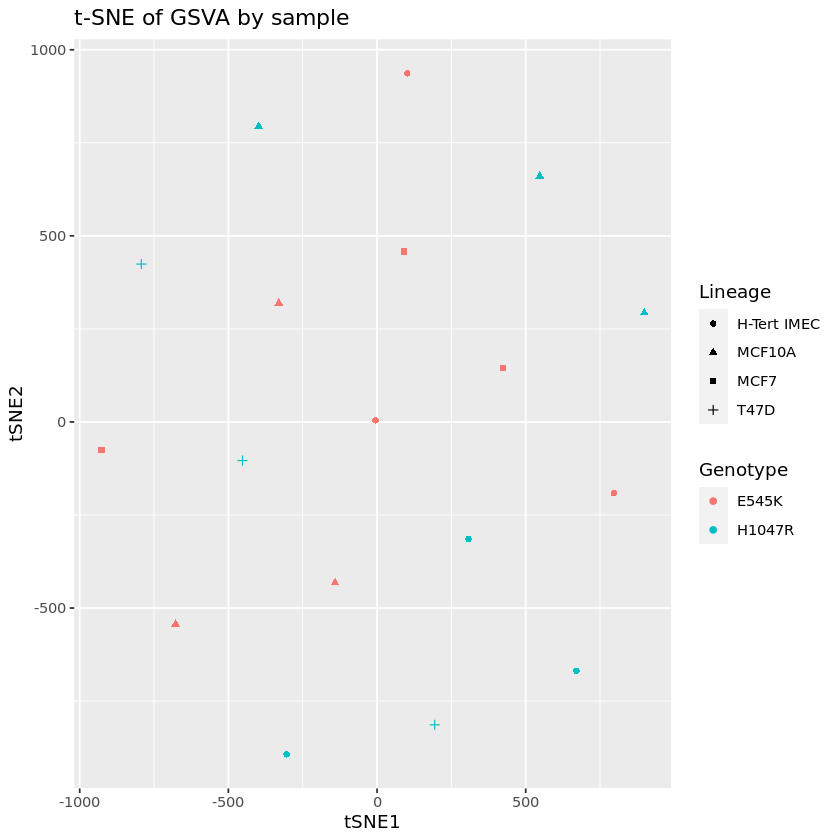

In [7]:
tSNE_plot <- tsneby_sample_df %>%
             ggplot(aes(x = tSNE1, 
             y = tSNE2,
             color = Genotype,
             shape = Lineage))+
             geom_point()+
             theme(legend.position="right")+ 
             ggtitle("t-SNE of GSVA by sample")
tSNE_plot

#### By GSVA Pathways

In [8]:
expression

MCF10A_E545K_rep1 MCF10A_E545K_rep2
HINATA_NFKB_IMMU_INF                3419.7528         3426.7727       
SINGH_KRAS_DEPENDENCY_SIGNATURE     4251.9420         4089.8600       
HINATA_NFKB_MATRIX                  7486.7411         7487.6161       
KRAS.50_UP.V1_DN                   -2990.1610        -2972.4779       
KRAS.LUNG_UP.V1_DN                 -1189.9468        -1223.7114       
RB_P107_DN.V1_UP                    4542.0555         4613.0112       
CAHOY_ASTROGLIAL                    2751.5165         2742.3479       
KRAS.50_UP.V1_UP                   -1530.2114        -1460.1070       
BCAT.100_UP.V1_UP                   1709.2563         1784.4552       
KRAS.PROSTATE_UP.V1_DN             -2300.7959        -2283.8603       
GLI1_UP.V1_DN                       5707.2224         5741.8109       
BCAT.100_UP.V1_DN                    913.1410          897.0374       
KRAS.LUNG.BREAST_UP.V1_UP          -1398.5729        -1359.8995       
CORDENONSI_YAP_CONSERVED_SIGNATURE  6900.7549         6883.9865       
EGFR_UP.V1_UP                       4840.0216         4811.9801       
MEL18_DN.V1_UP                      4087.1431         4105.8736       
RPS14_DN.V1_DN                      4086.3856         4160.1111       
MTOR_UP.V1_UP                       3671.3849         3682.8901       
BMI1_DN_MEL18_DN.V1_UP              3670.6276         3674.5420       
KRAS.LUNG.BREAST_UP.V1_DN           -500.8539         -444.4303       
KRAS.600_UP.V1_DN                  -1072.0962        -1032.2161       
BCAT_GDS748_DN                      4929.1969         4897.0502       
KRAS.600.LUNG.BREAST_UP.V1_UP      -1521.6104        -1514.6837       
MEK_UP.V1_UP                        5205.9284         5189.4478       
KRAS.600.LUNG.BREAST_UP.V1_DN       -769.2355         -741.7982       
HOXA9_DN.V1_DN                      5032.8026         5085.6003       
LTE2_UP.V1_DN                       5093.9164         5109.6742       
PRC2_EZH2_UP.V1_DN                  2903.1982         2967.0128       
LTE2_UP.V1_UP                       4726.5579         4706.1157       
ERBB2_UP.V1_DN                      5498.2324         5511.0926       
⋮                                  ⋮                 ⋮                
PRC2_EED_DN.V1_DN                   5304.77849        5348.71901      
DCA_UP.V1_UP                        -113.71880         -96.19855      
IL21_UP.V1_UP                         95.04804          38.31850      
RB_P107_DN.V1_DN                    6162.40911        6125.66248      
PRC1_BMI_UP.V1_UP                    -78.26580         -76.34874      
PRC2_EED_DN.V1_UP                   1668.69068        1649.75396      
RAPA_EARLY_UP.V1_DN                 2841.75328        2818.02406      
P53_DN.V2_DN                        1118.78758        1096.08327      
WNT_UP.V1_DN                        1235.50138        1235.42515      
PDGF_UP.V1_UP                       5406.61943        5424.10247      
AKT_UP_MTOR_DN.V1_UP                3508.61898        3534.86957      
CYCLIN_D1_UP.V1_UP                  3341.90864        3344.30575      
PKCA_DN.V1_DN                       2023.48448        1997.73752      
KRAS.AMP.LUNG_UP.V1_UP             -2867.30780       -2808.70055      
NOTCH_DN.V1_DN                      -382.39990        -361.34703      
JAK2_DN.V1_UP                      -1381.13440       -1380.75809      
CAHOY_ASTROCYTIC                    1550.19018        1517.37867      
TBK1.DN.48HRS_UP                    6355.03024        6370.70765      
CRX_DN.V1_DN                        2771.82591        2768.51476      
TBK1.DF_DN                          7120.60233        7077.85508      
YAP1_UP                             5341.91533        5326.38234      
GCNP_SHH_UP_LATE.V1_DN              3003.62048        3027.85984      
CAMP_UP.V1_DN                       5526.33777        5531.51232      
CAMP_UP.V1_UP                       6419.27076        6426.17149      
NRL_DN.V1_DN                        2926.63118        2906.

In [9]:
path_names <- rownames(expression)
path_names

[1] "HINATA_NFKB_IMMU_INF"               "SINGH_KRAS_DEPENDENCY_SIGNATURE"   
  [3] "HINATA_NFKB_MATRIX"                 "KRAS.50_UP.V1_DN"                  
  [5] "KRAS.LUNG_UP.V1_DN"                 "RB_P107_DN.V1_UP"                  
  [7] "CAHOY_ASTROGLIAL"                   "KRAS.50_UP.V1_UP"                  
  [9] "BCAT.100_UP.V1_UP"                  "KRAS.PROSTATE_UP.V1_DN"            
 [11] "GLI1_UP.V1_DN"                      "BCAT.100_UP.V1_DN"                 
 [13] "KRAS.LUNG.BREAST_UP.V1_UP"          "CORDENONSI_YAP_CONSERVED_SIGNATURE"
 [15] "EGFR_UP.V1_UP"                      "MEL18_DN.V1_UP"                    
 [17] "RPS14_DN.V1_DN"                     "MTOR_UP.V1_UP"                     
 [19] "BMI1_DN_MEL18_DN.V1_UP"             "KRAS.LUNG.BREAST_UP.V1_DN"         
 [21] "KRAS.600_UP.V1_DN"                  "BCAT_GDS748_DN"                    
 [23] "KRAS.600.LUNG.BREAST_UP.V1_UP"      "MEK_UP.V1_UP"                      
 [25] "KRAS.600.LUNG.BREAST_UP.V1_DN"      "HOXA9_DN.V1_DN"                    
 [27] "LTE2_UP.V1_DN"                      "PRC2_EZH2_UP.V1_DN"                
 [29] "LTE2_UP.V1_UP"                      "ERBB2_UP.V1_DN"                    
 [31] "KRAS.300_UP.V1_DN"                  "KRAS.KIDNEY_UP.V1_UP"              
 [33] "BCAT_BILD_ET_AL_DN"                 "CSR_LATE_UP.V1_UP"                 
 [35] "EGFR_UP.V1_DN"                      "GLI1_UP.V1_UP"                     
 [37] "EIF4E_UP"                           "KRAS.LUNG_UP.V1_UP"                
 [39] "BCAT_GDS748_UP"                     "MYC_UP.V1_UP"                      
 [41] "E2F3_UP.V1_UP"                      "BMI1_DN.V1_UP"                     
 [43] "YAP1_DN"                            "ERBB2_UP.V1_UP"                    
 [45] "ATF2_UP.V1_DN"                      "KRAS.BREAST_UP.V1_DN"              
 [47] "RB_DN.V1_UP"                        "RB_DN.V1_DN"                       
 [49] "ALK_DN.V1_DN"                       "RELA_DN.V1_DN"                     
 [51] "KRAS.600_UP.V1_UP"                  "PRC2_SUZ12_UP.V1_UP"               
 [53] "STK33_NOMO_UP"                      "RB_P130_DN.V1_UP"                  
 [55] "RPS14_DN.V1_UP"                     "STK33_UP"                          
 [57] "MEL18_DN.V1_DN"                     "CSR_EARLY_UP.V1_DN"                
 [59] "ESC_V6.5_UP_EARLY.V1_UP"            "IL15_UP.V1_DN"                     
 [61] "MTOR_UP.N4.V1_UP"                   "E2F1_UP.V1_UP"                     
 [63] "PRC2_EZH2_UP.V1_UP"                 "CSR_LATE_UP.V1_DN"                 
 [65] "ALK_DN.V1_UP"                       "P53_DN.V2_UP"                      
 [67] "MYC_UP.V1_DN"                       "SNF5_DN.V1_UP"                     
 [69] "NFE2L2.V2"                          "RAF_UP.V1_DN"                      
 [71] "MEK_UP.V1_DN"                       "GCNP_SHH_UP_EARLY.V1_DN"           
 [73] "P53_DN.V1_UP"                       "LEF1_UP.V1_UP"                     
 [75] "CTIP_DN.V1_DN"                      "JAK2_DN.V1_DN"                     
 [77] "TGFB_UP.V1_UP"                      "E2F1_UP.V1_DN"                     
 [79] "ESC_J1_UP_EARLY.V1_UP"              "BMI1_DN_MEL18_DN.V1_DN"            
 [81] "KRAS.KIDNEY_UP.V1_DN"               "RELA_DN.V1_UP"                     
 [83] "CYCLIN_D1_KE_.V1_DN"                "KRAS.AMP.LUNG_UP.V1_DN"            
 [85] "CSR_EARLY_UP.V1_UP"                 "PTEN_DN.V1_UP"                     
 [87] "WNT_UP.V1_UP"                       "KRAS.300_UP.V1_UP"                 
 [89] "BRCA1_DN.V1_UP"                     "SRC_UP.V1_UP"                      
 [91] "LEF1_UP.V1_DN"                      "IL2_UP.V1_UP"                      
 [93] "RAF_UP.V1_UP"                       "STK33_DN"                          
 [95] "JNK_DN.V1_UP"                       "ATF2_S_UP.V1_DN"                   
 [97] "CAHOY_NEURONAL"                     "AKT_UP_MTOR_DN.V1_DN"              
 [99] "PRC1_BMI_UP.V1_DN"                  "BMI1_DN.V1_DN"                     
[1

In [10]:
tsneby_path <- tsne(expression)
tsneby_path

Warning message in if (class(X) == "dist") {:
"the condition has length > 1 and only the first element will be used"
sigma summary: Min. : 0.476158976449764 |1st Qu. : 0.574670350296088 |Median : 0.602788608171152 |Mean : 0.616485466805766 |3rd Qu. : 0.642617976428166 |Max. : 0.859993009698267 |

Epoch: Iteration #100 error is: 16.3645579729118

Epoch: Iteration #200 error is: 1.05133241897258

Epoch: Iteration #300 error is: 1.00127785300626

Epoch: Iteration #400 error is: 0.997729194173366

Epoch: Iteration #500 error is: 0.997388856898809

Epoch: Iteration #600 error is: 0.997388851432677

Epoch: Iteration #700 error is: 0.9973888514318

Epoch: Iteration #800 error is: 0.9973888514318

Epoch: Iteration #900 error is: 0.9973888514318

Epoch: Iteration #1000 error is: 0.9973888514318



[,1]       [,2]        
 [1,]  6.8360142   3.48165236
 [2,] -5.0831691   9.35616613
 [3,] -3.6350343   0.06133913
 [4,]  9.4869598   8.61194110
 [5,] 10.6664957   8.04583095
 [6,]  8.0999929  -8.49246659
 [7,]  1.0958488 -12.31547145
 [8,]  4.6950751 -13.07629695
 [9,]  1.2334645   6.51097641
[10,] 10.2097613   8.20394369
[11,] -7.8672738   0.55866493
[12,] -7.6839482   8.03083955
[13,] 13.8270067   0.99121730
[14,] 11.4809592  -4.08547686
[15,] -1.5549123   9.64587029
[16,]  3.7878454  -0.51558156
[17,]  5.1926188  -9.63931159
[18,]  0.4304489  -7.33295387
[19,]  4.4286238  -1.66959143
[20,]  8.1781862   6.31746637
[21,]  7.6363182   6.47556985
[22,]  0.4190964   8.80300016
[23,] 13.4099096   0.97428409
[24,] -3.8775932   2.83246932
[25,]  6.8720715   6.43883293
[26,]  1.7726876  -9.14158194
[27,]  9.3175539  -5.60756049
[28,]  5.9044582  -7.56312179
[29,] -4.6378664   2.14272594
[30,]  9.1330559  -4.79201058
[31,] ⋮          ⋮           
[32,]  4.2366703  3.5083387  
[33,] -1.0868977  2.0940845  
[34,] -4.1956641  6.9950938  
[35,]  4.7861354  1.1837061  
[36,] -1.3248168 -4.5580213  
[37,] -1.6487427 -3.5897034  
[38,] -5.4997380 -2.9819384  
[39,] -3.0543846 -0.4217150  
[40,] -2.7817442 -3.6425709  
[41,]  1.0325371 -1.7799419  
[42,]  1.5957946 -3.5992727  
[43,] -0.4167828  5.5085711  
[44,] -2.9839552 -4.7757825  
[45,]  2.0139957 -6.7158585  
[46,] -7.6861465 -4.8177271  
[47,] -8.1123549 -2.4466115  
[48,] -1.4686673  1.8312685  
[49,]  5.9973929  3.3704095  
[50,] -2.3559135  5.1489404  
[51,]  7.6236114 -2.2045049  
[52,]  6.2063013 -0.2573809  
[53,] -0.2351118 -1.4931343  
[54,]  3.2805612  1.6781723  
[55,]  5.0712986  3.0742982  
[56,] -2.8052706 -1.6832266  
[57,] -2.3737634  7.9397083  
[58,] -4.6142403  7.5884578  
[59,] -3.3630788 -1.5020019  
[60,]  2.8195246  2.0371781  
[61,] -5.3065473 -3.2544316

In [34]:
path_names
Path_group <- gsub(x = path_names, pattern = "_*", replacement = "") %>%
            gsub(pattern = "\\..*", replacement = "") %>%
            gsub(pattern = "UP", replacement = "") %>% 
            gsub(pattern = "DN", replacement = "")
Path_group

[1] "HINATA_NFKB_IMMU_INF"               "SINGH_KRAS_DEPENDENCY_SIGNATURE"   
  [3] "HINATA_NFKB_MATRIX"                 "KRAS.50_UP.V1_DN"                  
  [5] "KRAS.LUNG_UP.V1_DN"                 "RB_P107_DN.V1_UP"                  
  [7] "CAHOY_ASTROGLIAL"                   "KRAS.50_UP.V1_UP"                  
  [9] "BCAT.100_UP.V1_UP"                  "KRAS.PROSTATE_UP.V1_DN"            
 [11] "GLI1_UP.V1_DN"                      "BCAT.100_UP.V1_DN"                 
 [13] "KRAS.LUNG.BREAST_UP.V1_UP"          "CORDENONSI_YAP_CONSERVED_SIGNATURE"
 [15] "EGFR_UP.V1_UP"                      "MEL18_DN.V1_UP"                    
 [17] "RPS14_DN.V1_DN"                     "MTOR_UP.V1_UP"                     
 [19] "BMI1_DN_MEL18_DN.V1_UP"             "KRAS.LUNG.BREAST_UP.V1_DN"         
 [21] "KRAS.600_UP.V1_DN"                  "BCAT_GDS748_DN"                    
 [23] "KRAS.600.LUNG.BREAST_UP.V1_UP"      "MEK_UP.V1_UP"                      
 [25] "KRAS.600.LUNG.BREAST_UP.V1_DN"      "HOXA9_DN.V1_DN"                    
 [27] "LTE2_UP.V1_DN"                      "PRC2_EZH2_UP.V1_DN"                
 [29] "LTE2_UP.V1_UP"                      "ERBB2_UP.V1_DN"                    
 [31] "KRAS.300_UP.V1_DN"                  "KRAS.KIDNEY_UP.V1_UP"              
 [33] "BCAT_BILD_ET_AL_DN"                 "CSR_LATE_UP.V1_UP"                 
 [35] "EGFR_UP.V1_DN"                      "GLI1_UP.V1_UP"                     
 [37] "EIF4E_UP"                           "KRAS.LUNG_UP.V1_UP"                
 [39] "BCAT_GDS748_UP"                     "MYC_UP.V1_UP"                      
 [41] "E2F3_UP.V1_UP"                      "BMI1_DN.V1_UP"                     
 [43] "YAP1_DN"                            "ERBB2_UP.V1_UP"                    
 [45] "ATF2_UP.V1_DN"                      "KRAS.BREAST_UP.V1_DN"              
 [47] "RB_DN.V1_UP"                        "RB_DN.V1_DN"                       
 [49] "ALK_DN.V1_DN"                       "RELA_DN.V1_DN"                     
 [51] "KRAS.600_UP.V1_UP"                  "PRC2_SUZ12_UP.V1_UP"               
 [53] "STK33_NOMO_UP"                      "RB_P130_DN.V1_UP"                  
 [55] "RPS14_DN.V1_UP"                     "STK33_UP"                          
 [57] "MEL18_DN.V1_DN"                     "CSR_EARLY_UP.V1_DN"                
 [59] "ESC_V6.5_UP_EARLY.V1_UP"            "IL15_UP.V1_DN"                     
 [61] "MTOR_UP.N4.V1_UP"                   "E2F1_UP.V1_UP"                     
 [63] "PRC2_EZH2_UP.V1_UP"                 "CSR_LATE_UP.V1_DN"                 
 [65] "ALK_DN.V1_UP"                       "P53_DN.V2_UP"                      
 [67] "MYC_UP.V1_DN"                       "SNF5_DN.V1_UP"                     
 [69] "NFE2L2.V2"                          "RAF_UP.V1_DN"                      
 [71] "MEK_UP.V1_DN"                       "GCNP_SHH_UP_EARLY.V1_DN"           
 [73] "P53_DN.V1_UP"                       "LEF1_UP.V1_UP"                     
 [75] "CTIP_DN.V1_DN"                      "JAK2_DN.V1_DN"                     
 [77] "TGFB_UP.V1_UP"                      "E2F1_UP.V1_DN"                     
 [79] "ESC_J1_UP_EARLY.V1_UP"              "BMI1_DN_MEL18_DN.V1_DN"            
 [81] "KRAS.KIDNEY_UP.V1_DN"               "RELA_DN.V1_UP"                     
 [83] "CYCLIN_D1_KE_.V1_DN"                "KRAS.AMP.LUNG_UP.V1_DN"            
 [85] "CSR_EARLY_UP.V1_UP"                 "PTEN_DN.V1_UP"                     
 [87] "WNT_UP.V1_UP"                       "KRAS.300_UP.V1_UP"                 
 [89] "BRCA1_DN.V1_UP"                     "SRC_UP.V1_UP"                      
 [91] "LEF1_UP.V1_DN"                      "IL2_UP.V1_UP"                      
 [93] "RAF_UP.V1_UP"                       "STK33_DN"                          
 [95] "JNK_DN.V1_UP"                       "ATF2_S_UP.V1_DN"                   
 [97] "CAHOY_NEURONAL"                     "AKT_UP_MTOR_DN.V1_DN"              
 [99] "PRC1_BMI_UP.V1_DN"                  "BMI1_DN.V1_DN"                     
[1

[1] "HINATANFKBIMMUINF"               "SINGHKRASDEPENDENCYSIGNATURE"   
  [3] "HINATANFKBMATRIX"                "KRAS"                           
  [5] "KRAS"                            "RBP107"                         
  [7] "CAHOYASTROGLIAL"                 "KRAS"                           
  [9] "BCAT"                            "KRAS"                           
 [11] "GLI1"                            "BCAT"                           
 [13] "KRAS"                            "CORDENONSIYAPCONSERVEDSIGNATURE"
 [15] "EGFR"                            "MEL18"                          
 [17] "RPS14"                           "MTOR"                           
 [19] "BMI1MEL18"                       "KRAS"                           
 [21] "KRAS"                            "BCATGDS748"                     
 [23] "KRAS"                            "MEK"                            
 [25] "KRAS"                            "HOXA9"                          
 [27] "LTE2"                            "PRC2EZH2"                       
 [29] "LTE2"                            "ERBB2"                          
 [31] "KRAS"                            "KRAS"                           
 [33] "BCATBILDETAL"                    "CSRLATE"                        
 [35] "EGFR"                            "GLI1"                           
 [37] "EIF4E"                           "KRAS"                           
 [39] "BCATGDS748"                      "MYC"                            
 [41] "E2F3"                            "BMI1"                           
 [43] "YAP1"                            "ERBB2"                          
 [45] "ATF2"                            "KRAS"                           
 [47] "RB"                              "RB"                             
 [49] "ALK"                             "RELA"                           
 [51] "KRAS"                            "PRC2SUZ12"                      
 [53] "STK33NOMO"                       "RBP130"                         
 [55] "RPS14"                           "STK33"                          
 [57] "MEL18"                           "CSREARLY"                       
 [59] "ESCV6"                           "IL15"                           
 [61] "MTOR"                            "E2F1"                           
 [63] "PRC2EZH2"                        "CSRLATE"                        
 [65] "ALK"                             "P53"                            
 [67] "MYC"                             "SNF5"                           
 [69] "NFE2L2"                          "RAF"                            
 [71] "MEK"                             "GCNPSHHEARLY"                   
 [73] "P53"                             "LEF1"                           
 [75] "CTIP"                            "JAK2"                           
 [77] "TGFB"                            "E2F1"                           
 [79] "ESCJ1EARLY"                      "BMI1MEL18"                      
 [81] "KRAS"                            "RELA"                           
 [83] "CYCLIND1KE"                      "KRAS"                           
 [85] "CSREARLY"                        "PTEN"                           
 [87] "WNT"                             "KRAS"                           
 [89] "BRCA1"                           "SRC"                            
 [91] "LEF1"                            "IL2"                            
 [93] "RAF"                             "STK33"                          
 [95] "JNK"                             "ATF2S"                          
 [97] "CAHOYNEURONAL"                   "AKTMTOR"                        
 [99] "PRC1BMI"                         "BMI1"                           
[101] "RBP130"                          "ATF2"                           
[103] "CRX"                             "ATM"                            
[105] "NOTCH"                           "STK33SKM"                       
[107] "PGF"                             "MTOR"                           
[109] 

In [40]:
tsneby_path_df <- as.data.frame(cbind(tsneby_path, path_names, Path_group))
names(tsneby_path_df) <- c("tSNE1", "tSNE2", "C6_GeneSet_ID", "Group")
#tsneby_path_df$Group <- as.factor(tsneby_path_df$Group)
tsneby_path_df

tSNE1              tSNE2              C6_GeneSet_ID                     
1   6.83601417393385   3.48165236060936   HINATA_NFKB_IMMU_INF              
2   -5.08316912944485  9.35616612959432   SINGH_KRAS_DEPENDENCY_SIGNATURE   
3   -3.63503432880025  0.0613391289517152 HINATA_NFKB_MATRIX                
4   9.48695981217005   8.61194109859923   KRAS.50_UP.V1_DN                  
5   10.6664956623059   8.04583094676731   KRAS.LUNG_UP.V1_DN                
6   8.09999292588359   -8.49246658659472  RB_P107_DN.V1_UP                  
7   1.09584880047042   -12.3154714515185  CAHOY_ASTROGLIAL                  
8   4.69507505492553   -13.0762969470741  KRAS.50_UP.V1_UP                  
9   1.23346446504782   6.51097641426442   BCAT.100_UP.V1_UP                 
10  10.2097613224086   8.20394369085361   KRAS.PROSTATE_UP.V1_DN            
11  -7.8672738086441   0.55866492970429   GLI1_UP.V1_DN                     
12  -7.68394823841451  8.03083954508776   BCAT.100_UP.V1_DN                 
13  13.8270067367554   0.991217299107969  KRAS.LUNG.BREAST_UP.V1_UP         
14  11.4809592446435   -4.08547685676246  CORDENONSI_YAP_CONSERVED_SIGNATURE
15  -1.55491226224624  9.64587028541562   EGFR_UP.V1_UP                     
16  3.78784541831967   -0.515581562738426 MEL18_DN.V1_UP                    
17  5.19261881552449   -9.6393115885281   RPS14_DN.V1_DN                    
18  0.430448894075666  -7.33295387018511  MTOR_UP.V1_UP                     
19  4.4286237566667    -1.66959142597834  BMI1_DN_MEL18_DN.V1_UP            
20  8.17818622789096   6.31746636831131   KRAS.LUNG.BREAST_UP.V1_DN         
21  7.63631821026948   6.47556984955445   KRAS.600_UP.V1_DN                 
22  0.419096446377381  8.8030001594233    BCAT_GDS748_DN                    
23  13.4099096223946   0.974284094044645  KRAS.600.LUNG.BREAST_UP.V1_UP     
24  -3.87759324949131  2.83246932112137   MEK_UP.V1_UP                      
25  6.87207154809327   6.4388329317684    KRAS.600.LUNG.BREAST_UP.V1_DN     
26  1.77268757758187   -9.14158194238155  HOXA9_DN.V1_DN                    
27  9.31755391967141   -5.60756049023675  LTE2_UP.V1_DN                     
28  5.90445820958693   -7.56312179427969  PRC2_EZH2_UP.V1_DN                
29  -4.63786639438802  2.14272593917702   LTE2_UP.V1_UP                     
30  9.13305590703152   -4.79201058352428  ERBB2_UP.V1_DN                    
⋮   ⋮                  ⋮                  ⋮                                 
160 4.23667034943541   3.50833871832966   PRC2_EED_DN.V1_DN                 
161 -1.08689773290121  2.09408445662529   DCA_UP.V1_UP                      
162 -4.19566411067683  6.99509383373124   IL21_UP.V1_UP                     
163 4.78613539724907   1.183706141853     RB_P107_DN.V1_DN                  
164 -1.32481684259043  -4.55802130281525  PRC1_BMI_UP.V1_UP                 
165 -1.64874265600659  -3.58970336678769  PRC2_EED_DN.V1_UP                 
166 -5.49973799629199  -2.9819384491227   RAPA_EARLY_UP.V1_DN               
167 -3.05438455395243  -0.421714953785386 P53_DN.V2_DN                      
168 -2.78174417485808  -3.64257090358556  WNT_UP.V1_DN                      
169 1.03253705470204   -1.77994194747883  PDGF_UP.V1_UP                     
170 1.59579458270851   -3.59927266123382  AKT_UP_MTOR_DN.V1_UP              
171 -0.416782839035979 5.50857108501035   CYCLIN_D1_UP.V1_UP                
172 -2.98395519155431  -4.77578250098874  PKCA_DN.V1_DN                     
173 2.01399565000259   -6.7158584634374   KRAS.AMP.LUNG_UP.V1_UP            
174 -7.68614653703658  -4.8177270690908   NOTCH_DN.V1_DN                    
175 -8.11235491006401  -2.44661152359317  JAK2_DN.V1_UP                     
176 -1.46866732912029  1.83126845358697   CAHOY_ASTROCYTIC                  
177 5.99739293593821   3.37040952657008   TBK1.DN.48HRS_UP                  
178 -2.3559135091364   5.14894043392416   CRX_DN.V1_DN                      
179 7.6236113699403    -2.20450488622906  TBK1.DF_DN                        


Warning message:
"ggrepel: 83 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


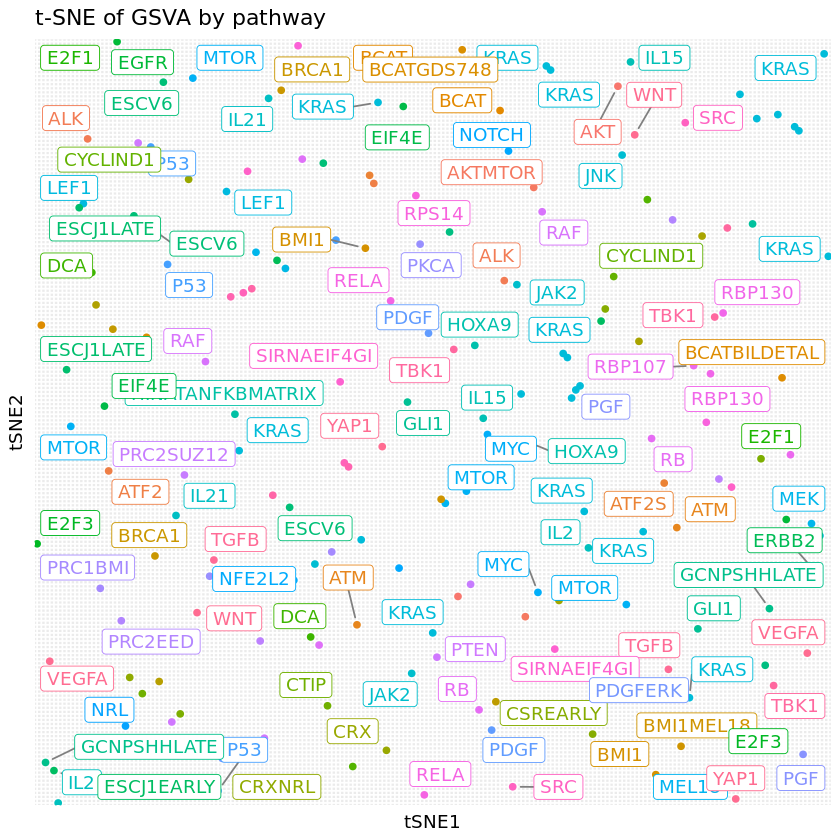

In [45]:
tSNE_plot2<- tsneby_path_df %>%
             ggplot(aes(x = tSNE1, 
             y = tSNE2, color = Group))+
             geom_point()+
             theme(legend.position="none", 
                  axis.text.x=element_blank(),
                  axis.ticks.x=element_blank(),
                  axis.text.y=element_blank(),
                  axis.ticks.y=element_blank())+ 
             ggtitle("t-SNE of GSVA by pathway")+
             geom_label_repel(max.overlaps = 5, aes(label = Group), 
                  point.padding = 0.5,
                  segment.color = 'grey50')
tSNE_plot2

In [3]:
pdf(file = "GSVA_Perturbation_tsne.pdf", width = 8, height = 8)
tSNE_plot2
dev.off()

Warning message:
"ggrepel: 37 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

In [46]:
# save.image("model_env.RData")

## Diff Seq Analyses

In [5]:
resultsNames(ddssva)

[1] "Intercept"            "SV1"                  "SV2"                 
[4] "SV3"                  "genotype_ex9_vs_ex20" "genotype_WT_vs_ex20"

### Genotype Direct Comparison

In [3]:
geno_comp <- results(ddssva, contrast = c("genotype", "ex9", "ex20"))
geno_comp <- as.data.frame(geno_comp)
geno_comp_filt <- geno_comp %>%
  filter(log2FoldChange < -1.5 | log2FoldChange > 1.5) %>%
  filter(padj < 0.05)
geno_comp_filt

baseMean     log2FoldChange lfcSE     stat      pvalue      
ENSG00000278791.1      6.612653 -2.302249      0.4649189 -4.951937 7.347834e-07
ENSG00000229376.3     12.801501 -1.756743      0.4287367 -4.097487 4.176587e-05
ENSG00000142609.18    13.785815  1.869731      0.3283950  5.693544 1.244291e-08
ENSG00000187730.9     29.824951  2.674128      0.5126600  5.216183 1.826478e-07
ENSG00000238164.6     40.461046 -1.773661      0.4521381 -3.922831 8.751443e-05
ENSG00000157873.17   232.385304 -1.795708      0.3865943 -4.644942 3.401715e-06
ENSG00000177133.11    10.966659  4.003949      0.8200935  4.882308 1.048511e-06
ENSG00000142611.17    68.509740  4.330422      0.6370000  6.798151 1.059707e-11
ENSG00000162591.16  8307.720221  1.723491      0.3207743  5.372910 7.747601e-08
ENSG00000238290.1     13.087750 -1.720946      0.5031363 -3.420436 6.252075e-04
ENSG00000131686.15     3.342750  2.932551      0.7919433  3.702981 2.130811e-04
ENSG00000228526.7    564.749075 -1.979453      0.3774731 -5.243958 1.571678e-07
ENSG00000234546.4    243.063482 -2.144048      0.4451617 -4.816335 1.462193e-06
ENSG00000224340.1      5.738009 -1.634055      0.5758284 -2.837747 4.543319e-03
ENSG00000199562.1      3.426536 -1.986978      0.6490028 -3.061586 2.201677e-03
ENSG00000175262.14     4.162315  1.909322      0.6284430  3.038179 2.380128e-03
ENSG00000235643.2      2.064915  3.126468      1.2402793  2.520777 1.170960e-02
ENSG00000276470.1     11.000890 -1.833650      0.4553776 -4.026657 5.657540e-05
ENSG00000224904.1      1.592345  3.174139      1.1585486  2.739755 6.148504e-03
ENSG00000120949.15     3.947415  1.887533      0.6579427  2.868841 4.119791e-03
ENSG00000162496.9  11434.244751  2.824843      0.4017785  7.030848 2.052821e-12
ENSG00000276830.1     43.966641  1.942730      0.5121412  3.793349 1.486291e-04
ENSG00000272482.1    143.835884  3.415021      0.5378340  6.349582 2.159009e-10
ENSG00000204518.2      2.232951  4.536725      1.8693370  2.426917 1.522776e-02
ENSG00000188984.12     1.468852  3.029707      1.2788664  2.369057 1.783353e-02
ENSG00000116726.4      1.454513  3.169252      1.0848809  2.921290 3.485850e-03
ENSG00000116721.9      1.807958  2.697376      1.1147098  2.419801 1.552900e-02
ENSG00000204481.8      1.509265  3.547712      1.2913436  2.747303 6.008764e-03
ENSG00000162494.6      7.509142  3.410109      1.0467941  3.257670 1.123311e-03
ENSG00000233485.1      4.901759  2.376155      0.9123343  2.604479 9.201411e-03
<U+22EE>             <U+22EE>     <U+22EE>       <U+22EE>  <U+22EE>  <U+22EE>    
ENSG00000170965.10    50.049865  1.870657      0.2107735  8.875201 6.980729e-19
ENSG00000181433.9      1.490064  3.543457      1.0233818  3.462498 5.351859e-04
ENSG00000022267.19  8862.367219  5.307562      0.7194787  7.376955 1.619511e-13
ENSG00000129680.16  3226.925586  3.086494      0.3935205  7.843286 4.389063e-15
ENSG00000156920.11     8.299286  1.858064      0.6503765  2.856905 4.277933e-03
ENSG00000156925.12    16.933753  2.849854      0.6358960  4.481635 7.407320e-06
ENSG00000101977.21   667.205436 -2.171844      0.6405926 -3.390367 6.979912e-04
ENSG00000230707.1      9.118160  2.417701      0.8632671  2.800641 5.100124e-03
ENSG00000185985.10     9.849136  6.203665      0.7712065  8.044104 8.687899e-16
ENSG00000155966.14   294.549288  1.696034      0.5106201  3.321519 8.952893e-04
ENSG00000147381.11     1.345848  4.422309      1.6587917  2.665982 7.676379e-03
ENSG00000102287.19   625.538353 -1.870973      0.3926244 -4.765299 1.885741e-06
ENSG00000011677.13    58.713057 -3.059954      0.4504043 -6.793793 1.092232e-11
ENSG00000268089.3     52.199893 -2.370338      0.7735584 -3.064200 2.182530e-03
ENSG00000221867.9     83.448408 -6.231697      2.1609190 -2.883818 3.928859e-03
ENSG00000198883.12     4.107412  1.936476      0.7373340  2.626321 8.631349e-03
ENSG00000235961.5     27.783377  3.445541      0.8527000  4.040742 5.328237e-05
ENSG00000189420.8      9.553255  1.790793      0.6911955  2.590864 9.573538e-03
ENSG00000182492.1

In [4]:
prePathfindR_df <- geno_comp_filt %>%
                    rownames_to_column("GeneID") %>%
                    dplyr::select(c("GeneID", "log2FoldChange", "padj"))

GeneID             log2FoldChange padj        
1      ENSG00000278791.1  -2.302249      7.714498e-06
2      ENSG00000229376.3  -1.756743      2.741731e-04
3      ENSG00000142609.18  1.869731      1.983657e-07
4      ENSG00000187730.9   2.674128      2.238148e-06
5      ENSG00000238164.6  -1.773661      5.237764e-04
6      ENSG00000157873.17 -1.795708      2.984972e-05
7      ENSG00000177133.11  4.003949      1.060372e-05
8      ENSG00000142611.17  4.330422      3.358566e-10
9      ENSG00000162591.16  1.723491      1.024647e-06
10     ENSG00000238290.1  -1.720946      2.887785e-03
11     ENSG00000131686.15  2.932551      1.138600e-03
12     ENSG00000228526.7  -1.979453      1.957046e-06
13     ENSG00000234546.4  -2.144048      1.418474e-05
14     ENSG00000224340.1  -1.634055      1.570555e-02
15     ENSG00000199562.1  -1.986978      8.484277e-03
16     ENSG00000175262.14  1.909322      9.067296e-03
17     ENSG00000235643.2   3.126468      3.480761e-02
18     ENSG00000276470.1  -1.833650      3.585591e-04
19     ENSG00000224904.1   3.174139      2.029518e-02
20     ENSG00000120949.15  1.887533      1.445611e-02
21     ENSG00000162496.9   2.824843      7.610343e-11
22     ENSG00000276830.1   1.942730      8.353903e-04
23     ENSG00000272482.1   3.415021      5.189214e-09
24     ENSG00000204518.2   4.536725      4.332557e-02
25     ENSG00000188984.12  3.029707      4.952245e-02
26     ENSG00000116726.4   3.169252      1.253581e-02
27     ENSG00000116721.9   2.697376      4.402101e-02
28     ENSG00000204481.8   3.547712      1.989338e-02
29     ENSG00000162494.6   3.410109      4.788098e-03
30     ENSG00000233485.1   2.376155      2.845367e-02
<U+22EE> <U+22EE>           <U+22EE>       <U+22EE>    
4345   ENSG00000170965.10  1.870657      7.825434e-17
4346   ENSG00000181433.9   3.543457      2.520895e-03
4347   ENSG00000022267.19  5.307562      7.459257e-12
4348   ENSG00000129680.16  3.086494      2.668323e-13
4349   ENSG00000156920.11  1.858064      1.492267e-02
4350   ENSG00000156925.12  2.849854      5.967258e-05
4351   ENSG00000101977.21 -2.171844      3.184054e-03
4352   ENSG00000230707.1   2.417701      1.732644e-02
4353   ENSG00000185985.10  6.203665      6.095050e-14
4354   ENSG00000155966.14  1.696034      3.944784e-03
4355   ENSG00000147381.11  4.422309      2.447546e-02
4356   ENSG00000102287.19 -1.870973      1.766043e-05
4357   ENSG00000011677.13 -3.059954      3.448751e-10
4358   ENSG00000268089.3  -2.370338      8.425886e-03
4359   ENSG00000221867.9  -6.231697      1.388850e-02
4360   ENSG00000198883.12  1.936476      2.700792e-02
4361   ENSG00000235961.5   3.445541      3.398747e-04
4362   ENSG00000189420.8   1.790793      2.941123e-02
4363   ENSG00000182492.16  2.708571      1.588550e-02
4364   ENSG00000067842.17  2.253908      5.301962e-03
4365   ENSG00000130829.18  3.014168      1.182802e-09
4366   ENSG00000007350.17  3.841916      3.806733e-03
4367   ENSG00000285018.1   1.807665      1.235310e-03
4368   ENSG00000160211.19  1.729240      5.211925e-23
4369   ENSG00000160219.12  1.988261      1.517829e-12
4370   ENSG00000155961.5   2.253466      2.603259e-02
4371   ENSG00000286217.2   3.678475      9.346657e-03
4372   ENSG00000114374.13  3.784364      7.780784e-03
4373   ENSG00000012817.15  3.321876      1.024097e-02
4374   ENSG00000211459.2  -1.530304      5.784783e-05

In [3]:
prePathfindR_df
write_tsv(prePathfindR_df, file = "GenoDirectComp_SVA.txt")

hgnc_symbol log2FoldChange padj        
1      CFH          2.000816      2.186195e-07
2      AOC1        -2.576799      5.349419e-03
3      WNT16        3.088030      1.045158e-06
4      TFPI         1.910179      6.260387e-10
5      SLC7A2       3.866093      2.657544e-24
6      ABCB5        1.632194      3.167950e-02
7      SKAP2        2.119249      2.514852e-11
8      MPO          2.904284      1.020554e-03
9      SOX8         3.605927      2.937395e-05
10     TMEM98      -2.766673      3.800028e-08
11     ABCC8        3.675937      2.870305e-15
12     DLX6         5.108520      4.016659e-07
13     USH1C        1.834305      1.744765e-02
14     PRSS21       1.535662      1.595898e-03
15     MATK         3.243889      4.458763e-12
16     SCN4A        3.322588      5.280402e-08
17     TKTL1        3.841916      3.806733e-03
18     IL32        -1.759436      2.298351e-07
19     PAX7         3.863516      2.236451e-04
20     FMO1         1.880446      1.680261e-05
21     SLC6A7       2.498799      1.310032e-02
22     GABRA3      -3.059954      3.448751e-10
23     SEMA3B       1.570285      3.656304e-07
24     LTF         -1.656888      2.354533e-03
25     NR1H4        4.332383      8.178697e-05
26     ALOX5       -2.172160      1.932958e-03
27     KDM5D        3.321876      1.024097e-02
28     SLC7A14      2.238593      1.155544e-02
29     IGF1        -2.633200      5.468134e-05
30     CNTN1        1.634947      6.128467e-08
<U+22EE> <U+22EE>    <U+22EE>       <U+22EE>    
4338                2.400793      6.245499e-04
4339                3.579139      1.716630e-03
4340                3.577967      9.964412e-03
4341                2.966998      6.134898e-04
4342                4.177529      1.881429e-06
4343                2.256452      1.198140e-03
4344                2.935816      1.260149e-02
4345                2.890514      1.169877e-02
4346               -1.970837      4.347253e-02
4347                2.506229      4.712007e-02
4348               -2.465417      6.209511e-05
4349                1.722960      3.203485e-04
4350                3.249567      1.666688e-03
4351                2.689127      1.273936e-02
4352                4.528986      1.630010e-06
4353                1.751495      6.059852e-09
4354                4.192971      5.044360e-04
4355                3.358857      2.061833e-05
4356                1.844520      3.014890e-05
4357               -3.001874      2.762255e-06
4358               -1.882020      3.528529e-04
4359               -2.016672      4.233078e-02
4360               -1.652164      8.799479e-03
4361                2.678990      4.062568e-02
4362                3.343057      1.712519e-02
4363                4.877521      1.574210e-04
4364                4.517112      9.530196e-03
4365                1.548025      6.029857e-04
4366   FAM106C     -1.610026      3.309201e-02
4367                3.263966      9.363160e-09

In [5]:
library(biomaRt)

In [6]:
#add gene symbols
prePathfindR_df$GeneID <- prePathfindR_df$GeneID %>% 
  tools::file_path_sans_ext()
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- prePathfindR_df$GeneID
G_list <- getBM(filters= "ensembl_gene_id",
                attributes= c("ensembl_gene_id","hgnc_symbol"),
                values=genes,mart= mart,
               useCache = FALSE)
prePathfindR_df <- merge(prePathfindR_df,
                               G_list,
                               by.x="GeneID",
                               by.y="ensembl_gene_id")
prePathfindR_df

GeneID          log2FoldChange padj         hgnc_symbol
1      ENSG00000000971  2.000816      2.186195e-07 CFH        
2      ENSG00000002726 -2.576799      5.349419e-03 AOC1       
3      ENSG00000002745  3.088030      1.045158e-06 WNT16      
4      ENSG00000003436  1.910179      6.260387e-10 TFPI       
5      ENSG00000003989  3.866093      2.657544e-24 SLC7A2     
6      ENSG00000004846  1.632194      3.167950e-02 ABCB5      
7      ENSG00000005020  2.119249      2.514852e-11 SKAP2      
8      ENSG00000005381  2.904284      1.020554e-03 MPO        
9      ENSG00000005513  3.605927      2.937395e-05 SOX8       
10     ENSG00000006042 -2.766673      3.800028e-08 TMEM98     
11     ENSG00000006071  3.675937      2.870305e-15 ABCC8      
12     ENSG00000006377  5.108520      4.016659e-07 DLX6       
13     ENSG00000006611  1.834305      1.744765e-02 USH1C      
14     ENSG00000007038  1.535662      1.595898e-03 PRSS21     
15     ENSG00000007264  3.243889      4.458763e-12 MATK       
16     ENSG00000007314  3.322588      5.280402e-08 SCN4A      
17     ENSG00000007350  3.841916      3.806733e-03 TKTL1      
18     ENSG00000008517 -1.759436      2.298351e-07 IL32       
19     ENSG00000009709  3.863516      2.236451e-04 PAX7       
20     ENSG00000010932  1.880446      1.680261e-05 FMO1       
21     ENSG00000011083  2.498799      1.310032e-02 SLC6A7     
22     ENSG00000011677 -3.059954      3.448751e-10 GABRA3     
23     ENSG00000012171  1.570285      3.656304e-07 SEMA3B     
24     ENSG00000012223 -1.656888      2.354533e-03 LTF        
25     ENSG00000012504  4.332383      8.178697e-05 NR1H4      
26     ENSG00000012779 -2.172160      1.932958e-03 ALOX5      
27     ENSG00000012817  3.321876      1.024097e-02 KDM5D      
28     ENSG00000013293  2.238593      1.155544e-02 SLC7A14    
29     ENSG00000017427 -2.633200      5.468134e-05 IGF1       
30     ENSG00000018236  1.634947      6.128467e-08 CNTN1      
<U+22EE> <U+22EE>        <U+22EE>       <U+22EE>     <U+22EE>   
4338   ENSG00000287886  2.400793      6.245499e-04            
4339   ENSG00000287887  3.579139      1.716630e-03            
4340   ENSG00000287898  3.577967      9.964412e-03            
4341   ENSG00000287899  2.966998      6.134898e-04            
4342   ENSG00000287900  4.177529      1.881429e-06            
4343   ENSG00000287901  2.256452      1.198140e-03            
4344   ENSG00000287913  2.935816      1.260149e-02            
4345   ENSG00000287923  2.890514      1.169877e-02            
4346   ENSG00000287945 -1.970837      4.347253e-02            
4347   ENSG00000287946  2.506229      4.712007e-02            
4348   ENSG00000287963 -2.465417      6.209511e-05            
4349   ENSG00000287979  1.722960      3.203485e-04            
4350   ENSG00000287996  3.249567      1.666688e-03            
4351   ENSG00000288004  2.689127      1.273936e-02            
4352   ENSG00000288011  4.528986      1.630010e-06            
4353   ENSG00000288018  1.751495      6.059852e-09            
4354   ENSG00000288029  4.192971      5.044360e-04            
4355   ENSG00000288046  3.358857      2.061833e-05            
4356   ENSG00000288068  1.844520      3.014890e-05            
4357   ENSG00000288073 -3.001874      2.762255e-06            
4358   ENSG00000288076 -1.882020      3.528529e-04            
4359   ENSG00000288077 -2.016672      4.233078e-02            
4360   ENSG00000288079 -1.652164      8.799479e-03            
4361   ENSG00000288086  2.678990      4.062568e-02            
4362   ENSG00000288091  3.343057      1.712519e-02            
4363   ENSG00000288100  4.877521      1.574210e-04            
4364   ENSG00000288105  4.517112      9.530196e-03            
4365   ENSG00000288108  1.548025      6.029857e-04            
4366   ENSG00000288235 -1.610026      3.309201e-02 FAM106C    
4367   ENSG00000288520  3.263966      9.363160e-09

In [7]:
prePathfindR_df <- prePathfindR_df %>%
                dplyr::select(c("hgnc_symbol", "log2FoldChange", "padj"))
prePathfindR_df

hgnc_symbol log2FoldChange padj        
1      CFH          2.000816      2.186195e-07
2      AOC1        -2.576799      5.349419e-03
3      WNT16        3.088030      1.045158e-06
4      TFPI         1.910179      6.260387e-10
5      SLC7A2       3.866093      2.657544e-24
6      ABCB5        1.632194      3.167950e-02
7      SKAP2        2.119249      2.514852e-11
8      MPO          2.904284      1.020554e-03
9      SOX8         3.605927      2.937395e-05
10     TMEM98      -2.766673      3.800028e-08
11     ABCC8        3.675937      2.870305e-15
12     DLX6         5.108520      4.016659e-07
13     USH1C        1.834305      1.744765e-02
14     PRSS21       1.535662      1.595898e-03
15     MATK         3.243889      4.458763e-12
16     SCN4A        3.322588      5.280402e-08
17     TKTL1        3.841916      3.806733e-03
18     IL32        -1.759436      2.298351e-07
19     PAX7         3.863516      2.236451e-04
20     FMO1         1.880446      1.680261e-05
21     SLC6A7       2.498799      1.310032e-02
22     GABRA3      -3.059954      3.448751e-10
23     SEMA3B       1.570285      3.656304e-07
24     LTF         -1.656888      2.354533e-03
25     NR1H4        4.332383      8.178697e-05
26     ALOX5       -2.172160      1.932958e-03
27     KDM5D        3.321876      1.024097e-02
28     SLC7A14      2.238593      1.155544e-02
29     IGF1        -2.633200      5.468134e-05
30     CNTN1        1.634947      6.128467e-08
<U+22EE> <U+22EE>    <U+22EE>       <U+22EE>    
4338                2.400793      6.245499e-04
4339                3.579139      1.716630e-03
4340                3.577967      9.964412e-03
4341                2.966998      6.134898e-04
4342                4.177529      1.881429e-06
4343                2.256452      1.198140e-03
4344                2.935816      1.260149e-02
4345                2.890514      1.169877e-02
4346               -1.970837      4.347253e-02
4347                2.506229      4.712007e-02
4348               -2.465417      6.209511e-05
4349                1.722960      3.203485e-04
4350                3.249567      1.666688e-03
4351                2.689127      1.273936e-02
4352                4.528986      1.630010e-06
4353                1.751495      6.059852e-09
4354                4.192971      5.044360e-04
4355                3.358857      2.061833e-05
4356                1.844520      3.014890e-05
4357               -3.001874      2.762255e-06
4358               -1.882020      3.528529e-04
4359               -2.016672      4.233078e-02
4360               -1.652164      8.799479e-03
4361                2.678990      4.062568e-02
4362                3.343057      1.712519e-02
4363                4.877521      1.574210e-04
4364                4.517112      9.530196e-03
4365                1.548025      6.029857e-04
4366   FAM106C     -1.610026      3.309201e-02
4367                3.263966      9.363160e-09

In [47]:
prePathfindR_df

hgnc_symbol log2FoldChange padj        
1    CFH          2.000816      2.186195e-07
2    AOC1        -2.576799      5.349419e-03
3    WNT16        3.088030      1.045158e-06
4    TFPI         1.910179      6.260387e-10
5    SLC7A2       3.866093      2.657544e-24
6    ABCB5        1.632194      3.167950e-02
7    SKAP2        2.119249      2.514852e-11
8    MPO          2.904284      1.020554e-03
9    SOX8         3.605927      2.937395e-05
10   TMEM98      -2.766673      3.800028e-08
11   ABCC8        3.675937      2.870305e-15
12   DLX6         5.108520      4.016659e-07
13   USH1C        1.834305      1.744765e-02
14   PRSS21       1.535662      1.595898e-03
15   MATK         3.243889      4.458763e-12
16   SCN4A        3.322588      5.280402e-08
17   TKTL1        3.841916      3.806733e-03
18   IL32        -1.759436      2.298351e-07
19   PAX7         3.863516      2.236451e-04
20   FMO1         1.880446      1.680261e-05
21   SLC6A7       2.498799      1.310032e-02
22   GABRA3      -3.059954      3.448751e-10
23   SEMA3B       1.570285      3.656304e-07
24   LTF         -1.656888      2.354533e-03
25   NR1H4        4.332383      8.178697e-05
26   ALOX5       -2.172160      1.932958e-03
27   KDM5D        3.321876      1.024097e-02
28   SLC7A14      2.238593      1.155544e-02
29   IGF1        -2.633200      5.468134e-05
30   CNTN1        1.634947      6.128467e-08
⋮    ⋮           ⋮              ⋮           
4338              2.400793      6.245499e-04
4339              3.579139      1.716630e-03
4340              3.577967      9.964412e-03
4341              2.966998      6.134898e-04
4342              4.177529      1.881429e-06
4343              2.256452      1.198140e-03
4344              2.935816      1.260149e-02
4345              2.890514      1.169877e-02
4346             -1.970837      4.347253e-02
4347              2.506229      4.712007e-02
4348             -2.465417      6.209511e-05
4349              1.722960      3.203485e-04
4350              3.249567      1.666688e-03
4351              2.689127      1.273936e-02
4352              4.528986      1.630010e-06
4353              1.751495      6.059852e-09
4354              4.192971      5.044360e-04
4355              3.358857      2.061833e-05
4356              1.844520      3.014890e-05
4357             -3.001874      2.762255e-06
4358             -1.882020      3.528529e-04
4359             -2.016672      4.233078e-02
4360             -1.652164      8.799479e-03
4361              2.678990      4.062568e-02
4362              3.343057      1.712519e-02
4363              4.877521      1.574210e-04
4364              4.517112      9.530196e-03
4365              1.548025      6.029857e-04
4366 FAM106C     -1.610026      3.309201e-02
4367              3.263966      9.363160e-09

`n_processes` is set to `iterations` because `iterations` < `n_processes`

There is already a directory named "pathfindR_Results".
Writing the result to "pathfindR_Results(1)" not to overwrite any previous results.

## Testing input

The input looks OK

## Processing input. Converting gene symbols,
          if necessary (and if human gene symbols provided)

Number of genes provided in input: 4367

Number of genes in input after p-value filtering: 4367

Warning message:
"Duplicated genes found! The lowest p value for each gene was selected"
pathfindR cannot handle p values < 1e-13. These were changed to 1e-13

Could not find any interactions for 1199 (37.66%) genes in the PIN

Final number of genes in input: 1980

## Performing Active Subnetwork Search and Enrichment

## Processing the enrichment results over all iterations

## Annotating involved genes and visualizing enriched terms

## Creating HTML report



processing file: results.Rmd



  |.......................                                               |  33%
   inline R code fragments

  |...............................................                       |  67%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |......................................................................| 100%
  ordinary text without R code




output file: results.knit.md




/accre/arch/easybuild/software/BinDist/Anaconda3/2019.10/bin/pandoc +RTS -K512m -RTS results.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc2e6cf30e049bd.html --lua-filter /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --variable bs3=TRUE --standalone --section-divs --template /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpVGOZdJ/rmarkdown-str2e6cf473d69b1.html 



Output created: results.html



processing file: enriched_terms.Rmd



  |..................                                                    |  25%
   inline R code fragments

  |...................................                                   |  50%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |....................................................                  |  75%
  ordinary text without R code

  |......................................................................| 100%
label: table (with options) 
List of 2
 $ echo   : logi FALSE
 $ comment: logi NA




output file: enriched_terms.knit.md




/accre/arch/easybuild/software/BinDist/Anaconda3/2019.10/bin/pandoc +RTS -K512m -RTS enriched_terms.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc2e6cf7affc384.html --lua-filter /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --variable bs3=TRUE --standalone --section-divs --template /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpVGOZdJ/rmarkdown-str2e6cf67053195.html 



Output created: enriched_terms.html



processing file: conversion_table.Rmd



  |............                                                          |  17%
   inline R code fragments

  |.......................                                               |  33%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |...................................                                   |  50%
  ordinary text without R code

  |...............................................                       |  67%
label: converted_tbl, table1 (with options) 
List of 1
 $ comment: logi NA

  |..........................................................            |  83%
  ordinary text without R code

  |......................................................................| 100%
label: gene_wo_interaction, table2 (with options) 
List of 1
 $ comment: logi NA




output file: conversion_table.knit.md




/accre/arch/easybuild/software/BinDist/Anaconda3/2019.10/bin/pandoc +RTS -K512m -RTS conversion_table.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc2e6cf372b3d12.html --lua-filter /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --variable bs3=TRUE --standalone --section-divs --template /gpfs52/home/mirandax/.conda/envs/jupyter/lib/R/library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpVGOZdJ/rmarkdown-str2e6cf550705b8.html 



Output created: conversion_table.html

Plotting the enrichment bubble chart

Found 83 enriched terms


Enrichment results and table of converted genes 

can be found in "results.html" 

in the folder "/gpfs52/data/park_lab/adam/Total_RNA/pathfindR_Results(1)"


Run cluster_enriched_terms() for clustering enriched terms





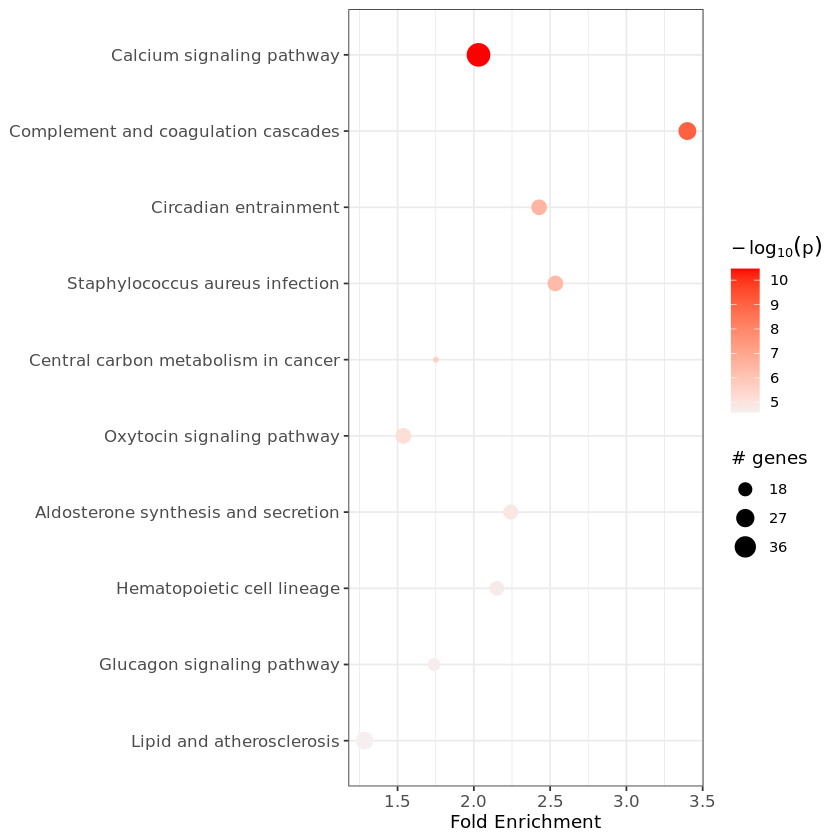

In [61]:
paths_df <- run_pathfindR(prePathfindR_df, visualize_enriched_terms =FALSE, )

In [63]:
paths_df

Term_Description                                             
1  Calcium signaling pathway                                    
2  Complement and coagulation cascades                          
3  Circadian entrainment                                        
4  Staphylococcus aureus infection                              
5  Central carbon metabolism in cancer                          
6  Oxytocin signaling pathway                                   
7  Aldosterone synthesis and secretion                          
8  Hematopoietic cell lineage                                   
9  Glucagon signaling pathway                                   
10 Lipid and atherosclerosis                                    
11 HIF-1 signaling pathway                                      
12 Long-term potentiation                                       
13 Coronavirus disease - COVID-19                               
14 Estrogen signaling pathway                                   
15 Neurotrophin signaling pathway                               
16 cAMP signaling pathway                                       
17 Glioma                                                       
18 Transcriptional misregulation in cancer                      
19 Diabetic cardiomyopathy                                      
20 Adrenergic signaling in cardiomyocytes                       
21 Ras signaling pathway                                        
22 Alanine, aspartate and glutamate metabolism                  
23 Insulin secretion                                            
24 ErbB signaling pathway                                       
25 Cell adhesion molecules                                      
26 Hypertrophic cardiomyopathy                                  
27 JAK-STAT signaling pathway                                   
28 Focal adhesion                                               
29 Cytokine-cytokine receptor interaction                       
30 Inflammatory mediator regulation of TRP channels             
⋮  ⋮                                                            
54 AGE-RAGE signaling pathway in diabetic complications         
55 Melanogenesis                                                
56 Wnt signaling pathway                                        
57 Morphine addiction                                           
58 Human immunodeficiency virus 1 infection                     
59 Gastric cancer                                               
60 B cell receptor signaling pathway                            
61 Proteoglycans in cancer                                      
62 Viral protein interaction with cytokine and cytokine receptor
63 Leukocyte transendothelial migration                         
64 Neutrophil extracellular trap formation                      
65 NF-kappa B signaling pathway                                 
66 Toxoplasmosis                                                
67 Type I diabetes mellitus                                     
68 Growth hormone synthesis, secretion and action               
69 Serotonergic synapse                                         
70 Retrograde endocannabinoid signaling                         
71 Rheumatoid arthritis                                         
72 Oocyte meiosis                                               
73 Fc gamma R-mediated phagocytosis                             
74 Endocytosis                                                  
75 PPAR signaling pathway                                       
76 Salmonella infection                                         
77 Adherens junction                                            
78 Intestinal immune network for IgA production                 
79 Dopaminergic synapse                                         
80 Necroptosis                                                  
81 Yersinia infection                                           
82 Melanoma                                                     
83 Malaria                            

In [65]:
names(paths_df) <- c("ID", "Fold_Enrichment", "occurrence", "support", "lowest_p", 
             "highest_p", "Up_regulated", "Down_regulated")

paths_df

ID                                                           
1  Calcium signaling pathway                                    
2  Complement and coagulation cascades                          
3  Circadian entrainment                                        
4  Staphylococcus aureus infection                              
5  Central carbon metabolism in cancer                          
6  Oxytocin signaling pathway                                   
7  Aldosterone synthesis and secretion                          
8  Hematopoietic cell lineage                                   
9  Glucagon signaling pathway                                   
10 Lipid and atherosclerosis                                    
11 HIF-1 signaling pathway                                      
12 Long-term potentiation                                       
13 Coronavirus disease - COVID-19                               
14 Estrogen signaling pathway                                   
15 Neurotrophin signaling pathway                               
16 cAMP signaling pathway                                       
17 Glioma                                                       
18 Transcriptional misregulation in cancer                      
19 Diabetic cardiomyopathy                                      
20 Adrenergic signaling in cardiomyocytes                       
21 Ras signaling pathway                                        
22 Alanine, aspartate and glutamate metabolism                  
23 Insulin secretion                                            
24 ErbB signaling pathway                                       
25 Cell adhesion molecules                                      
26 Hypertrophic cardiomyopathy                                  
27 JAK-STAT signaling pathway                                   
28 Focal adhesion                                               
29 Cytokine-cytokine receptor interaction                       
30 Inflammatory mediator regulation of TRP channels             
⋮  ⋮                                                            
54 AGE-RAGE signaling pathway in diabetic complications         
55 Melanogenesis                                                
56 Wnt signaling pathway                                        
57 Morphine addiction                                           
58 Human immunodeficiency virus 1 infection                     
59 Gastric cancer                                               
60 B cell receptor signaling pathway                            
61 Proteoglycans in cancer                                      
62 Viral protein interaction with cytokine and cytokine receptor
63 Leukocyte transendothelial migration                         
64 Neutrophil extracellular trap formation                      
65 NF-kappa B signaling pathway                                 
66 Toxoplasmosis                                                
67 Type I diabetes mellitus                                     
68 Growth hormone synthesis, secretion and action               
69 Serotonergic synapse                                         
70 Retrograde endocannabinoid signaling                         
71 Rheumatoid arthritis                                         
72 Oocyte meiosis                                               
73 Fc gamma R-mediated phagocytosis                             
74 Endocytosis                                                  
75 PPAR signaling pathway                                       
76 Salmonella infection                                         
77 Adherens junction                                            
78 Intestinal immune network for IgA production                 
79 Dopaminergic synapse                                         
80 Necroptosis                                                  
81 Yersinia infection                                           
82 Melanoma                                                     
83 Malaria                            

In [75]:
pdf(file = "clustered_output_graphs.pdf", width = 12, height = 12)
clustered_df <- cluster_enriched_terms(paths_df, plot_hmap = TRUE)
dev.off()

The maximum average silhouette width was 0.15 for k = 24 





png 
  2

In [74]:
term_plot <- term_gene_graph(result_df = paths_df, num_terms = 3)
pdf(file = "term_gene_graph.pdf", width = 12, height = 12)
term_plot
dev.off()

png 
  2

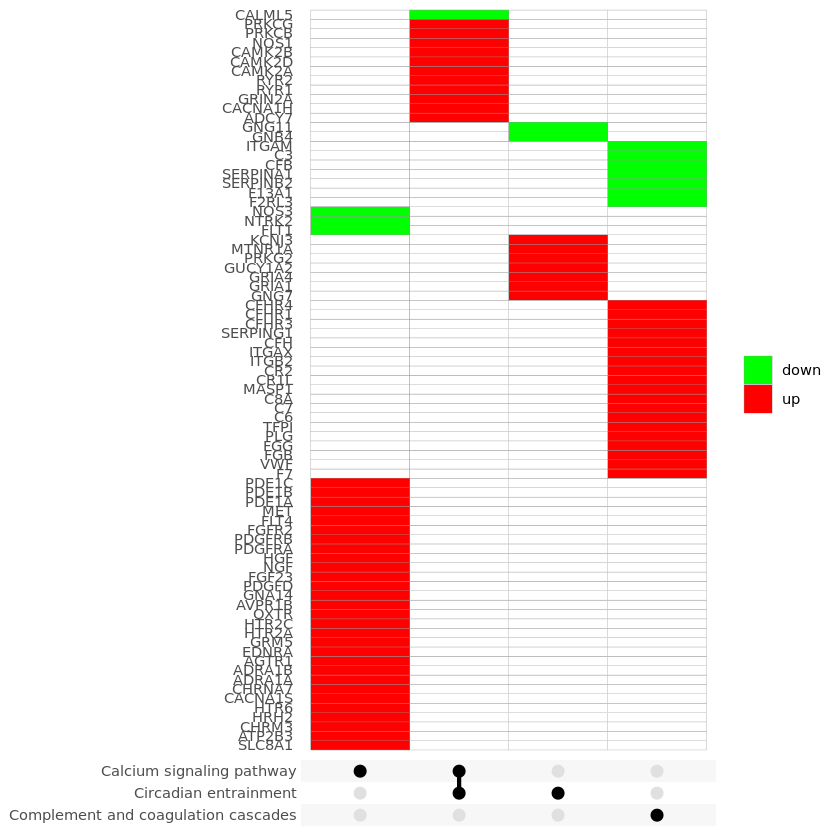

In [73]:
UpSet_plot(result_df = paths_df, num_terms = 3)

Warning message:
"ggrepel: 71 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


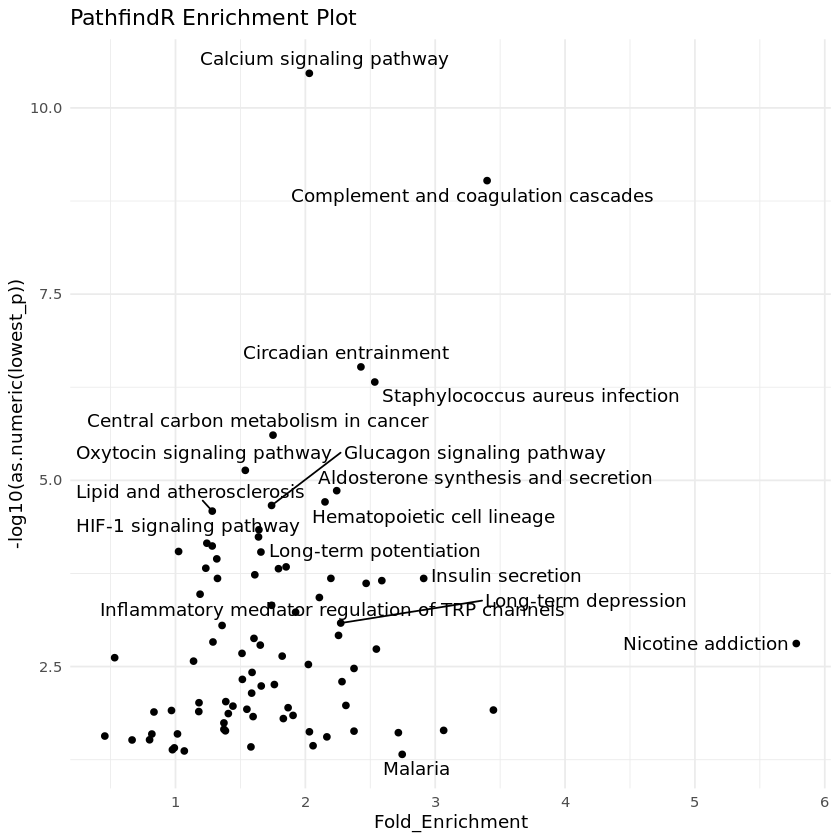

In [84]:
volcano <- paths_df %>%
  ggplot(aes(x = Fold_Enrichment, y = -log10(as.numeric(lowest_p)), label = ID)) +
  geom_point() +
  theme_minimal() +
  geom_text_repel() +
  ggtitle(label = "PathfindR Enrichment Plot")
volcano

In [85]:
pdf(file = "PathfindR_volcano", width = 6, height = 8)
volcano
dev.off()

Warning message:
"ggrepel: 63 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


png 
  2

In [14]:
# save.image(file = "model_env.RData")

## WebGestalt

In [8]:
library("WebGestaltR")
library("biomaRt")

In [3]:
geno_comp_filt

baseMean     log2FoldChange lfcSE     stat      pvalue      
ENSG00000278791.1      6.612653 -2.302249      0.4649189 -4.951937 7.347834e-07
ENSG00000229376.3     12.801501 -1.756743      0.4287367 -4.097487 4.176587e-05
ENSG00000142609.18    13.785815  1.869731      0.3283950  5.693544 1.244291e-08
ENSG00000187730.9     29.824951  2.674128      0.5126600  5.216183 1.826478e-07
ENSG00000238164.6     40.461046 -1.773661      0.4521381 -3.922831 8.751443e-05
ENSG00000157873.17   232.385304 -1.795708      0.3865943 -4.644942 3.401715e-06
ENSG00000177133.11    10.966659  4.003949      0.8200935  4.882308 1.048511e-06
ENSG00000142611.17    68.509740  4.330422      0.6370000  6.798151 1.059707e-11
ENSG00000162591.16  8307.720221  1.723491      0.3207743  5.372910 7.747601e-08
ENSG00000238290.1     13.087750 -1.720946      0.5031363 -3.420436 6.252075e-04
ENSG00000131686.15     3.342750  2.932551      0.7919433  3.702981 2.130811e-04
ENSG00000228526.7    564.749075 -1.979453      0.3774731 -5.243958 1.571678e-07
ENSG00000234546.4    243.063482 -2.144048      0.4451617 -4.816335 1.462193e-06
ENSG00000224340.1      5.738009 -1.634055      0.5758284 -2.837747 4.543319e-03
ENSG00000199562.1      3.426536 -1.986978      0.6490028 -3.061586 2.201677e-03
ENSG00000175262.14     4.162315  1.909322      0.6284430  3.038179 2.380128e-03
ENSG00000235643.2      2.064915  3.126468      1.2402793  2.520777 1.170960e-02
ENSG00000276470.1     11.000890 -1.833650      0.4553776 -4.026657 5.657540e-05
ENSG00000224904.1      1.592345  3.174139      1.1585486  2.739755 6.148504e-03
ENSG00000120949.15     3.947415  1.887533      0.6579427  2.868841 4.119791e-03
ENSG00000162496.9  11434.244751  2.824843      0.4017785  7.030848 2.052821e-12
ENSG00000276830.1     43.966641  1.942730      0.5121412  3.793349 1.486291e-04
ENSG00000272482.1    143.835884  3.415021      0.5378340  6.349582 2.159009e-10
ENSG00000204518.2      2.232951  4.536725      1.8693370  2.426917 1.522776e-02
ENSG00000188984.12     1.468852  3.029707      1.2788664  2.369057 1.783353e-02
ENSG00000116726.4      1.454513  3.169252      1.0848809  2.921290 3.485850e-03
ENSG00000116721.9      1.807958  2.697376      1.1147098  2.419801 1.552900e-02
ENSG00000204481.8      1.509265  3.547712      1.2913436  2.747303 6.008764e-03
ENSG00000162494.6      7.509142  3.410109      1.0467941  3.257670 1.123311e-03
ENSG00000233485.1      4.901759  2.376155      0.9123343  2.604479 9.201411e-03
⋮                  ⋮            ⋮              ⋮         ⋮         ⋮           
ENSG00000170965.10    50.049865  1.870657      0.2107735  8.875201 6.980729e-19
ENSG00000181433.9      1.490064  3.543457      1.0233818  3.462498 5.351859e-04
ENSG00000022267.19  8862.367219  5.307562      0.7194787  7.376955 1.619511e-13
ENSG00000129680.16  3226.925586  3.086494      0.3935205  7.843286 4.389063e-15
ENSG00000156920.11     8.299286  1.858064      0.6503765  2.856905 4.277933e-03
ENSG00000156925.12    16.933753  2.849854      0.6358960  4.481635 7.407320e-06
ENSG00000101977.21   667.205436 -2.171844      0.6405926 -3.390367 6.979912e-04
ENSG00000230707.1      9.118160  2.417701      0.8632671  2.800641 5.100124e-03
ENSG00000185985.10     9.849136  6.203665      0.7712065  8.044104 8.687899e-16
ENSG00000155966.14   294.549288  1.696034      0.5106201  3.321519 8.952893e-04
ENSG00000147381.11     1.345848  4.422309      1.6587917  2.665982 7.676379e-03
ENSG00000102287.19   625.538353 -1.870973      0.3926244 -4.765299 1.885741e-06
ENSG00000011677.13    58.713057 -3.059954      0.4504043 -6.793793 1.092232e-11
ENSG00000268089.3     52.199893 -2.370338      0.7735584 -3.064200 2.182530e-03
ENSG00000221867.9     83.448408 -6.231697      2.1609190 -2.883818 3.928859e-03
ENSG00000198883.12     4.107412  1.936476      0.7373340  2.626321 8.631349e-03
ENSG00000235961.5     27.783377  3.445541      0.8527000  4.040742 5.328237e-05
ENSG00000189420.8      9.553255  1.790793      0.6911955  2.590864 9.573538e-03
ENSG00000182492.16 

In [5]:
WebGestaltR::listOrganism()

[1] "athaliana"     "btaurus"       "celegans"      "cfamiliaris"  
 [5] "drerio"        "sscrofa"       "dmelanogaster" "ggallus"      
 [9] "hsapiens"      "mmusculus"     "rnorvegicus"   "scerevisiae"

In [10]:
#add gene symbols
geno_comp_filt$geneID <- rownames(geno_comp_filt) %>% 
  tools::file_path_sans_ext()
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- geno_comp_filt$geneID
G_list <- getBM(filters= "ensembl_gene_id",
                attributes= c("ensembl_gene_id","hgnc_symbol"),
                values=genes,mart= mart,
               useCache = FALSE)
geno_comp_filt <- merge(geno_comp_filt,
                               G_list,
                               by.x="geneID",
                               by.y="ensembl_gene_id")
head(geno_comp_filt)

geneID          baseMean     log2FoldChange lfcSE     stat      pvalue      
1 ENSG00000000971  5740.810727  2.000816      0.3525797  5.674790 1.388592e-08
2 ENSG00000002726   134.435807 -2.576799      0.8000079 -3.220967 1.277589e-03
3 ENSG00000002745    63.844145  3.088030      0.5751412  5.369168 7.910090e-08
4 ENSG00000003436  7051.183906  1.910179      0.2851728  6.698322 2.108267e-11
5 ENSG00000003989 10546.998253  3.866093      0.3602442 10.731867 7.212385e-27
6 ENSG00000004846     4.750688  1.632194      0.6375276  2.560193 1.046140e-02
  padj         hgnc_symbol
1 2.186195e-07 CFH        
2 5.349419e-03 AOC1       
3 1.045158e-06 WNT16      
4 6.260387e-10 TFPI       
5 2.657544e-24 SLC7A2     
6 3.167950e-02 ABCB5

In [13]:
write(geno_comp_filt$hgnc_symbol, file = "genesforGestalt.txt")

# Clean MCF10A Figs

In [1]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("DESeq2")
setwd("/data/park_lab/adam/Total_RNA")
load("Total_RNA_env.RData")
ls()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, 

[1] "all_diff_genes"                           
  [2] "AREG_exp"                                 
  [3] "AREG_exp_raw"                             
  [4] "cancer_coldata"                           
  [5] "cancer_counts"                            
  [6] "cancer_dds"                               
  [7] "cancer_dds_f"                             
  [8] "cancer_diff_genes"                        
  [9] "cancer_ex9vex20_over"                     
 [10] "cancer_ex9vex20_res"                      
 [11] "cancer_ex9vex20_resSig_padj"              
 [12] "cancer_ex9vex20_under"                    
 [13] "cancer_filt"                              
 [14] "cancer_genotype"                          
 [15] "cancer_norm_sigset"                       
 [16] "cancer_normalized_counts_f"               
 [17] "cancer_normalized_counts_f_nonames"       
 [18] "cancer_rlog"                              
 [19] "cancer_sampleDistMatrix"                  
 [20] "cancer_samples"                           
 [21] "cancer_vst"                               
 [22] "cancer_WTvex20_over"                      
 [23] "cancer_WTvex20_res"                       
 [24] "cancer_WTvex20_resSig_padj"               
 [25] "cancer_WTvex20_under"                     
 [26] "cancer_WTvex9_over"                       
 [27] "cancer_WTvex9_over_clean"                 
 [28] "cancer_WTvex9_over_symbols"               
 [29] "cancer_WTvex9_res"                        
 [30] "cancer_WTvex9_resSig_padj"                
 [31] "cancer_WTvex9_under"                      
 [32] "cancer_WTvex9_under_clean"                
 [33] "cancer_WTvex9_under_symbols"              
 [34] "cancerDists"                              
 [35] "cluster_df"                               
 [36] "cluster3"                                 
 [37] "cluster3_genes"                           
 [38] "cluster3_genes_clean"                     
 [39] "cluster3_GOBP"                            
 [40] "cluster9"                                 
 [41] "cluster9_genes"                           
 [42] "cluster9_genes_clean"                     
 [43] "cluster9_GOBP"                            
 [44] "clusters"                                 
 [45] "datares_HC"                               
 [46] "dds_LRT"                                  
 [47] "diff_ex9vex20"                            
 [48] "diff_ex9vex20_sig"                        
 [49] "diff_WTvex20"                             
 [50] "diff_WTvex20_sig"                         
 [51] "diff_WTvex9"                              
 [52] "diff_WTvex9_sig"                          
 [53] "E545K_expressed_E545K_interacting_overlap"
 [54] "E545K_expressed_interacting_overlap"      
 [55] "E545K_expressed_WT_interacting_overlap"   
 [56] "ens.str_ex9vex20"                         
 [57] "ens.str_WTvex20"                          
 [58] "ens.str_WTvex9"                           
 [59] "ETV5_exp"                                 
 [60] "ex9vex20_combined"                        
 [61] "ex9vex20_combined_GOBP"                   
 [62] "ex9vex20_combined_GOBP_nocan"             
 [63] "ex9vex20_combined_nocan"                  
 [64] "ex9vex20_genes_log2fc_1.5"                
 [65] "ex9vex20_genes_log2fc_1.5_entrez"         
 [66] "ex9vex20_genes_log2fc_1.5_entrez_df"      
 [67] "ex9vex20_genes_padj"                      
 [68] "ex9vex20_genes_padj_entrez"               
 [69] "ex9vex20_GOBP"                            
 [70] "ex9vex20_GOMF"                            
 [71] "ex9vex20_KEGG"                            
 [72] "ex9vex20_over_clean"                      
 [73] "ex9vex20_over_clean_nocan"                
 [74] "ex9vex20_over_common"                     
 [75] "ex9vex20_over_common_GOBP"                
 [76] "ex9vex20_over_common_GOBP_nocan"          
 [77] "ex9vex20_over_common_GOMF"                
 [78] "ex9vex20_over_nocan"                      
 [79] "ex9vex20_res"                             
 [80] "ex9vex20_res_df"                          
 [

In [2]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("biomaRt")

### Stuff for Brad

In [37]:
MCF10A_dds <- DESeq(MCF10A_dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [40]:
MCF10A_normCounts <- counts(MCF10A_dds, normalized = T) %>% as.data.frame()
MCF10A_normCounts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5    2.506292          3.305122          0.000000       
ENSG00000227232.5  149.124398        178.476599        159.888504       
ENSG00000278267.1   36.341240         56.187077         42.636934       
ENSG00000243485.5    5.012585          0.000000          0.000000       
ENSG00000284332.1    0.000000          0.000000          0.000000       
ENSG00000237613.2    0.000000          0.000000          0.000000       
ENSG00000268020.3    0.000000          0.000000          0.000000       
ENSG00000240361.2    0.000000          0.000000          0.000000       
ENSG00000186092.6    0.000000          0.000000          0.000000       
ENSG00000238009.6   42.606971         47.924272         35.530779       
ENSG00000239945.1    0.000000          0.000000          0.000000       
ENSG00000233750.3   96.492258        105.763910         78.167713       
ENSG00000268903.1  347.121499        368.521125        351.754709       
ENSG00000269981.1  328.324306        304.071242        364.190482       
ENSG00000239906.1    6.265731         13.220489         17.765389       
ENSG00000241860.7  117.795743         67.755005        124.357725       
ENSG00000222623.1    0.000000          1.652561          0.000000       
ENSG00000241599.1    0.000000          0.000000          0.000000       
ENSG00000279928.2   12.531462         16.525611         15.988850       
ENSG00000279457.4  280.704750        292.503315        284.246230       
ENSG00000273874.1    0.000000          3.305122          0.000000       
ENSG00000228463.10  82.707650         47.924272         39.083857       
ENSG00000286448.1   12.531462          3.305122         21.318467       
ENSG00000236679.2   13.784608         11.567928          7.106156       
ENSG00000236601.2    2.506292          3.305122          0.000000       
ENSG00000237094.12 250.629241        257.799532        218.514289       
ENSG00000269732.1    0.000000          0.000000          0.000000       
ENSG00000284733.1    0.000000          0.000000          0.000000       
ENSG00000233653.3    0.000000          0.000000          0.000000       
ENSG00000250575.1   12.531462          0.000000          0.000000       
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000210107.1     285.7173          325.5545          321.5535      
ENSG00000210112.1     251.8824          216.4855          289.5758      
ENSG00000198763.3   27401.2949        26574.8350        26909.2352      
ENSG00000210117.1     238.0978          285.8931          341.0955      
ENSG00000210127.1    2694.2643         2126.8461         2432.0818      
ENSG00000210135.1    9030.1716         8442.9347         9216.6840      
ENSG00000210140.1   14135.4892        14064.9475        15356.4026      
ENSG00000210144.1   12377.3251        12653.6603        13773.5064      
ENSG00000198804.2  675106.2018       656296.4626       666090.1786      
ENSG00000210151.2    4421.0998         3779.4072         3618.8098      
ENSG00000210154.1     433.5886          378.4365          415.7101      
ENSG00000198712.1  251735.7691       255436.3692       259179.2652      
ENSG00000210156.1     779.4569          755.2204          886.4929      
ENSG00000228253.1   17164.3436        16928.8359        18273.4795      
ENSG00000198899.2   97200.2854        96030.3255       102580.9112      
ENSG00000198938.2  217122.6177       222352.0960       227427.1848      
ENSG00000210164.1     865.9240         1003.1046          900.7052      
ENSG00000198840.2   13293.3749        13151.0812        14103.9426      
ENSG00000210174.1     749.3814          740.3474          721.2748      
ENSG00000212907.2   17035.2695        17555.1566        18014.1048      
ENSG00000198886.2  130656.7828       130927.4582       135530.3788      
ENSG00000210176.1    1036.3519          946.9175          969.9903      
ENSG00000210184.1    1205.5266         1155.1402         1119.2195      
ENSG

In [5]:
MCF10A_counts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5    2                 2                 0              
ENSG00000227232.5  119               108                90              
ENSG00000278267.1   29                34                24              
ENSG00000243485.5    4                 0                 0              
ENSG00000284332.1    0                 0                 0              
ENSG00000237613.2    0                 0                 0              
ENSG00000268020.3    0                 0                 0              
ENSG00000240361.2    0                 0                 0              
ENSG00000186092.6    0                 0                 0              
ENSG00000238009.6   34                29                20              
ENSG00000239945.1    0                 0                 0              
ENSG00000233750.3   77                64                44              
ENSG00000268903.1  277               223               198              
ENSG00000269981.1  262               184               205              
ENSG00000239906.1    5                 8                10              
ENSG00000241860.7   94                41                70              
ENSG00000222623.1    0                 1                 0              
ENSG00000241599.1    0                 0                 0              
ENSG00000279928.2   10                10                 9              
ENSG00000279457.4  224               177               160              
ENSG00000273874.1    0                 2                 0              
ENSG00000228463.10  66                29                22              
ENSG00000286448.1   10                 2                12              
ENSG00000236679.2   11                 7                 4              
ENSG00000236601.2    2                 2                 0              
ENSG00000237094.12 200               156               123              
ENSG00000269732.1    0                 0                 0              
ENSG00000284733.1    0                 0                 0              
ENSG00000233653.3    0                 0                 0              
ENSG00000250575.1   10                 0                 0              
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000210107.1     228               197               181           
ENSG00000210112.1     201               131               163           
ENSG00000198763.3   21866             16081             15147           
ENSG00000210117.1     190               173               192           
ENSG00000210127.1    2150              1287              1369           
ENSG00000210135.1    7206              5109              5188           
ENSG00000210140.1   11280              8511              8644           
ENSG00000210144.1    9877              7657              7753           
ENSG00000198804.2  538729            397139            374937           
ENSG00000210151.2    3528              2287              2037           
ENSG00000210154.1     346               229               234           
ENSG00000198712.1  200883            154570            145890           
ENSG00000210156.1     622               457               499           
ENSG00000228253.1   13697             10244             10286           
ENSG00000198899.2   77565             58110             57742           
ENSG00000198938.2  173262            134550            128017           
ENSG00000210164.1     691               607               507           
ENSG00000198840.2   10608              7958              7939           
ENSG00000210174.1     598               448               406           
ENSG00000212907.2   13594             10623             10140           
ENSG00000198886.2  104263             79227             76289           
ENSG00000210176.1     827               573               546           
ENSG00000210184.1     962               699               630           
ENSG

In [7]:
MCF10A_counts_parental <- MCF10A_counts %>% dplyr::select(contains("parental"))
MCF10A_counts_parental

MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000223972.5    1                    0                 
ENSG00000227232.5  147                  101                 
ENSG00000278267.1   31                   32                 
ENSG00000243485.5    0                    0                 
ENSG00000284332.1    0                    0                 
ENSG00000237613.2    0                    0                 
ENSG00000268020.3    0                    0                 
ENSG00000240361.2    0                    0                 
ENSG00000186092.6    0                    0                 
ENSG00000238009.6   12                   21                 
ENSG00000239945.1    2                    0                 
ENSG00000233750.3   23                   31                 
ENSG00000268903.1  125                  136                 
ENSG00000269981.1  145                   78                 
ENSG00000239906.1    2                    4                 
ENSG00000241860.7   48                   26                 
ENSG00000222623.1    0                    0                 
ENSG00000241599.1    0                    0                 
ENSG00000279928.2   19                    4                 
ENSG00000279457.4  391                  200                 
ENSG00000273874.1    5                    0                 
ENSG00000228463.10  22                   14                 
ENSG00000286448.1    8                    0                 
ENSG00000236679.2    6                    3                 
ENSG00000236601.2    2                    0                 
ENSG00000237094.12 100                   98                 
ENSG00000269732.1    0                    0                 
ENSG00000284733.1    0                    0                 
ENSG00000233653.3    0                    0                 
ENSG00000250575.1    2                    0                 
⋮                  ⋮                    ⋮                   
ENSG00000210107.1     606                  297              
ENSG00000210112.1     467                  276              
ENSG00000198763.3   23986                16699              
ENSG00000210117.1     347                  246              
ENSG00000210127.1    1993                 1511              
ENSG00000210135.1    7692                 5077              
ENSG00000210140.1   13026                 8794              
ENSG00000210144.1   12171                 8190              
ENSG00000198804.2  517136               368648              
ENSG00000210151.2    3123                 2157              
ENSG00000210154.1     700                  603              
ENSG00000198712.1  184556               125442              
ENSG00000210156.1     780                  468              
ENSG00000228253.1   14150                 9696              
ENSG00000198899.2   70803                50907              
ENSG00000198938.2  156343               109975              
ENSG00000210164.1     846                  600              
ENSG00000198840.2   10261                 6980              
ENSG00000210174.1     817                  543              
ENSG00000212907.2   13840                 9863              
ENSG00000198886.2  103027                72818              
ENSG00000210176.1    1266                  940              
ENSG00000210184.1    1469                 1103              
ENSG00000210191.1    1118                  822              
ENSG00000198786.2   91143                64384              
ENSG00000198695.2   11821                 8640              
ENSG00000210194.1     587                  453              
ENSG00000198727.2  128197                90467              
ENSG00000210195.2    1363                  817              
ENSG00000210196.2    1491                 1043              
                   MCF10A_parental_rep3
ENSG00000223972.5    0                 
ENSG00000227232.5   96                 
ENSG00000278267.1   20                 
ENSG00000243485.5    0                 
ENSG00000284332.1    0               

In [41]:
MCF10A_normCounts_parental <- MCF10A_normCounts %>% dplyr::select(contains("parental"))
MCF10A_normCounts_parental

MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000223972.5    1.326588             0.000000          
ENSG00000227232.5  195.008508           190.542727          
ENSG00000278267.1   41.124243            60.369973          
ENSG00000243485.5    0.000000             0.000000          
ENSG00000284332.1    0.000000             0.000000          
ENSG00000237613.2    0.000000             0.000000          
ENSG00000268020.3    0.000000             0.000000          
ENSG00000240361.2    0.000000             0.000000          
ENSG00000186092.6    0.000000             0.000000          
ENSG00000238009.6   15.919062            39.617795          
ENSG00000239945.1    2.653177             0.000000          
ENSG00000233750.3   30.511535            58.483411          
ENSG00000268903.1  165.823561           256.572385          
ENSG00000269981.1  192.355331           147.151809          
ENSG00000239906.1    2.653177             7.546247          
ENSG00000241860.7   63.676248            49.050603          
ENSG00000222623.1    0.000000             0.000000          
ENSG00000241599.1    0.000000             0.000000          
ENSG00000279928.2   25.205181             7.546247          
ENSG00000279457.4  518.696100           377.312331          
ENSG00000273874.1    6.632942             0.000000          
ENSG00000228463.10  29.184947            26.411863          
ENSG00000286448.1   10.612708             0.000000          
ENSG00000236679.2    7.959531             5.659685          
ENSG00000236601.2    2.653177             0.000000          
ENSG00000237094.12 132.658849           184.883042          
ENSG00000269732.1    0.000000             0.000000          
ENSG00000284733.1    0.000000             0.000000          
ENSG00000233653.3    0.000000             0.000000          
ENSG00000250575.1    2.653177             0.000000          
⋮                  ⋮                    ⋮                   
ENSG00000210107.1     803.9126             560.3088         
ENSG00000210112.1     619.5168             520.6910         
ENSG00000198763.3   31819.5515           31503.6931         
ENSG00000210117.1     460.3262             464.0942         
ENSG00000210127.1    2643.8909            2850.5947         
ENSG00000210135.1   10204.1187            9578.0735         
ENSG00000210140.1   17280.1417           16590.4232         
ENSG00000210144.1   16145.9085           15450.9399         
ENSG00000198804.2  686026.6658          695477.1807         
ENSG00000210151.2    4142.9359            4069.3135         
ENSG00000210154.1     928.6119            1137.5967         
ENSG00000198712.1  244829.8655          236654.0670         
ENSG00000210156.1    1034.7390             882.9109         
ENSG00000228253.1   18771.2271           18292.1018         
ENSG00000198899.2   93926.4449           96039.1941         
ENSG00000198938.2  207402.8244          207474.6179         
ENSG00000210164.1    1122.2939            1131.9370         
ENSG00000198840.2   13612.1245           13168.2003         
ENSG00000210174.1    1083.8228            1024.4030         
ENSG00000212907.2   18359.9847           18607.1576         
ENSG00000198886.2  136674.4324          137375.6465         
ENSG00000210176.1    1679.4610            1773.3680         
ENSG00000210184.1    1948.7585            2080.8775         
ENSG00000210191.1    1483.1259            1550.7537         
ENSG00000198786.2  120909.2548          121464.3855         
ENSG00000198695.2   15681.6026           16299.8927         
ENSG00000210194.1     778.7074             854.6124         
ENSG00000198727.2  170064.6648          170671.5732         
ENSG00000210195.2    1808.1401            1541.3209         
ENSG00000210196.2    1977.9434            1967.6838         
                   MCF10A_parental_rep3
ENSG00000223972.5    0.000000          
ENSG00000227232.5  181.615826          
ENSG00000278267.1   37.836630          
ENSG00000243485.5    0.000000          
ENSG00000284332.1    0.000000        

In [15]:
gene_list <- c("ENSG00000104689.10", "ENSG00000111640.15", "ENSG00000120889.13", 
               "ENSG00000121774.18", "ENSG00000121858.11", "ENSG00000168040.4")
names(gene_list) <- c("TNFRSF10A", "GAPDH", "TNFRSF10B", "KHDRBS1", 
                      "TNFSF10", "FADD")
MCF10A_counts_parental_goi <- MCF10A_counts_parental %>% 
    filter(row.names(MCF10A_counts_parental) %in% 
                       gene_list)
MCF10A_counts_parental_goi

MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000121774.18  20678                14571              
ENSG00000121858.11    757                  502              
ENSG00000120889.13  21402                15471              
ENSG00000104689.10   4051                 2792              
ENSG00000168040.4    3674                 2547              
ENSG00000111640.15 361389               262741              
                   MCF10A_parental_rep3
ENSG00000121774.18  14752              
ENSG00000121858.11    564              
ENSG00000120889.13  15298              
ENSG00000104689.10   2974              
ENSG00000168040.4    2323              
ENSG00000111640.15 250432

In [42]:
MCF10A_normCounts_parental_goi <- MCF10A_normCounts_parental %>% 
    filter(row.names(MCF10A_normCounts_parental) %in% 
                       gene_list)
MCF10A_normCounts_parental_goi

MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000121774.18  27431.197            27489.090          
ENSG00000121858.11   1004.227              947.054          
ENSG00000120889.13  28391.647            29186.995          
ENSG00000104689.10   5374.010             5267.280          
ENSG00000168040.4    4873.886             4805.073          
ENSG00000111640.15 479414.488           495677.096          
                   MCF10A_parental_rep3
ENSG00000121774.18  27908.299          
ENSG00000121858.11   1066.993          
ENSG00000120889.13  28941.239          
ENSG00000104689.10   5626.307          
ENSG00000168040.4    4394.725          
ENSG00000111640.15 473775.151

In [13]:
MCF10A_counts_parental[grep(pattern = "ENSG00000168040", 
                            x = rownames(MCF10A_counts_parental)),]

MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000168040.4 3674                 2547                
                  MCF10A_parental_rep3
ENSG00000168040.4 2323

In [24]:
gene_list_df <- as.data.frame(gene_list) %>% rownames_to_column()
gene_list_df

rowname   gene_list         
1 TNFRSF10A ENSG00000104689.10
2 GAPDH     ENSG00000111640.15
3 TNFRSF10B ENSG00000120889.13
4 KHDRBS1   ENSG00000121774.18
5 TNFSF10   ENSG00000121858.11
6 FADD      ENSG00000168040.4

In [26]:
MCF10A_counts_parental_goi_df <- MCF10A_counts_parental_goi %>% rownames_to_column()
MCF10A_counts_parental_goi_df

rowname            MCF10A_parental_rep1 MCF10A_parental_rep2
1 ENSG00000121774.18  20678                14571              
2 ENSG00000121858.11    757                  502              
3 ENSG00000120889.13  21402                15471              
4 ENSG00000104689.10   4051                 2792              
5 ENSG00000168040.4    3674                 2547              
6 ENSG00000111640.15 361389               262741              
  MCF10A_parental_rep3
1  14752              
2    564              
3  15298              
4   2974              
5   2323              
6 250432

In [43]:
MCF10A_normCounts_parental_goi_df <- MCF10A_normCounts_parental_goi %>% rownames_to_column()
MCF10A_normCounts_parental_goi_df

rowname            MCF10A_parental_rep1 MCF10A_parental_rep2
1 ENSG00000121774.18  27431.197            27489.090          
2 ENSG00000121858.11   1004.227              947.054          
3 ENSG00000120889.13  28391.647            29186.995          
4 ENSG00000104689.10   5374.010             5267.280          
5 ENSG00000168040.4    4873.886             4805.073          
6 ENSG00000111640.15 479414.488           495677.096          
  MCF10A_parental_rep3
1  27908.299          
2   1066.993          
3  28941.239          
4   5626.307          
5   4394.725          
6 473775.151

In [30]:
named_goi_df <- merge(MCF10A_counts_parental_goi_df, gene_list_df, by.x = "rowname", by.y = "gene_list")

In [44]:
norm_named_goi_df <- merge(MCF10A_normCounts_parental_goi_df, gene_list_df, 
                      by.x = "rowname", by.y = "gene_list")
norm_named_goi_df

rowname            MCF10A_parental_rep1 MCF10A_parental_rep2
1 ENSG00000104689.10   5374.010             5267.280          
2 ENSG00000111640.15 479414.488           495677.096          
3 ENSG00000120889.13  28391.647            29186.995          
4 ENSG00000121774.18  27431.197            27489.090          
5 ENSG00000121858.11   1004.227              947.054          
6 ENSG00000168040.4    4873.886             4805.073          
  MCF10A_parental_rep3 rowname.y
1   5626.307           TNFRSF10A
2 473775.151           GAPDH    
3  28941.239           TNFRSF10B
4  27908.299           KHDRBS1  
5   1066.993           TNFSF10  
6   4394.725           FADD

In [35]:
named_goi_df

rowname            MCF10A_parental_rep1 MCF10A_parental_rep2
1 ENSG00000104689.10   4051                 2792              
2 ENSG00000111640.15 361389               262741              
3 ENSG00000120889.13  21402                15471              
4 ENSG00000121774.18  20678                14571              
5 ENSG00000121858.11    757                  502              
6 ENSG00000168040.4    3674                 2547              
  MCF10A_parental_rep3 rowname.y
1   2974               TNFRSF10A
2 250432               GAPDH    
3  15298               TNFRSF10B
4  14752               KHDRBS1  
5    564               TNFSF10  
6   2323               FADD

In [32]:
getwd()

[1] "/panfs/accrepfs.vampire/data/park_lab/adam/Total_RNA"

In [33]:
write_tsv(named_goi_df, "named_goi_df.txt")

In [46]:
write_tsv(norm_named_goi_df, "normalized_named_goi_df.txt")

Warning message in mean.default("MCF10A_parental_rep1", "MCF10A_parental_rep2", :
“argument is not numeric or logical: returning NA”
Warning message in mean.default("MCF10A_parental_rep1", "MCF10A_parental_rep2", :
“argument is not numeric or logical: returning NA”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


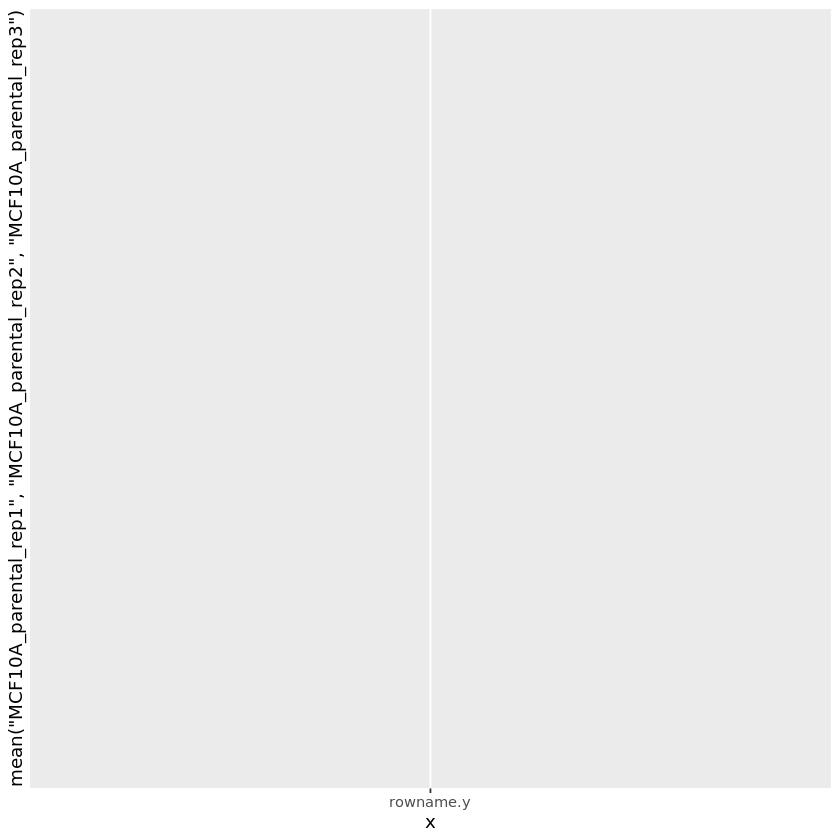

In [48]:
named_goi_df %>% ggplot(aes(x = "rowname.y", y = mean("MCF10A_parental_rep1", 
                                                      "MCF10A_parental_rep2", 
                                                      "MCF10A_parental_rep3"))) + 
    geom_point()

## GSEA Pathways

### Total Genes

In [2]:
MCF10A_ex9vex20_resTot <- as.data.frame(MCF10A_ex9vex20_res)

In [4]:
MCF10A_dds

class: DESeqDataSet 
dim: 60609 9 
metadata(1): version
assays(1): counts
rownames(60609): ENSG00000223972.5 ENSG00000227232.5 ...
  ENSG00000210195.2 ENSG00000210196.2
rowData names(0):
colnames(9): MCF10A_E545K_rep1 MCF10A_E545K_rep2 ... MCF10A_H1047R_rep2
  MCF10A_H1047R_rep3
colData names(1): MCF10A_genotype

In [3]:
ens.str <- substr(rownames(MCF10A_ex9vex20_resTot), 1, 15)
genes <- mapIds(org.Hs.eg.db,
                keys = ens.str,
                column = "SYMBOL",
                keytype = "ENSEMBL",
                multiVals= "first")
str(genes)
genes <- as.character(genes)
MCF10A_ex9vex20_resTot$symbols <- genes
entrez <- mapIds(org.Hs.eg.db,
                keys = ens.str,
                column = "ENTREZID",
                keytype = "ENSEMBL",
                multiVals= "first")
str(entrez)
MCF10A_ex9vex20_resTot$entrez <- entrez
head(MCF10A_ex9vex20_resTot)

'select()' returned 1:many mapping between keys and columns



 Named chr [1:21734] "WASH7P" "MIR6859-1" "LOC100996442" "CICP27" NA NA NA ...
 - attr(*, "names")= chr [1:21734] "ENSG00000227232" "ENSG00000278267" "ENSG00000238009" "ENSG00000233750" ...


'select()' returned 1:many mapping between keys and columns



 Named chr [1:21734] "653635" "102466751" "100996442" "100420257" NA NA NA ...
 - attr(*, "names")= chr [1:21734] "ENSG00000227232" "ENSG00000278267" "ENSG00000238009" "ENSG00000233750" ...


baseMean  log2FoldChange lfcSE     stat       pvalue      
ENSG00000227232.5 228.49968 -1.0426160     0.2020715 -5.1596389 2.474267e-07
ENSG00000278267.1  49.95994 -0.3815437     0.3458952 -1.1030613 2.700005e-01
ENSG00000238009.6  28.51625  0.8316157     0.5239795  1.5871149 1.124866e-01
ENSG00000233750.3  69.85035  0.2650194     0.3445635  0.7691452 4.418071e-01
ENSG00000268903.1 272.18446  0.5712208     0.2140618  2.6684853 7.619411e-03
ENSG00000269981.1 239.55302  0.6518759     0.1927933  3.3812171 7.216549e-04
                  padj         symbols      entrez   
ENSG00000227232.5 7.955144e-07 WASH7P       653635   
ENSG00000278267.1 3.403279e-01 MIR6859-1    102466751
ENSG00000238009.6 1.589681e-01 LOC100996442 100996442
ENSG00000233750.3 5.187002e-01 CICP27       100420257
ENSG00000268903.1 1.394261e-02 NA           NA       
ENSG00000269981.1 1.563010e-03 NA           NA

In [4]:
total_num_ranks <- as.numeric(MCF10A_ex9vex20_resTot$log2FoldChange)
names(total_num_ranks) <- MCF10A_ex9vex20_resTot$symbols
total_num_ranks <- na.omit(total_num_ranks)
total_num_ranks

WASH7P                 MIR6859-1              LOC100996442 
            -1.042616e+00             -3.815437e-01              8.316157e-01 
                   CICP27                      <NA>                      <NA> 
             2.650194e-01              5.712208e-01              6.518759e-01 
                     <NA>                    WASH9P                 RPL23AP21 
             3.466345e-02             -9.147275e-01              7.434980e-02 
                     <NA>              LOC101928626                  MTND2P28 
             1.906969e-01             -1.220662e-01              2.676652e-02 
                 MTCO1P12                  MTCO2P12                  MTATP6P1 
            -2.418106e-01              1.567028e+00              3.338368e-01 
                     <NA>                 LINC01409                      <NA> 
            -3.733009e-01             -2.753394e-01             -4.881784e-02 
                   FAM87B                 LINC01128                 LINC00115 
            -5.355815e-01             -6.086530e-01             -6.886352e-02 
                     <NA>                      <NA>                      <NA> 
            -1.157900e-01             -5.912350e-01             -7.272762e-01 
                LINC02593                    SAMD11                     NOC2L 
            -1.925935e-01              6.005879e-01              3.407849e-01 
                   KLHL17                   PLEKHN1                     PERM1 
             1.949281e-01              1.949564e-03             -2.322790e-01 
                     <NA>                      HES4                     ISG15 
             1.293333e+00             -4.302313e-01             -7.605080e-02 
                     AGRN                      <NA>              LOC100288175 
            -2.729705e-01             -2.679239e-01             -3.415008e-01 
                     <NA>                    RNF223                  C1orf159 
            -1.403315e-01             -4.137154e-02             -1.345951e-01 
                     <NA>                      <NA>                      SDF4 
            -7.275298e-01             -1.599555e+00             -2.022858e-02 
                  B3GALT6                  C1QTNF12                    UBE2J2 
             1.157465e-01              2.555868e-01              1.299011e-01 
                   SCNN1D                     ACAP3                     PUSL1 
            -3.887695e-01             -2.953141e-01              1.747255e-01 
                   INTS11                   MIR6727                      <NA> 
             1.192938e-01              2.062228e-01             -1.133270e-01 
                     CPTP                    TAS1R3                      DVL1 
            -1.925994e-01             -6.070983e-01             -1.211071e-01 
                  MIR6808                     MXRA8                  AURKAIP1 
            -1.002031e+00             -1.113063e+00              3.664763e-01 
                    CCNL2                MRPL20-AS1                    MRPL20 
            -3.747534e-01             -5.612091e-02              5.418072e-01 
                RN7SL657P                      <NA>                   ANKRD65 
            -2.064418e-01              6.031831e-01             -4.915934e-01 
                     VWA1                    ATAD3C                    ATAD3B 
             6.860851e-03              6.860507e-01              7.370317e-01 
                     <NA>                    ATAD3A                   TMEM240 
            -2.112689e-01              5.336351e-01             -8.013614e-01 
                    SSU72                      <NA>                    FNDC10 
             9.782808e-02             -6.835263e-01             -4.184753e-01 
                     <NA>                      <NA>                      MIB2 
            -1.251346e+00             -8.419737e-01             -8.106276e-03 
                   CDK11B                      <NA>                  

### Diff Exp Genes

In [5]:
MCF10A_ex9vex20_resSig_padj

rowname            baseMean   log2FoldChange lfcSE      stat      
1    ENSG00000229344.1    25.34822  1.567028      0.43128682   3.633378
2    ENSG00000272141.1    56.98284 -1.599555      0.36570875  -4.373849
3    ENSG00000142609.18   37.27399  1.581053      0.39585790   3.993991
4    ENSG00000116254.18   26.01773  2.177474      0.59982801   3.630165
5    ENSG00000284716.1    28.53703  2.628378      0.47906145   5.486514
6    ENSG00000284693.1    62.46080 -2.443437      0.39452080  -6.193430
7    ENSG00000271989.1    38.04447  2.389109      0.41415173   5.768681
8    ENSG00000204624.8   150.72500 -1.891653      0.33044053  -5.724640
9    ENSG00000285833.1    36.30865 -1.691796      0.50794893  -3.330642
10   ENSG00000272482.1   542.56454  1.536106      0.11535369  13.316489
11   ENSG00000185519.9   704.00600  1.914970      0.15883880  12.056060
12   ENSG00000236698.1    87.12754 -1.814088      0.26345718  -6.885703
13   ENSG00000117115.13  885.91963 -4.304934      0.17269095 -24.928543
14   ENSG00000142619.4    52.54973  1.614227      0.35651863   4.527749
15   ENSG00000117148.8    22.28771  2.184150      0.60306932   3.621722
16   ENSG00000188257.11  728.26618 -5.130536      0.16948561 -30.271222
17   ENSG00000189410.12  233.39212  1.523024      0.18574305   8.199627
18   ENSG00000187952.9    75.36609 -2.020946      0.34389857  -5.876576
19   ENSG00000007968.7   493.98434 -1.618212      0.14184163 -11.408585
20   ENSG00000179163.11   63.99147  2.512261      0.29468906   8.525124
21   ENSG00000185436.12 1382.32527  2.125245      0.08031295  26.462051
22   ENSG00000158008.10  264.84263 -1.705546      0.26443557  -6.449761
23   ENSG00000181773.7    34.06963  1.659139      0.59330648   2.796429
24   ENSG00000287510.1   314.50276 -1.656016      0.17158932  -9.651045
25   ENSG00000134668.12  498.37125  2.545814      0.20396299  12.481747
26   ENSG00000121904.17   25.98860  5.224626      0.69546754   7.512394
27   ENSG00000092853.14  537.46238  2.035108      0.14529404  14.006825
28   ENSG00000232335.1    45.63089  1.795880      0.31677414   5.669276
29   ENSG00000171812.13   25.64933  1.689473      0.47467877   3.559191
30   ENSG00000286379.1    38.21108  1.578259      0.39638146   3.981667
⋮    ⋮                  ⋮          ⋮              ⋮          ⋮         
1242 ENSG00000232593.7   832.08230 -1.589109      0.16587612  -9.580098
1243 ENSG00000231340.1   187.02434 -2.084174      0.30256000  -6.888466
1244 ENSG00000231809.4   254.93963 -3.154605      0.20412503 -15.454279
1245 ENSG00000230039.1    86.01429 -3.833518      0.46527890  -8.239183
1246 ENSG00000213740.2    44.49653 -1.935528      0.40694022  -4.756295
1247 ENSG00000090889.12 1342.96285  2.265293      0.09365522  24.187581
1248 ENSG00000242732.4   230.62691 -2.451530      0.20935449 -11.709947
1249 ENSG00000270641.1  8855.49194  1.513298      0.26705992   5.666509
1250 ENSG00000277577.1   438.78181  1.561572      0.18928154   8.249998
1251 ENSG00000265727.2    79.91437 -1.648919      0.43830818  -3.762008
1252 ENSG00000237506.3    88.78440 -2.025959      0.30960738  -6.543640
1253 ENSG00000102359.7  2134.40328  1.978703      0.06331718  31.250646
1254 ENSG00000102384.13  408.16218  2.208637      0.15094620  14.631949
1255 ENSG00000184515.11  128.79950  1.731545      0.27260913   6.351750
1256 ENSG00000158164.7    53.43597  2.026926      0.52881097   3.832988
1257 ENSG00000286846.1    61.64742 -1.582875      0.43930231  -3.603156
1258 ENSG00000225031.1   184.92379 -1.907398      0.21573501  -8.841392
1259 ENSG00000182890.5   239.48219 -1.769692      0.19609714  -9.024567
1260 ENSG00000129675.16   32.69486  4.641973      0.57351904   8.093843
1261 ENSG00000101977.21 1664.00121  2.180303      0.08937105  24.396075
1262 ENSG00000011677.13  204.01209 -3.163556      0.23180281 -13.647616
1263 ENSG00000268089.3    81.25248  4.525192      0.44527852  10.162611
1264 ENSG00000182492.16  415.25821 -5.067540      0.22189495 -22.837564
1265 ENSG00000155962.13  332.07340 -3.939580 

In [6]:
write_csv(MCF10A_ex9vex20_resSig_padj, file = "/data/park_lab/adam/figures/DEG_table.csv")

In [7]:
ens.str <- substr(MCF10A_ex9vex20_resSig_padj$rowname, 1, 15)
genes <- mapIds(org.Hs.eg.db,
                keys = ens.str,
                column = "SYMBOL",
                keytype = "ENSEMBL",
                multiVals= "first")
str(genes)
genes <- as.character(genes)
genes

'select()' returned 1:many mapping between keys and columns



 Named chr [1:1271] "MTCO2P12" NA "CFAP74" "CHD5" NA "LINC02606" NA "DISP3" ...
 - attr(*, "names")= chr [1:1271] "ENSG00000229344" "ENSG00000272141" "ENSG00000142609" "ENSG00000116254" ...


[1] "MTCO2P12"     NA             "CFAP74"       "CHD5"        
   [5] NA             "LINC02606"    NA             "DISP3"       
   [9] NA             NA             "FAM131C"      NA            
  [13] "PADI2"        "PADI3"        "ACTL8"        "PLA2G2A"     
  [17] "SH2D5"        NA             "E2F2"         "FUCA1"       
  [21] "IFNLR1"       "EXTL1"        "GPR3"         NA            
  [25] "SPOCD1"       "CSMD2"        "CLSPN"        NA            
  [29] "COL8A2"       NA             "COL9A2"       "EDN2"        
  [33] "LOC100418723" "CDC20"        "KIF2C"        "DMBX1"       
  [37] "CYP4B1"       "CYP4X1"       "PDZK1IP1"     NA            
  [41] NA             "SLC5A9"       "RAB3B"        "RPS13P2"     
  [45] NA             "KANK4"        NA             "DEPDC1"      
  [49] NA             "DEPDC1-AS1"   "LRRIQ3"       "MSH4"        
  [53] "ST6GALNAC3"   NA             NA             "IFI44L"      
  [57] "LPAR3"        "CLCA4"        NA             "TGFBR3"      
  [61] "RPL7P9"       "MIR137HG"     "AMIGO1"       "DENND2D"     
  [65] "CHI3L2"       "OLFML3"       NA             "TXNIP"       
  [69] "NBPF10"       NA             "NBPF14"       "H3C13"       
  [73] "H4C14"        "H2BC19P"      "H2BC20P"      "H2AC19"      
  [77] "SV2A"         "BNIPL"        "SELENBP1"     "RORC"        
  [81] "FLG-AS1"      "HRNR"         "FLG"          "KPRP"        
  [85] "SPRR1A"       "SPRR2D"       "PGLYRP3"      "PGLYRP4"     
  [89] "S100A9"       "S100A8"       "S100A3"       "NPR1"        
  [93] "SNORA58B"     "ATP8B2"       "FDPS"         "RUSC1-AS1"   
  [97] "IQGAP3"       "SH2D2A"       "CFAP45"       "SLAMF9"      
 [101] "ATP1A2"       "ITLN2"        "SPATA46"      "NUF2"        
 [105] "SELL"         "HMCN1"        "PTGS2"        "LOC105371664"
 [109] "B3GALT2"      "KIF14"        "PKP1"         NA            
 [113] NA             NA             NA             NA            
 [117] "CAMK1G"       "HSD11B1"      "NEK2"         "DTL"         
 [121] "ATF3"         "FAM71A"       "BATF3"        "KRT18P12"    
 [125] "CENPF"        "MTARC2"       "MTARC1"       NA            
 [129] "SUSD4"        "GJC2"         NA             "NID1"        
 [133] "EXO1"         "RSAD2"        "RNF144A"      "RRM2"        
 [137] "GREB1"        "OSR1"         "MATN3"        "GDF7"        
 [141] "APOB"         "FAM166C"      NA             "CYP1B1"      
 [145] "RPLP0P6"      "SLC8A1"       NA             "CCDC85A"     
 [149] NA             NA             "ADD2"         "VAX2"        
 [153] "ATP6V1B1"     "TCF7L1"       NA             "KCNIP3"      
 [157] "NCAPH"        "IL1R1"        NA             "BUB1"        
 [161] "NT5DC4"       "CKAP2L"       "IL1A"         "IL1B"        
 [165] NA             "MARCO"        "TMEM37"       "GLI2"        
 [169] "MYO7B"        "FAR2P1"       "POTEF"        "CCDC74B"     
 [173] "TUBA3E"       "CCDC74A"      NA             NA            
 [177] "LYPD6"        "RND3"         "GPD2"         "DAPL1"       
 [181] "TBR1"         "SLC38A11"     "SCN2A"        "NOSTRIN"     
 [185] "SPC25"        "DLX2"         NA             NA            
 [189] NA             "STAT4-AS1"    "STAT4"        "HECW2"       
 [193] "PLCL1"        "SCYL2P1"      "LOC100419679" NA            
 [197] "MAP2"         NA             "FN1"          "IGFBP2"      
 [201] "GPBAR1"       "CYP27A1"      "IHH"          NA            
 [205] "CT75"         NA             "SLC16A14"     "ALPG"        
 [209] "CHRND"        "KCNJ13"       "NGEF"         "HJURP"       
 [213] "COL6A3"       "KLHL30"       "MAB21L4"      "BHLHE40-AS1" 
 [217] "BHLHE40"      "FANCD2"       "FANCD2OS"     "CAND2"       
 [221] "PLCL2"        "KCNH8"        "THRB"         NA            
 [225] NA             "TRIM71"       NA             "VILL"        
 [229] "ENTPD3"       NA             NA             NA            
 [233] "KIF15"        "TMIE"         "SEMA3B"       NA            
 [237] "POC1A"        "CACNA2D3-AS1" NA           

In [8]:
MCF10A_ex9vex20_resSig_padj$symbols <- genes

In [9]:
ens.str <- substr(MCF10A_ex9vex20_resSig_padj$rowname, 1, 15)
entrez <- mapIds(org.Hs.eg.db,
                keys = ens.str,
                column = "ENTREZID",
                keytype = "ENSEMBL",
                multiVals= "first")
str(entrez)
genes <- as.character(entrez)
entrez
MCF10A_ex9vex20_resSig_padj$entrez <- entrez

'select()' returned 1:many mapping between keys and columns



 Named chr [1:1271] "107075310" NA "85452" "26038" NA "100506022" NA ...
 - attr(*, "names")= chr [1:1271] "ENSG00000229344" "ENSG00000272141" "ENSG00000142609" "ENSG00000116254" ...


ENSG00000229344 ENSG00000272141 ENSG00000142609 ENSG00000116254 ENSG00000284716 
    "107075310"              NA         "85452"         "26038"              NA 
ENSG00000284693 ENSG00000271989 ENSG00000204624 ENSG00000285833 ENSG00000272482 
    "100506022"              NA         "57540"              NA              NA 
ENSG00000185519 ENSG00000236698 ENSG00000117115 ENSG00000142619 ENSG00000117148 
       "348487"              NA         "11240"         "51702"         "81569" 
ENSG00000188257 ENSG00000189410 ENSG00000187952 ENSG00000007968 ENSG00000179163 
         "5320"        "400745"              NA          "1870"          "2517" 
ENSG00000185436 ENSG00000158008 ENSG00000181773 ENSG00000287510 ENSG00000134668 
       "163702"          "2134"          "2827"              NA         "90853" 
ENSG00000121904 ENSG00000092853 ENSG00000232335 ENSG00000171812 ENSG00000286379 
       "114784"         "63967"              NA          "1296"              NA 
ENSG00000049089 ENSG00000127129 ENSG00000230638 ENSG00000117399 ENSG00000142945 
         "1298"          "1907"     "100418723"           "991"         "11004" 
ENSG00000197587 ENSG00000142973 ENSG00000186377 ENSG00000162366 ENSG00000225762 
       "127343"          "1580"        "260293"         "10158"              NA 
ENSG00000242267 ENSG00000117834 ENSG00000169213 ENSG00000228929 ENSG00000228838 
             NA        "200010"          "5865"        "729236"              NA 
ENSG00000132854 ENSG00000116652 ENSG00000024526 ENSG00000233589 ENSG00000234264 
       "163782"              NA         "55635"              NA     "101927220" 
ENSG00000162620 ENSG00000057468 ENSG00000184005 ENSG00000226415 ENSG00000219201 
       "127255"          "4438"        "256435"              NA              NA 
ENSG00000137959 ENSG00000171517 ENSG00000016602 ENSG00000236915 ENSG00000069702 
        "10964"         "23566"         "22802"              NA          "7049" 
ENSG00000137970 ENSG00000225206 ENSG00000181754 ENSG00000162777 ENSG00000064886 
       "653702"        "400765"         "57463"         "79961"          "1117" 
ENSG00000116774 ENSG00000234367 ENSG00000265972 ENSG00000271425 ENSG00000244371 
        "56944"              NA         "10628"     "100132406"              NA 
ENSG00000270629 ENSG00000183598 ENSG00000270882 ENSG00000220323 ENSG00000261716 
        "25832"        "653604"          "8370"        "337874"        "337873" 
ENSG00000272196 ENSG00000159164 ENSG00000163141 ENSG00000143416 ENSG00000143365 
       "723790"          "9900"        "149428"          "8991"          "6097" 
ENSG00000237975 ENSG00000197915 ENSG00000143631 ENSG00000203786 ENSG00000169474 
       "339400"        "388697"          "2312"        "448834"          "6698" 
ENSG00000163216 ENSG00000159527 ENSG00000163218 ENSG00000163220 ENSG00000143546 
         "6703"        "114771"         "57115"          "6280"          "6279" 
ENSG00000188015 ENSG00000169418 ENSG00000201129 ENSG00000143515 ENSG00000160752 
         "6274"          "4881"     "109617023"         "57198"          "2224" 
ENSG00000225855 ENSG00000183856 ENSG00000027869 ENSG00000213085 ENSG00000162723 
       "284618"        "128239"          "9047"         "25790"         "89886" 
ENSG00000018625 ENSG00000158764 ENSG00000171722 ENSG00000143228 ENSG00000188404 
          "477"        "142683"        "284680"         "83540"          "6402" 
ENSG00000143341 ENSG00000073756 ENSG00000285280 ENSG00000162630 ENSG00000118193 
        "83872"          "5743"     "105371664"          "8707"          "9928" 
ENSG00000081277 ENSG00000249007 ENSG00000235449 ENSG00000203709 ENSG00000224260 
         "5317"              NA              NA              NA              NA 
ENSG00000287902 ENSG00000008118 ENSG00000117594 ENSG00000117650 ENSG00000143476 
             NA         "57172"          "3290"          "4751"         "51514" 
ENSG00000162772 ENSG00000162771 ENSG00000123685 ENSG00000215819 ENSG00000117724 
          "467"        "149647"

In [10]:
head(MCF10A_ex9vex20_resSig_padj)

rowname            baseMean log2FoldChange lfcSE     stat      pvalue      
1 ENSG00000229344.1  25.34822  1.567028      0.4312868  3.633378 2.797349e-04
2 ENSG00000272141.1  56.98284 -1.599555      0.3657087 -4.373849 1.220746e-05
3 ENSG00000142609.18 37.27399  1.581053      0.3958579  3.993991 6.497035e-05
4 ENSG00000116254.18 26.01773  2.177474      0.5998280  3.630165 2.832406e-04
5 ENSG00000284716.1  28.53703  2.628378      0.4790615  5.486514 4.099420e-08
6 ENSG00000284693.1  62.46080 -2.443437      0.3945208 -6.193430 5.886891e-10
  padj         symbols   entrez   
1 6.420282e-04 MTCO2P12  107075310
2 3.299460e-05 NA        NA       
3 1.619451e-04 CFAP74    85452    
4 6.497309e-04 CHD5      26038    
5 1.419025e-07 NA        NA       
6 2.381057e-09 LINC02606 100506022

In [13]:
write_csv(MCF10A_ex9vex20_resSig_padj, file = "/data/park_lab/adam/figures/DEG_table.csv")

In [14]:
getwd()
saveRDS(MCF10A_ex9vex20_resSig_padj, "mutantComp_DEGenes.rds")

[1] "/gpfs52/data/park_lab/adam/Total_RNA"

In [11]:
library(msigdbr)
library(fgsea)

In [12]:
named_num_ranks <- as.numeric(MCF10A_ex9vex20_resSig_padj$log2FoldChange)
names(named_num_ranks) <- MCF10A_ex9vex20_resSig_padj$symbols
str(named_num_ranks)

 Named num [1:1271] 1.57 -1.6 1.58 2.18 2.63 ...
 - attr(*, "names")= chr [1:1271] "MTCO2P12" NA "CFAP74" "CHD5" ...


In [13]:
#Retrieve human H (hallmark) gene set
msigdbr_df <- msigdbr(species = "human", category = "H")
pathwaysH <- split(x = msigdbr_df$gene_symbol, f = msigdbr_df$gs_name)
pathwaysH

$HALLMARK_ADIPOGENESIS
  [1] "ABCA1"    "ABCB8"    "ACAA2"    "ACADL"    "ACADM"    "ACADS"   
  [7] "ACLY"     "ACO2"     "ACOX1"    "ADCY6"    "ADIG"     "ADIPOQ"  
 [13] "ADIPOR2"  "ADIPOR2"  "AGPAT3"   "AIFM1"    "AK2"      "ALDH2"   
 [19] "ALDOA"    "ANGPT1"   "ANGPTL4"  "APLP2"    "APOE"     "ARAF"    
 [25] "ARL4A"    "ATL2"     "ATP1B3"   "ATP5PO"   "BAZ2A"    "BCKDHA"  
 [31] "BCL2L13"  "BCL6"     "C3"       "CAT"      "CAVIN1"   "CAVIN2"  
 [37] "CCNG2"    "CD151"    "CD302"    "CD36"     "CDKN2C"   "CHCHD10" 
 [43] "CHCHD10"  "CHCHD10"  "CHUK"     "CIDEA"    "CMBL"     "CMPK1"   
 [49] "COL15A1"  "COL4A1"   "COQ3"     "COQ5"     "COQ9"     "COX6A1"  
 [55] "COX7B"    "COX8A"    "CPT2"     "CRAT"     "CS"       "CYC1"    
 [61] "CYP4B1"   "DBT"      "DDT"      "DDT"      "DECR1"    "DGAT1"   
 [67] "DGAT1"    "DGAT1"    "DHCR7"    "DHRS7"    "DHRS7B"   "DLAT"    
 [73] "DLD"      "DNAJB9"   "DNAJC15"  "DRAM2"    "ECH1"     "ECH1"    
 [79] "ECHS1"    "ELMOD3"   "ELOVL6"   "ENPP2"    "EPHX2"    "ESRRA"   
 [85] "ESYT1"    "ETFB"     "FABP4"    "FAH"      "FZD4"     "G3BP2"   
 [91] "GADD45A"  "GBE1"     "GHITM"    "GPAM"     "GPAT4"    "GPD2"    
 [97] "GPHN"     "GPX3"     "GPX4"     "GRPEL1"   "HADH"     "HIBCH"   
[103] "HSPB8"    "IDH1"     "IDH3A"    "IDH3G"    "IFNGR1"   "IMMT"    
[109] "ITGA7"    "ITIH5"    "ITSN1"    "JAGN1"    "LAMA4"    "LEP"     
[115] "LIFR"     "LIPE"     "LPCAT3"   "LPL"      "LTC4S"    "LTC4S"   
[121] "MAP4K3"   "MCCC1"    "MDH2"     "ME1"      "MGLL"     "MGST3"   
[127] "MIGA2"    "MRAP"     "MRPL15"   "MTARC2"   "MTCH2"    "MTCH2"   
[133] "MYLK"     "NABP1"    "NDUFA5"   "NDUFAB1"  "NDUFB7"   "NDUFS3"  
[139] "NDUFS3"   "NKIRAS1"  "NMT1"     "OMD"      "ORM1"     "PDCD4"   
[145] "PEMT"     "PEX14"    "PFKFB3"   "PFKL"     "PGM1"     "PHLDB1"  
[151] "PHYH"     "PIM3"     "PLIN2"    "POR"      "PPARG"    "PPM1B"   
[157] "PPP1R15B" "PRDX3"    "PREB"     "PTCD3"    "PTGER3"   "QDPR"    
[163] "RAB34"    "REEP5"    "REEP6"    "RETN"     "RETSAT"   "RIOK3"   
[169] "RMDN3"    "RNF11"    "RREB1"    "RTN3"     "SAMM50"   "SCARB1"  
[175] "SCP2"     "SDHB"     "SDHC"     "SLC19A1"  "SLC1A5"   "SLC25A1" 
[181] "SLC25A10" "SLC27A1"  "SLC5A6"   "SLC66A3"  "SNCG"     "SOD1"    
[187] "SORBS1"   "SOWAHC"   "SPARCL1"  "SQOR"     "SSPN"     "STAT5A"  
[193] "STOM"     "SUCLG1"   "SULT1A1"  "TALDO1"   "TANK"     "TKT"     
[199] "TOB1"     "TST"      "UBC"      "UBQLN1"   "UCK1"     "UCP2"    
[205] "UQCR10"   "UQCR11"   "UQCRC1"   "UQCRQ"    "VEGFB"    "YWHAG"   

$HALLMARK_ALLOGRAFT_REJECTION
  [1] "AARS1"    "ABCE1"    "ABI1"     "ACHE"     "ACVR2A"   "AKT1"    
  [7] "APBB1"    "B2M"      "B2M"      "BCAT1"    "BCL10"    "BCL3"    
 [13] "BRCA1"    "C2"       "C2"       "C2"       "C2"       "C2"      
 [19] "C2"       "C2"       "CAPG"     "CARTPT"   "CCL11"    "CCL13"   
 [25] "CCL19"    "CCL2"     "CCL22"    "CCL4"     "CCL4"     "CCL4"    
 [31] "CCL5"     "CCL5"     "CCL7"     "CCND2"    "CCND3"    "CCR1"    
 [37] "CCR2"     "CCR5"     "CD1D"     "CD2"      "CD247"    "CD28"    
 [43] "CD3D"     "CD3E"     "CD3G"     "CD4"      "CD40"     "CD40LG"  
 [49] "CD47"     "CD7"      "CD74"     "CD79A"    "CD80"     "CD86"    
 [55] "CD8A"     "CD8B"     "CD96"     "CDKN2A"   "CFP"      "CRTAM"   
 [61] "CSF1"     "CSK"      "CTSS"     "CXCL13"   "CXCL9"    "CXCR3"   
 [67] "DARS1"    "DEGS1"    "DYRK3"    "EGFR"     "EIF3A"    "EIF3D"   
 [73] "EIF3J"    "EIF4G3"   "EIF5A"    "EIF5A"    "ELANE"    "ELANE"   
 [79] "ELF4"     "EREG"     "ETS1"     "F2"       "F2R"      "FAS"     
 [85] "FASLG"    "FCGR2B"   "FGR"      "FLNA"     "FYB1"     "GALNT1"  
 [91] "GBP2"     "GCNT1"    "GLMN"     "GPR65"    "GZMA"     "GZMB"    
 [97] "HCLS1"    "HDAC9"    "HIF1A"    "HLA-A"    "HLA-A"    "HLA-A"   
[103] "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-DMA" 
[109] "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA" 
[115] "HLA-DMA"  "HLA-DMB"  "HLA-DMB"  "HLA-DMB"  "HLA-DMB

In [14]:
fgseaRes <- fgsea(pathways=pathwaysH, stats = named_num_ranks, min = 15)
fgseaRes

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”


pathway                                    pval         padj        
1  HALLMARK_APOPTOSIS                         1.046312e-01 1.831046e-01
2  HALLMARK_COMPLEMENT                        1.478873e-01 2.300469e-01
3  HALLMARK_E2F_TARGETS                       2.293281e-07 2.997109e-06
4  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 2.141653e-01 2.725740e-01
5  HALLMARK_ESTROGEN_RESPONSE_EARLY           2.027972e-01 2.725740e-01
6  HALLMARK_ESTROGEN_RESPONSE_LATE            4.830097e-01 5.201643e-01
7  HALLMARK_G2M_CHECKPOINT                    4.281584e-07 2.997109e-06
8  HALLMARK_HYPOXIA                           3.770883e-01 4.399364e-01
9  HALLMARK_INFLAMMATORY_RESPONSE             5.849057e-01 5.849057e-01
10 HALLMARK_KRAS_SIGNALING_DN                 3.826711e-02 1.185529e-01
11 HALLMARK_KRAS_SIGNALING_UP                 1.036184e-01 1.831046e-01
12 HALLMARK_MITOTIC_SPINDLE                   1.541339e-05 7.192915e-05
13 HALLMARK_MYOGENESIS                        9.548611e-02 1.831046e-01
14 HALLMARK_TNFA_SIGNALING_VIA_NFKB           4.234031e-02 1.185529e-01
   log2err    ES         NES        size
1  0.17978232  0.3607927  1.4517323 19  
2  0.17669427 -0.3227555 -1.3393422 16  
3  0.69013246  0.5574101  2.8956836 37  
4  0.11988785  0.2709723  1.2256416 26  
5  0.14826150 -0.3074792 -1.2554373 15  
6  0.09167952 -0.1979199 -0.9862912 25  
7  0.67496286  0.5496879  2.8262410 36  
8  0.10552094 -0.2376856 -1.0608377 19  
9  0.06350080  0.2219659  0.8931307 19  
10 0.32177592 -0.3112701 -1.6662691 31  
11 0.17669427  0.2996412  1.4279019 30  
12 0.57561026  0.5737613  2.5245496 24  
13 0.19002331  0.3895230  1.4765916 16  
14 0.32177592  0.3603091  1.6297231 26  
   leadingEdge                                                                                                                                                                                                                                                                                                                             
1  CCND2 , ATF3  , IL1B  , NEDD9 , IGFBP6, EREG  , TOP2A                                                                                                                                                                                                                                                                                   
2  S100A9  , CFB     , SERPINB2, CD36    , C3      , MMP13                                                                                                                                                                                                                                                                                 
3  MYBL2   , SPC25   , RRM2    , CDC20   , DLGAP5  , KIF18B  , BIRC5   , HMMR    , PLK1    , KIF2C   , ASF1B   , TK1     , CENPM   , TOP2A   , AURKB   , CDKN3   , MKI67   , KIF4A   , DEPDC1  , LMNB1   , BUB1B   , CDCA3   , CCNB2   , GINS4   , SPC24   , SPAG5   , CIT     , RNASEH2A, ESPL1   , CDK1    , PLK4    , RAD51AP1, MCM5    
4  VCAN  , TFPI2 , THBS1 , COL6A3, AREG  , FUCA1 , FN1   , GEM   , DPYSL3, CCN2  , IGFBP2, VIM   , NT5E  , COL8A2, INHBA , FSTL1 , LOXL1 , CDH2  , COL5A1, MATN3                                                                                                                                                                           
5  OLFML3 , KLK10  , SULT2B1, KRT13                                                                                                                                                                                                                                                                                                        
6  CXCL14 , KLK10  , S100A9 , SULT2B1, KRT13                                                                                                                                                                                                                                                                                

In [19]:
TCGA_fgsea_res <- readRDS("/gpfs52/data/park_lab/adam/notebooks/TCGA_fgsea_res.rds")
str(TCGA_fgsea_res)

Classes ‘data.table’ and 'data.frame':	50 obs. of  8 variables:
 $ pathway    : chr  "HALLMARK_ADIPOGENESIS" "HALLMARK_ALLOGRAFT_REJECTION" "HALLMARK_ANDROGEN_RESPONSE" "HALLMARK_ANGIOGENESIS" ...
 $ pval       : num  8.72e-05 5.11e-01 4.47e-01 8.93e-02 7.83e-01 ...
 $ padj       : num  0.00108 0.75123 0.67751 0.21377 1 ...
 $ log2err    : num  0.5384 0.0982 0.1028 0.1919 0.0448 ...
 $ ES         : num  -0.45 0.252 0.291 -0.478 -0.242 ...
 $ NES        : num  -1.633 0.974 1.007 -1.341 -0.878 ...
 $ size       : int  200 200 100 36 199 44 161 112 74 138 ...
 $ leadingEdge:List of 50
  ..$ : chr  "ACADL" "ADIG" "CD36" "ADIPOQ" ...
  ..$ : chr  "CCL7" "MBL2" "IL6" "EREG" ...
  ..$ : chr  "KLK3" "NKX3-1" "KLK2" "HPGD" ...
  ..$ : chr  "APOH" "STC1" "LPL" "VTN" ...
  ..$ : chr  "ACTN2" "CALB2" "CDH3" "ATP1A3" ...
  ..$ : chr  "RHCG" "ATP6V0A4" "PCSK9" "NTNG1" ...
  ..$ : chr  "IFNB1" "IL6" "EREG" "ATF3" ...
  ..$ : chr  "SERPINA6" "ABCG8" "AGXT" "CYP8B1" ...
  ..$ : chr  "LPL" "GNAI1" "ACAT

In [20]:
TCGA_fgsea_res

pathway                                    pval         padj        
1  HALLMARK_ADIPOGENESIS                      8.719383e-05 1.079125e-03
2  HALLMARK_ALLOGRAFT_REJECTION               5.114943e-01 7.512315e-01
3  HALLMARK_ANDROGEN_RESPONSE                 4.471545e-01 6.775068e-01
4  HALLMARK_ANGIOGENESIS                      8.925620e-02 2.137697e-01
5  HALLMARK_APICAL_JUNCTION                   7.834101e-01 1.000000e+00
6  HALLMARK_APICAL_SURFACE                    9.477124e-02 2.153892e-01
7  HALLMARK_APOPTOSIS                         9.310345e-01 1.000000e+00
8  HALLMARK_BILE_ACID_METABOLISM              4.294574e-01 6.710271e-01
9  HALLMARK_CHOLESTEROL_HOMEOSTASIS           4.207120e-01 6.710271e-01
10 HALLMARK_COAGULATION                       8.978328e-02 2.137697e-01
11 HALLMARK_COMPLEMENT                        7.033639e-02 1.953789e-01
12 HALLMARK_DNA_REPAIR                        1.933029e-01 4.116743e-01
13 HALLMARK_E2F_TARGETS                       2.899578e-11 1.449789e-09
14 HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 5.258621e-01 7.512315e-01
15 HALLMARK_ESTROGEN_RESPONSE_EARLY           9.831029e-01 1.000000e+00
16 HALLMARK_ESTROGEN_RESPONSE_LATE            2.933033e-02 9.776775e-02
17 HALLMARK_FATTY_ACID_METABOLISM             2.614391e-03 1.452440e-02
18 HALLMARK_G2M_CHECKPOINT                    5.557390e-09 1.389347e-07
19 HALLMARK_GLYCOLYSIS                        1.448349e-04 1.206957e-03
20 HALLMARK_HEDGEHOG_SIGNALING                8.760331e-01 1.000000e+00
21 HALLMARK_HEME_METABOLISM                   3.072197e-01 5.296891e-01
22 HALLMARK_HYPOXIA                           6.405530e-01 8.656122e-01
23 HALLMARK_IL2_STAT5_SIGNALING               1.000000e+00 1.000000e+00
24 HALLMARK_IL6_JAK_STAT3_SIGNALING           9.935588e-01 1.000000e+00
25 HALLMARK_INFLAMMATORY_RESPONSE             2.279202e-01 4.323832e-01
26 HALLMARK_INTERFERON_ALPHA_RESPONSE         7.231668e-04 4.519793e-03
27 HALLMARK_INTERFERON_GAMMA_RESPONSE         9.767351e-05 1.079125e-03
28 HALLMARK_KRAS_SIGNALING_DN                 2.102774e-02 7.878234e-02
29 HALLMARK_KRAS_SIGNALING_UP                 2.048930e-01 4.116743e-01
30 HALLMARK_MITOTIC_SPINDLE                   2.058372e-01 4.116743e-01
31 HALLMARK_MTORC1_SIGNALING                  3.256353e-02 1.017610e-01
32 HALLMARK_MYC_TARGETS_V1                    1.079125e-04 1.079125e-03
33 HALLMARK_MYC_TARGETS_V2                    1.944402e-02 7.878234e-02
34 HALLMARK_MYOGENESIS                        2.334869e-01 4.323832e-01
35 HALLMARK_NOTCH_SIGNALING                   1.000000e+00 1.000000e+00
36 HALLMARK_OXIDATIVE_PHOSPHORYLATION         2.967052e-04 2.119323e-03
37 HALLMARK_P53_PATHWAY                       5.795107e-01 8.048760e-01
38 HALLMARK_PANCREAS_BETA_CELLS               2.205906e-02 7.878234e-02
39 HALLMARK_PEROXISOME                        7.763975e-02 2.043151e-01
40 HALLMARK_PI3K_AKT_MTOR_SIGNALING           6.640625e-01 8.737664e-01
41 HALLMARK_PROTEIN_SECRETION                 8.423567e-01 1.000000e+00
42 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY   3.203390e-01 5.338983e-01
43 HALLMARK_SPERMATOGENESIS                   2.707355e-01 4.834563e-01
44 HALLMARK_TGF_BETA_SIGNALING                1.000000e+00 1.000000e+00
45 HALLMARK_TNFA_SIGNALING_VIA_NFKB           6.757883e-03 3.378941e-02
46 HALLMARK_UNFOLDED_PROTEIN_RESPONSE         9.674419e-01 1.000000e+00
47 HALLMARK_UV_RESPONSE_DN                    9.914530e-01 1.000000e+00
48 HALLMARK_UV_RESPONSE_UP                    9.205681e-03 4.184400e-02
49 HALLMARK_WNT_BETA_CATENIN_SIGNALING        8.555377e-01 1.000000e+00
50 HALLMARK_XENOBIOTIC_METABOLISM             5.504587e-02 1.618996e-01
   log2err    ES          NES        size
1  0.53843410 -0.44999550 -1.6328206 200 
2  0.09821234  0.25245462  0.9744267 200 
3  0.10282184  0.29080941  1.0066149 100 
4  0.19189224 -0.47777908 -1.3414652  36 
5  0.04477489 -0.24237186 -0.8783035 199 
6  0.18470647 -0.44794533 -1.3164287  44 
7  0.06598161  0.21430410  0.8081114 

In [21]:
vectors <- list("TCGA" = TCGA_fgsea_res$pathway, 
                "MCF10A" = fgseaRes$pathway)
ggvenn(vectors, c("TCGA", "MCF10A"), show_percentage = FALSE) 

ERROR: Error in ggvenn(vectors, c("TCGA", "MCF10A"), show_percentage = FALSE): could not find function "ggvenn"


In [ ]:
library(eulerr)

In [ ]:
library(polylabelr)

In [ ]:
combo <- c(A = 50, B = 14, "A&B" = 14)
fit1 <- euler(combo)


In [ ]:
plot(fit1)

In [21]:
fgseaRes$clean_names <- fgseaRes$pathway %>%
                        gsub(pattern = "HALLMARK\\_", replacement = "") %>%
                        gsub(pattern = "\\_", replacement = " ") %>%
                        str_to_title()
fgseaRes$clean_names

[1] "Apoptosis"                         "Complement"                       
 [3] "E2f Targets"                       "Epithelial Mesenchymal Transition"
 [5] "Estrogen Response Early"           "Estrogen Response Late"           
 [7] "G2m Checkpoint"                    "Hypoxia"                          
 [9] "Inflammatory Response"             "Kras Signaling Dn"                
[11] "Kras Signaling Up"                 "Mitotic Spindle"                  
[13] "Myogenesis"                        "Tnfa Signaling Via Nfkb"

In [ ]:
topPathwaysUp <- fgseaRes[ES > 0][head(order(pval), n=20), pathway]
topPathwaysDown <- fgseaRes[ES < 0][head(order(pval), n=20), pathway]
topPathways <- c(topPathwaysUp, rev(topPathwaysDown))
plotGseaTable(pathwaysH[topPathways], named_num_ranks, fgseaRes, 
              gseaParam=0.5)

In [ ]:
plotGseaTable(pathwaysH[topPathways], named_num_ranks, fgseaRes, 
              gseaParam=0.5)

In [ ]:
p <- plotGseaTable(pathwaysH[topPathways], named_num_ranks, fgseaRes, 
              gseaParam=0.5, render = FALSE)

In [ ]:
library("grid")
library("ggplotify")

In [15]:
plotting_df <- data.frame(gene = MCF10A_ex9vex20_resSig_padj$symbols, 
                          log2FoldChange = MCF10A_ex9vex20_resSig_padj$log2FoldChange) %>%
               na.omit() %>% arrange(desc(log2FoldChange)) %>% mutate(ranks = c(1:944))
plotting_df$ranks <- as.numeric(plotting_df$ranks)
plotting_df

gene       log2FoldChange ranks
1   MTARC2     13.707492       1   
2   RYR1        9.423021       2   
3   SNAP91      9.340920       3   
4   GBGT1       9.340105       4   
5   IGFBP7-AS1  8.736623       5   
6   PLCL2       8.196606       6   
7   ZNF69       8.195358       7   
8   ZNF569      7.167326       8   
9   ATP8A2      6.393813       9   
10  CCND2       6.170724      10   
11  CCND2-AS1   5.942136      11   
12  SCN2A       5.909797      12   
13  CTF1        5.703765      13   
14  NOVA2       5.358313      14   
15  KLK1        5.324029      15   
16  VAV1        5.305104      16   
17  CSMD2       5.224626      17   
18  MUC3A       5.203803      18   
19  ZNF253      5.171953      19   
20  CABCOCO1    4.916203      20   
21  MAP1LC3A    4.786851      21   
22  ARHGEF6     4.641973      22   
23  ZNF568      4.617402      23   
24  ST8SIA4     4.561377      24   
25  GNG11       4.547588      25   
26  EEF1A2      4.535363      26   
27  GABRQ       4.525192      27   
28  VCAN        4.494540      28   
29  MSC-AS1     4.426201      29   
30  TRPA1       4.378307      30   
⋮   ⋮          ⋮              ⋮    
915 ADGRF1     -3.809046      915  
916 DEPP1      -3.811548      916  
917 KRT10      -3.853794      917  
918 KRT16      -3.874557      918  
919 CLIC2      -3.939580      919  
920 KLK10      -3.993486      920  
921 CXCL14     -4.012825      921  
922 SLC2A14    -4.053024      922  
923 CALML5     -4.090305      923  
924 C9orf152   -4.179433      924  
925 SAA2       -4.222266      925  
926 PADI2      -4.304934      926  
927 SAA2-SAA4  -4.316467      927  
928 OLFM4      -4.320240      928  
929 AQP9       -4.469884      929  
930 RARRES1    -4.544470      930  
931 KLK7       -4.584208      931  
932 ZNF287     -4.592378      932  
933 SLFN13     -4.625599      933  
934 ATP13A4    -4.957255      934  
935 BGN        -5.067540      935  
936 PLA2G2A    -5.130536      936  
937 OLFML3     -5.194276      937  
938 CYP4B1     -5.306422      938  
939 S100A8     -5.364790      939  
940 PI3        -5.426641      940  
941 MUC16      -5.467493      941  
942 CASP14     -5.476826      942  
943 AZGP1      -6.209028      943  
944 ANOS1      -8.316760      944

In [ ]:
fgseaRes

In [18]:
plotting_df_list <- list()
for (i in 1:nrow(fgseaRes)) {
    temp_df <- as.data.frame(unlist(fgseaRes[i,8]))
    temp_df <- mutate(temp_df, pathway = rep(c(fgseaRes[i,9]), nrow(temp_df)))
    names(temp_df) <- c("gene", "pathway")
    temp_df <- merge(temp_df, plotting_df, by = "gene")
    temp_df$pathway <- as.character(temp_df$pathway)
    plotting_df_list[[i]] <- temp_df
}

str(plotting_df_list)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `pathway = rep(c(fgseaRes[i, 9]), nrow(temp_df))`.
[1mCaused by error in `[.data.table`:[22m
[33m![39m Item 1 of j is 9 which is outside the column number range [1,ncol=8]


In [ ]:
BigPlotting_df <- rbind(
                  plotting_df_list[[1]],
                  plotting_df_list[[2]],
                  plotting_df_list[[3]],
                  plotting_df_list[[4]],
                  plotting_df_list[[5]],
                  plotting_df_list[[6]],
                  plotting_df_list[[7]],
                  plotting_df_list[[8]],
                  plotting_df_list[[9]],
                  plotting_df_list[[10]],
                  plotting_df_list[[11]],
                  plotting_df_list[[12]],
                  plotting_df_list[[13]],
                  plotting_df_list[[14]])
str(BigPlotting_df %>% filter(pathway == "Kras Signaling Up"))

In [ ]:
library("ggh4x")

In [ ]:
BigPlotting_df$pathway <- gsub(BigPlotting_df$pathway, pattern = " ", replacement = "\n")

In [16]:
p <- ggplot(BigPlotting_df) + 
     annotate("rect", ymin = 0, ymax = Inf, xmin = -Inf, xmax = Inf,
              fill = "#E01488", alpha = 0.5) + 
     annotate("rect", ymin = -Inf, ymax = 0, xmin = -Inf, xmax = Inf,
              fill = "#009086", alpha = 0.5) + 
     geom_col(aes(x = ranks, y = log2FoldChange, width = 1.5)) +
     geom_hline(yintercept = 0, color = "black", size = .1) +
     theme_bw() + theme(axis.ticks = element_blank(), axis.text = element_blank()) + 
     ggtitle("GSEA Pathway Enrichment", "Hallmark Pathway Collection") + 
     ylab("Log2 Fold Change") + xlab("Ranks") +
     facet_grid(rows = vars(pathway)) + 
     scale_color_manual(name = "Gene Expression", breaks = c("E545K", "H1047R"),
                        values =  c("E545K" = "#E01488", "H1047R" = "#009086")) +
     theme(legend.title=element_text(size=20), legend.text=element_text(size=14)) +
     theme(strip.text.x = element_text(margin = margin(5,5,5,5, "cm")))
p

ERROR: Error in ggplot(BigPlotting_df): object 'BigPlotting_df' not found


In [ ]:
BigPlotting_df$Genotype <- if_else(BigPlotting_df$log2FoldChange > 0, "E545K", "H1047R")
BigPlotting_df

In [17]:
BigPlotting_df_E545K <- BigPlotting_df %>%
                        filter(Genotype == "E545K")
str(BigPlotting_df_E545K)
BigPlotting_df_H1047R <- BigPlotting_df %>%
                        filter(Genotype == "H1047R")
str(BigPlotting_df_H1047R)

ERROR: Error in filter(., Genotype == "E545K"): object 'BigPlotting_df' not found


In [ ]:
BigPlotting_df_E545K$pathway <- as.factor(BigPlotting_df_E545K$pathway)
BigPlotting_df_H1047R$pathway <- as.factor(BigPlotting_df_H1047R$pathway)

In [ ]:
sumdata_E545K <- BigPlotting_df_E545K %>%  group_by(pathway) %>%
  summarise(gene_count = length(pathway))
str(sumdata_E545K)
sumdata_H1047R <- BigPlotting_df_H1047R %>%  group_by(pathway) %>%
  summarise(gene_count = length(pathway))
sumdata_H1047R

In [ ]:
sumdata_E545K$Genotype <- c(rep("E545K", 9))
sumdata_H1047R$Genotype <- c(rep("H1047R", 5))

In [ ]:
sumdata_E545K$clean_names <- str_replace_all(sumdata_E545K$pathway, pattern = "\n",
                                         replacement = " ")
sumdata_E545K$clean_names
sumdata_H1047R$clean_names <- str_replace_all(sumdata_H1047R$pathway, pattern = "\n",
                                         replacement = " ")
sumdata_H1047R

In [22]:
fgseaRes_df <- as.data.frame(fgseaRes)
fgseaRes_df$clean_names

[1] "Apoptosis"                         "Complement"                       
 [3] "E2f Targets"                       "Epithelial Mesenchymal Transition"
 [5] "Estrogen Response Early"           "Estrogen Response Late"           
 [7] "G2m Checkpoint"                    "Hypoxia"                          
 [9] "Inflammatory Response"             "Kras Signaling Dn"                
[11] "Kras Signaling Up"                 "Mitotic Spindle"                  
[13] "Myogenesis"                        "Tnfa Signaling Via Nfkb"

In [23]:
sumdata_E545K <- left_join(x = sumdata_E545K, y = fgseaRes_df,
                           join_by(clean_names))
sumdata_E545K

ERROR: Error in left_join(x = sumdata_E545K, y = fgseaRes_df, join_by(clean_names)): object 'sumdata_E545K' not found


In [24]:
sumdata_H1047R <- left_join(x = sumdata_H1047R, y = fgseaRes_df,
                           join_by(clean_names))
sumdata_H1047R

ERROR: Error in left_join(x = sumdata_H1047R, y = fgseaRes_df, join_by(clean_names)): object 'sumdata_H1047R' not found


In [ ]:
total_sumdata <- rbind(sumdata_E545K, sumdata_H1047R)
total_sumdata

In [ ]:
total_sumdata %>% ggplot() +
    geom_point(aes(x = Genotype, y = as.factor(pathway.x),
                     size = gene_count, color = abs(NES))
               )

In [25]:
fgseaRes_df

pathway                                    pval         padj        
1  HALLMARK_APOPTOSIS                         1.046312e-01 1.831046e-01
2  HALLMARK_COMPLEMENT                        1.478873e-01 2.300469e-01
3  HALLMARK_E2F_TARGETS                       2.293281e-07 2.997109e-06
4  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 2.141653e-01 2.725740e-01
5  HALLMARK_ESTROGEN_RESPONSE_EARLY           2.027972e-01 2.725740e-01
6  HALLMARK_ESTROGEN_RESPONSE_LATE            4.830097e-01 5.201643e-01
7  HALLMARK_G2M_CHECKPOINT                    4.281584e-07 2.997109e-06
8  HALLMARK_HYPOXIA                           3.770883e-01 4.399364e-01
9  HALLMARK_INFLAMMATORY_RESPONSE             5.849057e-01 5.849057e-01
10 HALLMARK_KRAS_SIGNALING_DN                 3.826711e-02 1.185529e-01
11 HALLMARK_KRAS_SIGNALING_UP                 1.036184e-01 1.831046e-01
12 HALLMARK_MITOTIC_SPINDLE                   1.541339e-05 7.192915e-05
13 HALLMARK_MYOGENESIS                        9.548611e-02 1.831046e-01
14 HALLMARK_TNFA_SIGNALING_VIA_NFKB           4.234031e-02 1.185529e-01
   log2err    ES         NES        size
1  0.17978232  0.3607927  1.4517323 19  
2  0.17669427 -0.3227555 -1.3393422 16  
3  0.69013246  0.5574101  2.8956836 37  
4  0.11988785  0.2709723  1.2256416 26  
5  0.14826150 -0.3074792 -1.2554373 15  
6  0.09167952 -0.1979199 -0.9862912 25  
7  0.67496286  0.5496879  2.8262410 36  
8  0.10552094 -0.2376856 -1.0608377 19  
9  0.06350080  0.2219659  0.8931307 19  
10 0.32177592 -0.3112701 -1.6662691 31  
11 0.17669427  0.2996412  1.4279019 30  
12 0.57561026  0.5737613  2.5245496 24  
13 0.19002331  0.3895230  1.4765916 16  
14 0.32177592  0.3603091  1.6297231 26  
   leadingEdge                                                                                                                                                                                                                                                                                                                             
1  CCND2 , ATF3  , IL1B  , NEDD9 , IGFBP6, EREG  , TOP2A                                                                                                                                                                                                                                                                                   
2  S100A9  , CFB     , SERPINB2, CD36    , C3      , MMP13                                                                                                                                                                                                                                                                                 
3  MYBL2   , SPC25   , RRM2    , CDC20   , DLGAP5  , KIF18B  , BIRC5   , HMMR    , PLK1    , KIF2C   , ASF1B   , TK1     , CENPM   , TOP2A   , AURKB   , CDKN3   , MKI67   , KIF4A   , DEPDC1  , LMNB1   , BUB1B   , CDCA3   , CCNB2   , GINS4   , SPC24   , SPAG5   , CIT     , RNASEH2A, ESPL1   , CDK1    , PLK4    , RAD51AP1, MCM5    
4  VCAN  , TFPI2 , THBS1 , COL6A3, AREG  , FUCA1 , FN1   , GEM   , DPYSL3, CCN2  , IGFBP2, VIM   , NT5E  , COL8A2, INHBA , FSTL1 , LOXL1 , CDH2  , COL5A1, MATN3                                                                                                                                                                           
5  OLFML3 , KLK10  , SULT2B1, KRT13                                                                                                                                                                                                                                                                                                        
6  CXCL14 , KLK10  , S100A9 , SULT2B1, KRT13                                                                                                                                                                                                                                                                                

In [ ]:
library(scales)

In [26]:
fgseaRes_df$clean_names <- str_replace(string = fgseaRes_df$clean_names,
                           pattern = "Epithelial Mesenchymal Transition", 
                           replacement = "Epithelial Mesenchymal\nTransition")

In [27]:
fgseaRes_df_arrange <- fgseaRes_df %>% arrange(`NES`)
fgseaRes_df_arrange

pathway                                    pval         padj        
1  HALLMARK_KRAS_SIGNALING_DN                 3.826711e-02 1.185529e-01
2  HALLMARK_COMPLEMENT                        1.478873e-01 2.300469e-01
3  HALLMARK_ESTROGEN_RESPONSE_EARLY           2.027972e-01 2.725740e-01
4  HALLMARK_HYPOXIA                           3.770883e-01 4.399364e-01
5  HALLMARK_ESTROGEN_RESPONSE_LATE            4.830097e-01 5.201643e-01
6  HALLMARK_INFLAMMATORY_RESPONSE             5.849057e-01 5.849057e-01
7  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 2.141653e-01 2.725740e-01
8  HALLMARK_KRAS_SIGNALING_UP                 1.036184e-01 1.831046e-01
9  HALLMARK_APOPTOSIS                         1.046312e-01 1.831046e-01
10 HALLMARK_MYOGENESIS                        9.548611e-02 1.831046e-01
11 HALLMARK_TNFA_SIGNALING_VIA_NFKB           4.234031e-02 1.185529e-01
12 HALLMARK_MITOTIC_SPINDLE                   1.541339e-05 7.192915e-05
13 HALLMARK_G2M_CHECKPOINT                    4.281584e-07 2.997109e-06
14 HALLMARK_E2F_TARGETS                       2.293281e-07 2.997109e-06
   log2err    ES         NES        size
1  0.32177592 -0.3112701 -1.6662691 31  
2  0.17669427 -0.3227555 -1.3393422 16  
3  0.14826150 -0.3074792 -1.2554373 15  
4  0.10552094 -0.2376856 -1.0608377 19  
5  0.09167952 -0.1979199 -0.9862912 25  
6  0.06350080  0.2219659  0.8931307 19  
7  0.11988785  0.2709723  1.2256416 26  
8  0.17669427  0.2996412  1.4279019 30  
9  0.17978232  0.3607927  1.4517323 19  
10 0.19002331  0.3895230  1.4765916 16  
11 0.32177592  0.3603091  1.6297231 26  
12 0.57561026  0.5737613  2.5245496 24  
13 0.67496286  0.5496879  2.8262410 36  
14 0.69013246  0.5574101  2.8956836 37  
   leadingEdge                                                                                                                                                                                                                                                                                                                             
1  KLK7    , CALML5  , KLK8    , KRT4    , SERPINB2, CLDN8   , EDN2    , KRT13   , RGS11   , SELENOP                                                                                                                                                                                                                                       
2  S100A9  , CFB     , SERPINB2, CD36    , C3      , MMP13                                                                                                                                                                                                                                                                                 
3  OLFML3 , KLK10  , SULT2B1, KRT13                                                                                                                                                                                                                                                                                                        
4  BGN     , SULT2B1 , EDN2    , SELENBP1, VLDLR   , ADM     , DDIT4   , STC1    , PKP1                                                                                                                                                                                                                                                    
5  CXCL14 , KLK10  , S100A9 , SULT2B1, KRT13                                                                                                                                                                                                                                                                                               
6  CD40  , CD70  , IL1B  , EREG  , PTGER4, SELL                                                                                                                                                                                                                                                                             

In [28]:
library(viridis)

Loading required package: viridisLite



In [ ]:
saveRDS(fgseaRes_df_arrange, file = "MCF10A_GSEApaths.rds")
getwd()

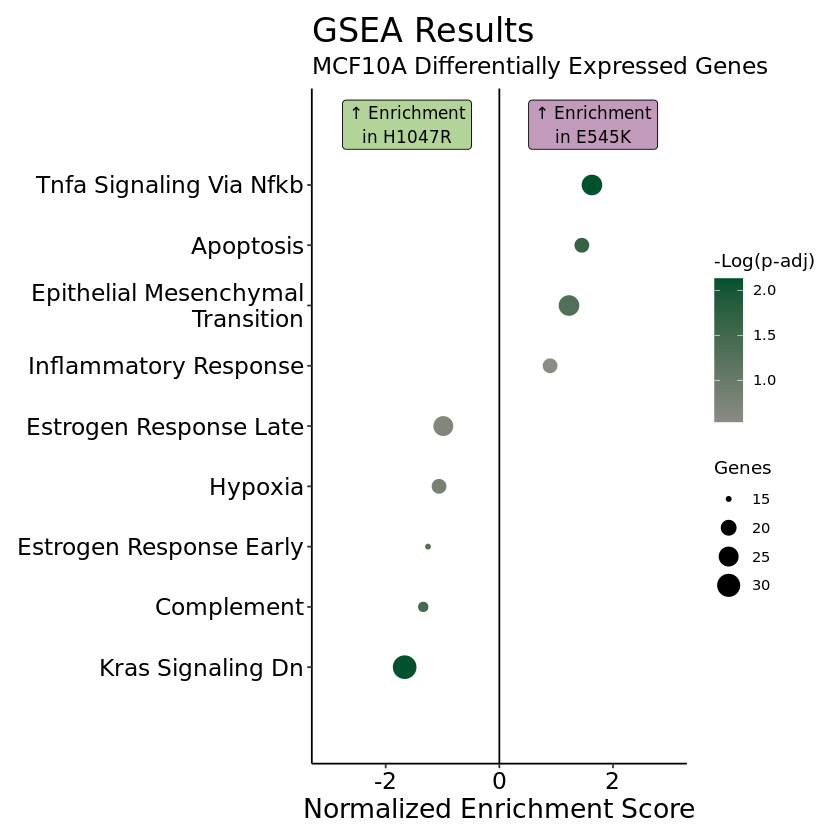

In [29]:
forestp <- fgseaRes_df_arrange %>% 
    filter(!pathway == c("HALLMARK_G2M_CHECKPOINT",
                         "HALLMARK_E2F_TARGETS")) %>%
    filter(!pathway == c("HALLMARK_MYOGENESIS")) %>%
    filter(!pathway == c("HALLMARK_MITOTIC_SPINDLE")) %>%
    filter(!pathway == c("HALLMARK_KRAS_SIGNALING_UP")) %>%
    filter(!pathway == c("HALLMARK_KRAS_SIGNALING_UP")) %>%
    ggplot(aes(x = NES, y = reorder(clean_names, NES))) +
    coord_cartesian(xlim = c(-3, 3),
                    ylim = c(0,10)) + geom_vline(xintercept = 0) +
    scale_color_gradient(low = "ivory4", #mid = "#F60F66",
                         high = "#00522F") +
#     annotate("rect", xmin = 0, ymin = -Inf, ymax = Inf, xmax = Inf, 
#                   fill = "#C29ABB", alpha = 0.5) +
#     annotate("rect", xmin = 0, ymin = -Inf, ymax = Inf, xmax = -Inf, 
#                   fill = "#B2D498", alpha = 0.5) +
    ylab(label = NULL) + xlab(label = "Normalized Enrichment Score") +
    geom_point(aes(color = -log(padj), size = size)) +
    ggtitle(label = "GSEA Results", subtitle = "MCF10A Differentially Expressed Genes") +
    annotate("label", x = 1.65, y = 10, label = "\U2191 Enrichment\nin E545K",
             size = 3.55, family = "Arial", color = "black", fill = "#C29ABB") +
    annotate("label", x = -1.625, y = 10, label = "\U2191 Enrichment\nin H1047R",
             size = 3.55, family = "Arial", color = "black", fill = "#B2D498") +
    labs(size = "Genes", color = "-Log(p-adj)") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
forestp

In [30]:
fgseaRes_df_arrange

pathway                                    pval         padj        
1  HALLMARK_KRAS_SIGNALING_DN                 3.826711e-02 1.185529e-01
2  HALLMARK_COMPLEMENT                        1.478873e-01 2.300469e-01
3  HALLMARK_ESTROGEN_RESPONSE_EARLY           2.027972e-01 2.725740e-01
4  HALLMARK_HYPOXIA                           3.770883e-01 4.399364e-01
5  HALLMARK_ESTROGEN_RESPONSE_LATE            4.830097e-01 5.201643e-01
6  HALLMARK_INFLAMMATORY_RESPONSE             5.849057e-01 5.849057e-01
7  HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION 2.141653e-01 2.725740e-01
8  HALLMARK_KRAS_SIGNALING_UP                 1.036184e-01 1.831046e-01
9  HALLMARK_APOPTOSIS                         1.046312e-01 1.831046e-01
10 HALLMARK_MYOGENESIS                        9.548611e-02 1.831046e-01
11 HALLMARK_TNFA_SIGNALING_VIA_NFKB           4.234031e-02 1.185529e-01
12 HALLMARK_MITOTIC_SPINDLE                   1.541339e-05 7.192915e-05
13 HALLMARK_G2M_CHECKPOINT                    4.281584e-07 2.997109e-06
14 HALLMARK_E2F_TARGETS                       2.293281e-07 2.997109e-06
   log2err    ES         NES        size
1  0.32177592 -0.3112701 -1.6662691 31  
2  0.17669427 -0.3227555 -1.3393422 16  
3  0.14826150 -0.3074792 -1.2554373 15  
4  0.10552094 -0.2376856 -1.0608377 19  
5  0.09167952 -0.1979199 -0.9862912 25  
6  0.06350080  0.2219659  0.8931307 19  
7  0.11988785  0.2709723  1.2256416 26  
8  0.17669427  0.2996412  1.4279019 30  
9  0.17978232  0.3607927  1.4517323 19  
10 0.19002331  0.3895230  1.4765916 16  
11 0.32177592  0.3603091  1.6297231 26  
12 0.57561026  0.5737613  2.5245496 24  
13 0.67496286  0.5496879  2.8262410 36  
14 0.69013246  0.5574101  2.8956836 37  
   leadingEdge                                                                                                                                                                                                                                                                                                                             
1  KLK7    , CALML5  , KLK8    , KRT4    , SERPINB2, CLDN8   , EDN2    , KRT13   , RGS11   , SELENOP                                                                                                                                                                                                                                       
2  S100A9  , CFB     , SERPINB2, CD36    , C3      , MMP13                                                                                                                                                                                                                                                                                 
3  OLFML3 , KLK10  , SULT2B1, KRT13                                                                                                                                                                                                                                                                                                        
4  BGN     , SULT2B1 , EDN2    , SELENBP1, VLDLR   , ADM     , DDIT4   , STC1    , PKP1                                                                                                                                                                                                                                                    
5  CXCL14 , KLK10  , S100A9 , SULT2B1, KRT13                                                                                                                                                                                                                                                                                               
6  CD40  , CD70  , IL1B  , EREG  , PTGER4, SELL                                                                                                                                                                                                                                                                             

In [ ]:
TCGA_fgsea_res

In [ ]:
TCGA_fgsea_res$clean_names <- gsub(TCGA_fgsea_res$pathway, pattern = "HALLMARK_",
                                         replacement = "") %>%
                              gsub(pattern = "_", replacement = " ") %>% 
                              str_to_sentence()
TCGA_fgsea_res$clean_names

In [ ]:
fgseaRes_df_arrange

In [ ]:
TCGA_fgsea_res

In [ ]:
forestp2 <- TCGA_fgsea_res %>% 
    filter(pathway %in% fgseaRes_df_arrange$pathway) %>% 
    filter(!pathway == c("HALLMARK_G2M_CHECKPOINT")) %>%
    filter(!pathway == c("HALLMARK_E2F_TARGETS")) %>%
    filter(!pathway == c("HALLMARK_MYOGENESIS")) %>%
    filter(!pathway == c("HALLMARK_KRAS_SIGNALING_UP")) %>%
    filter(!pathway == c("HALLMARK_MITOTIC_SPINDLE")) %>%
    ggplot( aes(x = NES, y = reorder(clean_names, NES))) +
    coord_cartesian(xlim = c(-3, 3),
                    ylim = c(0,10)) + geom_vline(xintercept = 0) +
    scale_color_gradient(low = "ivory4", #mid = "#F60F66",
                         high = "#00522F") +
#     annotate("rect", xmin = 0, ymin = -Inf, ymax = Inf, xmax = Inf, 
#                   fill = "#C29ABB", alpha = 0.5) +
#     annotate("rect", xmin = 0, ymin = -Inf, ymax = Inf, xmax = -Inf, 
#                   fill = "#B2D498", alpha = 0.5) +
    ylab(label = NULL) + xlab(label = "Normalized Enrichment Score") +
    geom_point(aes(color = -log(padj), size = size)) +
    ggtitle(label = "GSEA Results", subtitle = "TCGA") +
    annotate("label", x = 1.65, y = 10, label = "\U2191 Enrichment\nin E545K",
             size = 3.55, family = "Arial", color = "black", fill = "#C29ABB") +
    annotate("label", x = -1.625, y = 10, label = "\U2191 Enrichment\nin H1047R",
             size = 3.55, family = "Arial", color = "black", fill = "#B2D498") +
    labs(size = "Genes", color = "-Log(p-adj)") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
forestp2

In [ ]:
ggsave(filename="/data/park_lab/adam/figures/10AGSEA_forest_8-4.pdf", 
       plot = forestp, device = cairo_pdf, width = 8, height = 8)
ggsave(filename="/data/park_lab/adam/figures/TCGAGSEA_forest_8-4.pdf", 
       plot = forestp2, device = cairo_pdf, width = 8, height = 8)

In [ ]:
ggsave(filename="/data/park_lab/adam/figures/GSEA_forestrecolor_5-5.pdf", 
       plot = forestp, device = cairo_pdf, width = 8, height = 8)

In [ ]:
MCF10A_EMT_wave <- plotEnrichment(pathwaysH$HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,
               named_num_ranks) + labs(title = "Epithelial Mesenchymal Transition", 
                                       subtitle = "MCF10A Differentially Expressed Genes") +
    xlab("Gene Rank") + ylab("Enrichment Score") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 18),
                          axis.text = element_text(size = 18, colour = "black"),
                          plot.title = element_text(size = 22),
                          plot.subtitle = element_text(size = 20),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
MCF10A_EMT_wave

In [ ]:
MCF10A_Estro_wave <- plotEnrichment(c(pathwaysH$HALLMARK_ESTROGEN_RESPONSE_LATE, 
                 pathwaysH$HALLMARK_ESTROGEN_RESPONSE_EARLY),
               named_num_ranks) + labs(title = "Estrogen Response", 
                                       subtitle = "MCF10A Differentially Expressed Genes") +
                    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10)) 
MCF10A_Estro_wave

In [ ]:
        MCF10A_Kras_wave <- plotEnrichment(c( 
                 pathwaysH$HALLMARK_KRAS_SIGNALING_DN),
               named_num_ranks) + labs(title = "K-ras Signaling Down", 
                                       subtitle = "MCF10A Differentially Expressed Genes") +
     xlab("Gene Rank") + ylab("Enrichment Score") +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 18),
                          axis.text = element_text(size = 18, colour = "black"),
                          plot.title = element_text(size = 22),
                          plot.subtitle = element_text(size = 20),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
MCF10A_Kras_wave

In [ ]:
MCF10A_E2F_wave <- plotEnrichment(c( 
                 pathwaysH$HALLMARK_E2F_TARGETS),
               named_num_ranks) + labs(title = "E2F Targets", 
                                       subtitle = "MCF10A Differentially Expressed Genes") +
                    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10)) 
MCF10A_E2F_wave

In [ ]:
ggsave(filename="/data/park_lab/adam/figures/MCF10A_EMT_wave5-16.pdf", 
       plot = MCF10A_EMT_wave, device = cairo_pdf, width = 8, height = 8)

In [ ]:
ggsave(filename="/data/park_lab/adam/figures/MCF10A_Estro_wave5-15.pdf", 
       plot = MCF10A_Estro_wave, device = cairo_pdf, width = 8, height = 8)

In [ ]:
ggsave(filename = "/data/park_lab/adam/figures/MCF10A_Kras_wave5-16.pdf",
       plot = MCF10A_Kras_wave, device = cairo_pdf, width = 8, 
       height = 8)

### Combine Waves TCGA and my data

In [ ]:
TCGA_numranks <- readRDS("/gpfs52/data/park_lab/adam/notebooks/TCGA_numRanks.rds")
TCGA_numranks

In [ ]:
TCGA_EMT_wave <- plotEnrichment(pathwaysH$HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,
               TCGA_numranks) + labs(title = "",
                                            subtitle = "TCGA-BRCA") +
     xlab("Gene Rank") + ylab(NULL) +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 18),
                          axis.text = element_text(size = 18, colour = "black"),
                          plot.title = element_text(size = 22),
                          plot.subtitle = element_text(size = 20),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
TCGA_EMT_wave

In [ ]:
TCGA_Kras_wave <- plotEnrichment(pathwaysH$HALLMARK_KRAS_SIGNALING_DN,
               TCGA_numranks) + labs(title = "",
                                            subtitle = "TCGA-BRCA") +
     xlab("Gene Rank") + ylab(NULL) +
    theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title = element_text(size = 18),
                          axis.text = element_text(size = 18, colour = "black"),
                          plot.title = element_text(size = 22),
                          plot.subtitle = element_text(size = 20),
                          strip.text = element_text(size = 12),
#                           legend.position = "none",
#                           legend.text = element_text(size = 12),
#                           legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
TCGA_Kras_wave

In [ ]:
MCF10A_EMT_wave

In [ ]:
MCF10A_Kras_wave

In [ ]:
library(ggpubr)
library(tidyverse)
library(extrafont)

In [ ]:
extrafont::loadfonts()

In [ ]:
EMT_comb <- ggarrange(MCF10A_EMT_wave, TCGA_EMT_wave, 
          ncol =2, nrow = 1, widths = c(8, 8), heights=c(8))
EMT_comb

In [ ]:
ggsave(filename = "/data/park_lab/adam/figures/EMTwavecomb5-17.pdf",
       plot = EMT_comb, device = cairo_pdf, width = 16, height = 8)

In [ ]:
Kras_comb <- ggarrange(MCF10A_Kras_wave, TCGA_Kras_wave, 
          ncol =2, nrow = 1, widths = c(8, 8), heights=c(8))
Kras_comb

In [ ]:
ggsave(filename = "/data/park_lab/adam/figures/Kraswavecomb5-17.pdf",
       plot = Kras_comb, device = cairo_pdf, width = 16, height = 8)

In [ ]:
BigPlotting_df %>% ggplot() +
    geom_point(aes(x = Genotype, y = as.factor(pathway),
                     size = count(as.factor(pathway)))
               )

In [ ]:
pdf(file = "/data/park_lab/adam/figures/test_2B.pdf", width = 24, height = 24)
p
dev.off()

## Overlap the TCGA diff exp and MCF10A diff exp

In [ ]:
str(MCF10A_ex9vex20_resSig_padj)

In [ ]:
TCGA_diffexp <- readRDS(file = "/gpfs52/data/park_lab/adam/notebooks/TCGA_diffexp_genes.rds")
str(TCGA_diffexp)

In [ ]:
TCGA_diffexp$names <- rownames(TCGA_diffexp)
str(TCGA_diffexp)

In [ ]:
library(ggvenn)

In [ ]:
vectors <- list("TCGA" = TCGA_diffexp$names %>% tools::file_path_sans_ext(), 
                "MCF10A" = MCF10A_ex9vex20_resSig_padj$rowname %>% tools::file_path_sans_ext())
ggvenn(vectors, c("TCGA", "MCF10A")) 

## Volcano

In [ ]:
MCF10A_ex9vex20_res

In [ ]:
MCF10A_ex9vex20_res_df <- as.data.frame(MCF10A_ex9vex20_res)

In [ ]:
head(MCF10A_ex9vex20_res_df)

In [ ]:
ens.str <- substr(rownames(MCF10A_ex9vex20_res_df), 1, 15)
genes <- mapIds(org.Hs.eg.db,
                keys = ens.str,
                column = "SYMBOL",
                keytype = "ENSEMBL",
                multiVals= "first")
str(genes)
genes <- as.character(genes)
genes
MCF10A_ex9vex20_res_df$symbols <- genes
head(MCF10A_ex9vex20_res_df)

In [ ]:
MCF10A_ex9vex20_res_df %>% filter(symbols == "EPGN")

In [22]:
MCF10A_ex9vex20_res_df <- na.omit(MCF10A_ex9vex20_res_df)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'na.omit': object 'MCF10A_ex9vex20_res_df' not found


In [23]:
MCF10A_ex9vex20_res_df <- MCF10A_ex9vex20_res_df %>% 
        mutate(mycolor = ifelse(log2FoldChange < -1.5 | log2FoldChange > 1.5 & padj < 0.05, 
                                "hit", "not"))
MCF10A_ex9vex20_res_df[MCF10A_ex9vex20_res_df$symbols=="AREG", "mycolor"] <- "AREG"
head(MCF10A_ex9vex20_res_df)

ERROR: Error in mutate(., mycolor = ifelse(log2FoldChange < -1.5 | log2FoldChange > : object 'MCF10A_ex9vex20_res_df' not found


In [24]:
summary(-log10(MCF10A_ex9vex20_res_df$padj))

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'summary': object 'MCF10A_ex9vex20_res_df' not found


In [25]:
points2label <- MCF10A_ex9vex20_res_df %>%
                dplyr::filter(symbols %in% c("AREG"))
points2label

ERROR: Error in dplyr::filter(., symbols %in% c("AREG")): object 'MCF10A_ex9vex20_res_df' not found


In [26]:
more_labels <- MCF10A_ex9vex20_res_df %>% 
            filter(!padj == 0) %>% 
            filter(!log2FoldChange > 10) %>%
            top_n(5, abs(log2FoldChange))
more_labels2 <- MCF10A_ex9vex20_res_df %>% 
            filter(!padj == 0) %>%
            top_n(-5, abs(padj))
points2label <- rbind(points2label, more_labels, more_labels2)
points2label

ERROR: Error in filter(., !padj == 0): object 'MCF10A_ex9vex20_res_df' not found


In [27]:
CRISPRscreenHits <- MCF10A_ex9vex20_res_df %>%
                dplyr::filter(symbols %in% c("AREG", "PPM1H", "NAT1",
                                             "ACSS1", "CXCL1"))
CRISPRscreenHits

ERROR: Error in dplyr::filter(., symbols %in% c("AREG", "PPM1H", "NAT1", "ACSS1", : object 'MCF10A_ex9vex20_res_df' not found


In [28]:
MCF10A_ex9vex20_res_df$coloring <- MCF10A_ex9vex20_res_df$mycolor
MCF10A_ex9vex20_res_df$coloring[MCF10A_ex9vex20_res_df$mycolor == "hit" & MCF10A_ex9vex20_res_df$log2FoldChange >0] <- "E545K"
MCF10A_ex9vex20_res_df$coloring[MCF10A_ex9vex20_res_df$mycolor == "hit" & MCF10A_ex9vex20_res_df$log2FoldChange <0] <- "H1047R"
MCF10A_ex9vex20_res_df$coloring

ERROR: Error in eval(expr, envir, enclos): object 'MCF10A_ex9vex20_res_df' not found


In [29]:
volcano <- MCF10A_ex9vex20_res_df %>% filter(-log10(padj) < 350) %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = symbols, fill = coloring)) +
  coord_cartesian(xlim = c(-10, 10), ylim = c(0,375), expand = FALSE) +
#   annotate("rect", xmin = 0, ymin = -Inf, ymax = Inf, xmax = Inf, 
#                   fill = "#C29ABB", alpha = 0.5) +
#   annotate("rect", xmin = 0, ymin = -Inf, ymax = Inf, xmax = -Inf, 
#                   fill = "#B2D498", alpha = 0.5) +
  annotate("label", x = 5, y = 350, label = "Increased Expression\n in E545K",
           family = "Arial", size = 6, fill = "#C29ABB") +
  annotate("label", x = -5, y = 350, label = "Increased Expression\n in H1047R",
           family = "Arial", size = 6, fill = "#B2D498") + 
  geom_point(shape = 21, color = "black", size =3) +
  geom_label_repel(data = points2label, colour = "black", fill = "white", size = 6,
                   family = "Arial", max.overlaps = Inf, box.padding = 0.5) +
  scale_fill_manual(values = c("red", "#C29ABB", "#B2D498", "grey")) +
  xlab("Log2 Fold Change") + ylab("-Log10 p-adjusted") +
  ggtitle(label = "MCF10A RNA-seq", subtitle = "Mutant to mutant comparison") +
  theme_classic() + theme(legend.position="none", 
                          text = element_text(family = "Arial"),
                          axis.title = element_text(size = 20),
                          axis.text = element_text(size = 18),
                          plot.title = element_text(size = 24),
                          plot.subtitle = element_text(size = 12),
                          plot.margin = margin(10, 10, 10, 10))
volcano

ERROR: Error in filter(., -log10(padj) < 350): object 'MCF10A_ex9vex20_res_df' not found


In [30]:
ggsave(filename="/data/park_lab/adam/figures/MCF10A_Volcanorecolor7-6.pdf", 
       plot = volcano, device = cairo_pdf, width = 8, height = 8)

ERROR: Error: $ operator is invalid for atomic vectors


In [31]:
# pdf(file = "/data/park_lab/adam/figures/MCF10A_Volcano1A_2-14.pdf", 
#     width = 8, height = 8)
# volcano
# dev.off()
ggsave(filename="/data/park_lab/adam/figures/MCF10A_Volcano1A_2-20.eps", 
       plot = volcano, device = cairo_ps, width = 8, height = 8)

ERROR: Error: $ operator is invalid for atomic vectors


In [32]:
volcanohits <- MCF10A_ex9vex20_res_df %>%
  ggplot(aes(x = log2FoldChange, y = -log10(padj), label = symbols, color = mycolor)) +
  xlim(-10, 10) + ylim(0,350) +
  annotate("rect", xmin = 0, ymin = 0, ymax = Inf, xmax = 10, 
                  fill = "#8B1B00", alpha = 0.5) +
  annotate("rect", xmin = 0, ymin = 0, ymax = Inf, xmax = -10, 
                  fill = "#5EC2C0", alpha = 0.5) +
  annotate("label", x = 5, y = 325, label = "Increased Expression\n in E545K") +
  annotate("label", x = -5, y = 325, label = "Increased Expression\n in H1047R") +
  geom_point() +
  geom_label_repel(data = CRISPRscreenHits, colour = "black",
                   min.segment.length = 0, seed = 42, box.padding = 0.5,
                   segment.color = "red") +
  scale_color_manual(values = c("#00522F", "#E6F4F1")) +
  theme(legend.position="none") +
  ggtitle(label = "MCF10A RNA-seq", subtitle = expression(italic(PIK3CA)~"Mutant Comparison"))
volcanohits

ERROR: Error in ggplot(., aes(x = log2FoldChange, y = -log10(padj), label = symbols, : object 'MCF10A_ex9vex20_res_df' not found


In [ ]:
pdf(file = "/data/park_lab/adam/figures/MCF10A_VolcanoCRISPR.pdf", width = 8, height = 10)
volcanohits
dev.off()

In [27]:
pdf(file = "/data/park_lab/adam/figures/MCF10A_Volcano2A.pdf", width = 8, height = 10)
volcano
dev.off()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


png 
  2

## Heatmap

In [35]:
MCF10A_dds <- DESeq(MCF10A_dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [36]:
MCF10A_normCounts <- counts(MCF10A_dds, normalized = TRUE)
MCF10A_normCounts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5    2.506292          3.305122          0.000000       
ENSG00000227232.5  149.124398        178.476599        159.888504       
ENSG00000278267.1   36.341240         56.187077         42.636934       
ENSG00000243485.5    5.012585          0.000000          0.000000       
ENSG00000284332.1    0.000000          0.000000          0.000000       
ENSG00000237613.2    0.000000          0.000000          0.000000       
ENSG00000268020.3    0.000000          0.000000          0.000000       
ENSG00000240361.2    0.000000          0.000000          0.000000       
ENSG00000186092.6    0.000000          0.000000          0.000000       
ENSG00000238009.6   42.606971         47.924272         35.530779       
ENSG00000239945.1    0.000000          0.000000          0.000000       
ENSG00000233750.3   96.492258        105.763910         78.167713       
ENSG00000268903.1  347.121499        368.521125        351.754709       
ENSG00000269981.1  328.324306        304.071242        364.190482       
ENSG00000239906.1    6.265731         13.220489         17.765389       
ENSG00000241860.7  117.795743         67.755005        124.357725       
ENSG00000222623.1    0.000000          1.652561          0.000000       
ENSG00000241599.1    0.000000          0.000000          0.000000       
ENSG00000279928.2   12.531462         16.525611         15.988850       
ENSG00000279457.4  280.704750        292.503315        284.246230       
ENSG00000273874.1    0.000000          3.305122          0.000000       
ENSG00000228463.10  82.707650         47.924272         39.083857       
ENSG00000286448.1   12.531462          3.305122         21.318467       
ENSG00000236679.2   13.784608         11.567928          7.106156       
ENSG00000236601.2    2.506292          3.305122          0.000000       
ENSG00000237094.12 250.629241        257.799532        218.514289       
ENSG00000269732.1    0.000000          0.000000          0.000000       
ENSG00000284733.1    0.000000          0.000000          0.000000       
ENSG00000233653.3    0.000000          0.000000          0.000000       
ENSG00000250575.1   12.531462          0.000000          0.000000       
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000210107.1     285.7173          325.5545          321.5535      
ENSG00000210112.1     251.8824          216.4855          289.5758      
ENSG00000198763.3   27401.2949        26574.8350        26909.2352      
ENSG00000210117.1     238.0978          285.8931          341.0955      
ENSG00000210127.1    2694.2643         2126.8461         2432.0818      
ENSG00000210135.1    9030.1716         8442.9347         9216.6840      
ENSG00000210140.1   14135.4892        14064.9475        15356.4026      
ENSG00000210144.1   12377.3251        12653.6603        13773.5064      
ENSG00000198804.2  675106.2018       656296.4626       666090.1786      
ENSG00000210151.2    4421.0998         3779.4072         3618.8098      
ENSG00000210154.1     433.5886          378.4365          415.7101      
ENSG00000198712.1  251735.7691       255436.3692       259179.2652      
ENSG00000210156.1     779.4569          755.2204          886.4929      
ENSG00000228253.1   17164.3436        16928.8359        18273.4795      
ENSG00000198899.2   97200.2854        96030.3255       102580.9112      
ENSG00000198938.2  217122.6177       222352.0960       227427.1848      
ENSG00000210164.1     865.9240         1003.1046          900.7052      
ENSG00000198840.2   13293.3749        13151.0812        14103.9426      
ENSG00000210174.1     749.3814          740.3474          721.2748      
ENSG00000212907.2   17035.2695        17555.1566        18014.1048      
ENSG00000198886.2  130656.7828       130927.4582       135530.3788      
ENSG00000210176.1    1036.3519          946.9175          969.9903      
ENSG00000210184.1    1205.5266         1155.1402         1119.2195      
ENSG

In [37]:
str(MCF10A_ex9vex20_resSig_padj)

'data.frame':	1271 obs. of  7 variables:
 $ rowname       : chr  "ENSG00000229344.1" "ENSG00000272141.1" "ENSG00000142609.18" "ENSG00000116254.18" ...
 $ baseMean      : num  25.3 57 37.3 26 28.5 ...
 $ log2FoldChange: num  1.57 -1.6 1.58 2.18 2.63 ...
 $ lfcSE         : num  0.431 0.366 0.396 0.6 0.479 ...
 $ stat          : num  3.63 -4.37 3.99 3.63 5.49 ...
 $ pvalue        : num  2.80e-04 1.22e-05 6.50e-05 2.83e-04 4.10e-08 ...
 $ padj          : num  6.42e-04 3.30e-05 1.62e-04 6.50e-04 1.42e-07 ...


In [38]:
MCF10A_normCounts_df <- as.data.frame(MCF10A_normCounts)
MCF10A_normCounts_df <- rownames_to_column(MCF10A_normCounts_df, var = "GeneID")
head(MCF10A_normCounts_df)

GeneID            MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
1 ENSG00000223972.5   2.506292          3.305122          0.00000        
2 ENSG00000227232.5 149.124398        178.476599        159.88850        
3 ENSG00000278267.1  36.341240         56.187077         42.63693        
4 ENSG00000243485.5   5.012585          0.000000          0.00000        
5 ENSG00000284332.1   0.000000          0.000000          0.00000        
6 ENSG00000237613.2   0.000000          0.000000          0.00000        
  MCF10A_parental_rep1 MCF10A_parental_rep2 MCF10A_parental_rep3
1   1.326588             0.00000              0.00000           
2 195.008508           190.54273            181.61583           
3  41.124243            60.36997             37.83663           
4   0.000000             0.00000              0.00000           
5   0.000000             0.00000              0.00000           
6   0.000000             0.00000              0.00000           
  MCF10A_H1047R_rep1 MCF10A_H1047R_rep2 MCF10A_H1047R_rep3
1   2.065385           0.3088647          1.01981         
2 246.297138         349.9437281        391.26702         
3  51.118274          51.8892730         69.68700         
4   3.098077           0.0000000          2.03962         
5   0.000000           0.0000000          0.00000         
6   0.000000           0.0000000          0.00000

In [39]:
MCF10A_normCounts_df_filt <- MCF10A_normCounts_df %>%
                          dplyr::filter(GeneID %in% MCF10A_ex9vex20_resSig_padj$rowname)
rownames(MCF10A_normCounts_df_filt) <- MCF10A_normCounts_df_filt[,1]
MCF10A_normCounts_df_filt <- MCF10A_normCounts_df_filt[,-1]
MCF10A_normCounts_df_filt

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000229344.1    40.10068          33.05122          42.636934      
ENSG00000272141.1    35.08809          21.48329          24.871545      
ENSG00000142609.18   48.87270          44.61915          26.648084      
ENSG00000116254.18   33.83495          59.49220          37.307318      
ENSG00000284716.1    66.41675          54.53452          85.273869      
ENSG00000284693.1    30.07551          36.35634           7.106156      
ENSG00000271989.1    50.12585          42.96659          35.530779      
ENSG00000204624.8    65.16360          66.10244          53.296168      
ENSG00000285833.1    17.54405          26.44098           8.882695      
ENSG00000272482.1   642.86400         690.77054         680.414412      
ENSG00000185519.9   635.34513         702.33847         756.805586      
ENSG00000236698.1    41.35382          47.92427          56.849246      
ENSG00000117115.13  129.07406         105.76391         127.910803      
ENSG00000142619.4   106.51743          76.01781          87.050408      
ENSG00000117148.8    52.63214          36.35634          42.636934      
ENSG00000188257.11   60.15102          49.57683          56.849246      
ENSG00000189410.12  268.17329         261.10465         250.491990      
ENSG00000187952.9    37.59439          23.13586          49.743090      
ENSG00000007968.7   324.56487         310.68149         300.235080      
ENSG00000179163.11  116.54260         104.11135          94.156564      
ENSG00000185436.12 1276.95598        1138.61460        1279.108033      
ENSG00000158008.10  125.31462         221.44319         103.039258      
ENSG00000181773.7    57.64473          56.18708          60.402324      
ENSG00000287510.1   169.17474         130.55233         111.921953      
ENSG00000134668.12  147.87125         156.99330         111.921953      
ENSG00000121904.17   37.59439          34.70378          28.424623      
ENSG00000092853.14 1057.65540        1090.69033         913.141012      
ENSG00000232335.1    81.45450          97.50110          69.285018      
ENSG00000171812.13   38.84753          59.49220          42.636934      
ENSG00000286379.1    61.40416          72.71269          63.955402      
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000232593.7    454.89207         563.523335        490.32475      
ENSG00000231340.1     73.93563         127.247205         65.73194      
ENSG00000231809.4     66.41675          69.407566         72.83810      
ENSG00000230039.1     25.06292           9.915367         10.65923      
ENSG00000213740.2     30.07551          19.830733         10.65923      
ENSG00000090889.12  1974.95842        1880.614532       2007.48900      
ENSG00000242732.4     82.70765          89.238299         90.60349      
ENSG00000270641.1  11282.07528       10503.678350      10591.72513      
ENSG00000277577.1    537.59972         517.251624        536.51476      
ENSG00000265727.2     30.07551          62.797322         49.74309      
ENSG00000237506.3     38.84753          23.135855         53.29617      
ENSG00000102359.7   3053.91730        2860.583264       2771.40074      
ENSG00000102384.13   624.06681         585.006629        625.34171      
ENSG00000184515.11   132.83350         145.425377        177.65389      
ENSG00000158164.7     25.06292          42.966589         28.42462      
ENSG00000286846.1     46.36641          38.008905         28.42462      
ENSG00000225031.1    115.28945          82.628055         94.15656      
ENSG00000182890.5    130.32721         135.510010         78.16771      
ENSG00000129675.16    42.60697          59.492200         58.62578      
ENSG00000101977.21  2679.22659        2958.084369       2599.07646      
ENSG00000011677.13    51.37899          56.187077         56.84925      
ENSG00000268089.3    106.51743         105.763910        103.03926      
ENSG00000182492.16    22.55663          46.271711         31.97770      
ENSG

In [40]:
MCF10A_normCounts_filt <- as.matrix(MCF10A_normCounts_df_filt)
MCF10A_normCounts_filt

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000229344.1    40.10068          33.05122          42.636934      
ENSG00000272141.1    35.08809          21.48329          24.871545      
ENSG00000142609.18   48.87270          44.61915          26.648084      
ENSG00000116254.18   33.83495          59.49220          37.307318      
ENSG00000284716.1    66.41675          54.53452          85.273869      
ENSG00000284693.1    30.07551          36.35634           7.106156      
ENSG00000271989.1    50.12585          42.96659          35.530779      
ENSG00000204624.8    65.16360          66.10244          53.296168      
ENSG00000285833.1    17.54405          26.44098           8.882695      
ENSG00000272482.1   642.86400         690.77054         680.414412      
ENSG00000185519.9   635.34513         702.33847         756.805586      
ENSG00000236698.1    41.35382          47.92427          56.849246      
ENSG00000117115.13  129.07406         105.76391         127.910803      
ENSG00000142619.4   106.51743          76.01781          87.050408      
ENSG00000117148.8    52.63214          36.35634          42.636934      
ENSG00000188257.11   60.15102          49.57683          56.849246      
ENSG00000189410.12  268.17329         261.10465         250.491990      
ENSG00000187952.9    37.59439          23.13586          49.743090      
ENSG00000007968.7   324.56487         310.68149         300.235080      
ENSG00000179163.11  116.54260         104.11135          94.156564      
ENSG00000185436.12 1276.95598        1138.61460        1279.108033      
ENSG00000158008.10  125.31462         221.44319         103.039258      
ENSG00000181773.7    57.64473          56.18708          60.402324      
ENSG00000287510.1   169.17474         130.55233         111.921953      
ENSG00000134668.12  147.87125         156.99330         111.921953      
ENSG00000121904.17   37.59439          34.70378          28.424623      
ENSG00000092853.14 1057.65540        1090.69033         913.141012      
ENSG00000232335.1    81.45450          97.50110          69.285018      
ENSG00000171812.13   38.84753          59.49220          42.636934      
ENSG00000286379.1    61.40416          72.71269          63.955402      
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000232593.7    454.89207         563.523335        490.32475      
ENSG00000231340.1     73.93563         127.247205         65.73194      
ENSG00000231809.4     66.41675          69.407566         72.83810      
ENSG00000230039.1     25.06292           9.915367         10.65923      
ENSG00000213740.2     30.07551          19.830733         10.65923      
ENSG00000090889.12  1974.95842        1880.614532       2007.48900      
ENSG00000242732.4     82.70765          89.238299         90.60349      
ENSG00000270641.1  11282.07528       10503.678350      10591.72513      
ENSG00000277577.1    537.59972         517.251624        536.51476      
ENSG00000265727.2     30.07551          62.797322         49.74309      
ENSG00000237506.3     38.84753          23.135855         53.29617      
ENSG00000102359.7   3053.91730        2860.583264       2771.40074      
ENSG00000102384.13   624.06681         585.006629        625.34171      
ENSG00000184515.11   132.83350         145.425377        177.65389      
ENSG00000158164.7     25.06292          42.966589         28.42462      
ENSG00000286846.1     46.36641          38.008905         28.42462      
ENSG00000225031.1    115.28945          82.628055         94.15656      
ENSG00000182890.5    130.32721         135.510010         78.16771      
ENSG00000129675.16    42.60697          59.492200         58.62578      
ENSG00000101977.21  2679.22659        2958.084369       2599.07646      
ENSG00000011677.13    51.37899          56.187077         56.84925      
ENSG00000268089.3    106.51743         105.763910        103.03926      
ENSG00000182492.16    22.55663          46.271711         31.97770      
ENSG

In [41]:
library(pheatmap)

In [42]:
colMeta_df <- data.frame(Genotype = c(rep("E545K", 3), rep("WT", 3), rep("H1047R", 3)),
                      stringsAsFactors = T, 
                      row.names = colnames(expression))
rownames(colMeta_df) <- colnames(MCF10A_normCounts_filt)
colMeta_df

Genotype
MCF10A_E545K_rep1    E545K   
MCF10A_E545K_rep2    E545K   
MCF10A_E545K_rep3    E545K   
MCF10A_parental_rep1 WT      
MCF10A_parental_rep2 WT      
MCF10A_parental_rep3 WT      
MCF10A_H1047R_rep1   H1047R  
MCF10A_H1047R_rep2   H1047R  
MCF10A_H1047R_rep3   H1047R

In [43]:
ann_colors = list(
  Genotype = c(E545K="#C29ABB", WT="#8CB3DF", H1047R = "#B2D498"))

In [44]:
MCF10A_normCounts_filt

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000229344.1    40.10068          33.05122          42.636934      
ENSG00000272141.1    35.08809          21.48329          24.871545      
ENSG00000142609.18   48.87270          44.61915          26.648084      
ENSG00000116254.18   33.83495          59.49220          37.307318      
ENSG00000284716.1    66.41675          54.53452          85.273869      
ENSG00000284693.1    30.07551          36.35634           7.106156      
ENSG00000271989.1    50.12585          42.96659          35.530779      
ENSG00000204624.8    65.16360          66.10244          53.296168      
ENSG00000285833.1    17.54405          26.44098           8.882695      
ENSG00000272482.1   642.86400         690.77054         680.414412      
ENSG00000185519.9   635.34513         702.33847         756.805586      
ENSG00000236698.1    41.35382          47.92427          56.849246      
ENSG00000117115.13  129.07406         105.76391         127.910803      
ENSG00000142619.4   106.51743          76.01781          87.050408      
ENSG00000117148.8    52.63214          36.35634          42.636934      
ENSG00000188257.11   60.15102          49.57683          56.849246      
ENSG00000189410.12  268.17329         261.10465         250.491990      
ENSG00000187952.9    37.59439          23.13586          49.743090      
ENSG00000007968.7   324.56487         310.68149         300.235080      
ENSG00000179163.11  116.54260         104.11135          94.156564      
ENSG00000185436.12 1276.95598        1138.61460        1279.108033      
ENSG00000158008.10  125.31462         221.44319         103.039258      
ENSG00000181773.7    57.64473          56.18708          60.402324      
ENSG00000287510.1   169.17474         130.55233         111.921953      
ENSG00000134668.12  147.87125         156.99330         111.921953      
ENSG00000121904.17   37.59439          34.70378          28.424623      
ENSG00000092853.14 1057.65540        1090.69033         913.141012      
ENSG00000232335.1    81.45450          97.50110          69.285018      
ENSG00000171812.13   38.84753          59.49220          42.636934      
ENSG00000286379.1    61.40416          72.71269          63.955402      
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000232593.7    454.89207         563.523335        490.32475      
ENSG00000231340.1     73.93563         127.247205         65.73194      
ENSG00000231809.4     66.41675          69.407566         72.83810      
ENSG00000230039.1     25.06292           9.915367         10.65923      
ENSG00000213740.2     30.07551          19.830733         10.65923      
ENSG00000090889.12  1974.95842        1880.614532       2007.48900      
ENSG00000242732.4     82.70765          89.238299         90.60349      
ENSG00000270641.1  11282.07528       10503.678350      10591.72513      
ENSG00000277577.1    537.59972         517.251624        536.51476      
ENSG00000265727.2     30.07551          62.797322         49.74309      
ENSG00000237506.3     38.84753          23.135855         53.29617      
ENSG00000102359.7   3053.91730        2860.583264       2771.40074      
ENSG00000102384.13   624.06681         585.006629        625.34171      
ENSG00000184515.11   132.83350         145.425377        177.65389      
ENSG00000158164.7     25.06292          42.966589         28.42462      
ENSG00000286846.1     46.36641          38.008905         28.42462      
ENSG00000225031.1    115.28945          82.628055         94.15656      
ENSG00000182890.5    130.32721         135.510010         78.16771      
ENSG00000129675.16    42.60697          59.492200         58.62578      
ENSG00000101977.21  2679.22659        2958.084369       2599.07646      
ENSG00000011677.13    51.37899          56.187077         56.84925      
ENSG00000268089.3    106.51743         105.763910        103.03926      
ENSG00000182492.16    22.55663          46.271711         31.97770      
ENSG

In [45]:
library(org.Hs.eg.db)
library(biomaRt)

In [46]:
gene_list <- rownames(MCF10A_normCounts_filt) %>% 
  tools::file_path_sans_ext()
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
G_list <- getBM(filters= "ensembl_gene_id",
                attributes= c("ensembl_gene_id","hgnc_symbol"),
                values=gene_list,mart= mart,
               useCache = FALSE)
G_list

ensembl_gene_id hgnc_symbol
1    ENSG00000002726 AOC1       
2    ENSG00000006377 DLX6       
3    ENSG00000006468 ETV1       
4    ENSG00000006534 ALDH3B1    
5    ENSG00000007237 GAS7       
6    ENSG00000007944 MYLIP      
7    ENSG00000007968 E2F2       
8    ENSG00000008118 CAMK1G     
9    ENSG00000010295 IFFO1      
10   ENSG00000011201 ANOS1      
11   ENSG00000011426 ANLN       
12   ENSG00000011677 GABRA3     
13   ENSG00000012171 SEMA3B     
14   ENSG00000016602 CLCA4      
15   ENSG00000018625 ATP1A2     
16   ENSG00000019169 MARCO      
17   ENSG00000023445 BIRC3      
18   ENSG00000024526 DEPDC1     
19   ENSG00000026025 VIM        
20   ENSG00000027869 SH2D2A     
21   ENSG00000035499 DEPDC1B    
22   ENSG00000038427 VCAN       
23   ENSG00000044524 EPHA3      
24   ENSG00000049089 COL9A2     
25   ENSG00000049192 ADAMTS6    
26   ENSG00000050438 SLC4A8     
27   ENSG00000050555 LAMC3      
28   ENSG00000051341 POLQ       
29   ENSG00000052802 MSMO1      
30   ENSG00000052850 ALX4       
⋮    ⋮               ⋮          
1234 ENSG00000286317            
1235 ENSG00000286337            
1236 ENSG00000286379            
1237 ENSG00000286480            
1238 ENSG00000286492            
1239 ENSG00000286522 H3C2       
1240 ENSG00000286670            
1241 ENSG00000286790            
1242 ENSG00000286846            
1243 ENSG00000286874            
1244 ENSG00000286901            
1245 ENSG00000286951            
1246 ENSG00000286955            
1247 ENSG00000287051            
1248 ENSG00000287074            
1249 ENSG00000287169            
1250 ENSG00000287195            
1251 ENSG00000287269            
1252 ENSG00000287277            
1253 ENSG00000287355            
1254 ENSG00000287510            
1255 ENSG00000287603            
1256 ENSG00000287656            
1257 ENSG00000287692            
1258 ENSG00000287733            
1259 ENSG00000287902            
1260 ENSG00000287908            
1261 ENSG00000288025            
1262 ENSG00000288076            
1263 ENSG00000288234

In [47]:
G_list_reordered <- G_list[match(gene_list, G_list$ensembl_gene_id), ] 
G_list_reordered

ensembl_gene_id hgnc_symbol
854  ENSG00000229344 MTCO2P12   
1123 ENSG00000272141            
355  ENSG00000142609 CFAP74     
192  ENSG00000116254 CHD5       
1208 ENSG00000284716            
1207 ENSG00000284693 LINC02606  
1122 ENSG00000271989            
767  ENSG00000204624 DISP3      
1219 ENSG00000285833            
1128 ENSG00000272482            
677  ENSG00000185519 FAM131C    
923  ENSG00000236698 EIF1AXP1   
196  ENSG00000117115 PADI2      
356  ENSG00000142619 PADI3      
197  ENSG00000117148 ACTL8      
706  ENSG00000188257 PLA2G2A    
716  ENSG00000189410 SH2D5      
702  ENSG00000187952 HS6ST1P1   
7    ENSG00000007968 E2F2       
631  ENSG00000179163 FUCA1      
673  ENSG00000185436 IFNLR1     
446  ENSG00000158008 EXTL1      
646  ENSG00000181773 GPR3       
1254 ENSG00000287510            
296  ENSG00000134668 SPOCD1     
221  ENSG00000121904 CSMD2      
84   ENSG00000092853 CLSPN      
881  ENSG00000232335            
579  ENSG00000171812 COL8A2     
1236 ENSG00000286379            
⋮    ⋮               ⋮          
885  ENSG00000232593 KANTR      
868  ENSG00000231340 ACTG1P10   
872  ENSG00000231809 NANOGP9    
857  ENSG00000230039 CCNYL5     
791  ENSG00000213740 SERBP1P1   
80   ENSG00000090889 KIF4A      
948  ENSG00000242732 RTL5       
1115 ENSG00000270641 TSIX       
1157 ENSG00000277577            
1088 ENSG00000265727 RN7SL648P  
929  ENSG00000237506 RPSAP15    
111  ENSG00000102359 SRPX2      
112  ENSG00000102384 CENPI      
667  ENSG00000184515 BEX5       
447  ENSG00000158164 TMSB15A    
1242 ENSG00000286846            
822  ENSG00000225031 EIF4BP7    
650  ENSG00000182890 GLUD2      
268  ENSG00000129675 ARHGEF6    
110  ENSG00000101977 MCF2       
12   ENSG00000011677 GABRA3     
1104 ENSG00000268089 GABRQ      
648  ENSG00000182492 BGN        
436  ENSG00000155962 CLIC2      
781  ENSG00000211459 MT-RNR1    
776  ENSG00000209082 MT-TL1     
777  ENSG00000210127 MT-TA      
778  ENSG00000210151 MT-TS1     
779  ENSG00000210154 MT-TD      
780  ENSG00000210195 MT-TT

In [48]:
MCF10A_normCounts_symbs <- MCF10A_normCounts_filt
rownames(MCF10A_normCounts_symbs) <- G_list_reordered$hgnc_symbol
MCF10A_normCounts_symbs

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
MTCO2P12    40.10068          33.05122          42.636934      
            35.08809          21.48329          24.871545      
CFAP74      48.87270          44.61915          26.648084      
CHD5        33.83495          59.49220          37.307318      
            66.41675          54.53452          85.273869      
LINC02606   30.07551          36.35634           7.106156      
            50.12585          42.96659          35.530779      
DISP3       65.16360          66.10244          53.296168      
            17.54405          26.44098           8.882695      
           642.86400         690.77054         680.414412      
FAM131C    635.34513         702.33847         756.805586      
EIF1AXP1    41.35382          47.92427          56.849246      
PADI2      129.07406         105.76391         127.910803      
PADI3      106.51743          76.01781          87.050408      
ACTL8       52.63214          36.35634          42.636934      
PLA2G2A     60.15102          49.57683          56.849246      
SH2D5      268.17329         261.10465         250.491990      
HS6ST1P1    37.59439          23.13586          49.743090      
E2F2       324.56487         310.68149         300.235080      
FUCA1      116.54260         104.11135          94.156564      
IFNLR1    1276.95598        1138.61460        1279.108033      
EXTL1      125.31462         221.44319         103.039258      
GPR3        57.64473          56.18708          60.402324      
           169.17474         130.55233         111.921953      
SPOCD1     147.87125         156.99330         111.921953      
CSMD2       37.59439          34.70378          28.424623      
CLSPN     1057.65540        1090.69033         913.141012      
            81.45450          97.50110          69.285018      
COL8A2      38.84753          59.49220          42.636934      
            61.40416          72.71269          63.955402      
⋮         ⋮                 ⋮                 ⋮                
KANTR       454.89207         563.523335        490.32475      
ACTG1P10     73.93563         127.247205         65.73194      
NANOGP9      66.41675          69.407566         72.83810      
CCNYL5       25.06292           9.915367         10.65923      
SERBP1P1     30.07551          19.830733         10.65923      
KIF4A      1974.95842        1880.614532       2007.48900      
RTL5         82.70765          89.238299         90.60349      
TSIX      11282.07528       10503.678350      10591.72513      
            537.59972         517.251624        536.51476      
RN7SL648P    30.07551          62.797322         49.74309      
RPSAP15      38.84753          23.135855         53.29617      
SRPX2      3053.91730        2860.583264       2771.40074      
CENPI       624.06681         585.006629        625.34171      
BEX5        132.83350         145.425377        177.65389      
TMSB15A      25.06292          42.966589         28.42462      
             46.36641          38.008905         28.42462      
EIF4BP7     115.28945          82.628055         94.15656      
GLUD2       130.32721         135.510010         78.16771      
ARHGEF6      42.60697          59.492200         58.62578      
MCF2       2679.22659        2958.084369       2599.07646      
GABRA3       51.37899          56.187077         56.84925      
GABRQ       106.51743         105.763910        103.03926      
BGN          22.55663          46.271711         31.97770      
CLIC2        61.40416          72.712688         42.63693      
MT-RNR1    4609.07174        7021.732113       4018.53107      
MT-TL1      944.87224         898.993238        840.30292      
MT-TA      2694.26434        2126.846135       2432.08180      
MT-TS1     4421.09981        3779.407235       3618.80981      
MT-TD       433.58859         378.436492        415.71011      
MT-TT      1087.73091        1064.249348       1122.77261      
          MCF10A_parental_rep1 MCF10A_pare

In [49]:
rownames(MCF10A_normCounts_symbs)

[1] "MTCO2P12"     ""             "CFAP74"       "CHD5"        
   [5] ""             "LINC02606"    ""             "DISP3"       
   [9] ""             ""             "FAM131C"      "EIF1AXP1"    
  [13] "PADI2"        "PADI3"        "ACTL8"        "PLA2G2A"     
  [17] "SH2D5"        "HS6ST1P1"     "E2F2"         "FUCA1"       
  [21] "IFNLR1"       "EXTL1"        "GPR3"         ""            
  [25] "SPOCD1"       "CSMD2"        "CLSPN"        ""            
  [29] "COL8A2"       ""             "COL9A2"       "EDN2"        
  [33] ""             "CDC20"        "KIF2C"        "DMBX1"       
  [37] "CYP4B1"       "CYP4X1"       "PDZK1IP1"     "LINC01389"   
  [41] "SKINT1L"      "SLC5A9"       "RAB3B"        "RPS13P2"     
  [45] ""             "KANK4"        "DLEU2L"       "DEPDC1"      
  [49] ""             "DEPDC1-AS1"   "LRRIQ3"       "MSH4"        
  [53] "ST6GALNAC3"   "TPI1P1"       ""             "IFI44L"      
  [57] "LPAR3"        "CLCA4"        "CLCA4-AS1"    "TGFBR3"      
  [61] "RPL7P9"       "MIR137HG"     "AMIGO1"       "DENND2D"     
  [65] "CHI3L2"       "OLFML3"       "PFN1P3"       "TXNIP"       
  [69] "NBPF10"       "PFN1P8"       "NBPF14"       "H3C13"       
  [73] "H4C14"        "H2BC19P"      "H2BC20P"      NA            
  [77] "SV2A"         "BNIPL"        "SELENBP1"     "RORC"        
  [81] "FLG-AS1"      "HRNR"         "FLG"          "KPRP"        
  [85] "SPRR1A"       "SPRR2D"       "PGLYRP3"      "PGLYRP4"     
  [89] "S100A9"       "S100A8"       "S100A3"       "NPR1"        
  [93] "SNORA58B"     "ATP8B2"       "FDPS"         "RUSC1-AS1"   
  [97] "IQGAP3"       "SH2D2A"       "CFAP45"       "SLAMF9"      
 [101] "ATP1A2"       "ITLN2"        "SPATA46"      "NUF2"        
 [105] "SELL"         "HMCN1"        "PTGS2"        ""            
 [109] "B3GALT2"      "KIF14"        "PKP1"         ""            
 [113] "COX7CP2"      "MIR29B2CHG"   ""             ""            
 [117] "CAMK1G"       "HSD11B1"      "NEK2"         "DTL"         
 [121] "ATF3"         "GARIN4"       "BATF3"        "KRT18P12"    
 [125] "CENPF"        "MTARC2"       "MTARC1"       ""            
 [129] "SUSD4"        "GJC2"         "LINC01348"    "NID1"        
 [133] "EXO1"         "RSAD2"        "RNF144A"      "RRM2"        
 [137] "GREB1"        "OSR1"         "MATN3"        "GDF7"        
 [141] "APOB"         "FAM166C"      ""             "CYP1B1"      
 [145] "RPLP0P6"      "SLC8A1"       ""             "CCDC85A"     
 [149] ""             "VDAC2P5"      "ADD2"         "VAX2"        
 [153] "ATP6V1B1"     "TCF7L1"       "ZNF892"       "KCNIP3"      
 [157] "NCAPH"        "IL1R1"        "IL1R1-AS1"    "BUB1"        
 [161] "NT5DC4"       "CKAP2L"       "IL1A"         "IL1B"        
 [165] ""             "MARCO"        "TMEM37"       "GLI2"        
 [169] "MYO7B"        ""             "POTEF"        "CCDC74B"     
 [173] "TUBA3E"       "CCDC74A"      ""             ""            
 [177] "LYPD6"        "RND3"         "GPD2"         "DAPL1"       
 [181] "TBR1"         "SLC38A11"     "SCN2A"        "NOSTRIN"     
 [185] "SPC25"        "DLX2"         ""             "LINC01934"   
 [189] ""             "STAT4-AS1"    "STAT4"        "HECW2"       
 [193] "PLCL1"        "SCYL2P1"      ""             "RPL12P16"    
 [197] "MAP2"         ""             "FN1"          "IGFBP2"      
 [201] "GPBAR1"       "CYP27A1"      "IHH"          NA            
 [205] "CT75"         ""             "SLC16A14"     "ALPG"        
 [209] "CHRND"        "KCNJ13"       "NGEF"         "HJURP"       
 [213] "COL6A3"       "KLHL30"       "MAB21L4"      "BHLHE40-AS1" 
 [217] "BHLHE40"      "FANCD2"       "FANCD2OS"     "CAND2"       
 [221] "PLCL2"        "KCNH8"        "THRB"         "MICOS10P3"   
 [225] "KLHL25P1"     "TRIM71"       "TCEA1P2"      "VILL"        
 [229] "ENTPD3"       "RPS27P4"      ""             ""            
 [233] "KIF15"        "TMIE"         "SEMA3B"       ""            
 [237] "POC1A"        "CACNA2D3-AS1" ""           

In [50]:
goi <- c("AREG", "EREG", "MAFB", "PADI3", "SOX18",
         "IL1A", "IL1R1", "FOSB", "CYP1B1", "E2F2", "PLA2G2A")

In [51]:
subset <- MCF10A_normCounts_symbs[rownames(MCF10A_normCounts_symbs) %in% 
                                  goi,
                                 ]
subset

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
PADI3      106.51743          76.01781          87.05041     
PLA2G2A     60.15102          49.57683          56.84925     
E2F2       324.56487         310.68149         300.23508     
CYP1B1    6662.97837        6402.02170        6660.24447     
IL1R1     3150.40956        3144.82377        3213.75893     
IL1A      9460.00070        9128.74751        8827.62197     
EREG        90.22653          69.40757          85.27387     
AREG      3203.04170        3391.05538        3402.07206     
FOSB    117199.24566      119344.65750      120047.84198     
MAFB      9413.63429        9376.63168       10001.91420     
SOX18       77.69506          95.84854         113.69849     
        MCF10A_parental_rep1 MCF10A_parental_rep2 MCF10A_parental_rep3
PADI3      42.45083             30.18499             41.62029         
PLA2G2A   163.17038            169.79055            174.04850         
E2F2      238.78593            186.76960            202.42597         
CYP1B1   6634.26904           6436.94836           6827.61995         
IL1R1    3376.16771           3656.15649           3393.94574         
IL1A     4705.40938           4639.05511           4886.60081         
EREG       76.94213            103.76089             96.48341         
AREG      374.09795            282.98425            227.01978         
FOSB    33654.22342          34342.96835          32408.96575         
MAFB     8182.39781           8349.92188           8517.02550         
SOX18     198.98827            177.33680            215.66879         
        MCF10A_H1047R_rep1 MCF10A_H1047R_rep2 MCF10A_H1047R_rep3
PADI3      33.04616           17.91415           36.713152      
PLA2G2A  2180.01366         1828.47914         1810.842248      
E2F2     1118.40587          944.50831          791.712333      
CYP1B1   1875.88575         2247.60857         1857.753499      
IL1R1   11923.98283        13683.32484        13592.364802      
IL1A     2064.86846         2553.07578         2142.280430      
EREG       11.35962           13.89891            6.118859      
AREG      564.88274          434.88153          400.785247      
FOSB    21133.01734        25735.84396        26153.361972      
MAFB    53927.19729        61733.71824        58631.584254      
SOX18      36.14423           36.44604           21.076069

In [52]:
rownames(MCF10A_normCounts_symbs)[!rownames(MCF10A_normCounts_symbs) %in% 
                                  goi] <- ""
MCF10A_normCounts_symbs

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
          40.10068          33.05122          42.636934      
          35.08809          21.48329          24.871545      
          48.87270          44.61915          26.648084      
          33.83495          59.49220          37.307318      
          66.41675          54.53452          85.273869      
          30.07551          36.35634           7.106156      
          50.12585          42.96659          35.530779      
          65.16360          66.10244          53.296168      
          17.54405          26.44098           8.882695      
         642.86400         690.77054         680.414412      
         635.34513         702.33847         756.805586      
          41.35382          47.92427          56.849246      
         129.07406         105.76391         127.910803      
PADI3    106.51743          76.01781          87.050408      
          52.63214          36.35634          42.636934      
PLA2G2A   60.15102          49.57683          56.849246      
         268.17329         261.10465         250.491990      
          37.59439          23.13586          49.743090      
E2F2     324.56487         310.68149         300.235080      
         116.54260         104.11135          94.156564      
        1276.95598        1138.61460        1279.108033      
         125.31462         221.44319         103.039258      
          57.64473          56.18708          60.402324      
         169.17474         130.55233         111.921953      
         147.87125         156.99330         111.921953      
          37.59439          34.70378          28.424623      
        1057.65540        1090.69033         913.141012      
          81.45450          97.50110          69.285018      
          38.84753          59.49220          42.636934      
          61.40416          72.71269          63.955402      
⋮       ⋮                 ⋮                 ⋮                
          454.89207         563.523335        490.32475      
           73.93563         127.247205         65.73194      
           66.41675          69.407566         72.83810      
           25.06292           9.915367         10.65923      
           30.07551          19.830733         10.65923      
         1974.95842        1880.614532       2007.48900      
           82.70765          89.238299         90.60349      
        11282.07528       10503.678350      10591.72513      
          537.59972         517.251624        536.51476      
           30.07551          62.797322         49.74309      
           38.84753          23.135855         53.29617      
         3053.91730        2860.583264       2771.40074      
          624.06681         585.006629        625.34171      
          132.83350         145.425377        177.65389      
           25.06292          42.966589         28.42462      
           46.36641          38.008905         28.42462      
          115.28945          82.628055         94.15656      
          130.32721         135.510010         78.16771      
           42.60697          59.492200         58.62578      
         2679.22659        2958.084369       2599.07646      
           51.37899          56.187077         56.84925      
          106.51743         105.763910        103.03926      
           22.55663          46.271711         31.97770      
           61.40416          72.712688         42.63693      
         4609.07174        7021.732113       4018.53107      
          944.87224         898.993238        840.30292      
         2694.26434        2126.846135       2432.08180      
         4421.09981        3779.407235       3618.80981      
          433.58859         378.436492        415.71011      
         1087.73091        1064.249348       1122.77261      
        MCF10A_parental_rep1 MCF10A_parental_rep2 MCF10A_parental_rep3
          23.878593            18.865617            30.269304         
          42.450832   

In [ ]:
p <- pheatmap(MCF10A_normCounts_symbs,
              clustering_distance_cols = "euclidean", 
              clustering_distance_rows = "euclidean", 
              annotation_col = colMeta_df,
              fontsize_number = 2, 
              scale = "row", 
              cutree_cols = 3,
              cluster_rows = TRUE,
              cutree_rows = 4,
              treeheight_row = 0,
              show_rownames = FALSE,
              show_colnames = FALSE,
              annotation_colors = ann_colors,
              annotation_names_col = FALSE,
#               legend_breaks = c(-2, -1, 0, 1, 2, 3),
#               legend_labels = c("-2", "-1", "0", "1", "2", "Scaled Normalized\nExpression\n"),
#               legend = TRUE,
#               main = "Scaled Normalized Counts\nDifferentially Expressed Genes",
              fontsize = 14
             )
p

In [67]:
MCF10A_normCounts_symbs.clust <- cbind(MCF10A_normCounts_symbs, 
                      cluster = cutree(p$tree_row, k= 4))
head(MCF10A_normCounts_symbs.clust)

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3 MCF10A_parental_rep1
 40.10068          33.05122          42.636934         23.87859            
 35.08809          21.48329          24.871545         42.45083            
 48.87270          44.61915          26.648084         55.71672            
 33.83495          59.49220          37.307318         14.59247            
 66.41675          54.53452          85.273869         13.26588            
 30.07551          36.35634           7.106156         34.49130            
 MCF10A_parental_rep2 MCF10A_parental_rep3 MCF10A_H1047R_rep1
 18.865617            30.26930              14.457694        
 64.143096            73.78143             100.171163        
 62.256535            56.75495              12.908655        
 32.071548            28.37747               2.065385        
  3.773123             0.00000              10.843270        
 22.638740            24.59381             116.694242        
 MCF10A_H1047R_rep2 MCF10A_H1047R_rep3 cluster
  14.20778           10.19810          1      
  64.86159           83.28447          2      
  10.81027           16.31696          3      
  11.11913           14.61727          1      
  10.19254           11.89778          1      
 151.65258          133.59508          2

In [75]:
cluster_df <- as.data.frame(MCF10A_normCounts_symbs.clust)
table(as.factor(cluster_df$cluster))


  1   2   3   4 
335 593 309  34 

In [61]:
pdf(file = "/data/park_lab/adam/figures/RNAseq_heatmap_9-20.pdf", width = 8, height = 8)
p
dev.off()

png 
  2

### Making a new WT comp Expression Figure

In [42]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("DESeq2")
setwd("/data/park_lab/adam/Total_RNA")
load("Total_RNA_env.RData")
ls()

Warning message:
“namespace ‘clusterProfiler’ is not available and has been replaced
by .GlobalEnv when processing object ‘.GOTERM_Env’”


[1] "all_diff_genes"                           
  [2] "AREG_exp"                                 
  [3] "AREG_exp_raw"                             
  [4] "cancer_coldata"                           
  [5] "cancer_counts"                            
  [6] "cancer_dds"                               
  [7] "cancer_dds_f"                             
  [8] "cancer_diff_genes"                        
  [9] "cancer_ex9vex20_over"                     
 [10] "cancer_ex9vex20_res"                      
 [11] "cancer_ex9vex20_resSig_padj"              
 [12] "cancer_ex9vex20_under"                    
 [13] "cancer_filt"                              
 [14] "cancer_genotype"                          
 [15] "cancer_norm_sigset"                       
 [16] "cancer_normalized_counts_f"               
 [17] "cancer_normalized_counts_f_nonames"       
 [18] "cancer_rlog"                              
 [19] "cancer_sampleDistMatrix"                  
 [20] "cancer_samples"                           
 [21] "cancer_vst"                               
 [22] "cancer_WTvex20_over"                      
 [23] "cancer_WTvex20_res"                       
 [24] "cancer_WTvex20_resSig_padj"               
 [25] "cancer_WTvex20_under"                     
 [26] "cancer_WTvex9_over"                       
 [27] "cancer_WTvex9_over_clean"                 
 [28] "cancer_WTvex9_over_symbols"               
 [29] "cancer_WTvex9_res"                        
 [30] "cancer_WTvex9_resSig_padj"                
 [31] "cancer_WTvex9_under"                      
 [32] "cancer_WTvex9_under_clean"                
 [33] "cancer_WTvex9_under_symbols"              
 [34] "cancerDists"                              
 [35] "cluster_df"                               
 [36] "cluster3"                                 
 [37] "cluster3_genes"                           
 [38] "cluster3_genes_clean"                     
 [39] "cluster3_GOBP"                            
 [40] "cluster9"                                 
 [41] "cluster9_genes"                           
 [42] "cluster9_genes_clean"                     
 [43] "cluster9_GOBP"                            
 [44] "clusters"                                 
 [45] "datares_HC"                               
 [46] "dds_LRT"                                  
 [47] "diff_ex9vex20"                            
 [48] "diff_ex9vex20_sig"                        
 [49] "diff_WTvex20"                             
 [50] "diff_WTvex20_sig"                         
 [51] "diff_WTvex9"                              
 [52] "diff_WTvex9_sig"                          
 [53] "E545K_expressed_E545K_interacting_overlap"
 [54] "E545K_expressed_interacting_overlap"      
 [55] "E545K_expressed_WT_interacting_overlap"   
 [56] "E545K_goi"                                
 [57] "E545K_unite_genelist"                     
 [58] "E545Kdiffgenesvolc"                       
 [59] "ens.str"                                  
 [60] "ens.str_ex9vex20"                         
 [61] "ens.str_WTvex20"                          
 [62] "ens.str_WTvex9"                           
 [63] "ETV5_exp"                                 
 [64] "ex9vex20_combined"                        
 [65] "ex9vex20_combined_GOBP"                   
 [66] "ex9vex20_combined_GOBP_nocan"             
 [67] "ex9vex20_combined_nocan"                  
 [68] "ex9vex20_genes_log2fc_1.5"                
 [69] "ex9vex20_genes_log2fc_1.5_entrez"         
 [70] "ex9vex20_genes_log2fc_1.5_entrez_df"      
 [71] "ex9vex20_genes_padj"                      
 [72] "ex9vex20_genes_padj_entrez"               
 [73] "ex9vex20_GOBP"                            
 [74] "ex9vex20_GOMF"                            
 [75] "ex9vex20_KEGG"                            
 [76] "ex9vex20_over_clean"                      
 [77] "ex9vex20_over_clean_nocan"                
 [78] "ex9vex20_over_common"                     
 [79] "ex9vex20_over_common_GOBP"                
 [80] "ex9vex20_over_common_GOBP_nocan"          
 [

In [8]:
MCF10A_dds <- DESeq(MCF10A_dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [9]:
MCF10A_normalized_counts <- counts(MCF10A_dds, normalized=TRUE) %>% as.data.frame()
MCF10A_normalized_counts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5    2.506292          3.305122          0.000000       
ENSG00000227232.5  149.124398        178.476599        159.888504       
ENSG00000278267.1   36.341240         56.187077         42.636934       
ENSG00000243485.5    5.012585          0.000000          0.000000       
ENSG00000284332.1    0.000000          0.000000          0.000000       
ENSG00000237613.2    0.000000          0.000000          0.000000       
ENSG00000268020.3    0.000000          0.000000          0.000000       
ENSG00000240361.2    0.000000          0.000000          0.000000       
ENSG00000186092.6    0.000000          0.000000          0.000000       
ENSG00000238009.6   42.606971         47.924272         35.530779       
ENSG00000239945.1    0.000000          0.000000          0.000000       
ENSG00000233750.3   96.492258        105.763910         78.167713       
ENSG00000268903.1  347.121499        368.521125        351.754709       
ENSG00000269981.1  328.324306        304.071242        364.190482       
ENSG00000239906.1    6.265731         13.220489         17.765389       
ENSG00000241860.7  117.795743         67.755005        124.357725       
ENSG00000222623.1    0.000000          1.652561          0.000000       
ENSG00000241599.1    0.000000          0.000000          0.000000       
ENSG00000279928.2   12.531462         16.525611         15.988850       
ENSG00000279457.4  280.704750        292.503315        284.246230       
ENSG00000273874.1    0.000000          3.305122          0.000000       
ENSG00000228463.10  82.707650         47.924272         39.083857       
ENSG00000286448.1   12.531462          3.305122         21.318467       
ENSG00000236679.2   13.784608         11.567928          7.106156       
ENSG00000236601.2    2.506292          3.305122          0.000000       
ENSG00000237094.12 250.629241        257.799532        218.514289       
ENSG00000269732.1    0.000000          0.000000          0.000000       
ENSG00000284733.1    0.000000          0.000000          0.000000       
ENSG00000233653.3    0.000000          0.000000          0.000000       
ENSG00000250575.1   12.531462          0.000000          0.000000       
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000210107.1     285.7173          325.5545          321.5535      
ENSG00000210112.1     251.8824          216.4855          289.5758      
ENSG00000198763.3   27401.2949        26574.8350        26909.2352      
ENSG00000210117.1     238.0978          285.8931          341.0955      
ENSG00000210127.1    2694.2643         2126.8461         2432.0818      
ENSG00000210135.1    9030.1716         8442.9347         9216.6840      
ENSG00000210140.1   14135.4892        14064.9475        15356.4026      
ENSG00000210144.1   12377.3251        12653.6603        13773.5064      
ENSG00000198804.2  675106.2018       656296.4626       666090.1786      
ENSG00000210151.2    4421.0998         3779.4072         3618.8098      
ENSG00000210154.1     433.5886          378.4365          415.7101      
ENSG00000198712.1  251735.7691       255436.3692       259179.2652      
ENSG00000210156.1     779.4569          755.2204          886.4929      
ENSG00000228253.1   17164.3436        16928.8359        18273.4795      
ENSG00000198899.2   97200.2854        96030.3255       102580.9112      
ENSG00000198938.2  217122.6177       222352.0960       227427.1848      
ENSG00000210164.1     865.9240         1003.1046          900.7052      
ENSG00000198840.2   13293.3749        13151.0812        14103.9426      
ENSG00000210174.1     749.3814          740.3474          721.2748      
ENSG00000212907.2   17035.2695        17555.1566        18014.1048      
ENSG00000198886.2  130656.7828       130927.4582       135530.3788      
ENSG00000210176.1    1036.3519          946.9175          969.9903      
ENSG00000210184.1    1205.5266         1155.1402         1119.2195      
ENSG

In [10]:
rownames(MCF10A_normalized_counts) <- rownames(MCF10A_normalized_counts) %>% 
                                    tools::file_path_sans_ext()
MCF10A_normalized_counts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972   2.506292          3.305122          0.000000       
ENSG00000227232 149.124398        178.476599        159.888504       
ENSG00000278267  36.341240         56.187077         42.636934       
ENSG00000243485   5.012585          0.000000          0.000000       
ENSG00000284332   0.000000          0.000000          0.000000       
ENSG00000237613   0.000000          0.000000          0.000000       
ENSG00000268020   0.000000          0.000000          0.000000       
ENSG00000240361   0.000000          0.000000          0.000000       
ENSG00000186092   0.000000          0.000000          0.000000       
ENSG00000238009  42.606971         47.924272         35.530779       
ENSG00000239945   0.000000          0.000000          0.000000       
ENSG00000233750  96.492258        105.763910         78.167713       
ENSG00000268903 347.121499        368.521125        351.754709       
ENSG00000269981 328.324306        304.071242        364.190482       
ENSG00000239906   6.265731         13.220489         17.765389       
ENSG00000241860 117.795743         67.755005        124.357725       
ENSG00000222623   0.000000          1.652561          0.000000       
ENSG00000241599   0.000000          0.000000          0.000000       
ENSG00000279928  12.531462         16.525611         15.988850       
ENSG00000279457 280.704750        292.503315        284.246230       
ENSG00000273874   0.000000          3.305122          0.000000       
ENSG00000228463  82.707650         47.924272         39.083857       
ENSG00000286448  12.531462          3.305122         21.318467       
ENSG00000236679  13.784608         11.567928          7.106156       
ENSG00000236601   2.506292          3.305122          0.000000       
ENSG00000237094 250.629241        257.799532        218.514289       
ENSG00000269732   0.000000          0.000000          0.000000       
ENSG00000284733   0.000000          0.000000          0.000000       
ENSG00000233653   0.000000          0.000000          0.000000       
ENSG00000250575  12.531462          0.000000          0.000000       
⋮               ⋮                 ⋮                 ⋮                
ENSG00000210107    285.7173          325.5545          321.5535      
ENSG00000210112    251.8824          216.4855          289.5758      
ENSG00000198763  27401.2949        26574.8350        26909.2352      
ENSG00000210117    238.0978          285.8931          341.0955      
ENSG00000210127   2694.2643         2126.8461         2432.0818      
ENSG00000210135   9030.1716         8442.9347         9216.6840      
ENSG00000210140  14135.4892        14064.9475        15356.4026      
ENSG00000210144  12377.3251        12653.6603        13773.5064      
ENSG00000198804 675106.2018       656296.4626       666090.1786      
ENSG00000210151   4421.0998         3779.4072         3618.8098      
ENSG00000210154    433.5886          378.4365          415.7101      
ENSG00000198712 251735.7691       255436.3692       259179.2652      
ENSG00000210156    779.4569          755.2204          886.4929      
ENSG00000228253  17164.3436        16928.8359        18273.4795      
ENSG00000198899  97200.2854        96030.3255       102580.9112      
ENSG00000198938 217122.6177       222352.0960       227427.1848      
ENSG00000210164    865.9240         1003.1046          900.7052      
ENSG00000198840  13293.3749        13151.0812        14103.9426      
ENSG00000210174    749.3814          740.3474          721.2748      
ENSG00000212907  17035.2695        17555.1566        18014.1048      
ENSG00000198886 130656.7828       130927.4582       135530.3788      
ENSG00000210176   1036.3519          946.9175          969.9903      
ENSG00000210184   1205.5266         1155.1402         1119.2195      
ENSG00000210191   1006.2764          945.2649          914.9176      
ENSG00000198786 105009.8925       103285.0687       105560.1670      
ENSG00000198695  13178.085

In [11]:
E545K_unite_genelist <- readRDS("/data/park_lab/adam/figures/E545K_unite_genelist.rds")
H1047R_unite_genelist <- readRDS("/data/park_lab/adam/figures/H1047R_unite_genelist.rds")

In [12]:
E545K_unite_genelist
H1047R_unite_genelist

rowname             log2FoldChange symbol_col padj         
ENSG00000117148 myRNA_MCF10A_WTvex9 -1.787999      ACTL8       1.558454e-02
ENSG00000223382 myRNA_MCF10A_WTvex9 -1.707627      LINC01778   4.648350e-03
ENSG00000092853 myRNA_MCF10A_WTvex9 -1.587697      CLSPN       6.545621e-24
ENSG00000171812 myRNA_MCF10A_WTvex9 -1.623644      COL8A2      6.340255e-03
ENSG00000222009 myRNA_MCF10A_WTvex9 -2.252911      BTBD19      9.996070e-33
ENSG00000186377 myRNA_MCF10A_WTvex9 -2.753097      CYP4X1      8.986998e-13
ENSG00000169213 myRNA_MCF10A_WTvex9 -3.163991      RAB3B       2.338030e-27
ENSG00000081985 myRNA_MCF10A_WTvex9 -1.701784      IL12RB2     7.348190e-05
ENSG00000171517 myRNA_MCF10A_WTvex9 -1.702782      LPAR3       4.435616e-38
ENSG00000159164 myRNA_MCF10A_WTvex9 -1.553554      SV2A        1.817036e-02
ENSG00000264553 myRNA_MCF10A_WTvex9 -2.308047      MIR4257     3.373744e-05
ENSG00000186226 myRNA_MCF10A_WTvex9 -1.797471      LCE1E       2.495099e-05
ENSG00000143515 myRNA_MCF10A_WTvex9 -2.423025      ATP8B2     4.291975e-169
ENSG00000073756 myRNA_MCF10A_WTvex9 -2.569965      PTGS2      3.686884e-113
ENSG00000233217 myRNA_MCF10A_WTvex9 -1.574625      MROH3P      4.166602e-05
ENSG00000008118 myRNA_MCF10A_WTvex9 -2.267186      CAMK1G      3.929154e-26
ENSG00000082497 myRNA_MCF10A_WTvex9 -2.655732      SERTAD4     5.349878e-25
ENSG00000162772 myRNA_MCF10A_WTvex9 -3.040104      ATF3        0.000000e+00
ENSG00000236824 myRNA_MCF10A_WTvex9 -1.504597      BCYRN1      5.987958e-11
ENSG00000135625 myRNA_MCF10A_WTvex9 -2.693250      EGR4       4.837924e-152
ENSG00000158050 myRNA_MCF10A_WTvex9 -1.521731      DUSP2       1.352987e-26
ENSG00000163072 myRNA_MCF10A_WTvex9 -2.102560      NOSTRIN     6.121814e-05
ENSG00000115232 myRNA_MCF10A_WTvex9 -1.721813      ITGA4      1.956050e-126
ENSG00000226124 myRNA_MCF10A_WTvex9 -2.250090      FTCDNL1     3.315517e-18
ENSG00000179921 myRNA_MCF10A_WTvex9 -2.014686      GPBAR1      2.008712e-05
ENSG00000135929 myRNA_MCF10A_WTvex9 -1.680204      CYP27A1     1.335645e-08
ENSG00000123977 myRNA_MCF10A_WTvex9 -1.927949      DAW1        5.810241e-12
ENSG00000163687 myRNA_MCF10A_WTvex9 -2.987791      DNASE1L3    3.616490e-07
ENSG00000170837 myRNA_MCF10A_WTvex9 -2.756381      GPR27       1.654179e-65
ENSG00000163710 myRNA_MCF10A_WTvex9 -2.158009      PCOLCE2     1.894995e-08
⋮               ⋮                   ⋮              ⋮          ⋮            
ENSG00000108846 myRNA_MCF10A_WTvex9 -1.716580      ABCC3      5.302598e-102
ENSG00000125398 myRNA_MCF10A_WTvex9 -2.140811      SOX9        0.000000e+00
ENSG00000141576 myRNA_MCF10A_WTvex9 -1.847331      RNF157      1.154469e-04
ENSG00000278261 myRNA_MCF10A_WTvex9 -1.560903      SNORD1A     3.647619e-02
ENSG00000267665 myRNA_MCF10A_WTvex9 -2.995267      LOC400622   1.038249e-04
ENSG00000171246 myRNA_MCF10A_WTvex9 -2.674608      NPTX1       3.176758e-06
ENSG00000101680 myRNA_MCF10A_WTvex9 -1.601613      LAMA1       7.326053e-63
ENSG00000168675 myRNA_MCF10A_WTvex9 -1.710267      LDLRAD4     1.466042e-06
ENSG00000197046 myRNA_MCF10A_WTvex9 -1.992120      SIGLEC15    1.481243e-03
ENSG00000119547 myRNA_MCF10A_WTvex9 -3.112256      ONECUT2     4.067459e-05
ENSG00000141682 myRNA_MCF10A_WTvex9 -1.621153      PMAIP1      4.784805e-56
ENSG00000105641 myRNA_MCF10A_WTvex9 -2.186773      SLC5A5      1.304260e-05
ENSG00000130518 myRNA_MCF10A_WTvex9 -2.527585      IQCN       7.545588e-116
ENSG00000130283 myRNA_MCF10A_WTvex9 -1.787389      GDF1        8.695519e-08
ENSG00000223802 myRNA_MCF10A_WTvex9 -2.009221      CERS1       1.575787e-13
ENSG00000160161 myRNA_MCF10A_WTvex9 -1.835185      CILP2       4.636936e-06
ENSG00000081665 myRNA_MCF10A_WTvex9 -3.180675      ZNF506      1.535458e-25
ENSG00000256771 myRNA_MCF10A_WTvex9 -4.830373      ZNF253      1.963912e-06
ENSG00000184635 myRNA_MCF10A_WTvex9 -4.769850      ZNF93       1.221631e-36
ENSG00000185869 myRNA_MCF10A_WTvex9 -2.085019      ZNF829      8.048347e-11
ENSG00000245680 myRNA_MCF10A_WTvex9 -2.578375      ZNF585B    9.

rowname              log2FoldChange symbol_col    
ENSG00000157873 myRNA_MCF10A_WTvex20 -1.942156      TNFRSF14      
ENSG00000236423 myRNA_MCF10A_WTvex20 -2.154102      LINC01134     
ENSG00000187017 myRNA_MCF10A_WTvex20 -2.088529      ESPN          
ENSG00000284693 myRNA_MCF10A_WTvex20 -2.299545      LINC02606     
ENSG00000239149 myRNA_MCF10A_WTvex20 -1.509310      SNORA59B      
ENSG00000117115 myRNA_MCF10A_WTvex20 -4.118926      PADI2         
ENSG00000204219 myRNA_MCF10A_WTvex20 -1.885079      TCEA3         
ENSG00000007968 myRNA_MCF10A_WTvex20 -2.189308      E2F2          
ENSG00000158055 myRNA_MCF10A_WTvex20 -2.452590      GRHL3         
ENSG00000158008 myRNA_MCF10A_WTvex20 -1.646768      EXTL1         
ENSG00000235358 myRNA_MCF10A_WTvex20 -1.754319      SCMH1-DT      
ENSG00000127129 myRNA_MCF10A_WTvex20 -2.600383      EDN2          
ENSG00000117461 myRNA_MCF10A_WTvex20 -1.507269      PIK3R3        
ENSG00000278139 myRNA_MCF10A_WTvex20 -1.640316      P3R3URF-PIK3R3
ENSG00000142973 myRNA_MCF10A_WTvex20 -5.341316      CYP4B1        
ENSG00000117834 myRNA_MCF10A_WTvex20 -1.510308      SLC5A9        
ENSG00000182183 myRNA_MCF10A_WTvex20 -1.963270      SHISAL2A      
ENSG00000185483 myRNA_MCF10A_WTvex20 -1.977428      ROR1          
ENSG00000137959 myRNA_MCF10A_WTvex20 -2.769622      IFI44L        
ENSG00000137970 myRNA_MCF10A_WTvex20 -1.731011      RPL7P9        
ENSG00000225206 myRNA_MCF10A_WTvex20 -2.715964      MIR137HG      
ENSG00000181754 myRNA_MCF10A_WTvex20 -3.031191      AMIGO1        
ENSG00000162777 myRNA_MCF10A_WTvex20 -1.895851      DENND2D       
ENSG00000064886 myRNA_MCF10A_WTvex20 -2.912024      CHI3L2        
ENSG00000116774 myRNA_MCF10A_WTvex20 -3.809164      OLFML3        
ENSG00000177551 myRNA_MCF10A_WTvex20 -1.758517      NHLH2         
ENSG00000183508 myRNA_MCF10A_WTvex20 -1.596338      TENT5C        
ENSG00000198483 myRNA_MCF10A_WTvex20 -1.667884      ANKRD35       
ENSG00000271425 myRNA_MCF10A_WTvex20 -1.964370      NBPF10        
ENSG00000270629 myRNA_MCF10A_WTvex20 -1.810722      NBPF14        
⋮               ⋮                    ⋮              ⋮             
ENSG00000124107 myRNA_MCF10A_WTvex20 -2.845753      SLPI          
ENSG00000101040 myRNA_MCF10A_WTvex20 -1.556288      ZMYND8        
ENSG00000182463 myRNA_MCF10A_WTvex20 -2.885977      TSHZ2         
ENSG00000087495 myRNA_MCF10A_WTvex20 -2.146199      PHACTR3       
ENSG00000156265 myRNA_MCF10A_WTvex20 -1.815825      MAP3K7CL      
ENSG00000160179 myRNA_MCF10A_WTvex20 -2.153622      ABCG1         
ENSG00000188660 myRNA_MCF10A_WTvex20 -1.574247      LINC00319     
ENSG00000183570 myRNA_MCF10A_WTvex20 -2.431243      PCBP3         
ENSG00000203280 myRNA_MCF10A_WTvex20 -1.503234      KIAA1671-AS1  
ENSG00000239282 myRNA_MCF10A_WTvex20 -1.887432      CASTOR1       
ENSG00000100100 myRNA_MCF10A_WTvex20 -1.603747      PIK3IP1       
ENSG00000128284 myRNA_MCF10A_WTvex20 -2.354405      APOL3         
ENSG00000221890 myRNA_MCF10A_WTvex20 -2.770140      NPTXR         
ENSG00000235568 myRNA_MCF10A_WTvex20 -2.095202      NFAM1         
ENSG00000184368 myRNA_MCF10A_WTvex20 -1.659935      MAP7D2        
ENSG00000232472 myRNA_MCF10A_WTvex20 -1.963752      EEF1B2P3      
ENSG00000189221 myRNA_MCF10A_WTvex20 -1.823671      MAOA          
ENSG00000196632 myRNA_MCF10A_WTvex20 -1.554090      WNK3          
ENSG00000227536 myRNA_MCF10A_WTvex20 -1.520302      SOCS5P4       
ENSG00000196338 myRNA_MCF10A_WTvex20 -1.536754      NLGN3         
ENSG00000242732 myRNA_MCF10A_WTvex20 -1.946796      RTL5          
ENSG00000265727 myRNA_MCF10A_WTvex20 -1.752816      RN7SL648P     
ENSG00000198932 myRNA_MCF10A_WTvex20 -1.604930      GPRASP1       
ENSG00000133135 myRNA_MCF10A_WTvex20 -1.651919      RNF128        
ENSG00000102243 myRNA_MCF10A_WTvex20 -2.066181      VGLL1         
ENSG00000203930 myRNA_MCF10A_WTvex20 -1.538351      LINC00632     
ENSG00000102287 myRNA_MCF10A_WTvex20 -1.711097      GABRE         
ENSG00000011677 myRNA_MCF10A_WTvex20 -2.872650      GABRA3     

In [13]:
MCF10A_normalized_counts$Ensembl <- rownames(MCF10A_normalized_counts)
MCF10A_normalized_counts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972   2.506292          3.305122          0.000000       
ENSG00000227232 149.124398        178.476599        159.888504       
ENSG00000278267  36.341240         56.187077         42.636934       
ENSG00000243485   5.012585          0.000000          0.000000       
ENSG00000284332   0.000000          0.000000          0.000000       
ENSG00000237613   0.000000          0.000000          0.000000       
ENSG00000268020   0.000000          0.000000          0.000000       
ENSG00000240361   0.000000          0.000000          0.000000       
ENSG00000186092   0.000000          0.000000          0.000000       
ENSG00000238009  42.606971         47.924272         35.530779       
ENSG00000239945   0.000000          0.000000          0.000000       
ENSG00000233750  96.492258        105.763910         78.167713       
ENSG00000268903 347.121499        368.521125        351.754709       
ENSG00000269981 328.324306        304.071242        364.190482       
ENSG00000239906   6.265731         13.220489         17.765389       
ENSG00000241860 117.795743         67.755005        124.357725       
ENSG00000222623   0.000000          1.652561          0.000000       
ENSG00000241599   0.000000          0.000000          0.000000       
ENSG00000279928  12.531462         16.525611         15.988850       
ENSG00000279457 280.704750        292.503315        284.246230       
ENSG00000273874   0.000000          3.305122          0.000000       
ENSG00000228463  82.707650         47.924272         39.083857       
ENSG00000286448  12.531462          3.305122         21.318467       
ENSG00000236679  13.784608         11.567928          7.106156       
ENSG00000236601   2.506292          3.305122          0.000000       
ENSG00000237094 250.629241        257.799532        218.514289       
ENSG00000269732   0.000000          0.000000          0.000000       
ENSG00000284733   0.000000          0.000000          0.000000       
ENSG00000233653   0.000000          0.000000          0.000000       
ENSG00000250575  12.531462          0.000000          0.000000       
⋮               ⋮                 ⋮                 ⋮                
ENSG00000210107    285.7173          325.5545          321.5535      
ENSG00000210112    251.8824          216.4855          289.5758      
ENSG00000198763  27401.2949        26574.8350        26909.2352      
ENSG00000210117    238.0978          285.8931          341.0955      
ENSG00000210127   2694.2643         2126.8461         2432.0818      
ENSG00000210135   9030.1716         8442.9347         9216.6840      
ENSG00000210140  14135.4892        14064.9475        15356.4026      
ENSG00000210144  12377.3251        12653.6603        13773.5064      
ENSG00000198804 675106.2018       656296.4626       666090.1786      
ENSG00000210151   4421.0998         3779.4072         3618.8098      
ENSG00000210154    433.5886          378.4365          415.7101      
ENSG00000198712 251735.7691       255436.3692       259179.2652      
ENSG00000210156    779.4569          755.2204          886.4929      
ENSG00000228253  17164.3436        16928.8359        18273.4795      
ENSG00000198899  97200.2854        96030.3255       102580.9112      
ENSG00000198938 217122.6177       222352.0960       227427.1848      
ENSG00000210164    865.9240         1003.1046          900.7052      
ENSG00000198840  13293.3749        13151.0812        14103.9426      
ENSG00000210174    749.3814          740.3474          721.2748      
ENSG00000212907  17035.2695        17555.1566        18014.1048      
ENSG00000198886 130656.7828       130927.4582       135530.3788      
ENSG00000210176   1036.3519          946.9175          969.9903      
ENSG00000210184   1205.5266         1155.1402         1119.2195      
ENSG00000210191   1006.2764          945.2649          914.9176      
ENSG00000198786 105009.8925       103285.0687       105560.1670      
ENSG00000198695  13178.085

In [14]:
E545K_goi <- MCF10A_normalized_counts %>% 
            filter(Ensembl %in% 
                   rownames(E545K_unite_genelist))
E545K_goi

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000117148    52.63214          36.35634          42.63693      
ENSG00000223382    36.34124          42.96659          49.74309      
ENSG00000092853  1057.65540        1090.69033         913.14101      
ENSG00000171812    38.84753          59.49220          42.63693      
ENSG00000222009   713.04019         860.98433         708.83903      
ENSG00000186377   213.03485         221.44319         216.73775      
ENSG00000169213   318.29914         277.63026         293.12892      
ENSG00000081985   126.56777          99.15367         138.57004      
ENSG00000171517  1560.16703        1612.89963        1906.22628      
ENSG00000159164    47.61956          66.10244          40.86040      
ENSG00000264553    65.16360          51.22939          47.96655      
ENSG00000186226   122.80833         140.46769         117.25157      
ENSG00000143515  2263.18205        2353.24701        2352.13755      
ENSG00000073756  2656.66995        2700.28484        2547.55683      
ENSG00000233217   102.75799         130.55233          79.94425      
ENSG00000008118   487.47387         502.37857         502.76052      
ENSG00000082497   318.29914         351.99551         380.17933      
ENSG00000162772 82354.26229       83715.44019       83776.24655      
ENSG00000236824   407.27252         439.58125         454.79397      
ENSG00000135625  3506.30308        3837.24687        3894.17334      
ENSG00000158050   634.09198         760.17811         742.59327      
ENSG00000163072    56.39158          59.49220          81.72079      
ENSG00000115232  4265.70968        4207.42056        4261.91690      
ENSG00000226124   286.97048         242.92648         270.03392      
ENSG00000179921    86.46709         122.28952         113.69849      
ENSG00000135929   154.13698         171.86635         163.44158      
ENSG00000123977   175.44047         203.26502         207.85506      
ENSG00000163687    75.18877          84.28062          69.28502      
ENSG00000170837   714.29334         713.90640         714.16865      
ENSG00000163710   110.27687         170.21379         145.67619      
⋮               ⋮                 ⋮                 ⋮                
ENSG00000108846   9496.34194        9664.17731        9428.09213     
ENSG00000125398  19586.67518       18966.44374       19557.91713     
ENSG00000141576     56.39158          72.71269          62.17886     
ENSG00000278261     45.11326          44.61915          83.49733     
ENSG00000267665     46.36641          38.00891          51.51963     
ENSG00000171246     72.68248         110.72159          67.50848     
ENSG00000101680   1551.39500        1631.07781        1540.25926     
ENSG00000168675    171.68103         135.51001         111.92195     
ENSG00000197046     47.61956          66.10244          35.53078     
ENSG00000119547     47.61956          33.05122          88.82695     
ENSG00000141682   1988.74303        2087.18467        2302.39446     
ENSG00000105641     48.87270         100.80623          63.95540     
ENSG00000130518   1661.67187        1675.69696        1554.47157     
ENSG00000130283    134.08664         147.07794         154.55889     
ENSG00000223802    174.18732         228.05343         211.40813     
ENSG00000160161     93.98597          79.32293          78.16771     
ENSG00000081665   1285.72801        1330.31169        1346.61651     
ENSG00000256771    367.17184         370.17369         486.77167     
ENSG00000184635    349.62779         378.43649         385.50895     
ENSG00000185869    230.57890         206.57014         174.10082     
ENSG00000245680   2938.62785        2872.15119        3032.55196     
ENSG00000125740 117199.24566      119344.65750      120047.84198     
ENSG00000268621   4676.74164        4713.10426        4572.81122     
ENSG00000221923    303.26138         390.00442         266.48084     
ENSG00000101280     35.08809          28.09354          35.53078     
ENSG00000131067    220.553

In [15]:
H1047R_goi <- MCF10A_normalized_counts %>% 
            filter(Ensembl %in% 
                   rownames(H1047R_unite_genelist))
H1047R_goi

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000157873   187.97193         158.645866        202.525439     
ENSG00000236423   169.17474         208.222699        184.760049     
ENSG00000187017  2451.15398        2566.427388       2789.166128     
ENSG00000284693    30.07551          36.356344          7.106156     
ENSG00000239149    25.06292          16.525611         30.201162     
ENSG00000117115   129.07406         105.763910        127.910803     
ENSG00000204219   274.43902         211.527821        245.162373     
ENSG00000007968   324.56487         310.681487        300.235080     
ENSG00000158055  1057.65540        1275.777169       1211.599553     
ENSG00000158008   125.31462         221.443187        103.039258     
ENSG00000235358    41.35382          89.238299         71.061557     
ENSG00000127129   283.21104         257.799532        234.503139     
ENSG00000117461 13179.33864       12964.341827      13071.773482     
ENSG00000278139  4641.65354        4509.839241       4613.671614     
ENSG00000142973   428.57600         451.149180        371.296637     
ENSG00000117834    35.08809           9.915367         28.424623     
ENSG00000182183    93.98597          67.755005         87.050408     
ENSG00000185483  2785.74401        2662.275932       2710.998414     
ENSG00000137959   424.81656         456.106864        529.408603     
ENSG00000137970   355.89352         327.207098        348.201631     
ENSG00000225206    30.07551          21.483294         39.083857     
ENSG00000181754    36.34124          46.271711         49.743090     
ENSG00000162777   854.64571         920.476533        930.906402     
ENSG00000064886   105.26428         133.857449        147.452732     
ENSG00000116774    62.65731          82.628055         60.402324     
ENSG00000177551    60.15102          49.576833         49.743090     
ENSG00000183508   162.90901         138.815132        124.357725     
ENSG00000198483    62.65731          52.881955         40.860395     
ENSG00000271425  1640.36838        1659.171344       1650.404670     
ENSG00000270629  1546.38242        1419.549985       1442.549615     
⋮               ⋮                 ⋮                 ⋮                
ENSG00000124107 12056.51964       12118.23054       12341.61598      
ENSG00000101040  9303.35742        9920.32428        9246.88516      
ENSG00000182463   651.63603         692.42310         643.10709      
ENSG00000087495   144.11181         130.55233         172.32428      
ENSG00000156265  1187.98260        1062.59679        1176.06877      
ENSG00000160179  1223.07070        1249.33619        1296.87342      
ENSG00000188660    80.20136          95.84854         113.69849      
ENSG00000183570   233.08519         218.13807         198.97236      
ENSG00000203280    88.97338          84.28062          87.05041      
ENSG00000239282  1382.22026        1558.36512        1440.77308      
ENSG00000100100   928.58134         963.44312         978.87295      
ENSG00000128284   583.96613         580.04895         506.31360      
ENSG00000221890   259.40126         237.96880         252.26853      
ENSG00000235568   127.82091         130.55233         113.69849      
ENSG00000184368  5260.70777        5389.00175        5466.41030      
ENSG00000232472   175.44047         165.25611         174.10082      
ENSG00000189221  4392.27745        4136.36043        4164.20726      
ENSG00000196632   276.94531         218.13807         273.58700      
ENSG00000227536    50.12585          39.66147          49.74309      
ENSG00000196338   114.03630         130.55233          92.38002      
ENSG00000242732    82.70765          89.23830          90.60349      
ENSG00000265727    30.07551          62.79732          49.74309      
ENSG00000198932   106.51743          82.62805          85.27387      
ENSG00000133135  2561.43084        2690.36947        2846.01537      
ENSG00000102243   175.44047         168.56123         206.07852      
ENSG00000203930    67.6699

In [16]:
E545K_goi_select <- E545K_goi %>% 
    mutate(E545Kav = rowMeans(dplyr::select(.,starts_with("MCF10A_E545K_rep")), 
    na.rm = TRUE)) %>% 
    mutate(H1047Rav = rowMeans(dplyr::select(.,starts_with("MCF10A_H1047R_rep")), 
            na.rm = TRUE)) %>%
    mutate(WTav = rowMeans(dplyr::select(.,starts_with("MCF10A_parental_rep")), 
            na.rm = TRUE)) %>%
    dplyr::select(c("Ensembl", "E545Kav", "H1047Rav", "WTav"))
E545K_goi_select

Ensembl         E545Kav      H1047Rav     WTav        
ENSG00000117148 ENSG00000117148    43.87514     9.791606     13.095181
ENSG00000223382 ENSG00000223382    43.01697    34.209213     13.549674
ENSG00000092853 ENSG00000092853  1020.49558   248.057414    340.392292
ENSG00000171812 ENSG00000171812    46.99222    14.237053     15.501603
ENSG00000222009 ENSG00000222009   760.95452   341.280978    158.567733
ENSG00000186377 ENSG00000186377   217.07193    30.436878     32.085457
ENSG00000169213 ENSG00000169213   296.35278    33.656770     33.286580
ENSG00000081985 ENSG00000081985   121.43049    87.809436     37.375340
ENSG00000171517 ENSG00000171517  1693.09765   257.632818    522.732681
ENSG00000159164 ENSG00000159164    51.52747     9.457706     17.823334
ENSG00000264553 ENSG00000264553    54.78652    30.496773     11.275744
ENSG00000186226 ENSG00000186226   126.84253    59.248672     35.329793
ENSG00000143515 ENSG00000143515  2322.85553   343.035546    433.727279
ENSG00000073756 ENSG00000073756  2634.83721   680.408314    445.676597
ENSG00000233217 ENSG00000233217   104.41819    80.312215     35.849135
ENSG00000008118 ENSG00000008118   497.53766    48.291695    104.196350
ENSG00000082497 ENSG00000082497   350.15799   148.983385     56.044048
ENSG00000162772 ENSG00000162772 83281.98301  8280.671981  10147.731234
ENSG00000236824 ENSG00000236824   433.88258   174.715088    152.690205
ENSG00000135625 ENSG00000135625  3745.90777  1603.841855    579.255465
ENSG00000158050 ENSG00000158050   712.28779   673.418294    248.082312
ENSG00000163072 ENSG00000163072    65.86819    21.408083     15.197168
ENSG00000115232 ENSG00000115232  4245.01572  1792.131846   1290.049930
ENSG00000226124 ENSG00000226124   266.64363   124.122222     55.166249
ENSG00000179921 ENSG00000179921   107.48503    25.090180     25.744508
ENSG00000135929 ENSG00000135929   163.14831    53.876492     50.698242
ENSG00000123977 ENSG00000123977   195.52018   141.921886     50.959051
ENSG00000163687 ENSG00000163687    76.25147    15.101056      9.269648
ENSG00000170837 ENSG00000170837   714.12279   247.095322    106.798213
ENSG00000163710 ENSG00000163710   142.05562    71.452728     32.468650
⋮               ⋮               ⋮            ⋮            ⋮           
ENSG00000108846 ENSG00000108846   9529.53713  4023.177575  2905.806639
ENSG00000125398 ENSG00000125398  19370.34535  9162.332036  4402.290975
ENSG00000141576 ENSG00000141576     63.76104    22.670346    17.221491
ENSG00000278261 ENSG00000278261     57.74325    13.424416    19.620225
ENSG00000267665 ENSG00000267665     45.29831     5.837443     5.922250
ENSG00000171246 ENSG00000171246     83.63752     5.790569    12.555192
ENSG00000101680 ENSG00000101680   1574.24402  1109.802256   520.369597
ENSG00000168675 ENSG00000168675    139.70433    52.732256    42.941840
ENSG00000197046 ENSG00000197046     49.75093    27.682019    12.426214
ENSG00000119547 ENSG00000119547     56.49924    14.408412     6.429814
ENSG00000141682 ENSG00000141682   2126.10739  1651.030855   692.218135
ENSG00000105641 ENSG00000105641     71.21144    19.895390    15.758898
ENSG00000130518 ENSG00000130518   1630.61346   211.064111   283.065572
ENSG00000130283 ENSG00000130283    145.24116    74.018635    42.240592
ENSG00000223802 ENSG00000223802    204.54963   102.947786    50.808993
ENSG00000160161 ENSG00000160161     83.82554    54.836400    23.511787
ENSG00000081665 ENSG00000081665   1320.88540   282.404647   146.346983
ENSG00000256771 ENSG00000256771    408.03906    11.117531    14.012516
ENSG00000184635 ENSG00000184635    371.19108    33.714087    13.123949
ENSG00000185869 ENSG00000185869    203.74995    33.401264    47.306122
ENSG00000245680 ENSG00000245680   2947.77700  1226.338290   491.660824
ENSG00000125740 ENSG00000125740 118863.91505 24340.741088 33468.719175
ENSG00000268621 ENSG00000268621   4654.21904  2508.579711  1084.743530
ENSG00000221923 ENSG00000221923    319.91555    57.382654    54.275925
ENSG00000101280 ENSG00000101280     32.9

In [17]:
H1047R_goi_select <- H1047R_goi %>% 
    mutate(E545Kav = rowMeans(dplyr::select(.,starts_with("MCF10A_E545K_rep")), 
    na.rm = TRUE)) %>% 
    mutate(H1047Rav = rowMeans(dplyr::select(.,starts_with("MCF10A_H1047R_rep")), 
            na.rm = TRUE)) %>%
    mutate(WTav = rowMeans(dplyr::select(.,starts_with("MCF10A_parental_rep")), 
            na.rm = TRUE)) %>%
    dplyr::select(c("Ensembl", "E545Kav", "H1047Rav", "WTav"))
H1047R_goi_select

Ensembl         E545Kav     H1047Rav    WTav      
ENSG00000157873 ENSG00000157873   183.04774   249.57084   66.43189
ENSG00000236423 ENSG00000236423   187.38583   391.37009   90.35886
ENSG00000187017 ENSG00000187017  2602.24916  4245.72764 1010.94831
ENSG00000284693 ENSG00000284693    24.51267   133.98063   27.24128
ENSG00000239149 ENSG00000239149    23.92990    64.00610   22.69452
ENSG00000117115 ENSG00000117115   120.91626  2378.70684  137.19914
ENSG00000204219 ENSG00000204219   243.70974   471.50731  129.73422
ENSG00000007968 ENSG00000007968   311.82714   951.54217  209.32717
ENSG00000158055 ENSG00000158055  1181.67737  2874.40292  531.70434
ENSG00000158008 ENSG00000158008   149.93236   481.74138  155.82460
ENSG00000235358 ENSG00000235358    67.21789   100.01605   30.43094
ENSG00000127129 ENSG00000127129   258.50457  1838.25059  304.71343
ENSG00000117461 ENSG00000117461 13071.81798 17581.34075 6257.68429
ENSG00000278139 ENSG00000278139  4588.38813  6596.31337 2141.51853
ENSG00000142973 ENSG00000142973   417.00727 16376.36244  409.04219
ENSG00000117834 ENSG00000117834    24.47603    84.42258   30.12650
ENSG00000182183 ENSG00000182183    82.93046   171.72509   44.13836
ENSG00000185483 ENSG00000185483  2719.67279  5614.41126 1441.72443
ENSG00000137959 ENSG00000137959   470.11068  1432.27194  213.97187
ENSG00000137970 ENSG00000137970   343.76742  1297.58700  397.31846
ENSG00000225206 ENSG00000225206    30.21422    85.82639   13.23646
ENSG00000181754 ENSG00000181754    44.11868   239.01130   29.13663
ENSG00000162777 ENSG00000162777   902.00955  4120.66676 1123.14094
ENSG00000064886 ENSG00000064886   128.85815  1333.74414  178.79858
ENSG00000116774 ENSG00000116774    68.56256  2474.75513  178.73468
ENSG00000177551 ENSG00000177551    53.15698    83.01124   25.45778
ENSG00000183508 ENSG00000183508   142.02729   233.81250   77.17182
ENSG00000198483 ENSG00000198483    52.13322   145.56847   46.14972
ENSG00000271425 ENSG00000271425  1649.98147  6403.71921 1666.91771
ENSG00000270629 ENSG00000270629  1469.49401  5886.41017 1702.55312
⋮               ⋮               ⋮           ⋮           ⋮         
ENSG00000124107 ENSG00000124107 12172.12205 44965.0076  6322.46908
ENSG00000101040 ENSG00000101040  9490.18895 24500.9210  8436.87923
ENSG00000182463 ENSG00000182463   662.38874  4200.8707   577.77969
ENSG00000087495 ENSG00000087495   148.99614   559.1632   127.23593
ENSG00000156265 ENSG00000156265  1142.21605  2562.4409   736.57793
ENSG00000160179 ENSG00000160179  1256.42677  3933.8402   897.55068
ENSG00000188660 ENSG00000188660    96.58280   186.7042    63.30057
ENSG00000183570 ENSG00000183570   216.73187   606.6202   113.17628
ENSG00000203280 ENSG00000203280    86.76813   208.0208    75.29945
ENSG00000239282 ENSG00000239282  1460.45282  4340.0186  1187.32144
ENSG00000100100 ENSG00000100100   956.96580  2484.7777   825.87636
ENSG00000128284 ENSG00000128284   556.77622  1423.1923   281.08905
ENSG00000221890 ENSG00000221890   249.87953  1140.7907   168.35065
ENSG00000235568 ENSG00000235568   124.02391   321.6485    76.69668
ENSG00000184368 ENSG00000184368  5372.03994 12174.5875  3898.88890
ENSG00000232472 ENSG00000232472   171.59913   643.5174   167.54933
ENSG00000189221 ENSG00000189221  4230.94838 28829.9832  8250.15742
ENSG00000196632 ENSG00000196632   256.22346   367.0404   128.28121
ENSG00000227536 ENSG00000227536    46.51013   111.2352    39.74948
ENSG00000196338 ENSG00000196338   112.32289   175.9731    60.78406
ENSG00000242732 ENSG00000242732    87.51648   473.2400   125.90817
ENSG00000265727 ENSG00000265727    47.53864   145.1531    44.12715
ENSG00000198932 ENSG00000198932    91.47312   246.0813    82.58935
ENSG00000133135 ENSG00000133135  2699.27190  4125.6208  1329.73162
ENSG00000102243 ENSG00000102243   183.36007   327.7057    78.42250
ENSG00000203930 ENSG00000203930    58.88574   106.5637    37.19395
ENSG00000102287 ENSG00000102287  1065.70318  2798.6982   869.46100
ENSG00000011677 ENSG00000011677    54.80511   483.6348    67.67

In [18]:
total_counts_select <- MCF10A_normalized_counts %>% 
    mutate(E545Kav = rowMeans(dplyr::select(.,starts_with("MCF10A_E545K_rep")), 
    na.rm = TRUE)) %>% 
    mutate(H1047Rav = rowMeans(dplyr::select(.,starts_with("MCF10A_H1047R_rep")), 
            na.rm = TRUE)) %>%
    mutate(WTav = rowMeans(dplyr::select(.,starts_with("MCF10A_parental_rep")), 
            na.rm = TRUE)) %>%
    dplyr::select(c("Ensembl", "E545Kav", "H1047Rav", "WTav"))
total_counts_select

Ensembl         E545Kav     H1047Rav     WTav       
ENSG00000223972 ENSG00000223972   1.9371382   1.1313531    0.4421962
ENSG00000227232 ENSG00000227232 162.4965004 329.1692962  189.0556870
ENSG00000278267 ENSG00000278267  45.0550839  57.5648497   46.4436155
ENSG00000243485 ENSG00000243485   1.6708616   1.7125656    0.0000000
ENSG00000284332 ENSG00000284332   0.0000000   0.0000000    0.0000000
ENSG00000237613 ENSG00000237613   0.0000000   0.0000000    0.0000000
ENSG00000268020 ENSG00000268020   0.0000000   0.0000000    0.0000000
ENSG00000240361 ENSG00000240361   0.0000000   0.0000000    0.0000000
ENSG00000186092 ENSG00000186092   0.0000000   0.0000000    0.0000000
ENSG00000238009 ENSG00000238009  42.0206739  23.4752630   19.7735066
ENSG00000239945 ENSG00000239945   0.0000000   0.0000000    0.8843923
ENSG00000233750 ENSG00000233750  93.4746271  77.1329621   37.8629188
ENSG00000268903 ENSG00000268903 355.7991110 235.9810363  220.8861831
ENSG00000269981 ENSG00000269981 332.1953432 208.1833191  174.9688763
ENSG00000239906 ENSG00000239906  12.4172031   7.1984254    3.3998079
ENSG00000241860 ENSG00000241860 103.3028246  99.8744614   71.6285842
ENSG00000222623 ENSG00000222623   0.5508537   0.9576660    0.0000000
ENSG00000241599 ENSG00000241599   0.0000000   0.1721154    0.0000000
ENSG00000279928 ENSG00000279928  15.0153078  12.7177648   14.0701952
ENSG00000279457 ENSG00000279457 285.8180980 531.1092454  433.6201253
ENSG00000273874 ENSG00000273874   1.1017074   3.8932287    3.4722018
ENSG00000228463 ENSG00000228463  56.5719260  53.7597272   29.2526486
ENSG00000286448 ENSG00000286448  12.3850172   7.9345177    3.5375693
ENSG00000236679 ENSG00000236679  10.8195639   5.3846150    5.8009596
ENSG00000236601 ENSG00000236601   1.9371382   4.0307345    0.8843923
ENSG00000237094 ENSG00000237094 242.3143538 209.3330586  155.6655271
ENSG00000269732 ENSG00000269732   0.0000000   0.0000000    0.0000000
ENSG00000284733 ENSG00000284733   0.0000000   0.0000000    0.0000000
ENSG00000233653 ENSG00000233653   0.0000000   0.2266244    0.0000000
ENSG00000250575 ENSG00000250575   4.1771540   1.6789684    3.4068344
⋮               ⋮               ⋮           ⋮            ⋮          
ENSG00000210107 ENSG00000210107    310.9418     560.5464    665.9950
ENSG00000210112 ENSG00000210112    252.6479     622.1813    559.1627
ENSG00000198763 ENSG00000198763  26961.7884   41769.6248  30501.9529
ENSG00000210117 ENSG00000210117    288.3621     456.7402    465.7928
ENSG00000210127 ENSG00000210127   2417.7308    9507.2239   2887.1372
ENSG00000210135 ENSG00000210135   8896.5967   20812.6747  10235.2091
ENSG00000210140 ENSG00000210140  14518.9464   27747.6663  17003.5195
ENSG00000210144 ENSG00000210144  12934.8306   23807.2855  15771.3949
ENSG00000198804 ENSG00000198804 665830.9477 1084334.2702 691455.4434
ENSG00000210151 ENSG00000210151   3939.7723   13079.8439   4390.2466
ENSG00000210154 ENSG00000210154    409.2451    1284.5810   1061.4270
ENSG00000198712 ENSG00000198712 255450.4678  176238.7875 234290.5775
ENSG00000210156 ENSG00000210156    807.0568    1082.5138    951.3688
ENSG00000228253 ENSG00000228253  17455.5530   19404.1165  17679.3181
ENSG00000198899 ENSG00000198899  98603.8407   93501.0058  90707.4021
ENSG00000198938 ENSG00000198938 222300.6328  224740.4816 205985.9962
ENSG00000210164 ENSG00000210164    923.2446    2581.7903   1122.2093
ENSG00000198840 ENSG00000198840  13516.1329   19898.8440  12888.9008
ENSG00000210174 ENSG00000210174    737.0012    2022.4040   1019.3084
ENSG00000212907 ENSG00000212907  17534.8436   21455.9571  17522.3950
ENSG00000198886 ENSG00000198886 132371.5399  162234.7437 132189.6239
ENSG00000210176 ENSG00000210176    984.4199    2192.6230   1694.5293
ENSG00000210184 ENSG00000210184   1159.9621    2472.7599   1971.9307
ENSG00000210191 ENSG00000210191    955.4863    2046.4714   1510.7367
ENSG00000198786 ENSG00000198786 104618.3761  161683.4829 117252.4823
ENSG00000198695 ENSG00000198695  13121.9140   23255.8869  15210.9838
ENSG0000021019

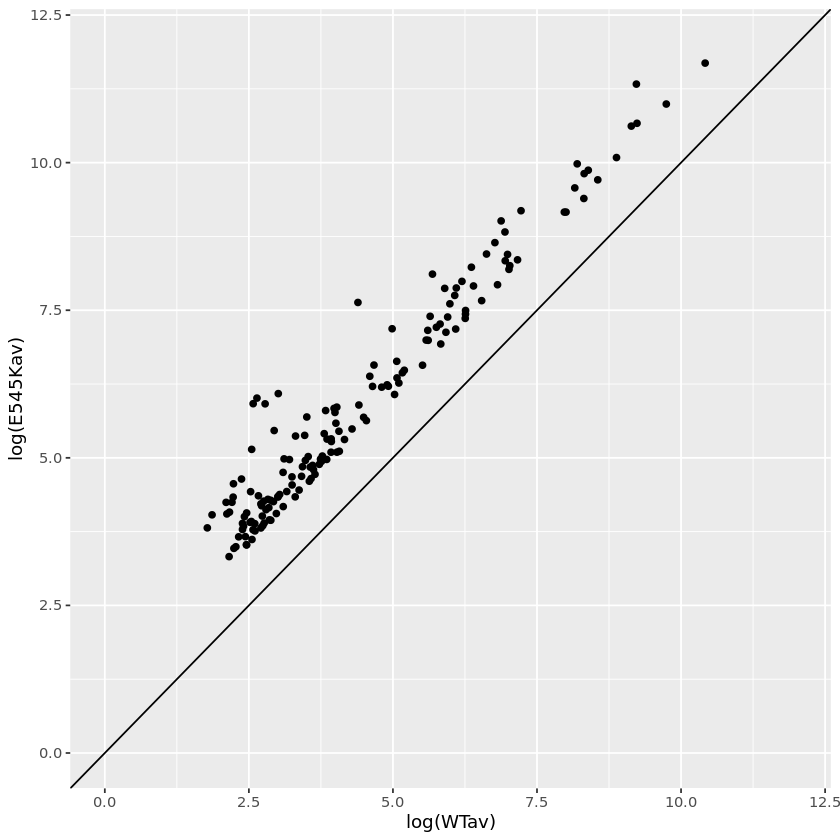

In [13]:
E545K_goi_select %>% ggplot(aes(x = log(WTav), y = log(E545Kav))) + 
    geom_point() + geom_abline(slope = 1, intercept = 0) +
    coord_cartesian(xlim = c(0,12), ylim = c(0,12))

In [14]:
E545Kcolor_counts_select <- total_counts_select %>% mutate(mycolor = ifelse(
                             Ensembl %in% E545K_goi_select$Ensembl, 
                                                1, 2))
# E545Kcolor_counts_select$mycolor <- as.factor(E545Kcolor_counts_select$mycolor)
E545Kcolor_counts_select <- E545Kcolor_counts_select %>% arrange(desc(mycolor))
E545Kcolor_counts_select

Ensembl         E545Kav      H1047Rav     WTav         mycolor
ENSG00000223972 ENSG00000223972   1.9371382    1.1313531    0.4421962  2      
ENSG00000227232 ENSG00000227232 162.4965004  329.1692962  189.0556870  2      
ENSG00000278267 ENSG00000278267  45.0550839   57.5648497   46.4436155  2      
ENSG00000243485 ENSG00000243485   1.6708616    1.7125656    0.0000000  2      
ENSG00000284332 ENSG00000284332   0.0000000    0.0000000    0.0000000  2      
ENSG00000237613 ENSG00000237613   0.0000000    0.0000000    0.0000000  2      
ENSG00000268020 ENSG00000268020   0.0000000    0.0000000    0.0000000  2      
ENSG00000240361 ENSG00000240361   0.0000000    0.0000000    0.0000000  2      
ENSG00000186092 ENSG00000186092   0.0000000    0.0000000    0.0000000  2      
ENSG00000238009 ENSG00000238009  42.0206739   23.4752630   19.7735066  2      
ENSG00000239945 ENSG00000239945   0.0000000    0.0000000    0.8843923  2      
ENSG00000233750 ENSG00000233750  93.4746271   77.1329621   37.8629188  2      
ENSG00000268903 ENSG00000268903 355.7991110  235.9810363  220.8861831  2      
ENSG00000269981 ENSG00000269981 332.1953432  208.1833191  174.9688763  2      
ENSG00000239906 ENSG00000239906  12.4172031    7.1984254    3.3998079  2      
ENSG00000241860 ENSG00000241860 103.3028246   99.8744614   71.6285842  2      
ENSG00000222623 ENSG00000222623   0.5508537    0.9576660    0.0000000  2      
ENSG00000241599 ENSG00000241599   0.0000000    0.1721154    0.0000000  2      
ENSG00000279928 ENSG00000279928  15.0153078   12.7177648   14.0701952  2      
ENSG00000279457 ENSG00000279457 285.8180980  531.1092454  433.6201253  2      
ENSG00000273874 ENSG00000273874   1.1017074    3.8932287    3.4722018  2      
ENSG00000228463 ENSG00000228463  56.5719260   53.7597272   29.2526486  2      
ENSG00000286448 ENSG00000286448  12.3850172    7.9345177    3.5375693  2      
ENSG00000236679 ENSG00000236679  10.8195639    5.3846150    5.8009596  2      
ENSG00000236601 ENSG00000236601   1.9371382    4.0307345    0.8843923  2      
ENSG00000237094 ENSG00000237094 242.3143538  209.3330586  155.6655271  2      
ENSG00000269732 ENSG00000269732   0.0000000    0.0000000    0.0000000  2      
ENSG00000284733 ENSG00000284733   0.0000000    0.0000000    0.0000000  2      
ENSG00000233653 ENSG00000233653   0.0000000    0.2266244    0.0000000  2      
ENSG00000250575 ENSG00000250575   4.1771540    1.6789684    3.4068344  2      
⋮               ⋮               ⋮            ⋮            ⋮            ⋮      
ENSG00000108846 ENSG00000108846   9529.53713  4023.177575  2905.806639 1      
ENSG00000125398 ENSG00000125398  19370.34535  9162.332036  4402.290975 1      
ENSG00000141576 ENSG00000141576     63.76104    22.670346    17.221491 1      
ENSG00000278261 ENSG00000278261     57.74325    13.424416    19.620225 1      
ENSG00000267665 ENSG00000267665     45.29831     5.837443     5.922250 1      
ENSG00000171246 ENSG00000171246     83.63752     5.790569    12.555192 1      
ENSG00000101680 ENSG00000101680   1574.24402  1109.802256   520.369597 1      
ENSG00000168675 ENSG00000168675    139.70433    52.732256    42.941840 1      
ENSG00000197046 ENSG00000197046     49.75093    27.682019    12.426214 1      
ENSG00000119547 ENSG00000119547     56.49924    14.408412     6.429814 1      
ENSG00000141682 ENSG00000141682   2126.10739  1651.030855   692.218135 1      
ENSG00000105641 ENSG00000105641     71.21144    19.895390    15.758898 1      
ENSG00000130518 ENSG00000130518   1630.61346   211.064111   283.065572 1      
ENSG00000130283 ENSG00000130283    145.24116    74.018635    42.240592 1      
ENSG00000223802 ENSG00000223802    204.54963   102.947786    50.808993 1      
ENSG00000160161 ENSG00000160161     83.82554    54.836400    23.511787 1      
ENSG00000081665 ENSG00000081665   1320.88540   282.404647   146.346983 1      
ENSG00000256771 ENSG00000256771    408.03906    11.117531    14.012516 1      
ENSG00000184635 ENSG00000184635    371.19108    33.714087    13.12

Warning message:
“Removed 4216 rows containing missing values (`geom_point()`).”


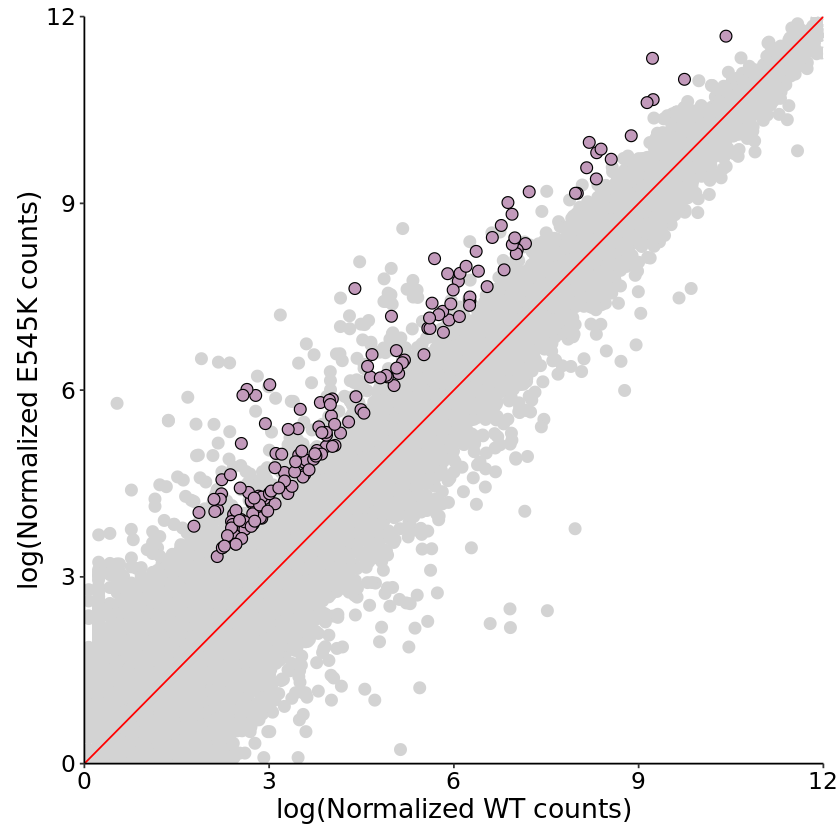

In [21]:
E545K_spray <- E545Kcolor_counts_select %>% filter(E545Kav > 0) %>% filter(WTav > 0) %>%
    ggplot(aes(x = log(WTav), y = log(E545Kav), fill = as.factor(mycolor),
               color = as.factor(mycolor))) + 
    geom_point(shape = 21, size = 3) + geom_abline(slope = 1, intercept = 0, color = "red") +
    scale_fill_manual(values = c("#C29ABB", "lightgrey")) +
    scale_color_manual(values = c("black", "lightgrey")) +
    scale_y_continuous(limits = c(0,12), expand = c(0, 0)) +
    scale_x_continuous(limits = c(0,12), expand = c(0, 0)) +
    ylab(label = "log(Normalized E545K counts)") +
    xlab(label = "log(Normalized WT counts)") +
    theme_classic() + theme(text = element_text(family = "Arial", color = "black"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
                          legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
E545K_spray

In [16]:
H1047Rcolor_counts_select <- total_counts_select %>% mutate(mycolor = ifelse(
                             Ensembl %in% H1047R_goi_select$Ensembl, 
                                                1, 2))
# H1047Rcolor_counts_select$mycolor <- as.factor(H1047Rcolor_counts_select$mycolor)
H1047Rcolor_counts_select <- H1047Rcolor_counts_select %>% arrange(desc(mycolor))
H1047Rcolor_counts_select

Ensembl         E545Kav     H1047Rav    WTav        mycolor
ENSG00000223972 ENSG00000223972   1.9371382   1.1313531   0.4421962 2      
ENSG00000227232 ENSG00000227232 162.4965004 329.1692962 189.0556870 2      
ENSG00000278267 ENSG00000278267  45.0550839  57.5648497  46.4436155 2      
ENSG00000243485 ENSG00000243485   1.6708616   1.7125656   0.0000000 2      
ENSG00000284332 ENSG00000284332   0.0000000   0.0000000   0.0000000 2      
ENSG00000237613 ENSG00000237613   0.0000000   0.0000000   0.0000000 2      
ENSG00000268020 ENSG00000268020   0.0000000   0.0000000   0.0000000 2      
ENSG00000240361 ENSG00000240361   0.0000000   0.0000000   0.0000000 2      
ENSG00000186092 ENSG00000186092   0.0000000   0.0000000   0.0000000 2      
ENSG00000238009 ENSG00000238009  42.0206739  23.4752630  19.7735066 2      
ENSG00000239945 ENSG00000239945   0.0000000   0.0000000   0.8843923 2      
ENSG00000233750 ENSG00000233750  93.4746271  77.1329621  37.8629188 2      
ENSG00000268903 ENSG00000268903 355.7991110 235.9810363 220.8861831 2      
ENSG00000269981 ENSG00000269981 332.1953432 208.1833191 174.9688763 2      
ENSG00000239906 ENSG00000239906  12.4172031   7.1984254   3.3998079 2      
ENSG00000241860 ENSG00000241860 103.3028246  99.8744614  71.6285842 2      
ENSG00000222623 ENSG00000222623   0.5508537   0.9576660   0.0000000 2      
ENSG00000241599 ENSG00000241599   0.0000000   0.1721154   0.0000000 2      
ENSG00000279928 ENSG00000279928  15.0153078  12.7177648  14.0701952 2      
ENSG00000279457 ENSG00000279457 285.8180980 531.1092454 433.6201253 2      
ENSG00000273874 ENSG00000273874   1.1017074   3.8932287   3.4722018 2      
ENSG00000228463 ENSG00000228463  56.5719260  53.7597272  29.2526486 2      
ENSG00000286448 ENSG00000286448  12.3850172   7.9345177   3.5375693 2      
ENSG00000236679 ENSG00000236679  10.8195639   5.3846150   5.8009596 2      
ENSG00000236601 ENSG00000236601   1.9371382   4.0307345   0.8843923 2      
ENSG00000237094 ENSG00000237094 242.3143538 209.3330586 155.6655271 2      
ENSG00000269732 ENSG00000269732   0.0000000   0.0000000   0.0000000 2      
ENSG00000284733 ENSG00000284733   0.0000000   0.0000000   0.0000000 2      
ENSG00000233653 ENSG00000233653   0.0000000   0.2266244   0.0000000 2      
ENSG00000250575 ENSG00000250575   4.1771540   1.6789684   3.4068344 2      
⋮               ⋮               ⋮           ⋮           ⋮           ⋮      
ENSG00000124107 ENSG00000124107 12172.12205 44965.0076  6322.46908  1      
ENSG00000101040 ENSG00000101040  9490.18895 24500.9210  8436.87923  1      
ENSG00000182463 ENSG00000182463   662.38874  4200.8707   577.77969  1      
ENSG00000087495 ENSG00000087495   148.99614   559.1632   127.23593  1      
ENSG00000156265 ENSG00000156265  1142.21605  2562.4409   736.57793  1      
ENSG00000160179 ENSG00000160179  1256.42677  3933.8402   897.55068  1      
ENSG00000188660 ENSG00000188660    96.58280   186.7042    63.30057  1      
ENSG00000183570 ENSG00000183570   216.73187   606.6202   113.17628  1      
ENSG00000203280 ENSG00000203280    86.76813   208.0208    75.29945  1      
ENSG00000239282 ENSG00000239282  1460.45282  4340.0186  1187.32144  1      
ENSG00000100100 ENSG00000100100   956.96580  2484.7777   825.87636  1      
ENSG00000128284 ENSG00000128284   556.77622  1423.1923   281.08905  1      
ENSG00000221890 ENSG00000221890   249.87953  1140.7907   168.35065  1      
ENSG00000235568 ENSG00000235568   124.02391   321.6485    76.69668  1      
ENSG00000184368 ENSG00000184368  5372.03994 12174.5875  3898.88890  1      
ENSG00000232472 ENSG00000232472   171.59913   643.5174   167.54933  1      
ENSG00000189221 ENSG00000189221  4230.94838 28829.9832  8250.15742  1      
ENSG00000196632 ENSG00000196632   256.22346   367.0404   128.28121  1      
ENSG00000227536 ENSG00000227536    46.51013   111.2352    39.74948  1      
ENSG00000196338 ENSG00000196338   112.32289   175.9731    60.78406  1      
ENSG00000242732 ENSG00000242732    87.51648   473.2400   125.908

Warning message:
“Removed 9061 rows containing missing values (`geom_point()`).”


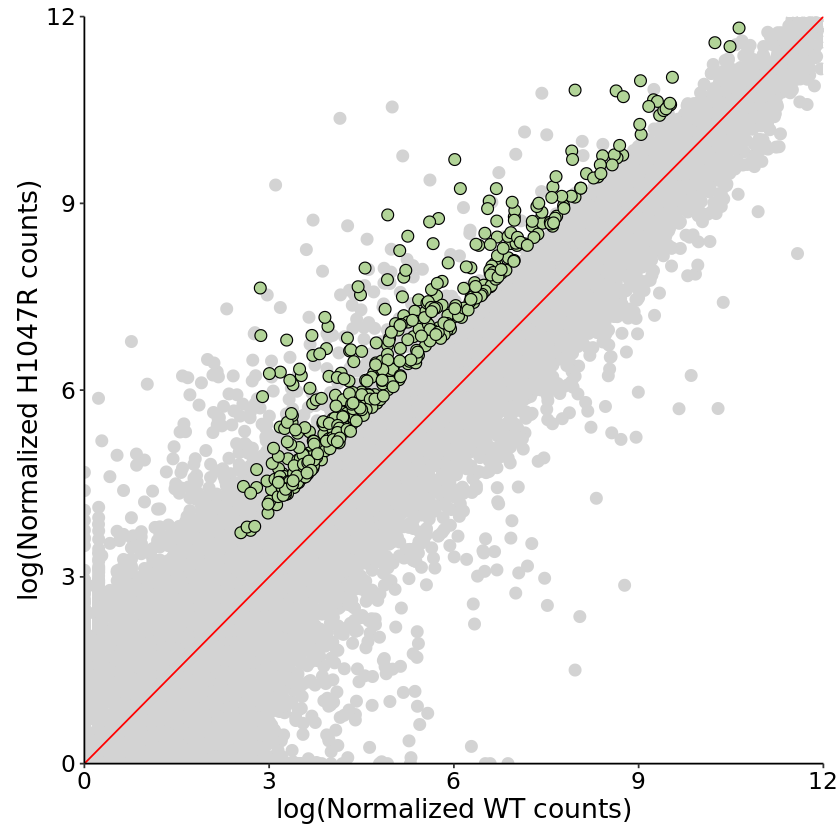

In [22]:
H1047R_spray <- H1047Rcolor_counts_select %>%
    ggplot(aes(x = log(WTav), y = log(H1047Rav), fill = as.factor(mycolor),
               color = as.factor(mycolor))) + 
    geom_point(shape = 21, size = 3) + geom_abline(slope = 1, intercept = 0, color = "red") +
    scale_fill_manual(values = c("#B2D498", "lightgrey")) +
    scale_color_manual(values = c("black", "lightgrey")) +
    scale_y_continuous(limits = c(0,12), expand = c(0, 0)) +
    scale_x_continuous(limits = c(0,12), expand = c(0, 0)) +
    ylab(label = "log(Normalized H1047R counts)") +
    xlab(label = "log(Normalized WT counts)") +
    theme_classic() + theme(text = element_text(family = "Arial", color = "black"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
                          legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
H1047R_spray

In [23]:
ggsave(filename="/data/park_lab/adam/figures/E545Kspray8-25.pdf", 
       plot = E545K_spray, device = cairo_pdf, width = 8, height = 8)
ggsave(filename="/data/park_lab/adam/figures/H1047Rspray8-25.pdf", 
       plot = H1047R_spray, device = cairo_pdf, width = 8, height = 8)

Warning message:
“Removed 4216 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 9061 rows containing missing values (`geom_point()`).”


In [91]:
# pdf(file = "/data/park_lab/adam/figures/RNAseq_heatmap_1B_2-13.pdf", width = 8, height = 8)
# p
# dev.off()

png 
  2

### Making new volcanoes for emily

In [2]:
MCF10A_WTvex9_res <- MCF10A_WTvex9_res %>% as.data.frame()
MCF10A_WTvex20_res <- MCF10A_WTvex20_res %>% as.data.frame()
MCF10A_WTvex9_res

baseMean    log2FoldChange lfcSE      stat       
ENSG00000227232.5    228.49968  0.21925149    0.21498719  1.0198351 
ENSG00000278267.1     49.95994  0.04175588    0.37459715  0.1114688 
ENSG00000238009.6     28.51625 -1.10300426    0.56812573 -1.9414792 
ENSG00000233750.3     69.85035 -1.32106258    0.38261501 -3.4527202 
ENSG00000268903.1    272.18446 -0.69874816    0.22369478 -3.1236677 
ENSG00000269981.1    239.55302 -0.92283204    0.20631657 -4.4728935 
ENSG00000241860.7     92.05262 -0.53940222    0.31908437 -1.6904689 
ENSG00000279457.4    419.34413  0.60349097    0.18282812  3.3008650 
ENSG00000228463.10    46.78400 -0.97398419    0.40330220 -2.4150233 
ENSG00000237094.12   203.54801 -0.64981667    0.22799802 -2.8500979 
ENSG00000230021.10   127.05106  0.20408265    0.21262656  0.9598173 
ENSG00000225630.1   1028.94673 -0.18979440    0.29964628 -0.6333948 
ENSG00000237973.1   1795.62625 -0.04958380    0.08386708 -0.5912189 
ENSG00000229344.1     25.34822 -0.67038734    0.46200609 -1.4510357 
ENSG00000248527.1   4939.38157 -0.11270598    0.22263410 -0.5062386 
ENSG00000228327.3    331.57797 -0.09625495    0.20488340 -0.4698036 
ENSG00000237491.10   159.46471  0.13768861    0.33602519  0.4097568 
ENSG00000230092.7     80.43146 -0.13666962    0.31185185 -0.4382518 
ENSG00000177757.2     71.49171 -0.08447793    0.32715123 -0.2582229 
ENSG00000228794.9   1481.19298  0.19291197    0.08141883  2.3693779 
ENSG00000225880.5     76.42455 -0.24560404    0.32070252 -0.7658313 
ENSG00000272438.1     26.55453 -0.17272016    0.57435243 -0.3007216 
ENSG00000230699.2    156.34005 -0.06027944    0.26702844 -0.2257416 
ENSG00000241180.1     30.00924  0.31694656    0.46202213  0.6859987 
ENSG00000223764.2    155.93959 -0.22635793    0.22671839 -0.9984101 
ENSG00000187634.12  2851.99271 -0.16234771    0.06004914 -2.7035809 
ENSG00000188976.11 18516.28113 -0.15007677    0.04776109 -3.1422390 
ENSG00000187961.14  1965.74047  0.35105475    0.06691947  5.2459282 
ENSG00000187583.11  2068.09571  0.06354552    0.07216459  0.8805637 
ENSG00000187642.9    446.36474  0.03629837    0.14058156  0.2582015 
⋮                  ⋮           ⋮              ⋮          ⋮          
ENSG00000210107.1     514.2555  1.103542085   0.15654848  7.04920353
ENSG00000210112.1     480.3803  1.149634578   0.13390951  8.58516035
ENSG00000198763.3   33196.0666  0.174608077   0.17563400  0.99415875
ENSG00000210117.1     405.1554  0.696213194   0.16087588  4.32764184
ENSG00000210127.1    4974.2848  0.249203052   0.08157553  3.05487497
ENSG00000210135.1   13388.4016  0.198929383   0.06499635  3.06062397
ENSG00000210140.1   19851.3815  0.224897768   0.06652595  3.38060228
ENSG00000210144.1   17584.2557  0.283141456   0.07166852  3.95070876
ENSG00000198804.2  818033.5657  0.051222761   0.03192220  1.60461236
ENSG00000210151.2    7184.1889  0.150909873   0.08443033  1.78738929
ENSG00000210154.1     923.4741  1.364840469   0.11120949 12.27269798
ENSG00000198712.1  222541.6884 -0.128090743   0.15312121 -0.83653165
ENSG00000210156.1     950.7882  0.239109091   0.10400630  2.29898666
ENSG00000228253.1   18227.0759  0.014992158   0.25489049  0.05881804
ENSG00000198899.2   94516.5919 -0.123795751   0.20617627 -0.60043646
ENSG00000198938.2  218437.9519 -0.113212934   0.06997891 -1.61781497
ENSG00000210164.1    1551.6324  0.280440762   0.08518570  3.29211096
ENSG00000198840.2   15483.7980 -0.071902982   0.24429002 -0.29433451
ENSG00000210174.1    1266.1218  0.465764464   0.10750825  4.33236029
ENSG00000212907.2   18900.5158 -0.004372946   0.17827060 -0.02452982
ENSG00000198886.2  142761.6922 -0.005332868   0.14801265 -0.03602981
ENSG00000210176.1    1630.6223  0.778709840   0.10883390  7.15503046
ENSG00000210184.1    1875.8949  0.760919466   0.10402826  7.31454605
ENSG00000210191.1    1510.8237  0.655349770   0.10101772  6.48747346
ENSG00000198786.2  128346.2313  0.161130540   0.13950575  1.15501000
ENSG00000198695.2   17252.2625  0.209754701   0.25869856  0.81080739
ENSG00000210194.1

In [3]:
ens.str <- substr(rownames(MCF10A_WTvex9_res), 1, 15)
genes <- mapIds(org.Hs.eg.db,
                keys = ens.str,
                column = "SYMBOL",
                keytype = "ENSEMBL",
                multiVals= "first")
str(genes)
genes <- as.character(genes)
genes
MCF10A_WTvex9_res$symbols <- genes
head(MCF10A_WTvex9_res)

'select()' returned 1:many mapping between keys and columns



 Named chr [1:21734] "WASH7P" "MIR6859-1" "LOC100996442" "CICP27" NA NA NA ...
 - attr(*, "names")= chr [1:21734] "ENSG00000227232" "ENSG00000278267" "ENSG00000238009" "ENSG00000233750" ...


[1] "WASH7P"                    "MIR6859-1"                
    [3] "LOC100996442"              "CICP27"                   
    [5] NA                          NA                         
    [7] NA                          "WASH9P"                   
    [9] "RPL23AP21"                 NA                         
   [11] "LOC101928626"              "MTND2P28"                 
   [13] "MTCO1P12"                  "MTCO2P12"                 
   [15] "MTATP6P1"                  NA                         
   [17] "LINC01409"                 NA                         
   [19] "FAM87B"                    "LINC01128"                
   [21] "LINC00115"                 NA                         
   [23] NA                          NA                         
   [25] "LINC02593"                 "SAMD11"                   
   [27] "NOC2L"                     "KLHL17"                   
   [29] "PLEKHN1"                   "PERM1"                    
   [31] NA                          "HES4"                     
   [33] "ISG15"                     "AGRN"                     
   [35] NA                          "LOC100288175"             
   [37] NA                          "RNF223"                   
   [39] "C1orf159"                  NA                         
   [41] NA                          "SDF4"                     
   [43] "B3GALT6"                   "C1QTNF12"                 
   [45] "UBE2J2"                    "SCNN1D"                   
   [47] "ACAP3"                     "PUSL1"                    
   [49] "INTS11"                    "MIR6727"                  
   [51] NA                          "CPTP"                     
   [53] "TAS1R3"                    "DVL1"                     
   [55] "MIR6808"                   "MXRA8"                    
   [57] "AURKAIP1"                  "CCNL2"                    
   [59] "MRPL20-AS1"                "MRPL20"                   
   [61] "RN7SL657P"                 NA                         
   [63] "ANKRD65"                   "VWA1"                     
   [65] "ATAD3C"                    "ATAD3B"                   
   [67] NA                          "ATAD3A"                   
   [69] "TMEM240"                   "SSU72"                    
   [71] NA                          "FNDC10"                   
   [73] NA                          NA                         
   [75] "MIB2"                      "CDK11B"                   
   [77] NA                          "SLC35E2B"                 
   [79] NA                          "CDK11A"                   
   [81] NA                          NA                         
   [83] "SLC35E2A"                  "NADK"                     
   [85] "GNB1"                      NA                         
   [87] "CALML6"                    "TMEM52"                   
   [89] "CFAP74"                    "PRKCZ"                    
   [91] NA                          "PRKCZ-AS1"                
   [93] "FAAP20"                    "SKI"                      
   [95] "MORN1"                     "LOC100129534"             
   [97] "RER1"                      "PEX10"                    
   [99] "PLCH2"                     "PANK4"                    
  [101] NA                          "TNFRSF14"                 
  [103] "PRXL2B"                    "ARHGEF16"                 
  [105] "MEGF6"                     "TPRG1L"                   
  [107] "WRAP73"                    "TP73"                     
  [109] "TP73-AS1"                  "CCDC27"                   
  [111] "SMIM1"                     "LRRC47"                   
  [113] NA                          "CEP104"                   
  [115] "DFFB"                      "C1orf174"                 
  [117] "LINC01134"                 "NPHP4"                    
  [119] "KCNAB2"                    "CHD5"                     
  [121] NA                          "RPL22"                    
  [123] "RNF207-AS1"                "RNF207"                   
  [125] "ICMT"                      

baseMean  log2FoldChange lfcSE     stat       pvalue      
ENSG00000227232.5 228.49968  0.21925149    0.2149872  1.0198351 3.078067e-01
ENSG00000278267.1  49.95994  0.04175588    0.3745972  0.1114688 9.112446e-01
ENSG00000238009.6  28.51625 -1.10300426    0.5681257 -1.9414792 5.220018e-02
ENSG00000233750.3  69.85035 -1.32106258    0.3826150 -3.4527202 5.549643e-04
ENSG00000268903.1 272.18446 -0.69874816    0.2236948 -3.1236677 1.786120e-03
ENSG00000269981.1 239.55302 -0.92283204    0.2063166 -4.4728935 7.716821e-06
                  padj         symbols     
ENSG00000227232.5 4.268860e-01 WASH7P      
ENSG00000278267.1 9.412209e-01 MIR6859-1   
ENSG00000238009.6 9.940452e-02 LOC100996442
ENSG00000233750.3 1.747321e-03 CICP27      
ENSG00000268903.1 5.091017e-03 NA          
ENSG00000269981.1 3.319562e-05 NA

In [4]:
ens.str <- substr(rownames(MCF10A_WTvex20_res), 1, 15)
genes <- mapIds(org.Hs.eg.db,
                keys = ens.str,
                column = "SYMBOL",
                keytype = "ENSEMBL",
                multiVals= "first")
str(genes)
genes <- as.character(genes)
genes
MCF10A_WTvex20_res$symbols <- genes
head(MCF10A_WTvex20_res)

'select()' returned 1:many mapping between keys and columns



 Named chr [1:21734] "WASH7P" "MIR6859-1" "LOC100996442" "CICP27" NA NA NA ...
 - attr(*, "names")= chr [1:21734] "ENSG00000227232" "ENSG00000278267" "ENSG00000238009" "ENSG00000233750" ...


[1] "WASH7P"                    "MIR6859-1"                
    [3] "LOC100996442"              "CICP27"                   
    [5] NA                          NA                         
    [7] NA                          "WASH9P"                   
    [9] "RPL23AP21"                 NA                         
   [11] "LOC101928626"              "MTND2P28"                 
   [13] "MTCO1P12"                  "MTCO2P12"                 
   [15] "MTATP6P1"                  NA                         
   [17] "LINC01409"                 NA                         
   [19] "FAM87B"                    "LINC01128"                
   [21] "LINC00115"                 NA                         
   [23] NA                          NA                         
   [25] "LINC02593"                 "SAMD11"                   
   [27] "NOC2L"                     "KLHL17"                   
   [29] "PLEKHN1"                   "PERM1"                    
   [31] NA                          "HES4"                     
   [33] "ISG15"                     "AGRN"                     
   [35] NA                          "LOC100288175"             
   [37] NA                          "RNF223"                   
   [39] "C1orf159"                  NA                         
   [41] NA                          "SDF4"                     
   [43] "B3GALT6"                   "C1QTNF12"                 
   [45] "UBE2J2"                    "SCNN1D"                   
   [47] "ACAP3"                     "PUSL1"                    
   [49] "INTS11"                    "MIR6727"                  
   [51] NA                          "CPTP"                     
   [53] "TAS1R3"                    "DVL1"                     
   [55] "MIR6808"                   "MXRA8"                    
   [57] "AURKAIP1"                  "CCNL2"                    
   [59] "MRPL20-AS1"                "MRPL20"                   
   [61] "RN7SL657P"                 NA                         
   [63] "ANKRD65"                   "VWA1"                     
   [65] "ATAD3C"                    "ATAD3B"                   
   [67] NA                          "ATAD3A"                   
   [69] "TMEM240"                   "SSU72"                    
   [71] NA                          "FNDC10"                   
   [73] NA                          NA                         
   [75] "MIB2"                      "CDK11B"                   
   [77] NA                          "SLC35E2B"                 
   [79] NA                          "CDK11A"                   
   [81] NA                          NA                         
   [83] "SLC35E2A"                  "NADK"                     
   [85] "GNB1"                      NA                         
   [87] "CALML6"                    "TMEM52"                   
   [89] "CFAP74"                    "PRKCZ"                    
   [91] NA                          "PRKCZ-AS1"                
   [93] "FAAP20"                    "SKI"                      
   [95] "MORN1"                     "LOC100129534"             
   [97] "RER1"                      "PEX10"                    
   [99] "PLCH2"                     "PANK4"                    
  [101] NA                          "TNFRSF14"                 
  [103] "PRXL2B"                    "ARHGEF16"                 
  [105] "MEGF6"                     "TPRG1L"                   
  [107] "WRAP73"                    "TP73"                     
  [109] "TP73-AS1"                  "CCDC27"                   
  [111] "SMIM1"                     "LRRC47"                   
  [113] NA                          "CEP104"                   
  [115] "DFFB"                      "C1orf174"                 
  [117] "LINC01134"                 "NPHP4"                    
  [119] "KCNAB2"                    "CHD5"                     
  [121] NA                          "RPL22"                    
  [123] "RNF207-AS1"                "RNF207"                   
  [125] "ICMT"                      

baseMean  log2FoldChange lfcSE     stat       pvalue      
ENSG00000227232.5 228.49968 -0.8233645     0.2009822 -4.0967037 4.190747e-05
ENSG00000278267.1  49.95994 -0.3397878     0.3477980 -0.9769687 3.285846e-01
ENSG00000238009.6  28.51625 -0.2713886     0.5554814 -0.4885646 6.251500e-01
ENSG00000233750.3  69.85035 -1.0560432     0.3719480 -2.8392228 4.522357e-03
ENSG00000268903.1 272.18446 -0.1275274     0.2193967 -0.5812640 5.610625e-01
ENSG00000269981.1 239.55302 -0.2709561     0.2014872 -1.3447808 1.786960e-01
                  padj         symbols     
ENSG00000227232.5 0.0000988134 WASH7P      
ENSG00000278267.1 0.4024286649 MIR6859-1   
ENSG00000238009.6 0.6907326820 LOC100996442
ENSG00000233750.3 0.0082316984 CICP27      
ENSG00000268903.1 0.6326949882 NA          
ENSG00000269981.1 0.2367360279 NA

In [5]:
MCF10A_WTvex9_res_df <- MCF10A_WTvex9_res %>% filter(!symbols == "NA")
MCF10A_WTvex20_res_df <- MCF10A_WTvex20_res %>% filter(!symbols == "NA")
head(MCF10A_WTvex9_res_df)

baseMean  log2FoldChange lfcSE     stat       pvalue      
ENSG00000227232.5  228.49968  0.21925149    0.2149872  1.0198351 0.3078066557
ENSG00000278267.1   49.95994  0.04175588    0.3745972  0.1114688 0.9112446269
ENSG00000238009.6   28.51625 -1.10300426    0.5681257 -1.9414792 0.0522001837
ENSG00000233750.3   69.85035 -1.32106258    0.3826150 -3.4527202 0.0005549643
ENSG00000279457.4  419.34413  0.60349097    0.1828281  3.3008650 0.0009638724
ENSG00000228463.10  46.78400 -0.97398419    0.4033022 -2.4150233 0.0157342048
                   padj        symbols     
ENSG00000227232.5  0.426886003 WASH7P      
ENSG00000278267.1  0.941220919 MIR6859-1   
ENSG00000238009.6  0.099404522 LOC100996442
ENSG00000233750.3  0.001747321 CICP27      
ENSG00000279457.4  0.002899892 WASH9P      
ENSG00000228463.10 0.035259159 RPL23AP21

In [6]:
MCF10A_WTvex9_res_df$Ensembl <- rownames(MCF10A_WTvex9_res_df) %>% 
    tools::file_path_sans_ext()
MCF10A_WTvex20_res_df$Ensembl <- rownames(MCF10A_WTvex20_res_df) %>% 
    tools::file_path_sans_ext()

In [19]:
MCF10A_WTvex9_res_df <- MCF10A_WTvex9_res_df %>% mutate(mycolor = ifelse(
                             Ensembl %in% rownames(E545K_goi), 
                                                1, 2))
# E545Kcolor_counts_select$mycolor <- as.factor(E545Kcolor_counts_select$mycolor)
MCF10A_WTvex9_res_df <- MCF10A_WTvex9_res_df %>% arrange(desc(mycolor))
MCF10A_WTvex9_res_df

baseMean     log2FoldChange lfcSE      stat      
ENSG00000227232.5     228.49968  0.21925149    0.21498719  1.0198351
ENSG00000278267.1      49.95994  0.04175588    0.37459715  0.1114688
ENSG00000238009.6      28.51625 -1.10300426    0.56812573 -1.9414792
ENSG00000233750.3      69.85035 -1.32106258    0.38261501 -3.4527202
ENSG00000279457.4     419.34413  0.60349097    0.18282812  3.3008650
ENSG00000228463.10     46.78400 -0.97398419    0.40330220 -2.4150233
ENSG00000230021.10    127.05106  0.20408265    0.21262656  0.9598173
ENSG00000225630.1    1028.94673 -0.18979440    0.29964628 -0.6333948
ENSG00000237973.1    1795.62625 -0.04958380    0.08386708 -0.5912189
ENSG00000229344.1      25.34822 -0.67038734    0.46200609 -1.4510357
ENSG00000248527.1    4939.38157 -0.11270598    0.22263410 -0.5062386
ENSG00000237491.10    159.46471  0.13768861    0.33602519  0.4097568
ENSG00000177757.2      71.49171 -0.08447793    0.32715123 -0.2582229
ENSG00000228794.9    1481.19298  0.19291197    0.08141883  2.3693779
ENSG00000225880.5      76.42455 -0.24560404    0.32070252 -0.7658313
ENSG00000223764.2     155.93959 -0.22635793    0.22671839 -0.9984101
ENSG00000187634.12   2851.99271 -0.16234771    0.06004914 -2.7035809
ENSG00000188976.11  18516.28113 -0.15007677    0.04776109 -3.1422390
ENSG00000187961.14   1965.74047  0.35105475    0.06691947  5.2459282
ENSG00000187583.11   2068.09571  0.06354552    0.07216459  0.8805637
ENSG00000187642.9     446.36474  0.03629837    0.14058156  0.2582015
ENSG00000188290.10   3833.50441  1.10755993    0.06863561 16.1368130
ENSG00000187608.10   1653.61325 -0.16246360    0.07796110 -2.0839060
ENSG00000188157.15 124663.97166  0.40505191    0.04774867  8.4829986
ENSG00000217801.10    718.41062  0.87374003    0.09497078  9.2000929
ENSG00000237330.3    1047.10015  0.97427225    0.07769748 12.5393022
ENSG00000131591.17   1611.07671  0.06538394    0.10256229  0.6375046
ENSG00000078808.17  21088.57250  0.15233196    0.04764448  3.1972634
ENSG00000176022.7    4849.85884  0.15206421    0.05432525  2.7991440
ENSG00000184163.3      48.71072 -0.17725642    0.36852828 -0.4809846
⋮                  ⋮            ⋮              ⋮          ⋮         
ENSG00000108846.16  5502.91473  -1.716580      0.07922826 -21.666259
ENSG00000125398.8  11017.92420  -2.140811      0.05655375 -37.854455
ENSG00000141576.16    34.65811  -1.847331      0.44199158  -4.179562
ENSG00000278261.1     30.32274  -1.560903      0.65023242  -2.400531
ENSG00000267665.2     19.07036  -2.995267      0.71227010  -4.205241
ENSG00000171246.6     34.05296  -2.674608      0.53694020  -4.981203
ENSG00000101680.15  1072.74554  -1.601613      0.09435477 -16.974369
ENSG00000168675.18    78.76325  -1.710267      0.33290053  -5.137472
ENSG00000197046.12    30.12635  -1.992120      0.56894940  -3.501400
ENSG00000119547.6     25.87956  -3.112256      0.70309516  -4.426508
ENSG00000141682.11  1496.98444  -1.621153      0.10122371 -16.015541
ENSG00000105641.4     35.71331  -2.186773      0.46721586  -4.680435
ENSG00000130518.17   709.76074  -2.527585      0.10943217 -23.097275
ENSG00000130283.9     87.58871  -1.787389      0.31528902  -5.669050
ENSG00000223802.7    119.97501  -2.009221      0.26147878  -7.684070
ENSG00000160161.9     54.28384  -1.835185      0.37437714  -4.901968
ENSG00000081665.14   585.31834  -3.180675      0.29657728 -10.724609
ENSG00000256771.4    144.60797  -4.830373      0.95113746  -5.078522
ENSG00000184635.16   139.67004  -4.769850      0.36965554 -12.903500
ENSG00000185869.14    95.04586  -2.085019      0.30610393  -6.811474
ENSG00000245680.10  1561.40147  -2.578375      0.09161367 -28.143997
ENSG00000125740.14 59037.85255  -1.831687      0.07010837 -26.126510
ENSG00000268621.6   2760.95981  -2.103446      0.06667131 -31.549489
ENSG00000221923.9    144.17866  -2.557948      0.24401406 -10.482789
ENSG00000101280.8     20.96712  -1.716606      0.65398050  -2.624858
ENSG00000131067.17   133.56533  -1.984941      0.28454509  -6.975840
ENSG00000234380.2

In [20]:
summary(as.factor(MCF10A_WTvex9_res_df$mycolor))

1     2 
  160 16421

In [21]:
MCF10A_WTvex20_res_df <- MCF10A_WTvex20_res_df %>% mutate(mycolor = ifelse(
                             Ensembl %in% rownames(H1047R_goi), 
                                                1, 2))
# E545Kcolor_counts_select$mycolor <- as.factor(E545Kcolor_counts_select$mycolor)
MCF10A_WTvex20_res_df <- MCF10A_WTvex20_res_df %>% arrange(desc(mycolor))
MCF10A_WTvex20_res_df

baseMean     log2FoldChange lfcSE      stat      
ENSG00000227232.5     228.49968 -0.82336452    0.20098220 -4.0967037
ENSG00000278267.1      49.95994 -0.33978777    0.34779800 -0.9769687
ENSG00000238009.6      28.51625 -0.27138856    0.55548138 -0.4885646
ENSG00000233750.3      69.85035 -1.05604322    0.37194800 -2.8392228
ENSG00000279457.4     419.34413 -0.31123652    0.17365836 -1.7922346
ENSG00000228463.10     46.78400 -0.89963439    0.38578981 -2.3319288
ENSG00000230021.10    127.05106  0.08201647    0.19541553  0.4197029
ENSG00000225630.1    1028.94673 -0.16302789    0.29839696 -0.5463457
ENSG00000237973.1    1795.62625 -0.29139441    0.08084895 -3.6041830
ENSG00000229344.1      25.34822  0.89664064    0.45407208  1.9746659
ENSG00000248527.1    4939.38157  0.22113080    0.22232846  0.9946131
ENSG00000237491.10    159.46471 -0.13765077    0.32709840 -0.4208237
ENSG00000177757.2      71.49171 -0.62005947    0.30487720 -2.0338007
ENSG00000228794.9    1481.19298 -0.41574107    0.07672123 -5.4188527
ENSG00000225880.5      76.42455 -0.31446756    0.30413367 -1.0339781
ENSG00000223764.2     155.93959 -0.41895144    0.21456923 -1.9525234
ENSG00000187634.12   2851.99271  0.43824022    0.05836242  7.5089459
ENSG00000188976.11  18516.28113  0.19070816    0.04738482  4.0246675
ENSG00000187961.14   1965.74047  0.54598284    0.06377896  8.5605480
ENSG00000187583.11   2068.09571  0.06549509    0.06936410  0.9442217
ENSG00000187642.9     446.36474 -0.19598062    0.13318967 -1.4714401
ENSG00000188290.10   3833.50441  0.67732865    0.06608119 10.2499469
ENSG00000187608.10   1653.61325 -0.23851439    0.07476330 -3.1902605
ENSG00000188157.15 124663.97166  0.13208137    0.04766364  2.7711137
ENSG00000217801.10    718.41062  0.53223926    0.08590928  6.1953644
ENSG00000237330.3    1047.10015  0.93290071    0.07074092 13.1875678
ENSG00000131591.17   1611.07671 -0.06921117    0.09988120 -0.6929349
ENSG00000078808.17  21088.57250  0.13210338    0.04721993  2.7976194
ENSG00000176022.7    4849.85884  0.26781075    0.05279385  5.0727646
ENSG00000184163.3      48.71072  0.07833039    0.34898629  0.2244512
⋮                  ⋮            ⋮              ⋮          ⋮         
ENSG00000124107.5  21307.28076  -2.845753      0.06533734 -43.554776
ENSG00000101040.19 14239.91739  -1.556288      0.04087402 -38.075242
ENSG00000182463.16  1831.57208  -2.885977      0.09186878 -31.414127
ENSG00000087495.17   280.85196  -2.146199      0.20660681 -10.387841
ENSG00000156265.15  1490.57994  -1.815825      0.10235791 -17.739960
ENSG00000160179.18  2045.23855  -2.153622      0.07795274 -27.627276
ENSG00000188660.4    116.33358  -1.574247      0.23791793  -6.616763
ENSG00000183570.16   314.75756  -2.431243      0.16245474 -14.965663
ENSG00000203280.4    124.61628  -1.503234      0.33446266  -4.494475
ENSG00000239282.7   2346.52389  -1.887432      0.06486797 -29.096512
ENSG00000100100.13  1432.51235  -1.603747      0.09289152 -17.264732
ENSG00000128284.19   758.97501  -2.354405      0.10678225 -22.048653
ENSG00000221890.4    524.30959  -2.770140      0.13219615 -20.954770
ENSG00000235568.6    175.30791  -2.095202      0.20164045 -10.390782
ENSG00000184368.16  7194.66174  -1.659935      0.05666991 -29.291294
ENSG00000232472.1    329.79807  -1.963752      0.15426241 -12.729945
ENSG00000189221.9  13883.76629  -1.823671      0.04793718 -38.042931
ENSG00000196632.10   252.11728  -1.554090      0.20959255  -7.414815
ENSG00000227536.1     66.40947  -1.520302      0.39766303  -3.823090
ENSG00000196338.12   117.23884  -1.536754      0.28981505  -5.302535
ENSG00000242732.4    230.62691  -1.946796      0.20238932  -9.619064
ENSG00000265727.2     79.91437  -1.752816      0.44264987  -3.959825
ENSG00000198932.13   141.55464  -1.604930      0.32694454  -4.908875
ENSG00000133135.14  2734.12424  -1.651919      0.06830398 -24.184817
ENSG00000102243.13   197.80420  -2.066181      0.22441443  -9.206986
ENSG00000203930.12    68.07608  -1.538351      0.32383173  -4.750465
ENSG00000102287.1

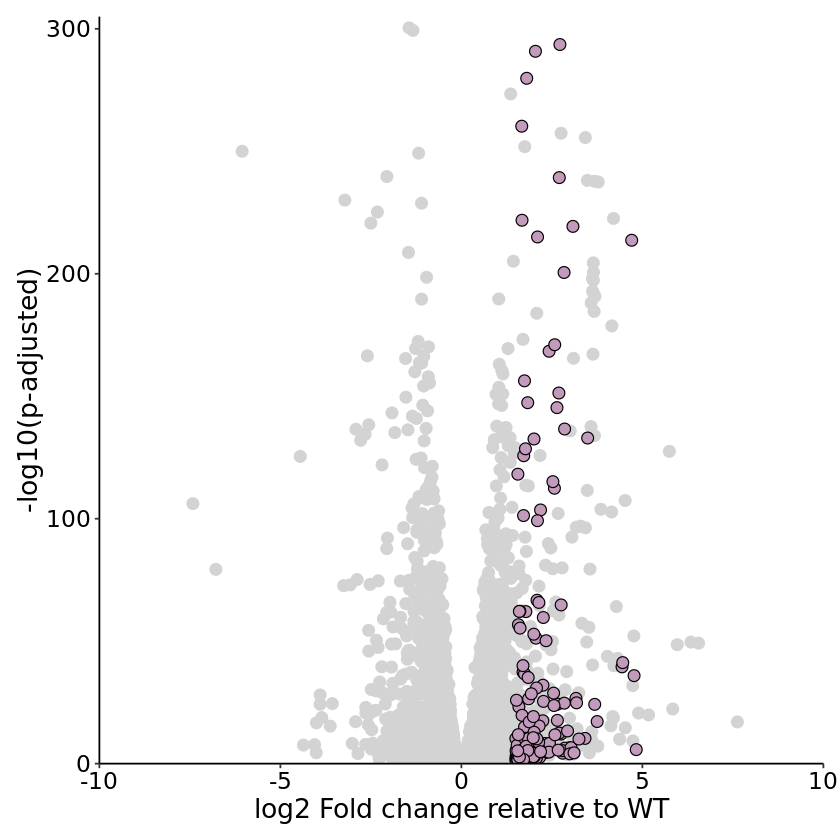

In [22]:
E545Kdiffgenesvolc <- MCF10A_WTvex9_res_df %>% filter(-log10(padj) < 350) %>%
    ggplot(aes(x = -log2FoldChange, y = -log10(padj), fill = as.factor(mycolor),
               color = as.factor(mycolor))) + 
    geom_point(shape = 21, size = 3) + 
#     geom_abline(slope = 1, intercept = 0, color = "red") +
    scale_fill_manual(values = c("#C29ABB", "lightgrey")) +
    scale_color_manual(values = c("black", "lightgrey")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0,305)) +
    scale_x_continuous(limits = c(-10,10), expand = c(0, 0)) +
    ylab(label = "-log10(p-adjusted)") +
    xlab(label = "log2 Fold change relative to WT") +
    theme_classic() + theme(text = element_text(family = "Arial", color = "black"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
                          legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
E545Kdiffgenesvolc

In [1]:
H1047Rdiffgenesvolc <- MCF10A_WTvex20_res_df %>% filter(-log10(padj) < 350) %>%
    ggplot(aes(x = -log2FoldChange, y = -log10(padj), color = as.factor(mycolor),
               color = as.factor(mycolor))) + 
    geom_point(shape = 21, size = 3) + 
#     geom_abline(slope = 1, intercept = 0, color = "red") +
    scale_fill_manual(values = c("#B2D498", "lightgrey")) +
    scale_color_manual(values = c("black", "lightgrey")) +
    scale_y_continuous(expand = c(0, 0), limits = c(0,305)) +
    scale_x_continuous(limits = c(-10,10), expand = c(0, 0)) +
    ylab(label = "-log10(p-adjusted)") +
    xlab(label = "log2 Fold change relative to WT") +

    theme_classic() + theme(text = element_text(family = "Arial", color = "black"),
                          axis.title = element_text(size = 16),
                          axis.text = element_text(size = 14, colour = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
                          legend.position = "none",
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          plot.margin = margin(10, 10, 10, 10))
H1047Rdiffgenesvolc

ERROR: Error in MCF10A_WTvex20_res_df %>% filter(-log10(padj) < 350) %>% ggplot(aes(x = -log2FoldChange, : could not find function "%>%"


In [24]:
ggsave(filename="/data/park_lab/adam/figures/uniqueE545Ksprayalldots9-21.pdf", 
       plot = E545Kdiffgenesvolc, device = cairo_pdf, width = 4, height = 4)
ggsave(filename="/data/park_lab/adam/figures/uniqueH1047Rsprayalldots9-21.pdf", 
       plot = H1047Rdiffgenesvolc, device = cairo_pdf, width = 4, height = 4)

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


# AREG Expression in Comparisons

In [30]:
cancer_WTvex9_res %>% as.data.frame() %>% rownames_to_column() %>%
        filter(rowname == "ENSG00000109321.11")

rowname            baseMean log2FoldChange lfcSE      stat       pvalue  
1 ENSG00000109321.11 11435.7  -0.03873071    0.09442435 -0.4101771 0.681676
  padj     
1 0.7563138

In [31]:
HTert_WTvex9_res %>% as.data.frame() %>% rownames_to_column() %>%
        filter(rowname == "ENSG00000109321.11")

rowname            baseMean log2FoldChange lfcSE      stat     pvalue      
1 ENSG00000109321.11 7087.989 0.8411821      0.09431052 8.919282 4.693216e-19
  padj        
1 3.112351e-18

In [33]:
MCF10A_WTvex9_res %>% as.data.frame() %>% rownames_to_column() %>%
        filter(rowname == "ENSG00000109321.11")

rowname            baseMean log2FoldChange lfcSE     stat      pvalue       
1 ENSG00000109321.11 1367.352 -3.487591      0.1405413 -24.81542 6.111945e-136
  padj         
1 1.164915e-133

In [29]:
MCF10A_ex9vex20_res %>% as.data.frame() %>% rownames_to_column() %>%
        filter(rowname == "ENSG00000109321.11")

rowname            baseMean log2FoldChange lfcSE     stat     pvalue       
1 ENSG00000109321.11 1367.352 2.826147       0.1280448 22.07156 5.931605e-108
  padj         
1 3.692891e-106

In [28]:
cancer_ex9vex20_res %>% as.data.frame() %>% rownames_to_column() %>%
        filter(rowname == "ENSG00000109321.11")

rowname            baseMean log2FoldChange lfcSE      stat      pvalue      
1 ENSG00000109321.11 11435.7  -0.6198946     0.09426982 -6.575748 4.840913e-11
  padj        
1 1.057819e-10

In [15]:
MCF10A_ex9vex20_res %>% as.data.frame() %>% rownames_to_column() %>%
        filter(rowname == "ENSG00000109321.11")

rowname            baseMean log2FoldChange lfcSE     stat     pvalue       
1 ENSG00000109321.11 1367.352 2.826147       0.1280448 22.07156 5.931605e-108
  padj         
1 3.692891e-106

character(0)

In [2]:
ls()

[1] "all_diff_genes"                           
  [2] "AREG_exp"                                 
  [3] "AREG_exp_raw"                             
  [4] "cancer_coldata"                           
  [5] "cancer_counts"                            
  [6] "cancer_dds"                               
  [7] "cancer_dds_f"                             
  [8] "cancer_diff_genes"                        
  [9] "cancer_ex9vex20_over"                     
 [10] "cancer_ex9vex20_res"                      
 [11] "cancer_ex9vex20_resSig_padj"              
 [12] "cancer_ex9vex20_under"                    
 [13] "cancer_filt"                              
 [14] "cancer_genotype"                          
 [15] "cancer_norm_sigset"                       
 [16] "cancer_normalized_counts_f"               
 [17] "cancer_normalized_counts_f_nonames"       
 [18] "cancer_rlog"                              
 [19] "cancer_sampleDistMatrix"                  
 [20] "cancer_samples"                           
 [21] "cancer_vst"                               
 [22] "cancer_WTvex20_over"                      
 [23] "cancer_WTvex20_res"                       
 [24] "cancer_WTvex20_resSig_padj"               
 [25] "cancer_WTvex20_under"                     
 [26] "cancer_WTvex9_over"                       
 [27] "cancer_WTvex9_over_clean"                 
 [28] "cancer_WTvex9_over_symbols"               
 [29] "cancer_WTvex9_res"                        
 [30] "cancer_WTvex9_resSig_padj"                
 [31] "cancer_WTvex9_under"                      
 [32] "cancer_WTvex9_under_clean"                
 [33] "cancer_WTvex9_under_symbols"              
 [34] "cancerDists"                              
 [35] "cluster_df"                               
 [36] "cluster3"                                 
 [37] "cluster3_genes"                           
 [38] "cluster3_genes_clean"                     
 [39] "cluster3_GOBP"                            
 [40] "cluster9"                                 
 [41] "cluster9_genes"                           
 [42] "cluster9_genes_clean"                     
 [43] "cluster9_GOBP"                            
 [44] "clusters"                                 
 [45] "datares_HC"                               
 [46] "dds_LRT"                                  
 [47] "diff_ex9vex20"                            
 [48] "diff_ex9vex20_sig"                        
 [49] "diff_WTvex20"                             
 [50] "diff_WTvex20_sig"                         
 [51] "diff_WTvex9"                              
 [52] "diff_WTvex9_sig"                          
 [53] "E545K_expressed_E545K_interacting_overlap"
 [54] "E545K_expressed_interacting_overlap"      
 [55] "E545K_expressed_WT_interacting_overlap"   
 [56] "ens.str_ex9vex20"                         
 [57] "ens.str_WTvex20"                          
 [58] "ens.str_WTvex9"                           
 [59] "ETV5_exp"                                 
 [60] "ex9vex20_combined"                        
 [61] "ex9vex20_combined_GOBP"                   
 [62] "ex9vex20_combined_GOBP_nocan"             
 [63] "ex9vex20_combined_nocan"                  
 [64] "ex9vex20_genes_log2fc_1.5"                
 [65] "ex9vex20_genes_log2fc_1.5_entrez"         
 [66] "ex9vex20_genes_log2fc_1.5_entrez_df"      
 [67] "ex9vex20_genes_padj"                      
 [68] "ex9vex20_genes_padj_entrez"               
 [69] "ex9vex20_GOBP"                            
 [70] "ex9vex20_GOMF"                            
 [71] "ex9vex20_KEGG"                            
 [72] "ex9vex20_over_clean"                      
 [73] "ex9vex20_over_clean_nocan"                
 [74] "ex9vex20_over_common"                     
 [75] "ex9vex20_over_common_GOBP"                
 [76] "ex9vex20_over_common_GOBP_nocan"          
 [77] "ex9vex20_over_common_GOMF"                
 [78] "ex9vex20_over_nocan"                      
 [79] "ex9vex20_res"                             
 [80] "ex9vex20_res_df"                          
 [

In [9]:
grep(x = MCF10A_ex9vex20_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)
grep(x = MCF10A_WTvex20_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)
grep(x = MCF10A_WTvex9_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)

named character(0)

named character(0)

named character(0)

In [10]:
grep(x = HTert_ex9vex20_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)
grep(x = HTert_WTvex20_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)
grep(x = HTert_WTvex9_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)

named character(0)

named character(0)

named character(0)

In [12]:
grep(x = cancer_ex9vex20_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)
grep(x = cancer_WTvex20_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)
grep(x = cancer_WTvex9_resSig_padj, 
     pattern = "ENSG00000118689", value = TRUE)

named character(0)

named character(0)

named character(0)

# CRISPR Hit Plot for MCF10A

In [43]:
library("tidyverse")
library("org.Hs.eg.db")
library("ggrepel")
library("DESeq2")
setwd("/data/park_lab/adam/Total_RNA")
load("Total_RNA_env.RData")
ls()

Warning message:
“namespace ‘clusterProfiler’ is not available and has been replaced
by .GlobalEnv when processing object ‘.GOTERM_Env’”


[1] "all_diff_genes"                           
  [2] "AREG_exp"                                 
  [3] "AREG_exp_raw"                             
  [4] "cancer_coldata"                           
  [5] "cancer_counts"                            
  [6] "cancer_dds"                               
  [7] "cancer_dds_f"                             
  [8] "cancer_diff_genes"                        
  [9] "cancer_ex9vex20_over"                     
 [10] "cancer_ex9vex20_res"                      
 [11] "cancer_ex9vex20_resSig_padj"              
 [12] "cancer_ex9vex20_under"                    
 [13] "cancer_filt"                              
 [14] "cancer_genotype"                          
 [15] "cancer_norm_sigset"                       
 [16] "cancer_normalized_counts_f"               
 [17] "cancer_normalized_counts_f_nonames"       
 [18] "cancer_rlog"                              
 [19] "cancer_sampleDistMatrix"                  
 [20] "cancer_samples"                           
 [21] "cancer_vst"                               
 [22] "cancer_WTvex20_over"                      
 [23] "cancer_WTvex20_res"                       
 [24] "cancer_WTvex20_resSig_padj"               
 [25] "cancer_WTvex20_under"                     
 [26] "cancer_WTvex9_over"                       
 [27] "cancer_WTvex9_over_clean"                 
 [28] "cancer_WTvex9_over_symbols"               
 [29] "cancer_WTvex9_res"                        
 [30] "cancer_WTvex9_resSig_padj"                
 [31] "cancer_WTvex9_under"                      
 [32] "cancer_WTvex9_under_clean"                
 [33] "cancer_WTvex9_under_symbols"              
 [34] "cancerDists"                              
 [35] "cluster_df"                               
 [36] "cluster3"                                 
 [37] "cluster3_genes"                           
 [38] "cluster3_genes_clean"                     
 [39] "cluster3_GOBP"                            
 [40] "cluster9"                                 
 [41] "cluster9_genes"                           
 [42] "cluster9_genes_clean"                     
 [43] "cluster9_GOBP"                            
 [44] "clusters"                                 
 [45] "datares_HC"                               
 [46] "dds_LRT"                                  
 [47] "diff_ex9vex20"                            
 [48] "diff_ex9vex20_sig"                        
 [49] "diff_WTvex20"                             
 [50] "diff_WTvex20_sig"                         
 [51] "diff_WTvex9"                              
 [52] "diff_WTvex9_sig"                          
 [53] "E545K_expressed_E545K_interacting_overlap"
 [54] "E545K_expressed_interacting_overlap"      
 [55] "E545K_expressed_WT_interacting_overlap"   
 [56] "E545K_goi"                                
 [57] "E545K_unite_genelist"                     
 [58] "E545Kdiffgenesvolc"                       
 [59] "ens.str"                                  
 [60] "ens.str_ex9vex20"                         
 [61] "ens.str_WTvex20"                          
 [62] "ens.str_WTvex9"                           
 [63] "ETV5_exp"                                 
 [64] "ex9vex20_combined"                        
 [65] "ex9vex20_combined_GOBP"                   
 [66] "ex9vex20_combined_GOBP_nocan"             
 [67] "ex9vex20_combined_nocan"                  
 [68] "ex9vex20_genes_log2fc_1.5"                
 [69] "ex9vex20_genes_log2fc_1.5_entrez"         
 [70] "ex9vex20_genes_log2fc_1.5_entrez_df"      
 [71] "ex9vex20_genes_padj"                      
 [72] "ex9vex20_genes_padj_entrez"               
 [73] "ex9vex20_GOBP"                            
 [74] "ex9vex20_GOMF"                            
 [75] "ex9vex20_KEGG"                            
 [76] "ex9vex20_over_clean"                      
 [77] "ex9vex20_over_clean_nocan"                
 [78] "ex9vex20_over_common"                     
 [79] "ex9vex20_over_common_GOBP"                
 [80] "ex9vex20_over_common_GOBP_nocan"          
 [

In [44]:
MCF10A_dds <- DESeq(MCF10A_dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [45]:
MCF10A_normalized_counts <- counts(MCF10A_dds, normalized=TRUE) %>% as.data.frame()
MCF10A_normalized_counts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5    2.506292          3.305122          0.000000       
ENSG00000227232.5  149.124398        178.476599        159.888504       
ENSG00000278267.1   36.341240         56.187077         42.636934       
ENSG00000243485.5    5.012585          0.000000          0.000000       
ENSG00000284332.1    0.000000          0.000000          0.000000       
ENSG00000237613.2    0.000000          0.000000          0.000000       
ENSG00000268020.3    0.000000          0.000000          0.000000       
ENSG00000240361.2    0.000000          0.000000          0.000000       
ENSG00000186092.6    0.000000          0.000000          0.000000       
ENSG00000238009.6   42.606971         47.924272         35.530779       
ENSG00000239945.1    0.000000          0.000000          0.000000       
ENSG00000233750.3   96.492258        105.763910         78.167713       
ENSG00000268903.1  347.121499        368.521125        351.754709       
ENSG00000269981.1  328.324306        304.071242        364.190482       
ENSG00000239906.1    6.265731         13.220489         17.765389       
ENSG00000241860.7  117.795743         67.755005        124.357725       
ENSG00000222623.1    0.000000          1.652561          0.000000       
ENSG00000241599.1    0.000000          0.000000          0.000000       
ENSG00000279928.2   12.531462         16.525611         15.988850       
ENSG00000279457.4  280.704750        292.503315        284.246230       
ENSG00000273874.1    0.000000          3.305122          0.000000       
ENSG00000228463.10  82.707650         47.924272         39.083857       
ENSG00000286448.1   12.531462          3.305122         21.318467       
ENSG00000236679.2   13.784608         11.567928          7.106156       
ENSG00000236601.2    2.506292          3.305122          0.000000       
ENSG00000237094.12 250.629241        257.799532        218.514289       
ENSG00000269732.1    0.000000          0.000000          0.000000       
ENSG00000284733.1    0.000000          0.000000          0.000000       
ENSG00000233653.3    0.000000          0.000000          0.000000       
ENSG00000250575.1   12.531462          0.000000          0.000000       
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000210107.1     285.7173          325.5545          321.5535      
ENSG00000210112.1     251.8824          216.4855          289.5758      
ENSG00000198763.3   27401.2949        26574.8350        26909.2352      
ENSG00000210117.1     238.0978          285.8931          341.0955      
ENSG00000210127.1    2694.2643         2126.8461         2432.0818      
ENSG00000210135.1    9030.1716         8442.9347         9216.6840      
ENSG00000210140.1   14135.4892        14064.9475        15356.4026      
ENSG00000210144.1   12377.3251        12653.6603        13773.5064      
ENSG00000198804.2  675106.2018       656296.4626       666090.1786      
ENSG00000210151.2    4421.0998         3779.4072         3618.8098      
ENSG00000210154.1     433.5886          378.4365          415.7101      
ENSG00000198712.1  251735.7691       255436.3692       259179.2652      
ENSG00000210156.1     779.4569          755.2204          886.4929      
ENSG00000228253.1   17164.3436        16928.8359        18273.4795      
ENSG00000198899.2   97200.2854        96030.3255       102580.9112      
ENSG00000198938.2  217122.6177       222352.0960       227427.1848      
ENSG00000210164.1     865.9240         1003.1046          900.7052      
ENSG00000198840.2   13293.3749        13151.0812        14103.9426      
ENSG00000210174.1     749.3814          740.3474          721.2748      
ENSG00000212907.2   17035.2695        17555.1566        18014.1048      
ENSG00000198886.2  130656.7828       130927.4582       135530.3788      
ENSG00000210176.1    1036.3519          946.9175          969.9903      
ENSG00000210184.1    1205.5266         1155.1402         1119.2195      
ENSG

In [50]:
MCF10A_normalized_counts$geneid <- rownames(MCF10A_normalized_counts) %>% 
    tools::file_path_sans_ext()
MCF10A_normalized_counts

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000223972.5    2.506292          3.305122          0.000000       
ENSG00000227232.5  149.124398        178.476599        159.888504       
ENSG00000278267.1   36.341240         56.187077         42.636934       
ENSG00000243485.5    5.012585          0.000000          0.000000       
ENSG00000284332.1    0.000000          0.000000          0.000000       
ENSG00000237613.2    0.000000          0.000000          0.000000       
ENSG00000268020.3    0.000000          0.000000          0.000000       
ENSG00000240361.2    0.000000          0.000000          0.000000       
ENSG00000186092.6    0.000000          0.000000          0.000000       
ENSG00000238009.6   42.606971         47.924272         35.530779       
ENSG00000239945.1    0.000000          0.000000          0.000000       
ENSG00000233750.3   96.492258        105.763910         78.167713       
ENSG00000268903.1  347.121499        368.521125        351.754709       
ENSG00000269981.1  328.324306        304.071242        364.190482       
ENSG00000239906.1    6.265731         13.220489         17.765389       
ENSG00000241860.7  117.795743         67.755005        124.357725       
ENSG00000222623.1    0.000000          1.652561          0.000000       
ENSG00000241599.1    0.000000          0.000000          0.000000       
ENSG00000279928.2   12.531462         16.525611         15.988850       
ENSG00000279457.4  280.704750        292.503315        284.246230       
ENSG00000273874.1    0.000000          3.305122          0.000000       
ENSG00000228463.10  82.707650         47.924272         39.083857       
ENSG00000286448.1   12.531462          3.305122         21.318467       
ENSG00000236679.2   13.784608         11.567928          7.106156       
ENSG00000236601.2    2.506292          3.305122          0.000000       
ENSG00000237094.12 250.629241        257.799532        218.514289       
ENSG00000269732.1    0.000000          0.000000          0.000000       
ENSG00000284733.1    0.000000          0.000000          0.000000       
ENSG00000233653.3    0.000000          0.000000          0.000000       
ENSG00000250575.1   12.531462          0.000000          0.000000       
⋮                  ⋮                 ⋮                 ⋮                
ENSG00000210107.1     285.7173          325.5545          321.5535      
ENSG00000210112.1     251.8824          216.4855          289.5758      
ENSG00000198763.3   27401.2949        26574.8350        26909.2352      
ENSG00000210117.1     238.0978          285.8931          341.0955      
ENSG00000210127.1    2694.2643         2126.8461         2432.0818      
ENSG00000210135.1    9030.1716         8442.9347         9216.6840      
ENSG00000210140.1   14135.4892        14064.9475        15356.4026      
ENSG00000210144.1   12377.3251        12653.6603        13773.5064      
ENSG00000198804.2  675106.2018       656296.4626       666090.1786      
ENSG00000210151.2    4421.0998         3779.4072         3618.8098      
ENSG00000210154.1     433.5886          378.4365          415.7101      
ENSG00000198712.1  251735.7691       255436.3692       259179.2652      
ENSG00000210156.1     779.4569          755.2204          886.4929      
ENSG00000228253.1   17164.3436        16928.8359        18273.4795      
ENSG00000198899.2   97200.2854        96030.3255       102580.9112      
ENSG00000198938.2  217122.6177       222352.0960       227427.1848      
ENSG00000210164.1     865.9240         1003.1046          900.7052      
ENSG00000198840.2   13293.3749        13151.0812        14103.9426      
ENSG00000210174.1     749.3814          740.3474          721.2748      
ENSG00000212907.2   17035.2695        17555.1566        18014.1048      
ENSG00000198886.2  130656.7828       130927.4582       135530.3788      
ENSG00000210176.1    1036.3519          946.9175          969.9903      
ENSG00000210184.1    1205.5266         1155.1402         1119.2195      
ENSG

In [55]:
MCF10A_normalized_counts %>% filter(geneid == "ENSG00000154930")

MCF10A_E545K_rep1 MCF10A_E545K_rep2 MCF10A_E545K_rep3
ENSG00000154930.15 85.21394          74.36525          65.73194         
                   MCF10A_parental_rep1 MCF10A_parental_rep2
ENSG00000154930.15 55.71672             18.86562            
                   MCF10A_parental_rep3 MCF10A_H1047R_rep1 MCF10A_H1047R_rep2
ENSG00000154930.15 62.43044             422.8875           1001.648          
                   MCF10A_H1047R_rep3 geneid         
ENSG00000154930.15 742.7615           ENSG00000154930